In [9]:
import argparse
import pandas as pd
import numpy as np
import math
import re
import os
import sys

from scipy import stats
from functools import reduce

from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

from sklearn.model_selection import StratifiedKFold
from sksurv.linear_model import CoxPHSurvivalAnalysis

import time
import copy

import multiprocessing
from multiprocessing import Pool
from multiprocessing.dummy import Pool as ThreadPool
import pathlib
os.environ['PATH'] = os.environ['PATH'] + ';' + r"C:\ProgramData\Anaconda3\envs\OMSExpmt\Library\bin\graphviz"
# os.environ['PATH'] = os.environ['PATH'] + ';' + me_path + r'\Graphviz\bin'#r"C:\Program Files\Graphviz\bin"

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime
import plotly.graph_objs as go
import plotly.io as pio
from graphviz import Digraph
from numpy import nan as NaN
import random
random.seed(10)
from sklearn.model_selection import train_test_split    
from sklearn.metrics import roc_auc_score
import pickle 

from joblib import Parallel, delayed
sys.path.append('../')
# import lib.constants as cnt
# import lib.craid_lib as crl
import lib.craid_ref as crr
import lib.argparse as argp
import lib.bootstrap as bst
import lib.boosting as boost
import lib.survival_scores as ssc
import lib.survival_criter as scrit
import lib.hierarch_clust as hclust
import lib.visualise as vis

import warnings
warnings.filterwarnings("ignore")
%load_ext line_profiler
dir_env = './'
path_dir = "D:\\CRAID_TREE\\SurvivalTree\\tmp\\"
dataset_name = r'AGGREG_PRED_THREADS.csv'

In [2]:
import lib.constants_onk as onk
df, features, categ, sch_nan = onk.get_dataset(diag = {'C20', 'C50.4', 'C61'}, 
                                               invert_death = True,
                                               descript = False)

X = df.loc[:,set(df.columns) - {'cDeath'}]
y = df['cDeath']

DIAG {'C20': 0, 'C50.4': 1, 'C61': 2}
DS2 {'C16.8': 0, 'C44.3': 1, 'C78.0': 2, 'E11.9': 3, 'G93.4': 4, 'I25.1': 5, 'I25.2': 6, 'J12.9': 7, 'K25.0': 8, 'K56.6': 9, 'K62.5': 10, 'N02.0': 11, 'N10': 12, 'N30.2': 13, 'N40': 14, 'R31': 15, 'R33': 16, 'Z93.3': 17}
DS3 {'D63.8': 0, 'I26.9': 1, 'I50.1': 2, 'J90': 3, 'K56.4': 4, 'K61.3': 5, 'K62.5': 6, 'K65.0': 7, 'K92.2': 8, 'L98.6': 9, 'N11.9': 10, 'R31': 11, 'R33': 12}


In [3]:
BCR_param_grid = {
    "name":["bootstrap"], 
    "size_sample" : [int(X_tv.shape[0]*0.7)], 
    "n_estimators" : [10, 30], 
    "depth" : [15, 20],
    "tolerance" : [False],
    "features" : [features], 
    "categ" : [categ],
    "sum":["COST"],
    "days":["dDeath"],
    "cens":["cDeath"],
    "criterion":[scrit.wilcoxon],#logrank_test,
    "n_jobs":[10],
    "min_samples_leaf":[1,5,10],
    "bonf":[True],
    "thres_cont_bin_max":[100],
    "signif":[1.1],
    "max_features":[0.2],
    "verbose":[0]
}
BCR_res_grid = ssc.grid_search(bst.BootstrapCRAID, BCR_param_grid, X, y, features, ['conc','ibs'])

FULL_TIME: 57.247903116 seconds
****** End fit. ******
FULL_TIME: 50.280929558 seconds
****** End fit. ******
METRIC: 0.7374 -> +1 model METRIC: 0.8206
FULL_TIME: 47.817729928000006 seconds
****** End fit. ******
METRIC: 0.8206 -> +1 model METRIC: 0.861
FULL_TIME: 50.69696715599997 seconds
****** End fit. ******
METRIC: 0.861 -> +1 model METRIC: 0.8842
FULL_TIME: 46.51152707199998 seconds
****** End fit. ******
METRIC: 0.8842 -> +1 model METRIC: 0.8978
FULL_TIME: 43.62645840699997 seconds
****** End fit. ******
METRIC: 0.8978 -> +1 model METRIC: 0.9044
FULL_TIME: 53.29028453000001 seconds
****** End fit. ******
METRIC: 0.9044 -> +1 model METRIC: 0.9101
FULL_TIME: 49.80013468000004 seconds
****** End fit. ******
METRIC: 0.9101 -> +1 model METRIC: 0.9121
FULL_TIME: 53.78149397799996 seconds
****** End fit. ******
METRIC: 0.9121 -> +1 model METRIC: 0.9165
FULL_TIME: 49.67487996 seconds
****** End fit. ******
METRIC: 0.9165 -> +1 model METRIC: 0.9193
fitted: 10 models.
FULL_TIME: 61.646095

FULL_TIME: 52.38874214200041 seconds
****** End fit. ******
METRIC: 0.8459 -> +1 model METRIC: 0.8635
FULL_TIME: 49.29502760200012 seconds
****** End fit. ******
METRIC: 0.8635 -> +1 model METRIC: 0.8754
FULL_TIME: 49.408226427000045 seconds
****** End fit. ******
METRIC: 0.8754 -> +1 model METRIC: 0.88
FULL_TIME: 58.36878145499941 seconds
****** End fit. ******
METRIC: 0.88 -> +1 model METRIC: 0.8922
FULL_TIME: 52.56949864499984 seconds
****** End fit. ******
METRIC: 0.8922 -> +1 model METRIC: 0.8993
FULL_TIME: 57.22656880499926 seconds
****** End fit. ******
METRIC: 0.8993 -> +1 model METRIC: 0.903
FULL_TIME: 50.04632283999854 seconds
****** End fit. ******
METRIC: 0.903 -> +1 model METRIC: 0.9066
FULL_TIME: 54.41006182500132 seconds
****** End fit. ******
METRIC: 0.9066 -> +1 model METRIC: 0.909
FULL_TIME: 47.20036512899969 seconds
****** End fit. ******
METRIC: 0.909 -> +1 model METRIC: 0.9105
FULL_TIME: 55.57335034800053 seconds
****** End fit. ******
METRIC: 0.9105 -> +1 model ME

METRIC: 0.9473 -> +1 model METRIC: 0.949
FULL_TIME: 60.69146876200102 seconds
****** End fit. ******
METRIC: 0.949 -> +1 model METRIC: 0.9506
FULL_TIME: 58.16661457200098 seconds
****** End fit. ******
METRIC: 0.9506 -> +1 model METRIC: 0.9507
FULL_TIME: 60.38662294999813 seconds
****** End fit. ******
METRIC: 0.9507 -> +1 model METRIC: 0.9511
FULL_TIME: 59.105579290000605 seconds
****** End fit. ******
METRIC: 0.9511 -> +1 model METRIC: 0.951
fitted: 29 models.
{'bonf': True, 'categ': ['DIAG', 'DS2', 'DS3'], 'cens': 'cDeath', 'criterion': <function wilcoxon at 0x0000024E7DB1BA68>, 'days': 'dDeath', 'depth': 15, 'features': ['WEI', 'HEI', 'W', 'AGE', 'STAD', 'ONK_T', 'ONK_N', 'ONK_M', 'MTSTZ', 'INDEX_MASS', 'PRED_SUM', 'PRED_DAYS', 'PRED_MEAN_SUM_ELEMS', 'PRED_MEAN_DAYS_ELEMS', 'PRED_MEAN_SUM_THREADS', 'PRED_MEAN_DAYS_THREADS', 'DELTA_PRED', 'DELTA_POST', 'PRED_THREADS', 'DIAG', 'BINS1', 'BINS2', 'BINS3', 'BINS1_1', 'BINS1_2', 'BINS1_3', 'BINS1_4', 'BINS1_5', 'BINS1_6', 'BINS2_1', 'BIN

FULL_TIME: 24.52214010199532 seconds
****** End fit. ******
FULL_TIME: 27.249782400002005 seconds
****** End fit. ******
METRIC: 0.7287 -> +1 model METRIC: 0.7723
FULL_TIME: 25.746408320002956 seconds
****** End fit. ******
METRIC: 0.7723 -> +1 model METRIC: 0.7965
FULL_TIME: 25.92597990699869 seconds
****** End fit. ******
METRIC: 0.7965 -> +1 model METRIC: 0.815
FULL_TIME: 25.617877775002853 seconds
****** End fit. ******
METRIC: 0.815 -> +1 model METRIC: 0.8297
FULL_TIME: 26.354545415000757 seconds
****** End fit. ******
METRIC: 0.8297 -> +1 model METRIC: 0.8394
FULL_TIME: 25.934874079997826 seconds
****** End fit. ******
METRIC: 0.8394 -> +1 model METRIC: 0.8453
FULL_TIME: 28.352920179997454 seconds
****** End fit. ******
METRIC: 0.8453 -> +1 model METRIC: 0.8468
FULL_TIME: 24.468269893994147 seconds
****** End fit. ******
METRIC: 0.8468 -> +1 model METRIC: 0.8491
FULL_TIME: 26.83609415200044 seconds
****** End fit. ******
METRIC: 0.8491 -> +1 model METRIC: 0.8498
FULL_TIME: 28.762

FULL_TIME: 14.97135237800103 seconds
****** End fit. ******
FULL_TIME: 18.331201625995163 seconds
****** End fit. ******
METRIC: 0.6987 -> +1 model METRIC: 0.7504
FULL_TIME: 16.947893021999334 seconds
****** End fit. ******
METRIC: 0.7504 -> +1 model METRIC: 0.7731
FULL_TIME: 14.75078909000149 seconds
****** End fit. ******
METRIC: 0.7731 -> +1 model METRIC: 0.7841
FULL_TIME: 15.39611250499729 seconds
****** End fit. ******
METRIC: 0.7841 -> +1 model METRIC: 0.7919
FULL_TIME: 17.726064850998227 seconds
****** End fit. ******
METRIC: 0.7919 -> +1 model METRIC: 0.7969
FULL_TIME: 18.999788373002957 seconds
****** End fit. ******
METRIC: 0.7969 -> +1 model METRIC: 0.7992
FULL_TIME: 17.160691951001354 seconds
****** End fit. ******
METRIC: 0.7992 -> +1 model METRIC: 0.7998
FULL_TIME: 17.44599155200558 seconds
****** End fit. ******
METRIC: 0.7998 -> +1 model METRIC: 0.799
fitted: 8 models.
FULL_TIME: 17.742874057003064 seconds
****** End fit. ******
FULL_TIME: 17.66527386400412 seconds
****

METRIC: 0.799 -> +1 model METRIC: 0.799
FULL_TIME: 18.010180024000874 seconds
****** End fit. ******
METRIC: 0.799 -> +1 model METRIC: 0.7993
FULL_TIME: 20.333030196998152 seconds
****** End fit. ******
METRIC: 0.7993 -> +1 model METRIC: 0.8018
FULL_TIME: 20.87145531400165 seconds
****** End fit. ******
METRIC: 0.8018 -> +1 model METRIC: 0.802
FULL_TIME: 20.894093031005468 seconds
****** End fit. ******
METRIC: 0.802 -> +1 model METRIC: 0.8026
FULL_TIME: 19.896358509999118 seconds
****** End fit. ******
METRIC: 0.8026 -> +1 model METRIC: 0.8043
FULL_TIME: 20.631327285002044 seconds
****** End fit. ******
METRIC: 0.8043 -> +1 model METRIC: 0.8018
fitted: 13 models.
FULL_TIME: 17.96886600700236 seconds
****** End fit. ******
FULL_TIME: 19.12797612199938 seconds
****** End fit. ******
METRIC: 0.7583 -> +1 model METRIC: 0.7875
FULL_TIME: 19.647753222001484 seconds
****** End fit. ******
METRIC: 0.7875 -> +1 model METRIC: 0.7944
FULL_TIME: 18.930423580000934 seconds
****** End fit. ******
M

METRIC: 0.9012 -> +1 model METRIC: 0.9102
FULL_TIME: 57.54612998700031 seconds
****** End fit. ******
METRIC: 0.9102 -> +1 model METRIC: 0.9164
FULL_TIME: 60.073916717999964 seconds
****** End fit. ******
METRIC: 0.9164 -> +1 model METRIC: 0.9179
FULL_TIME: 61.50401871299982 seconds
****** End fit. ******
METRIC: 0.9179 -> +1 model METRIC: 0.9195
fitted: 10 models.
FULL_TIME: 64.83265887499874 seconds
****** End fit. ******
FULL_TIME: 64.9106481869967 seconds
****** End fit. ******
METRIC: 0.7615 -> +1 model METRIC: 0.8423
FULL_TIME: 63.9628790200004 seconds
****** End fit. ******
METRIC: 0.8423 -> +1 model METRIC: 0.8716
FULL_TIME: 58.757612344001245 seconds
****** End fit. ******
METRIC: 0.8716 -> +1 model METRIC: 0.8832
FULL_TIME: 60.503524266998284 seconds
****** End fit. ******
METRIC: 0.8832 -> +1 model METRIC: 0.8963
FULL_TIME: 62.8617965539961 seconds
****** End fit. ******
METRIC: 0.8963 -> +1 model METRIC: 0.9082
FULL_TIME: 67.19286896099948 seconds
****** End fit. ******
MET

METRIC: 0.9195 -> +1 model METRIC: 0.9236
FULL_TIME: 62.658268727995164 seconds
****** End fit. ******
METRIC: 0.9236 -> +1 model METRIC: 0.9262
FULL_TIME: 65.52082596800028 seconds
****** End fit. ******
METRIC: 0.9262 -> +1 model METRIC: 0.9303
FULL_TIME: 63.84036667000328 seconds
****** End fit. ******
METRIC: 0.9303 -> +1 model METRIC: 0.9315
FULL_TIME: 64.77782464300253 seconds
****** End fit. ******
METRIC: 0.9315 -> +1 model METRIC: 0.9329
FULL_TIME: 59.5014177530029 seconds
****** End fit. ******
METRIC: 0.9329 -> +1 model METRIC: 0.9343
FULL_TIME: 64.9128044389945 seconds
****** End fit. ******
METRIC: 0.9343 -> +1 model METRIC: 0.9346
FULL_TIME: 67.54919077199884 seconds
****** End fit. ******
METRIC: 0.9346 -> +1 model METRIC: 0.9373
FULL_TIME: 61.72941771999467 seconds
****** End fit. ******
METRIC: 0.9373 -> +1 model METRIC: 0.9377
FULL_TIME: 62.111285407998366 seconds
****** End fit. ******
METRIC: 0.9377 -> +1 model METRIC: 0.9379
FULL_TIME: 62.95077387600031 seconds
***

FULL_TIME: 64.24129685199296 seconds
****** End fit. ******
METRIC: 0.9589 -> +1 model METRIC: 0.9593
FULL_TIME: 71.076036398008 seconds
****** End fit. ******
METRIC: 0.9593 -> +1 model METRIC: 0.9598
FULL_TIME: 67.80428480599949 seconds
****** End fit. ******
METRIC: 0.9598 -> +1 model METRIC: 0.96
FULL_TIME: 68.46173140899919 seconds
****** End fit. ******
METRIC: 0.96 -> +1 model METRIC: 0.9611
FULL_TIME: 66.22684821100847 seconds
****** End fit. ******
METRIC: 0.9611 -> +1 model METRIC: 0.962
FULL_TIME: 67.98639152599208 seconds
****** End fit. ******
METRIC: 0.962 -> +1 model METRIC: 0.9622
FULL_TIME: 68.84292910899967 seconds
****** End fit. ******
METRIC: 0.9622 -> +1 model METRIC: 0.9626
FULL_TIME: 66.39237002900336 seconds
****** End fit. ******
METRIC: 0.9626 -> +1 model METRIC: 0.9624
fitted: 29 models.
{'bonf': True, 'categ': ['DIAG', 'DS2', 'DS3'], 'cens': 'cDeath', 'criterion': <function wilcoxon at 0x0000024E7DB1BA68>, 'days': 'dDeath', 'depth': 20, 'features': ['WEI', 

FULL_TIME: 24.88365017999604 seconds
****** End fit. ******
FULL_TIME: 27.845804598007817 seconds
****** End fit. ******
METRIC: 0.7274 -> +1 model METRIC: 0.7781
FULL_TIME: 26.310188655013917 seconds
****** End fit. ******
METRIC: 0.7781 -> +1 model METRIC: 0.7998
FULL_TIME: 26.9172232439887 seconds
****** End fit. ******
METRIC: 0.7998 -> +1 model METRIC: 0.8175
FULL_TIME: 26.147005944992998 seconds
****** End fit. ******
METRIC: 0.8175 -> +1 model METRIC: 0.8318
FULL_TIME: 29.344285908999154 seconds
****** End fit. ******
METRIC: 0.8318 -> +1 model METRIC: 0.842
FULL_TIME: 27.167423532999237 seconds
****** End fit. ******
METRIC: 0.842 -> +1 model METRIC: 0.8474
FULL_TIME: 29.902533718006453 seconds
****** End fit. ******
METRIC: 0.8474 -> +1 model METRIC: 0.8491
FULL_TIME: 24.629465067002457 seconds
****** End fit. ******
METRIC: 0.8491 -> +1 model METRIC: 0.8513
FULL_TIME: 27.212867682988872 seconds
****** End fit. ******
METRIC: 0.8513 -> +1 model METRIC: 0.8518
FULL_TIME: 29.523

FULL_TIME: 14.900554959996953 seconds
****** End fit. ******
FULL_TIME: 19.06316422901 seconds
****** End fit. ******
METRIC: 0.6987 -> +1 model METRIC: 0.7515
FULL_TIME: 17.01777712900366 seconds
****** End fit. ******
METRIC: 0.7515 -> +1 model METRIC: 0.7736
FULL_TIME: 15.008515780005837 seconds
****** End fit. ******
METRIC: 0.7736 -> +1 model METRIC: 0.7843
FULL_TIME: 15.342564125996432 seconds
****** End fit. ******
METRIC: 0.7843 -> +1 model METRIC: 0.7922
FULL_TIME: 17.904985953995492 seconds
****** End fit. ******
METRIC: 0.7922 -> +1 model METRIC: 0.7973
FULL_TIME: 18.36810707699624 seconds
****** End fit. ******
METRIC: 0.7973 -> +1 model METRIC: 0.7995
FULL_TIME: 17.58033695499762 seconds
****** End fit. ******
METRIC: 0.7995 -> +1 model METRIC: 0.8001
FULL_TIME: 17.946249258995522 seconds
****** End fit. ******
METRIC: 0.8001 -> +1 model METRIC: 0.7993
fitted: 8 models.
FULL_TIME: 17.939029569999548 seconds
****** End fit. ******
FULL_TIME: 17.642437686008634 seconds
*****

METRIC: 0.7583 -> +1 model METRIC: 0.7875
FULL_TIME: 19.845187760001863 seconds
****** End fit. ******
METRIC: 0.7875 -> +1 model METRIC: 0.7944
FULL_TIME: 18.26674423100485 seconds
****** End fit. ******
METRIC: 0.7944 -> +1 model METRIC: 0.8025
FULL_TIME: 17.542340211002738 seconds
****** End fit. ******
METRIC: 0.8025 -> +1 model METRIC: 0.8093
FULL_TIME: 19.48513566199108 seconds
****** End fit. ******
METRIC: 0.8093 -> +1 model METRIC: 0.8162
FULL_TIME: 20.78503506699053 seconds
****** End fit. ******
METRIC: 0.8162 -> +1 model METRIC: 0.8209
FULL_TIME: 19.29263680499571 seconds
****** End fit. ******
METRIC: 0.8209 -> +1 model METRIC: 0.8236
FULL_TIME: 19.32427060700138 seconds
****** End fit. ******
METRIC: 0.8236 -> +1 model METRIC: 0.8234
fitted: 8 models.
FULL_TIME: 17.44503971899394 seconds
****** End fit. ******
FULL_TIME: 16.736948508987552 seconds
****** End fit. ******
METRIC: 0.7443 -> +1 model METRIC: 0.7625
FULL_TIME: 19.071166057998198 seconds
****** End fit. ******


In [4]:
BCR_param_grid_peto = {
    "name":["bootstrap"], 
    "size_sample" : [int(X_tv.shape[0]*0.7)], 
    "n_estimators" : [10, 30], 
    "depth" : [15, 20],
    "tolerance" : [False],
    "features" : [features], 
    "categ" : [categ],
    "sum":["COST"],
    "days":["dDeath"],
    "cens":["cDeath"],
    "criterion":[scrit.peto],
    "n_jobs":[10],
    "min_samples_leaf":[1,5,10],
    "bonf":[True],
    "thres_cont_bin_max":[100],
    "signif":[1.1],
    "max_features":[0.2],
    "verbose":[0]
}
BCR_res_grid_peto = ssc.grid_search(bst.BootstrapCRAID, BCR_param_grid_peto, X, y, features, ['conc','ibs'])

FULL_TIME: 51.253463436994934 seconds
****** End fit. ******
FULL_TIME: 46.62824016799277 seconds
****** End fit. ******
METRIC: 0.7422 -> +1 model METRIC: 0.8174
FULL_TIME: 47.51915002200985 seconds
****** End fit. ******
METRIC: 0.8174 -> +1 model METRIC: 0.8467
FULL_TIME: 48.90326904699032 seconds
****** End fit. ******
METRIC: 0.8467 -> +1 model METRIC: 0.8722
FULL_TIME: 45.33637038699817 seconds
****** End fit. ******
METRIC: 0.8722 -> +1 model METRIC: 0.8879
FULL_TIME: 48.872141394007485 seconds
****** End fit. ******
METRIC: 0.8879 -> +1 model METRIC: 0.8955
FULL_TIME: 55.068104297999525 seconds
****** End fit. ******
METRIC: 0.8955 -> +1 model METRIC: 0.9049
FULL_TIME: 51.45336630300153 seconds
****** End fit. ******
METRIC: 0.9049 -> +1 model METRIC: 0.9079
FULL_TIME: 45.54915566398995 seconds
****** End fit. ******
METRIC: 0.9079 -> +1 model METRIC: 0.9134
FULL_TIME: 53.14716100798978 seconds
****** End fit. ******
METRIC: 0.9134 -> +1 model METRIC: 0.9166
fitted: 10 models.


METRIC: 0.9273 -> +1 model METRIC: 0.9287
FULL_TIME: 52.64800093199301 seconds
****** End fit. ******
METRIC: 0.9287 -> +1 model METRIC: 0.9299
FULL_TIME: 55.48417456599418 seconds
****** End fit. ******
METRIC: 0.9299 -> +1 model METRIC: 0.9323
FULL_TIME: 50.86604176700348 seconds
****** End fit. ******
METRIC: 0.9323 -> +1 model METRIC: 0.9327
FULL_TIME: 51.25305968799512 seconds
****** End fit. ******
METRIC: 0.9327 -> +1 model METRIC: 0.9329
FULL_TIME: 47.771206676989095 seconds
****** End fit. ******
METRIC: 0.9329 -> +1 model METRIC: 0.9333
FULL_TIME: 54.6156966540002 seconds
****** End fit. ******
METRIC: 0.9333 -> +1 model METRIC: 0.9337
FULL_TIME: 42.46928023999499 seconds
****** End fit. ******
METRIC: 0.9337 -> +1 model METRIC: 0.9339
FULL_TIME: 54.43137955800921 seconds
****** End fit. ******
METRIC: 0.9339 -> +1 model METRIC: 0.934
FULL_TIME: 58.846571622998454 seconds
****** End fit. ******
METRIC: 0.934 -> +1 model METRIC: 0.9351
FULL_TIME: 61.11622937800712 seconds
****

FULL_TIME: 54.291512842988595 seconds
****** End fit. ******
METRIC: 0.9409 -> +1 model METRIC: 0.9432
FULL_TIME: 58.111219091981184 seconds
****** End fit. ******
METRIC: 0.9432 -> +1 model METRIC: 0.9436
FULL_TIME: 49.397674350009765 seconds
****** End fit. ******
METRIC: 0.9436 -> +1 model METRIC: 0.9433
fitted: 18 models.
{'bonf': True, 'categ': ['DIAG', 'DS2', 'DS3'], 'cens': 'cDeath', 'criterion': <function peto at 0x0000024E7DB1BAF8>, 'days': 'dDeath', 'depth': 15, 'features': ['WEI', 'HEI', 'W', 'AGE', 'STAD', 'ONK_T', 'ONK_N', 'ONK_M', 'MTSTZ', 'INDEX_MASS', 'PRED_SUM', 'PRED_DAYS', 'PRED_MEAN_SUM_ELEMS', 'PRED_MEAN_DAYS_ELEMS', 'PRED_MEAN_SUM_THREADS', 'PRED_MEAN_DAYS_THREADS', 'DELTA_PRED', 'DELTA_POST', 'PRED_THREADS', 'DIAG', 'BINS1', 'BINS2', 'BINS3', 'BINS1_1', 'BINS1_2', 'BINS1_3', 'BINS1_4', 'BINS1_5', 'BINS1_6', 'BINS2_1', 'BINS2_2', 'BINS2_3', 'BINS2_4', 'BINS2_5', 'BINS2_6', 'BINS2_7', 'BINS2_8', 'BINS3_1', 'BINS3_2', 'BINS3_3', 'BINS4', 'BINS5', 'BINS6', 'NUM1', 'N

FULL_TIME: 23.06258591299411 seconds
****** End fit. ******
FULL_TIME: 26.863368151010945 seconds
****** End fit. ******
METRIC: 0.7291 -> +1 model METRIC: 0.7744
FULL_TIME: 24.900829001999227 seconds
****** End fit. ******
METRIC: 0.7744 -> +1 model METRIC: 0.7974
FULL_TIME: 26.716017457976704 seconds
****** End fit. ******
METRIC: 0.7974 -> +1 model METRIC: 0.8143
FULL_TIME: 24.396161754993955 seconds
****** End fit. ******
METRIC: 0.8143 -> +1 model METRIC: 0.8347
FULL_TIME: 26.96835985899088 seconds
****** End fit. ******
METRIC: 0.8347 -> +1 model METRIC: 0.8399
FULL_TIME: 26.65446237300057 seconds
****** End fit. ******
METRIC: 0.8399 -> +1 model METRIC: 0.8431
FULL_TIME: 29.341703965998022 seconds
****** End fit. ******
METRIC: 0.8431 -> +1 model METRIC: 0.8456
FULL_TIME: 26.035032507003052 seconds
****** End fit. ******
METRIC: 0.8456 -> +1 model METRIC: 0.848
FULL_TIME: 25.737290818011388 seconds
****** End fit. ******
METRIC: 0.848 -> +1 model METRIC: 0.8459
fitted: 9 models.

FULL_TIME: 15.655795523984125 seconds
****** End fit. ******
FULL_TIME: 18.758208215003833 seconds
****** End fit. ******
METRIC: 0.7077 -> +1 model METRIC: 0.7499
FULL_TIME: 18.190342118992703 seconds
****** End fit. ******
METRIC: 0.7499 -> +1 model METRIC: 0.77
FULL_TIME: 14.884701974980999 seconds
****** End fit. ******
METRIC: 0.77 -> +1 model METRIC: 0.7765
FULL_TIME: 17.192971847980516 seconds
****** End fit. ******
METRIC: 0.7765 -> +1 model METRIC: 0.7897
FULL_TIME: 17.08848287499859 seconds
****** End fit. ******
METRIC: 0.7897 -> +1 model METRIC: 0.7933
FULL_TIME: 19.188238041999284 seconds
****** End fit. ******
METRIC: 0.7933 -> +1 model METRIC: 0.7969
FULL_TIME: 16.842056270019384 seconds
****** End fit. ******
METRIC: 0.7969 -> +1 model METRIC: 0.8019
FULL_TIME: 17.695981677010423 seconds
****** End fit. ******
METRIC: 0.8019 -> +1 model METRIC: 0.8018
fitted: 8 models.
FULL_TIME: 19.32363962798263 seconds
****** End fit. ******
FULL_TIME: 17.115199038991705 seconds
****

METRIC: 0.7535 -> +1 model METRIC: 0.787
FULL_TIME: 18.679274870984955 seconds
****** End fit. ******
METRIC: 0.787 -> +1 model METRIC: 0.7974
FULL_TIME: 18.096255036012735 seconds
****** End fit. ******
METRIC: 0.7974 -> +1 model METRIC: 0.8005
FULL_TIME: 17.660387919982895 seconds
****** End fit. ******
METRIC: 0.8005 -> +1 model METRIC: 0.8057
FULL_TIME: 18.090963394002756 seconds
****** End fit. ******
METRIC: 0.8057 -> +1 model METRIC: 0.8086
FULL_TIME: 20.072540168999694 seconds
****** End fit. ******
METRIC: 0.8086 -> +1 model METRIC: 0.8123
FULL_TIME: 18.423794153990457 seconds
****** End fit. ******
METRIC: 0.8123 -> +1 model METRIC: 0.8157
FULL_TIME: 18.495126491005067 seconds
****** End fit. ******
METRIC: 0.8157 -> +1 model METRIC: 0.8172
FULL_TIME: 21.60383873200044 seconds
****** End fit. ******
METRIC: 0.8172 -> +1 model METRIC: 0.8206
FULL_TIME: 21.948894103989005 seconds
****** End fit. ******
METRIC: 0.8206 -> +1 model METRIC: 0.819
fitted: 10 models.
FULL_TIME: 17.39

METRIC: 0.8706 -> +1 model METRIC: 0.8929
FULL_TIME: 62.62831477299915 seconds
****** End fit. ******
METRIC: 0.8929 -> +1 model METRIC: 0.9054
FULL_TIME: 65.78389306302415 seconds
****** End fit. ******
METRIC: 0.9054 -> +1 model METRIC: 0.914
FULL_TIME: 62.37626494502183 seconds
****** End fit. ******
METRIC: 0.914 -> +1 model METRIC: 0.9187
FULL_TIME: 63.72926363200531 seconds
****** End fit. ******
METRIC: 0.9187 -> +1 model METRIC: 0.9239
FULL_TIME: 59.84287108198623 seconds
****** End fit. ******
METRIC: 0.9239 -> +1 model METRIC: 0.9273
fitted: 10 models.
FULL_TIME: 67.10136674699606 seconds
****** End fit. ******
FULL_TIME: 65.19265050799004 seconds
****** End fit. ******
METRIC: 0.757 -> +1 model METRIC: 0.8333
FULL_TIME: 62.57668127398938 seconds
****** End fit. ******
METRIC: 0.8333 -> +1 model METRIC: 0.865
FULL_TIME: 63.100706998986425 seconds
****** End fit. ******
METRIC: 0.865 -> +1 model METRIC: 0.8861
FULL_TIME: 61.26113075899775 seconds
****** End fit. ******
METRIC:

METRIC: 0.8513 -> +1 model METRIC: 0.8706
FULL_TIME: 64.0426418040006 seconds
****** End fit. ******
METRIC: 0.8706 -> +1 model METRIC: 0.8929
FULL_TIME: 61.63960218100692 seconds
****** End fit. ******
METRIC: 0.8929 -> +1 model METRIC: 0.9054
FULL_TIME: 65.95145312999375 seconds
****** End fit. ******
METRIC: 0.9054 -> +1 model METRIC: 0.914
FULL_TIME: 62.150963950000005 seconds
****** End fit. ******
METRIC: 0.914 -> +1 model METRIC: 0.9187
FULL_TIME: 65.13571805099491 seconds
****** End fit. ******
METRIC: 0.9187 -> +1 model METRIC: 0.9239
FULL_TIME: 59.40074342399021 seconds
****** End fit. ******
METRIC: 0.9239 -> +1 model METRIC: 0.9273
FULL_TIME: 59.691244944988284 seconds
****** End fit. ******
METRIC: 0.9273 -> +1 model METRIC: 0.9293
FULL_TIME: 61.4188726140128 seconds
****** End fit. ******
METRIC: 0.9293 -> +1 model METRIC: 0.9325
FULL_TIME: 64.69527853000909 seconds
****** End fit. ******
METRIC: 0.9325 -> +1 model METRIC: 0.9347
FULL_TIME: 65.63998983800411 seconds
*****

METRIC: 0.8159 -> +1 model METRIC: 0.8373
FULL_TIME: 26.828038683976047 seconds
****** End fit. ******
METRIC: 0.8373 -> +1 model METRIC: 0.8419
FULL_TIME: 26.705442950013094 seconds
****** End fit. ******
METRIC: 0.8419 -> +1 model METRIC: 0.8449
FULL_TIME: 30.222459151002113 seconds
****** End fit. ******
METRIC: 0.8449 -> +1 model METRIC: 0.8474
FULL_TIME: 25.617364799021743 seconds
****** End fit. ******
METRIC: 0.8474 -> +1 model METRIC: 0.8496
FULL_TIME: 26.25560408399906 seconds
****** End fit. ******
METRIC: 0.8496 -> +1 model METRIC: 0.8475
fitted: 9 models.
FULL_TIME: 26.735107259999495 seconds
****** End fit. ******
FULL_TIME: 27.864247816003626 seconds
****** End fit. ******
METRIC: 0.7164 -> +1 model METRIC: 0.7497
FULL_TIME: 28.250188098987564 seconds
****** End fit. ******
METRIC: 0.7497 -> +1 model METRIC: 0.7794
FULL_TIME: 26.87411186299869 seconds
****** End fit. ******
METRIC: 0.7794 -> +1 model METRIC: 0.7979
FULL_TIME: 28.40372716501588 seconds
****** End fit. ****

METRIC: 0.8281 -> +1 model METRIC: 0.832
FULL_TIME: 31.307119092001813 seconds
****** End fit. ******
METRIC: 0.832 -> +1 model METRIC: 0.8362
FULL_TIME: 30.263572755997302 seconds
****** End fit. ******
METRIC: 0.8362 -> +1 model METRIC: 0.8385
FULL_TIME: 27.929526848020032 seconds
****** End fit. ******
METRIC: 0.8385 -> +1 model METRIC: 0.8422
FULL_TIME: 29.853273948014248 seconds
****** End fit. ******
METRIC: 0.8422 -> +1 model METRIC: 0.8431
FULL_TIME: 27.805269309988944 seconds
****** End fit. ******
METRIC: 0.8431 -> +1 model METRIC: 0.842
fitted: 14 models.
FULL_TIME: 27.28056530599133 seconds
****** End fit. ******
FULL_TIME: 27.915138184005627 seconds
****** End fit. ******
METRIC: 0.7688 -> +1 model METRIC: 0.7965
FULL_TIME: 28.83547097397968 seconds
****** End fit. ******
METRIC: 0.7965 -> +1 model METRIC: 0.8177
FULL_TIME: 28.452159444976132 seconds
****** End fit. ******
METRIC: 0.8177 -> +1 model METRIC: 0.8254
FULL_TIME: 27.779631271987455 seconds
****** End fit. *****

METRIC: 0.7378 -> +1 model METRIC: 0.7558
FULL_TIME: 18.976035959 seconds
****** End fit. ******
METRIC: 0.7558 -> +1 model METRIC: 0.767
FULL_TIME: 17.3403337560012 seconds
****** End fit. ******
METRIC: 0.767 -> +1 model METRIC: 0.7811
FULL_TIME: 19.967085709999083 seconds
****** End fit. ******
METRIC: 0.7811 -> +1 model METRIC: 0.7906
FULL_TIME: 20.231325528991874 seconds
****** End fit. ******
METRIC: 0.7906 -> +1 model METRIC: 0.791
FULL_TIME: 16.125152319989866 seconds
****** End fit. ******
METRIC: 0.791 -> +1 model METRIC: 0.7899
fitted: 7 models.
FULL_TIME: 19.311190223990707 seconds
****** End fit. ******
FULL_TIME: 19.598865506006405 seconds
****** End fit. ******
METRIC: 0.7535 -> +1 model METRIC: 0.787
FULL_TIME: 19.10080939900945 seconds
****** End fit. ******
METRIC: 0.787 -> +1 model METRIC: 0.7974
FULL_TIME: 18.060576434014365 seconds
****** End fit. ******
METRIC: 0.7974 -> +1 model METRIC: 0.8005
FULL_TIME: 18.033141520019853 seconds
****** End fit. ******
METRIC: 0

FULL_TIME: 18.907049557979917 seconds
****** End fit. ******
METRIC: 0.7648 -> +1 model METRIC: 0.7822
FULL_TIME: 17.711862942989683 seconds
****** End fit. ******
METRIC: 0.7822 -> +1 model METRIC: 0.792
FULL_TIME: 18.142202410002938 seconds
****** End fit. ******
METRIC: 0.792 -> +1 model METRIC: 0.7991
FULL_TIME: 18.965777915989747 seconds
****** End fit. ******
METRIC: 0.7991 -> +1 model METRIC: 0.8042
FULL_TIME: 20.56028947001323 seconds
****** End fit. ******
METRIC: 0.8042 -> +1 model METRIC: 0.8066
FULL_TIME: 18.279969923984027 seconds
****** End fit. ******
METRIC: 0.8066 -> +1 model METRIC: 0.8093
FULL_TIME: 18.63277746300446 seconds
****** End fit. ******
METRIC: 0.8093 -> +1 model METRIC: 0.8092
fitted: 8 models.
FULL_TIME: 17.36531204500352 seconds
****** End fit. ******
FULL_TIME: 17.00349525400088 seconds
****** End fit. ******
METRIC: 0.7238 -> +1 model METRIC: 0.7497
FULL_TIME: 18.895711927005323 seconds
****** End fit. ******
METRIC: 0.7497 -> +1 model METRIC: 0.7609


# Эксперименты gbsg + boosting

In [2]:
import lib.constants_other as other
df, features, categ, sch_nan = other.get_dataset_gbsg()
X = df.loc[:,set(df.columns) - {'cDeath'}]
y = df['cDeath']

In [4]:
BOOST_param_grid_tw = {
    "size_sample" : [0.5], 
    "n_estimators" : [10, 15], 
    "ens_metric_name":["ibs"],
    "depth" : [15],
    "mode_wei":['square','exp'],
    "tolerance" : [True],
    "features" : [features], 
    "categ" : [categ],
    "sum":["COST"],
    "days":["dDeath"],
    "cens":["cDeath"],
    "criterion":[scrit.tarone_ware],
    "min_samples_leaf":[15, 20, 25],
    "max_features":[0.7, 0.9],
    "aggreg_func":['wei', 'median', 'mean']
}
BOOST_res_grid_tw = ssc.grid_search(boost.BoostingCRAID, BOOST_param_grid_tw, X, y, features)

# {'aggreg_func': 'wei', 'depth': 15, 'ens_metric_name': 'ibs', 
#  'max_features': 0.7, 'min_samples_leaf': 25, 'mode_wei': 'square', 
#  'n_estimators': 15, 'size_sample': 0.5, 'tolerance': True} 
# [0.62302058 0.68130858 0.17161629]

# {'aggreg_func': 'median', 'depth': 15, 'ens_metric_name': 'ibs', 
#  'max_features': 0.7, 'min_samples_leaf': 25, 'mode_wei': 'exp', 
#  'n_estimators': 15, 'size_sample': 0.5, 'tolerance': True} 
# [0.61571345 0.67497372 0.17154648]

FULL_TIME: 6.878811535003479 seconds
****** End fit. ******
0.10982609846695564
FULL_TIME: 2.697311901996727 seconds
****** End fit. ******
0.08140237082126746
FULL_TIME: 1.6680869379997603 seconds
****** End fit. ******
0.07253806962034003
FULL_TIME: 1.6709570640014135 seconds
****** End fit. ******
0.07647062441747278
FULL_TIME: 2.4253335679968586 seconds
****** End fit. ******
0.033916648854731404
FULL_TIME: 1.7446104679984273 seconds
****** End fit. ******
0.02506883926353864
FULL_TIME: 2.035867797996616 seconds
****** End fit. ******
0.07754060875897752
FULL_TIME: 1.8772267739987 seconds
****** End fit. ******
0.01497369934330736
FULL_TIME: 2.320657348995155 seconds
****** End fit. ******
0.0872198134550356
FULL_TIME: 2.3219427129952237 seconds
****** End fit. ******
0.05635544696403573
{0: 0.1991, 1: 0.1985, 2: 0.1925, 3: 0.1887, 4: 0.1851, 5: 0.1821, 6: 0.1803, 7: 0.179, 8: 0.1782, 9: 0.1765}
fitted: 10 models.
FULL_TIME: 2.612817750996328 seconds
****** End fit. ******
0.024890

FULL_TIME: 1.2485199540024041 seconds
****** End fit. ******
0.05388839436340186
FULL_TIME: 2.716330998002377 seconds
****** End fit. ******
0.07697574630242678
FULL_TIME: 2.13173664000351 seconds
****** End fit. ******
0.07308372610538674
FULL_TIME: 2.07257869100431 seconds
****** End fit. ******
0.050941465721561094
FULL_TIME: 2.0531582849944243 seconds
****** End fit. ******
0.07738677231195455
FULL_TIME: 2.044117826000729 seconds
****** End fit. ******
0.02652807116392601
FULL_TIME: 1.8304748289956478 seconds
****** End fit. ******
0.09225730568506242
FULL_TIME: 1.5844982960043126 seconds
****** End fit. ******
0.016184948462461518
FULL_TIME: 2.2979830609983765 seconds
****** End fit. ******
0.08179769477755257
FULL_TIME: 2.032691447995603 seconds
****** End fit. ******
0.032170043666533546
FULL_TIME: 1.9974263470066944 seconds
****** End fit. ******
0.04466631114389606
FULL_TIME: 2.173446116001287 seconds
****** End fit. ******
0.043398788435079994
{0: 0.203, 1: 0.2024, 2: 0.1956,

0.1538674031127898
FULL_TIME: 1.8565887820004718 seconds
****** End fit. ******
0.18755099960070323
FULL_TIME: 1.9244126989942743 seconds
****** End fit. ******
0.14639498540702614
FULL_TIME: 2.078285784999025 seconds
****** End fit. ******
0.12029952123949535
FULL_TIME: 2.2233700229990063 seconds
****** End fit. ******
0.07701225467935097
FULL_TIME: 1.9551151480045519 seconds
****** End fit. ******
0.11971164599995232
FULL_TIME: 2.221126000993536 seconds
****** End fit. ******
0.1760698012240762
FULL_TIME: 2.3843238260014914 seconds
****** End fit. ******
0.20005414646557398
FULL_TIME: 2.0027950330040767 seconds
****** End fit. ******
0.23233114109680222
FULL_TIME: 2.0826114539959235 seconds
****** End fit. ******
0.08698880520655956
{0: 0.2019, 1: 0.1884, 2: 0.1735, 3: 0.1785, 4: 0.1767, 5: 0.1722, 6: 0.1729, 7: 0.1719, 8: 0.1725, 9: 0.1717}
fitted: 10 models.
{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function tarone_ware at 0x

{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function tarone_ware at 0x000002087BCF99D8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.7, 'min_samples_leaf': 15, 'mode_wei': 'exp', 'n_estimators': 15, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.62413862 0.67874516 0.17482317]
FULL_TIME: 1.9918099499991513 seconds
****** End fit. ******
0.03184393586621576
FULL_TIME: 1.9723427319986513 seconds
****** End fit. ******
0.011638940430393343
FULL_TIME: 1.1877509110054234 seconds
****** End fit. ******
0.10595106494529705
FULL_TIME: 1.3893921390044852 seconds
****** End fit. ******
0.017768418219941465
FULL_TIME: 1.5941453519990318 seconds
****** End fit. ******
0.07575109189390296
FULL_TIME: 1.5267968640036997 seconds
****** End fit. ******
0.01592624887434683
FULL_TIME: 2.1489515450011822 seconds
****** En

0.025930786026130127
{0: 0.1896, 1: 0.1938, 2: 0.2059, 3: 0.1988, 4: 0.1921, 5: 0.1867, 6: 0.1806, 7: 0.1761, 8: 0.1761, 9: 0.1745, 10: 0.1761, 11: 0.1749, 12: 0.1745, 13: 0.174, 14: 0.1741}
fitted: 14 models.
FULL_TIME: 1.9727191740093986 seconds
****** End fit. ******
0.01976695076617324
FULL_TIME: 1.6341037870006403 seconds
****** End fit. ******
0.02341302968422539
FULL_TIME: 1.5117635670030722 seconds
****** End fit. ******
0.07836242946675988
FULL_TIME: 1.6878184459928889 seconds
****** End fit. ******
0.017212527924820916
FULL_TIME: 2.179730552001274 seconds
****** End fit. ******
0.09235311859387665
FULL_TIME: 1.8425029299978632 seconds
****** End fit. ******
0.016634270252495142
FULL_TIME: 1.8807278780004708 seconds
****** End fit. ******
0.09083888979175544
FULL_TIME: 1.7415316410042578 seconds
****** End fit. ******
0.07767414976780541
FULL_TIME: 1.9020066009979928 seconds
****** End fit. ******
0.03536558207690947
FULL_TIME: 1.760624853995978 seconds
****** End fit. ******


0.20221910477989646
FULL_TIME: 1.6888936460018158 seconds
****** End fit. ******
0.10627116080088803
FULL_TIME: 2.068302270999993 seconds
****** End fit. ******
0.085113563310373
FULL_TIME: 2.3235269879951375 seconds
****** End fit. ******
0.11219953393672162
{0: 0.2379, 1: 0.2071, 2: 0.1945, 3: 0.1911, 4: 0.1846, 5: 0.1839, 6: 0.1818, 7: 0.1801, 8: 0.1791, 9: 0.1793}
fitted: 9 models.
FULL_TIME: 1.944362171998364 seconds
****** End fit. ******
0.1598654989211992
FULL_TIME: 1.6157107949984493 seconds
****** End fit. ******
0.13669143844368492
FULL_TIME: 1.6357709570002044 seconds
****** End fit. ******
0.21797097854234582
FULL_TIME: 1.9460195900028339 seconds
****** End fit. ******
0.1488013276673099
FULL_TIME: 2.1096635869907914 seconds
****** End fit. ******
0.09226451116274043
FULL_TIME: 1.4741349760006415 seconds
****** End fit. ******
0.13052929289635706
FULL_TIME: 1.5829418159992201 seconds
****** End fit. ******
0.13025345385477874
FULL_TIME: 1.9756209949991899 seconds
****** En

0.14141944769772277
FULL_TIME: 2.0875627380009973 seconds
****** End fit. ******
0.07329496014613653
FULL_TIME: 1.87884908200067 seconds
****** End fit. ******
0.09982077677870049
FULL_TIME: 1.6548514930036617 seconds
****** End fit. ******
0.10720087119483099
FULL_TIME: 1.6049231970100664 seconds
****** End fit. ******
0.20972744310543648
{0: 0.1922, 1: 0.1903, 2: 0.18, 3: 0.1798, 4: 0.1744, 5: 0.1729, 6: 0.1704, 7: 0.1689, 8: 0.1693, 9: 0.168, 10: 0.1678, 11: 0.1678, 12: 0.1695, 13: 0.1705, 14: 0.17}
fitted: 11 models.
{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function tarone_ware at 0x000002087BCF99D8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.7, 'min_samples_leaf': 20, 'mode_wei': 'exp', 'n_estimators': 15, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.62194772 0.68127465 0.17450459]
FULL_TIM

0.06985324971733942
FULL_TIME: 1.5788321620057104 seconds
****** End fit. ******
0.017824402656246026
FULL_TIME: 1.49138596499688 seconds
****** End fit. ******
0.04485037125024409
FULL_TIME: 1.3734177370060934 seconds
****** End fit. ******
0.012789183022308841
FULL_TIME: 1.5204821969964541 seconds
****** End fit. ******
0.024132206580111063
FULL_TIME: 1.7145467990048928 seconds
****** End fit. ******
0.015353553372918688
FULL_TIME: 1.4756017349864123 seconds
****** End fit. ******
0.056244376373764504
FULL_TIME: 1.1504914469987852 seconds
****** End fit. ******
0.06442278323414713
{0: 0.1619, 1: 0.179, 2: 0.177, 3: 0.1833, 4: 0.181, 5: 0.1846, 6: 0.1836, 7: 0.1833, 8: 0.1815, 9: 0.1813, 10: 0.1805, 11: 0.1801, 12: 0.1795, 13: 0.1799, 14: 0.1792}
fitted: 1 models.
FULL_TIME: 1.6877521299902583 seconds
****** End fit. ******
0.020410029131020708
FULL_TIME: 1.3684376829914981 seconds
****** End fit. ******
0.024455809047211893
FULL_TIME: 1.2298685230052797 seconds
****** End fit. ******

FULL_TIME: 1.9699036609963514 seconds
****** End fit. ******
0.09807174141587996
FULL_TIME: 1.3646132860012585 seconds
****** End fit. ******
0.09316997774975495
FULL_TIME: 1.5173219370044535 seconds
****** End fit. ******
0.1309487149639715
FULL_TIME: 2.052795009003603 seconds
****** End fit. ******
0.13405734743631406
FULL_TIME: 1.7076660059974529 seconds
****** End fit. ******
0.09178353159310199
FULL_TIME: 1.180090901994845 seconds
****** End fit. ******
0.08639190103934162
FULL_TIME: 1.6232566999970004 seconds
****** End fit. ******
0.13816333162041372
FULL_TIME: 1.7629449459927855 seconds
****** End fit. ******
0.2612813991352721
FULL_TIME: 2.185602461002418 seconds
****** End fit. ******
0.07641910696115996
FULL_TIME: 1.40133636900282 seconds
****** End fit. ******
0.15989949954571836
{0: 0.2231, 1: 0.1948, 2: 0.1883, 3: 0.1838, 4: 0.1796, 5: 0.1755, 6: 0.1735, 7: 0.1731, 8: 0.1743, 9: 0.174}
fitted: 8 models.
FULL_TIME: 1.669702907995088 seconds
****** End fit. ******
0.1643370

0.1287620812756077
FULL_TIME: 1.6387873699859483 seconds
****** End fit. ******
0.16884352886952853
FULL_TIME: 1.7014015629974892 seconds
****** End fit. ******
0.09060681215598662
FULL_TIME: 1.3586536049988354 seconds
****** End fit. ******
0.07107734200125694
FULL_TIME: 1.384448655997403 seconds
****** End fit. ******
0.18141786306924418
FULL_TIME: 1.8004248130018823 seconds
****** End fit. ******
0.11126331715549767
FULL_TIME: 1.5361025870079175 seconds
****** End fit. ******
0.20723281211012623
FULL_TIME: 1.8415340299980016 seconds
****** End fit. ******
0.2347032686094963
FULL_TIME: 1.426492637998308 seconds
****** End fit. ******
0.09666604712113
FULL_TIME: 1.8050532939960249 seconds
****** End fit. ******
0.11571665373122353
FULL_TIME: 1.803518269007327 seconds
****** End fit. ******
0.11300418907477829
FULL_TIME: 1.404323036011192 seconds
****** End fit. ******
0.10376340598660998
{0: 0.1983, 1: 0.186, 2: 0.1809, 3: 0.1808, 4: 0.1742, 5: 0.1707, 6: 0.1713, 7: 0.1705, 8: 0.172, 

FULL_TIME: 2.094210449999082 seconds
****** End fit. ******
0.014021044435321492
FULL_TIME: 1.9589824550057529 seconds
****** End fit. ******
0.02025768636404912
FULL_TIME: 1.5250428990111686 seconds
****** End fit. ******
0.01303054292825469
FULL_TIME: 2.8575084320036694 seconds
****** End fit. ******
0.04452804848288624
FULL_TIME: 2.145837123011006 seconds
****** End fit. ******
0.016545197095963398
FULL_TIME: 1.9674509369942825 seconds
****** End fit. ******
0.012299954838335587
FULL_TIME: 1.8257888099906268 seconds
****** End fit. ******
0.04186427624354857
FULL_TIME: 2.466031721996842 seconds
****** End fit. ******
0.014533725172138575
FULL_TIME: 2.209226632010541 seconds
****** End fit. ******
0.024340289233737156
FULL_TIME: 1.665333840996027 seconds
****** End fit. ******
0.00949321173707295
FULL_TIME: 1.9113649869977962 seconds
****** End fit. ******
0.028504953307238456
FULL_TIME: 2.228018007997889 seconds
****** End fit. ******
0.009584897327805401
FULL_TIME: 2.17644448600185

0.08512439051135881
FULL_TIME: 2.3597419709985843 seconds
****** End fit. ******
0.09947313669801632
FULL_TIME: 2.617042483005207 seconds
****** End fit. ******
0.13466826109060256
FULL_TIME: 2.1826153059955686 seconds
****** End fit. ******
0.13264249798168082
FULL_TIME: 2.658426716006943 seconds
****** End fit. ******
0.15207915494011823
FULL_TIME: 2.130214293996687 seconds
****** End fit. ******
0.11278517680101066
{0: 0.1886, 1: 0.1912, 2: 0.1869, 3: 0.1853, 4: 0.1802, 5: 0.1792, 6: 0.175, 7: 0.1754, 8: 0.1755, 9: 0.1749}
fitted: 10 models.
FULL_TIME: 2.4143548240099335 seconds
****** End fit. ******
0.13337478713219225
FULL_TIME: 2.370429120011977 seconds
****** End fit. ******
0.14079722611067644
FULL_TIME: 2.0943026099994313 seconds
****** End fit. ******
0.17069496049295332
FULL_TIME: 2.4871729360020254 seconds
****** End fit. ******
0.07709633256016857
FULL_TIME: 2.4242315489973407 seconds
****** End fit. ******
0.08913801511292874
FULL_TIME: 2.456770859003882 seconds
****** E

FULL_TIME: 2.3117270939983428 seconds
****** End fit. ******
0.0761014892701393
{0: 0.2066, 1: 0.1956, 2: 0.1866, 3: 0.1835, 4: 0.1793, 5: 0.1798, 6: 0.1786, 7: 0.1779, 8: 0.1773, 9: 0.1759, 10: 0.1744, 11: 0.174, 12: 0.1744, 13: 0.1733, 14: 0.1734}
fitted: 14 models.
FULL_TIME: 2.3133976760000223 seconds
****** End fit. ******
0.13188976535419633
FULL_TIME: 2.277329467004165 seconds
****** End fit. ******
0.1771780058643423
FULL_TIME: 2.5274332069966476 seconds
****** End fit. ******
0.09505874842918056
FULL_TIME: 2.2497316880035214 seconds
****** End fit. ******
0.09919882214579828
FULL_TIME: 2.313573218998499 seconds
****** End fit. ******
0.10541809910574786
FULL_TIME: 2.1946273149951594 seconds
****** End fit. ******
0.15827366502053108
FULL_TIME: 2.6560832190007204 seconds
****** End fit. ******
0.09572704398720304
FULL_TIME: 2.5145620130060706 seconds
****** End fit. ******
0.09571024039666177
FULL_TIME: 2.6019204389886 seconds
****** End fit. ******
0.1253279970251129
FULL_TIME

0.03810674126278995
FULL_TIME: 2.0907834629906574 seconds
****** End fit. ******
0.023552812822357803
FULL_TIME: 1.8139645339979324 seconds
****** End fit. ******
0.0215435960733266
FULL_TIME: 1.51252132699301 seconds
****** End fit. ******
0.052271441685513745
{0: 0.191, 1: 0.2183, 2: 0.2022, 3: 0.2022, 4: 0.1944, 5: 0.1914, 6: 0.188, 7: 0.1844, 8: 0.1823, 9: 0.1823, 10: 0.1816, 11: 0.1805, 12: 0.1794, 13: 0.1795, 14: 0.179}
fitted: 15 models.
FULL_TIME: 2.0048732650029706 seconds
****** End fit. ******
0.03455100383586019
FULL_TIME: 1.6635511060012504 seconds
****** End fit. ******
0.008639480059622407
FULL_TIME: 1.851254229011829 seconds
****** End fit. ******
0.03632375929844353
FULL_TIME: 1.507886020001024 seconds
****** End fit. ******
0.01199072179993324
FULL_TIME: 1.9441973569919355 seconds
****** End fit. ******
0.04041607808528577
FULL_TIME: 1.9593896180012962 seconds
****** End fit. ******
0.06929242553325635
FULL_TIME: 1.5855998269980773 seconds
****** End fit. ******
0.023

0.07640225821318947
{0: 0.1868, 1: 0.205, 2: 0.1907, 3: 0.1853, 4: 0.181, 5: 0.179, 6: 0.1795, 7: 0.1782, 8: 0.1767, 9: 0.1751}
fitted: 10 models.
FULL_TIME: 2.1717394500010414 seconds
****** End fit. ******
0.145471248189237
FULL_TIME: 1.796072326003923 seconds
****** End fit. ******
0.13539314134185526
FULL_TIME: 1.981833750003716 seconds
****** End fit. ******
0.1073276970079858
FULL_TIME: 1.878622340009315 seconds
****** End fit. ******
0.09649872048818318
FULL_TIME: 1.8618692099989858 seconds
****** End fit. ******
0.1588313652828273
FULL_TIME: 2.2339006460097153 seconds
****** End fit. ******
0.10929057632701215
FULL_TIME: 2.224000515008811 seconds
****** End fit. ******
0.11244502182733748
FULL_TIME: 1.852811684992048 seconds
****** End fit. ******
0.15590603022724858
FULL_TIME: 1.9532295259996317 seconds
****** End fit. ******
0.16858941748372905
FULL_TIME: 2.0201611000084085 seconds
****** End fit. ******
0.20550961276988305
{0: 0.1978, 1: 0.1893, 2: 0.1888, 3: 0.1833, 4: 0.18

0.11406402979915164
FULL_TIME: 1.776685564997024 seconds
****** End fit. ******
0.08431526497393313
FULL_TIME: 1.7622510640067048 seconds
****** End fit. ******
0.14418658476048107
FULL_TIME: 1.886993785010418 seconds
****** End fit. ******
0.11247503500117016
FULL_TIME: 1.9664586319995578 seconds
****** End fit. ******
0.10621053802415954
FULL_TIME: 1.568316656004754 seconds
****** End fit. ******
0.09027722870209898
FULL_TIME: 2.2240458640008 seconds
****** End fit. ******
0.06065940047412649
FULL_TIME: 1.912082274997374 seconds
****** End fit. ******
0.14720050340336913
{0: 0.2062, 1: 0.1885, 2: 0.183, 3: 0.179, 4: 0.1756, 5: 0.1751, 6: 0.1752, 7: 0.1748, 8: 0.1738, 9: 0.1726, 10: 0.1719, 11: 0.1726, 12: 0.1724, 13: 0.1719, 14: 0.1723}
fitted: 11 models.
FULL_TIME: 1.850078579998808 seconds
****** End fit. ******
0.10259015154757183
FULL_TIME: 1.8222062720014947 seconds
****** End fit. ******
0.10297603281421308
FULL_TIME: 1.7825243160041282 seconds
****** End fit. ******
0.08768078

0.03352708247327816
FULL_TIME: 1.8202982180082472 seconds
****** End fit. ******
0.03121630760532972
FULL_TIME: 1.7247833879955579 seconds
****** End fit. ******
0.03174767618070707
FULL_TIME: 1.6652816659916425 seconds
****** End fit. ******
0.05341662635926576
FULL_TIME: 1.5610282129928237 seconds
****** End fit. ******
0.05848557701682183
FULL_TIME: 1.8091414929949678 seconds
****** End fit. ******
0.09530891853462704
FULL_TIME: 1.884228497001459 seconds
****** End fit. ******
0.05715165653357665
FULL_TIME: 1.4490216170088388 seconds
****** End fit. ******
0.012507733245514066
FULL_TIME: 1.7210838210012298 seconds
****** End fit. ******
0.044659020350847796
FULL_TIME: 1.4438289610116044 seconds
****** End fit. ******
0.07267688803636495
{0: 0.1855, 1: 0.2078, 2: 0.1977, 3: 0.1937, 4: 0.1897, 5: 0.1867, 6: 0.1826, 7: 0.1804, 8: 0.1798, 9: 0.1779, 10: 0.1777, 11: 0.1773, 12: 0.1763, 13: 0.174, 14: 0.1742}
fitted: 14 models.
FULL_TIME: 1.85005566199834 seconds
****** End fit. ******
0.

FULL_TIME: 1.6340457609912846 seconds
****** End fit. ******
0.07428667829652232
FULL_TIME: 1.5843500600021798 seconds
****** End fit. ******
0.06937111076001738
FULL_TIME: 1.4829169959994033 seconds
****** End fit. ******
0.08235266919527326
FULL_TIME: 1.835051621994353 seconds
****** End fit. ******
0.0713265978257179
FULL_TIME: 2.2985340710001765 seconds
****** End fit. ******
0.09797468824212346
FULL_TIME: 1.6580429609894054 seconds
****** End fit. ******
0.10731781577717749
FULL_TIME: 1.6896006930037402 seconds
****** End fit. ******
0.10419656145991
{0: 0.1954, 1: 0.203, 2: 0.1995, 3: 0.1885, 4: 0.1836, 5: 0.18, 6: 0.1801, 7: 0.1774, 8: 0.1751, 9: 0.1755}
fitted: 9 models.
FULL_TIME: 1.775939995990484 seconds
****** End fit. ******
0.15098598251638876
FULL_TIME: 1.829310394008644 seconds
****** End fit. ******
0.13804595158496116
FULL_TIME: 1.659853489996749 seconds
****** End fit. ******
0.14424036119082806
FULL_TIME: 1.4903770810051356 seconds
****** End fit. ******
0.085327292

0.10602426325814354
FULL_TIME: 1.5983559430023888 seconds
****** End fit. ******
0.06303371795171697
FULL_TIME: 1.4945335460070055 seconds
****** End fit. ******
0.1785226192253594
FULL_TIME: 1.7312472659978084 seconds
****** End fit. ******
0.15195340233513047
FULL_TIME: 1.4990674290020252 seconds
****** End fit. ******
0.10136223034823393
FULL_TIME: 1.7789905410027131 seconds
****** End fit. ******
0.0950552408567007
FULL_TIME: 1.8442773749993648 seconds
****** End fit. ******
0.10615583156255343
FULL_TIME: 1.8831440320063848 seconds
****** End fit. ******
0.07498688837206259
FULL_TIME: 1.516749959992012 seconds
****** End fit. ******
0.1468987972697829
FULL_TIME: 1.7069365280040074 seconds
****** End fit. ******
0.15544313556646414
FULL_TIME: 1.8841909499897156 seconds
****** End fit. ******
0.16633444099366426
FULL_TIME: 1.9099791740009096 seconds
****** End fit. ******
0.16165780690670453
FULL_TIME: 2.221895462993416 seconds
****** End fit. ******
0.10933665076154965
FULL_TIME: 1.

FULL_TIME: 2.441707817997667 seconds
****** End fit. ******
0.10982609846695564
FULL_TIME: 2.6217480069899466 seconds
****** End fit. ******
0.08140237082126746
FULL_TIME: 1.7038737929979106 seconds
****** End fit. ******
0.07253806962034003
FULL_TIME: 1.6514274310029577 seconds
****** End fit. ******
0.07647062441747278
FULL_TIME: 2.5700130829936825 seconds
****** End fit. ******
0.033916648854731404
FULL_TIME: 1.807917568992707 seconds
****** End fit. ******
0.02506883926353864
FULL_TIME: 1.912939996997011 seconds
****** End fit. ******
0.07754060875897752
FULL_TIME: 1.801032386996667 seconds
****** End fit. ******
0.01497369934330736
FULL_TIME: 2.279593482002383 seconds
****** End fit. ******
0.0872198134550356
FULL_TIME: 2.363182123997831 seconds
****** End fit. ******
0.05635544696403573
FULL_TIME: 2.211932916994556 seconds
****** End fit. ******
0.028906522553424324
FULL_TIME: 1.9746969569969224 seconds
****** End fit. ******
0.010362377734606267
FULL_TIME: 2.324135536997346 seco

FULL_TIME: 2.1773685239895713 seconds
****** End fit. ******
0.08828230070009488
{0: 0.1991, 1: 0.1959, 2: 0.1925, 3: 0.1855, 4: 0.1835, 5: 0.1826, 6: 0.1797, 7: 0.1766, 8: 0.1754, 9: 0.1752}
fitted: 10 models.
FULL_TIME: 2.6521842160000233 seconds
****** End fit. ******
0.08437549903018318
FULL_TIME: 1.927803603000939 seconds
****** End fit. ******
0.057820916112489004
FULL_TIME: 1.9193848580034683 seconds
****** End fit. ******
0.07219495212906962
FULL_TIME: 1.9317123579967301 seconds
****** End fit. ******
0.04412228077110652
FULL_TIME: 2.3752472839987604 seconds
****** End fit. ******
0.1323146138015785
FULL_TIME: 2.169166771011078 seconds
****** End fit. ******
0.052302396152590865
FULL_TIME: 2.0082617300067795 seconds
****** End fit. ******
0.1589206861599386
FULL_TIME: 2.4320661250094417 seconds
****** End fit. ******
0.10921968869699895
FULL_TIME: 2.6562285299878567 seconds
****** End fit. ******
0.06385258941838509
FULL_TIME: 2.1059503669966944 seconds
****** End fit. ******
0

0.0917795372197071
FULL_TIME: 2.0391953109938186 seconds
****** End fit. ******
0.08769231327160355
FULL_TIME: 2.100608011998702 seconds
****** End fit. ******
0.1619564184739287
{0: 0.203, 1: 0.1906, 2: 0.1849, 3: 0.1778, 4: 0.1771, 5: 0.1772, 6: 0.1765, 7: 0.1759, 8: 0.1754, 9: 0.1754, 10: 0.1743, 11: 0.1731, 12: 0.172, 13: 0.1719, 14: 0.1718}
fitted: 15 models.
FULL_TIME: 2.677427283008001 seconds
****** End fit. ******
0.12546672461751113
FULL_TIME: 1.9564897470118012 seconds
****** End fit. ******
0.14991079186034623
FULL_TIME: 2.070260549997329 seconds
****** End fit. ******
0.103419336983781
FULL_TIME: 2.2144114850088954 seconds
****** End fit. ******
0.13419228464310462
FULL_TIME: 1.9759779320011148 seconds
****** End fit. ******
0.09912073032831899
FULL_TIME: 1.8820902860024944 seconds
****** End fit. ******
0.12675383466639722
FULL_TIME: 1.7360966380074387 seconds
****** End fit. ******
0.1326857546081831
FULL_TIME: 2.1609016269940184 seconds
****** End fit. ******
0.05961126

{0: 0.1922, 1: 0.1805, 2: 0.1746, 3: 0.1714, 4: 0.1721, 5: 0.1684, 6: 0.1679, 7: 0.1679, 8: 0.1674, 9: 0.1667}
fitted: 10 models.
{'aggreg_func': 'median', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function tarone_ware at 0x000002087BCF99D8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.7, 'min_samples_leaf': 20, 'mode_wei': 'square', 'n_estimators': 10, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61623423 0.67815987 0.17714182]
FULL_TIME: 1.9248613090021536 seconds
****** End fit. ******
0.03184393586621576
FULL_TIME: 2.054187647998333 seconds
****** End fit. ******
0.011638940430393343
FULL_TIME: 1.1936954749980941 seconds
****** End fit. ******
0.10595106494529705
FULL_TIME: 1.3300864409975475 seconds
****** End fit. ******
0.017768418219941465
FULL_TIME: 1.5690134640026372 seconds
****** End fit. ******
0.07575109189

0.06781632883928818
FULL_TIME: 1.543939113005763 seconds
****** End fit. ******
0.1885994942228567
FULL_TIME: 2.2979884249944007 seconds
****** End fit. ******
0.11417992453534778
FULL_TIME: 2.0578808749996824 seconds
****** End fit. ******
0.07107164477653603
FULL_TIME: 1.5053557640057988 seconds
****** End fit. ******
0.11090476078707517
FULL_TIME: 1.7131210010120412 seconds
****** End fit. ******
0.08884901713935082
FULL_TIME: 2.1242404730001 seconds
****** End fit. ******
0.14525400100342017
FULL_TIME: 1.6662754330027383 seconds
****** End fit. ******
0.07624769048471293
FULL_TIME: 1.930903398009832 seconds
****** End fit. ******
0.17786145913974363
{0: 0.1847, 1: 0.2013, 2: 0.1932, 3: 0.1834, 4: 0.1806, 5: 0.1776, 6: 0.1777, 7: 0.1767, 8: 0.176, 9: 0.1747}
fitted: 10 models.
FULL_TIME: 2.509678994989372 seconds
****** End fit. ******
0.08843433241469142
FULL_TIME: 1.5069663699978264 seconds
****** End fit. ******
0.09443326178465959
FULL_TIME: 1.5722468660096638 seconds
****** End

0.16612155257502167
FULL_TIME: 1.720701040001586 seconds
****** End fit. ******
0.11678180684868333
FULL_TIME: 1.909815333012375 seconds
****** End fit. ******
0.10179025358841333
FULL_TIME: 1.6745898269873578 seconds
****** End fit. ******
0.14516873949885725
FULL_TIME: 2.1285441979998723 seconds
****** End fit. ******
0.143124763651845
FULL_TIME: 1.4926547499926528 seconds
****** End fit. ******
0.18722454360965374
FULL_TIME: 1.5431584360048873 seconds
****** End fit. ******
0.17296825285993975
FULL_TIME: 1.8349999350029975 seconds
****** End fit. ******
0.09102050440945132
FULL_TIME: 1.7068585090019042 seconds
****** End fit. ******
0.15416218222055636
FULL_TIME: 1.7302978720108513 seconds
****** End fit. ******
0.1447395263843365
{0: 0.1871, 1: 0.1886, 2: 0.1845, 3: 0.1848, 4: 0.1784, 5: 0.1752, 6: 0.1747, 7: 0.1737, 8: 0.1736, 9: 0.1722, 10: 0.1715, 11: 0.1727, 12: 0.1727, 13: 0.1728, 14: 0.1722}
fitted: 11 models.
FULL_TIME: 2.1762626049894607 seconds
****** End fit. ******
0.092

FULL_TIME: 1.2430069320107577 seconds
****** End fit. ******
0.022617146764986957
FULL_TIME: 1.5109706990042469 seconds
****** End fit. ******
0.019856206554247847
FULL_TIME: 1.1631685680040391 seconds
****** End fit. ******
0.02763355925418184
FULL_TIME: 1.1846657439891715 seconds
****** End fit. ******
0.028161927036973632
FULL_TIME: 1.5189661890035495 seconds
****** End fit. ******
0.05755703935826912
FULL_TIME: 1.4268661550013348 seconds
****** End fit. ******
0.023319203301153467
FULL_TIME: 1.2256067319976864 seconds
****** End fit. ******
0.08178878643841798
{0: 0.1983, 1: 0.1865, 2: 0.1828, 3: 0.1753, 4: 0.1729, 5: 0.1763, 6: 0.1713, 7: 0.1723, 8: 0.1708, 9: 0.17}
fitted: 10 models.
{'aggreg_func': 'median', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function tarone_ware at 0x000002087BCF99D8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_f

{'aggreg_func': 'median', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function tarone_ware at 0x000002087BCF99D8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.7, 'min_samples_leaf': 25, 'mode_wei': 'square', 'n_estimators': 15, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61754861 0.6762178  0.17269328]
FULL_TIME: 1.748512882986688 seconds
****** End fit. ******
0.11410557076057488
FULL_TIME: 1.484473963995697 seconds
****** End fit. ******
0.13391895860505915
FULL_TIME: 1.5289423880021786 seconds
****** End fit. ******
0.1927426794130322
FULL_TIME: 1.5480975300015416 seconds
****** End fit. ******
0.17239052765748636
FULL_TIME: 1.6484080939990235 seconds
****** End fit. ******
0.14040090049372853
FULL_TIME: 1.3872778219956672 seconds
****** End fit. ******
0.11763556433027032
FULL_TIME: 1.9639152099989587 seconds
****** E

0.16870708135253015
{0: 0.1619, 1: 0.1735, 2: 0.1762, 3: 0.175, 4: 0.172, 5: 0.1706, 6: 0.1701, 7: 0.1695, 8: 0.1703, 9: 0.1715, 10: 0.1716, 11: 0.1709, 12: 0.1698, 13: 0.1699, 14: 0.1704}
fitted: 1 models.
FULL_TIME: 1.7168366580008296 seconds
****** End fit. ******
0.08543175043716751
FULL_TIME: 1.4417556050029816 seconds
****** End fit. ******
0.07732306270750985
FULL_TIME: 1.2702346079895506 seconds
****** End fit. ******
0.1528849436476497
FULL_TIME: 1.787791089998791 seconds
****** End fit. ******
0.15945259409586643
FULL_TIME: 1.8753084800118813 seconds
****** End fit. ******
0.10642044986349714
FULL_TIME: 1.372142124993843 seconds
****** End fit. ******
0.12215048616456763
FULL_TIME: 1.5053859970066696 seconds
****** End fit. ******
0.1080008344756681
FULL_TIME: 1.8733726320060669 seconds
****** End fit. ******
0.13285477254458739
FULL_TIME: 1.753210605995264 seconds
****** End fit. ******
0.13904094847041965
FULL_TIME: 1.4771382220060332 seconds
****** End fit. ******
0.217676

0.02454536588545166
FULL_TIME: 2.308949614991434 seconds
****** End fit. ******
0.04916382112467544
FULL_TIME: 1.9410175929951947 seconds
****** End fit. ******
0.010761323586197687
FULL_TIME: 2.098905734004802 seconds
****** End fit. ******
0.07641041265811738
{0: 0.2066, 1: 0.1994, 2: 0.186, 3: 0.1809, 4: 0.1789, 5: 0.1756, 6: 0.1743, 7: 0.1748, 8: 0.1723, 9: 0.1728}
fitted: 9 models.
FULL_TIME: 2.379976213996997 seconds
****** End fit. ******
0.04926642788226927
FULL_TIME: 2.6390779909997946 seconds
****** End fit. ******
0.019778439560590055
FULL_TIME: 2.047025987005327 seconds
****** End fit. ******
0.01691622773525685
FULL_TIME: 1.6080268929945305 seconds
****** End fit. ******
0.052741794503300674
FULL_TIME: 1.8895298909919802 seconds
****** End fit. ******
0.011828505640158912
FULL_TIME: 2.2237952279974706 seconds
****** End fit. ******
0.03108032045190179
FULL_TIME: 2.0100815249898005 seconds
****** End fit. ******
0.08329431728210591
FULL_TIME: 1.8542769799969392 seconds
****

0.03510324775607985
FULL_TIME: 1.8867387600039365 seconds
****** End fit. ******
0.038266061978846765
FULL_TIME: 2.0053340650047176 seconds
****** End fit. ******
0.05015459937643711
FULL_TIME: 2.713968971002032 seconds
****** End fit. ******
0.023492567658082872
FULL_TIME: 2.1210460800066357 seconds
****** End fit. ******
0.03218828175596337
FULL_TIME: 1.8843343100015773 seconds
****** End fit. ******
0.03806442592750925
{0: 0.2143, 1: 0.2051, 2: 0.1823, 3: 0.179, 4: 0.1751, 5: 0.1727, 6: 0.1723, 7: 0.1739, 8: 0.1748, 9: 0.1732, 10: 0.1725, 11: 0.1718, 12: 0.1711, 13: 0.1716, 14: 0.17}
fitted: 15 models.
{'aggreg_func': 'median', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function tarone_ware at 0x000002087BCF99D8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.9, 'min_samples_leaf': 15, 'mode_wei': 'square', 'n_estimators': 15, 'size

0.12403381979263307
FULL_TIME: 2.6029415130033158 seconds
****** End fit. ******
0.07712004333985653
FULL_TIME: 2.084827195008984 seconds
****** End fit. ******
0.11080196871539931
FULL_TIME: 2.181243633996928 seconds
****** End fit. ******
0.06311429684603319
FULL_TIME: 2.125650666988804 seconds
****** End fit. ******
0.08580622171248811
FULL_TIME: 2.3985198809969006 seconds
****** End fit. ******
0.06827248314829142
FULL_TIME: 2.149347491998924 seconds
****** End fit. ******
0.07724201360596855
FULL_TIME: 1.91616559799877 seconds
****** End fit. ******
0.06390576645993463
{0: 0.1825, 1: 0.1875, 2: 0.1816, 3: 0.1756, 4: 0.1772, 5: 0.178, 6: 0.1726, 7: 0.1723, 8: 0.172, 9: 0.1726, 10: 0.1717, 11: 0.1714, 12: 0.1711, 13: 0.1719, 14: 0.172}
fitted: 13 models.
FULL_TIME: 2.4422583390114596 seconds
****** End fit. ******
0.10809234194825555
FULL_TIME: 2.1123923029954312 seconds
****** End fit. ******
0.08663422148776226
FULL_TIME: 2.336645404997398 seconds
****** End fit. ******
0.09447810

FULL_TIME: 2.0497805470076855 seconds
****** End fit. ******
0.0599010453915264
FULL_TIME: 1.6769825739902444 seconds
****** End fit. ******
0.01584971711003472
FULL_TIME: 1.9364768829982495 seconds
****** End fit. ******
0.04667854960972711
FULL_TIME: 1.7157497559965122 seconds
****** End fit. ******
0.01996003194688169
FULL_TIME: 1.6951673529983964 seconds
****** End fit. ******
0.0322328066783597
FULL_TIME: 1.802076380001381 seconds
****** End fit. ******
0.04549961056900975
FULL_TIME: 1.5319178400095552 seconds
****** End fit. ******
0.03444321963471075
FULL_TIME: 1.708019041994703 seconds
****** End fit. ******
0.03661333565360807
FULL_TIME: 1.5884387459955178 seconds
****** End fit. ******
0.09736793955015301
FULL_TIME: 1.7067346539988648 seconds
****** End fit. ******
0.03750343807073644
{0: 0.2062, 1: 0.1909, 2: 0.1811, 3: 0.1831, 4: 0.1803, 5: 0.1788, 6: 0.179, 7: 0.1797, 8: 0.1785, 9: 0.1779}
fitted: 10 models.
FULL_TIME: 1.8889701040025102 seconds
****** End fit. ******
0.03

0.04985331792517236
FULL_TIME: 2.37081336301344 seconds
****** End fit. ******
0.0175623677341321
FULL_TIME: 1.6199940410006093 seconds
****** End fit. ******
0.040526569761201475
FULL_TIME: 1.535558404008043 seconds
****** End fit. ******
0.07583428870465647
FULL_TIME: 1.8581491630029632 seconds
****** End fit. ******
0.011826533528714954
FULL_TIME: 2.4111384889984038 seconds
****** End fit. ******
0.07550034765793531
FULL_TIME: 1.7888185039919335 seconds
****** End fit. ******
0.030776802310301908
FULL_TIME: 1.862213956002961 seconds
****** End fit. ******
0.03665773582793807
FULL_TIME: 1.9882727609947324 seconds
****** End fit. ******
0.029900947110288796
FULL_TIME: 2.1434721690020524 seconds
****** End fit. ******
0.043762111748357264
FULL_TIME: 1.609583861005376 seconds
****** End fit. ******
0.04370088744042716
FULL_TIME: 1.75724126600835 seconds
****** End fit. ******
0.026433474262099375
{0: 0.2028, 1: 0.2052, 2: 0.1894, 3: 0.183, 4: 0.1809, 5: 0.1793, 6: 0.1757, 7: 0.1739, 8: 

0.048202057310972664
FULL_TIME: 1.7248180080059683 seconds
****** End fit. ******
0.05043778106680034
FULL_TIME: 1.4760230370011413 seconds
****** End fit. ******
0.06274824234210348
FULL_TIME: 2.0199353320058435 seconds
****** End fit. ******
0.06406102570847544
FULL_TIME: 1.7450483499997063 seconds
****** End fit. ******
0.10630835028975678
FULL_TIME: 1.7307718380034203 seconds
****** End fit. ******
0.12291719030543981
FULL_TIME: 2.0389812469948083 seconds
****** End fit. ******
0.12588475034056407
FULL_TIME: 2.0335794020065805 seconds
****** End fit. ******
0.10455499974108956
FULL_TIME: 1.7035217310040025 seconds
****** End fit. ******
0.07640225821318947
FULL_TIME: 1.918824096006574 seconds
****** End fit. ******
0.07444257260966723
FULL_TIME: 1.8413155769958394 seconds
****** End fit. ******
0.07858465742684297
FULL_TIME: 1.7271600429958198 seconds
****** End fit. ******
0.039838052326499555
FULL_TIME: 2.131406034997781 seconds
****** End fit. ******
0.13855246416419997
FULL_TIM

FULL_TIME: 1.6116601429966977 seconds
****** End fit. ******
0.022974506348822636
FULL_TIME: 1.3815312309889123 seconds
****** End fit. ******
0.04806877646197247
FULL_TIME: 1.6286253869911889 seconds
****** End fit. ******
0.06210803020341654
FULL_TIME: 1.4811474260059185 seconds
****** End fit. ******
0.0734947992617681
FULL_TIME: 1.4655284990003565 seconds
****** End fit. ******
0.15502038747842117
{0: 0.1977, 1: 0.206, 2: 0.1869, 3: 0.1872, 4: 0.1839, 5: 0.1813, 6: 0.1788, 7: 0.1785, 8: 0.1779, 9: 0.1769}
fitted: 10 models.
FULL_TIME: 2.0280234700039728 seconds
****** End fit. ******
0.03606484989497651
FULL_TIME: 1.7324541230045725 seconds
****** End fit. ******
0.02873637608859867
FULL_TIME: 1.8059978119999869 seconds
****** End fit. ******
0.02600024599772368
FULL_TIME: 1.096185793998302 seconds
****** End fit. ******
0.007578145741405811
FULL_TIME: 2.0612381329992786 seconds
****** End fit. ******
0.040069728215056666
FULL_TIME: 1.7292002419999335 seconds
****** End fit. ******

0.013139329072355325
FULL_TIME: 1.3666944449942093 seconds
****** End fit. ******
0.012006898937079707
{0: 0.2014, 1: 0.1871, 2: 0.1769, 3: 0.1829, 4: 0.1777, 5: 0.1768, 6: 0.1747, 7: 0.173, 8: 0.1737, 9: 0.1727, 10: 0.1719, 11: 0.1718, 12: 0.1704, 13: 0.1712, 14: 0.1711}
fitted: 13 models.
FULL_TIME: 1.63172079299693 seconds
****** End fit. ******
0.031049734325468262
FULL_TIME: 2.1345175329915946 seconds
****** End fit. ******
0.1200154349748241
FULL_TIME: 1.5292003390059108 seconds
****** End fit. ******
0.05407863523548815
FULL_TIME: 1.5377156309987186 seconds
****** End fit. ******
0.033727615440454
FULL_TIME: 1.5773044509987812 seconds
****** End fit. ******
0.059290413900581235
FULL_TIME: 1.579996108004707 seconds
****** End fit. ******
0.06338348053749375
FULL_TIME: 1.8878217620076612 seconds
****** End fit. ******
0.08137303782047299
FULL_TIME: 1.8663557929976378 seconds
****** End fit. ******
0.09639823663807105
FULL_TIME: 1.7285990069940453 seconds
****** End fit. ******
0.0

0.08906491282390708
FULL_TIME: 1.5821391950012185 seconds
****** End fit. ******
0.1707867653827999
FULL_TIME: 1.4509623410122003 seconds
****** End fit. ******
0.14350991241676225
FULL_TIME: 1.984021209005732 seconds
****** End fit. ******
0.09486988154742967
{0: 0.1855, 1: 0.1913, 2: 0.1858, 3: 0.1829, 4: 0.1784, 5: 0.1766, 6: 0.1779, 7: 0.1769, 8: 0.1762, 9: 0.1766, 10: 0.175, 11: 0.1744, 12: 0.1734, 13: 0.1722, 14: 0.1723}
fitted: 14 models.
FULL_TIME: 1.8314646949875169 seconds
****** End fit. ******
0.10500054374667296
FULL_TIME: 1.591008986986708 seconds
****** End fit. ******
0.13011400700709758
FULL_TIME: 1.5042669110116549 seconds
****** End fit. ******
0.09174039222629767
FULL_TIME: 1.5771737690083683 seconds
****** End fit. ******
0.07428667829652232
FULL_TIME: 1.524782510008663 seconds
****** End fit. ******
0.06937111076001738
FULL_TIME: 1.494842208980117 seconds
****** End fit. ******
0.08235266919527326
FULL_TIME: 1.8297965509991627 seconds
****** End fit. ******
0.0713

0.05417399756232449
{0: 0.1866, 1: 0.1935, 2: 0.1866, 3: 0.1778, 4: 0.1815, 5: 0.1773, 6: 0.1769, 7: 0.1758, 8: 0.1763, 9: 0.1736}
fitted: 10 models.
FULL_TIME: 2.131993615999818 seconds
****** End fit. ******
0.03322026877851991
FULL_TIME: 1.9791669609840028 seconds
****** End fit. ******
0.024744242496990025
FULL_TIME: 1.6897464919893537 seconds
****** End fit. ******
0.022708335176668665
FULL_TIME: 1.2513096230104566 seconds
****** End fit. ******
0.05388839436340186
FULL_TIME: 2.7222940920037217 seconds
****** End fit. ******
0.07697574630242678
FULL_TIME: 2.1206008829758503 seconds
****** End fit. ******
0.07308372610538674
FULL_TIME: 2.0958132539817598 seconds
****** End fit. ******
0.050941465721561094
FULL_TIME: 1.9740508609975222 seconds
****** End fit. ******
0.07738677231195455
FULL_TIME: 1.994456746004289 seconds
****** End fit. ******
0.02652807116392601
FULL_TIME: 1.8698222770181019 seconds
****** End fit. ******
0.09225730568506242
{0: 0.203, 1: 0.2024, 2: 0.1956, 3: 0.1

0.052281607994290935
FULL_TIME: 2.0732555059948936 seconds
****** End fit. ******
0.04925302612603192
FULL_TIME: 2.018712871009484 seconds
****** End fit. ******
0.02272690800773784
FULL_TIME: 2.2789586010039784 seconds
****** End fit. ******
0.016585907549430078
FULL_TIME: 1.6385118649923243 seconds
****** End fit. ******
0.02420287409220754
FULL_TIME: 2.214441229996737 seconds
****** End fit. ******
0.03084264715191531
FULL_TIME: 1.7247224349994212 seconds
****** End fit. ******
0.009747806893240292
FULL_TIME: 1.9328485099831596 seconds
****** End fit. ******
0.020258072505108048
FULL_TIME: 1.8649080519971903 seconds
****** End fit. ******
0.04677118730015486
{0: 0.2412, 1: 0.2105, 2: 0.1901, 3: 0.1828, 4: 0.1787, 5: 0.177, 6: 0.1794, 7: 0.1782, 8: 0.1776, 9: 0.1793, 10: 0.1802, 11: 0.1779, 12: 0.1776, 13: 0.1768, 14: 0.1765}
fitted: 15 models.
FULL_TIME: 2.170789080002578 seconds
****** End fit. ******
0.06929896388926825
FULL_TIME: 2.1729053460003342 seconds
****** End fit. ******


0.09395994650111557
FULL_TIME: 1.8695750540064182 seconds
****** End fit. ******
0.15289324968042906
FULL_TIME: 1.970249382982729 seconds
****** End fit. ******
0.0706036891256912
FULL_TIME: 1.972210587002337 seconds
****** End fit. ******
0.061165555487755596
FULL_TIME: 2.637620497000171 seconds
****** End fit. ******
0.10427126579495069
FULL_TIME: 2.0333975199901033 seconds
****** End fit. ******
0.08828230070009488
FULL_TIME: 1.982118031999562 seconds
****** End fit. ******
0.12841079437657604
FULL_TIME: 2.5717972810089123 seconds
****** End fit. ******
0.14333071112240864
FULL_TIME: 2.065450674999738 seconds
****** End fit. ******
0.11265415474551713
FULL_TIME: 1.8851618000189774 seconds
****** End fit. ******
0.11414542671099681
FULL_TIME: 2.435397537978133 seconds
****** End fit. ******
0.11056721660959269
{0: 0.1991, 1: 0.1959, 2: 0.1925, 3: 0.1855, 4: 0.1835, 5: 0.1826, 6: 0.1797, 7: 0.1766, 8: 0.1754, 9: 0.1752, 10: 0.1745, 11: 0.1752, 12: 0.174, 13: 0.1736, 14: 0.173}
fitted:

0.02856763890776062
FULL_TIME: 1.1899573870177846 seconds
****** End fit. ******
0.013784651301809853
FULL_TIME: 2.3205451969988644 seconds
****** End fit. ******
0.033344259610375224
FULL_TIME: 1.494150764978258 seconds
****** End fit. ******
0.020031774278437012
FULL_TIME: 1.359420143009629 seconds
****** End fit. ******
0.01234572022776588
FULL_TIME: 1.5945354480063543 seconds
****** End fit. ******
0.050186542473159755
FULL_TIME: 1.795439884008374 seconds
****** End fit. ******
0.025676902739469497
FULL_TIME: 1.9040068149915896 seconds
****** End fit. ******
0.015332803747411762
{0: 0.1896, 1: 0.1938, 2: 0.2059, 3: 0.1988, 4: 0.1921, 5: 0.1867, 6: 0.1806, 7: 0.1761, 8: 0.1761, 9: 0.1745}
fitted: 10 models.
FULL_TIME: 1.9186524550023023 seconds
****** End fit. ******
0.01976695076617324
FULL_TIME: 1.608436493028421 seconds
****** End fit. ******
0.02341302968422539
FULL_TIME: 1.465530937013682 seconds
****** End fit. ******
0.07836242946675988
FULL_TIME: 1.7316719820082653 seconds
*

FULL_TIME: 2.114124813990202 seconds
****** End fit. ******
0.027233565698556707
FULL_TIME: 1.6714456590125337 seconds
****** End fit. ******
0.02145144480069702
FULL_TIME: 1.407593985000858 seconds
****** End fit. ******
0.06564411681852145
FULL_TIME: 1.5060169759963173 seconds
****** End fit. ******
0.02220383732563472
FULL_TIME: 2.0318717600021046 seconds
****** End fit. ******
0.04672752459737571
FULL_TIME: 1.3517055209958926 seconds
****** End fit. ******
0.06640397898846784
FULL_TIME: 1.3676306730194483 seconds
****** End fit. ******
0.08842282785744211
FULL_TIME: 1.7973420850175899 seconds
****** End fit. ******
0.07902345667626066
FULL_TIME: 1.8766148109862115 seconds
****** End fit. ******
0.06079660320403957
FULL_TIME: 1.7301837689883541 seconds
****** End fit. ******
0.055447859166121945
FULL_TIME: 1.9532573200121988 seconds
****** End fit. ******
0.05938912665159088
FULL_TIME: 1.9003959959954955 seconds
****** End fit. ******
0.09434582301397042
FULL_TIME: 1.510905845003435

FULL_TIME: 1.8970119190053083 seconds
****** End fit. ******
0.12077242439658713
FULL_TIME: 1.6306212130002677 seconds
****** End fit. ******
0.06781632883928818
FULL_TIME: 1.5011471239849925 seconds
****** End fit. ******
0.1885994942228567
FULL_TIME: 2.4044347010203637 seconds
****** End fit. ******
0.11417992453534778
FULL_TIME: 2.0785725050081965 seconds
****** End fit. ******
0.07107164477653603
FULL_TIME: 1.5109521689882968 seconds
****** End fit. ******
0.11090476078707517
FULL_TIME: 1.769845731992973 seconds
****** End fit. ******
0.08884901713935082
FULL_TIME: 2.12059990799753 seconds
****** End fit. ******
0.14525400100342017
FULL_TIME: 1.6284054709831253 seconds
****** End fit. ******
0.07624769048471293
FULL_TIME: 1.879282576002879 seconds
****** End fit. ******
0.17786145913974363
FULL_TIME: 2.309881941997446 seconds
****** End fit. ******
0.19517199657293074
FULL_TIME: 1.7267007059999742 seconds
****** End fit. ******
0.0686517032869841
FULL_TIME: 1.3931692359910812 secon

0.062191801958443274
{0: 0.1891, 1: 0.2074, 2: 0.1921, 3: 0.1938, 4: 0.189, 5: 0.1896, 6: 0.1844, 7: 0.1824, 8: 0.1825, 9: 0.1817}
fitted: 10 models.
FULL_TIME: 1.688243649987271 seconds
****** End fit. ******
0.024407544530449663
FULL_TIME: 1.484777261997806 seconds
****** End fit. ******
0.012394320291762562
FULL_TIME: 1.0873506240022834 seconds
****** End fit. ******
0.013645302265178466
FULL_TIME: 0.8324755300127435 seconds
****** End fit. ******
0.02151675695709551
FULL_TIME: 1.5272050009807572 seconds
****** End fit. ******
0.03624401359693927
FULL_TIME: 1.5154743480088655 seconds
****** End fit. ******
0.008041343997104631
FULL_TIME: 1.1008596240135375 seconds
****** End fit. ******
0.018975169015356414
FULL_TIME: 1.65190724900458 seconds
****** End fit. ******
0.06985324971733942
FULL_TIME: 1.503413089987589 seconds
****** End fit. ******
0.017824402656246026
FULL_TIME: 1.4514904319948982 seconds
****** End fit. ******
0.04485037125024409
{0: 0.1619, 1: 0.179, 2: 0.177, 3: 0.18

0.08586296053044176
FULL_TIME: 1.5270947999961209 seconds
****** End fit. ******
0.05299722413615169
FULL_TIME: 1.2999428019975312 seconds
****** End fit. ******
0.0388960087787036
{0: 0.1825, 1: 0.1928, 2: 0.1762, 3: 0.1747, 4: 0.1761, 5: 0.1735, 6: 0.1745, 7: 0.1732, 8: 0.1737, 9: 0.1731, 10: 0.1729, 11: 0.1733, 12: 0.173, 13: 0.1717, 14: 0.1713}
fitted: 15 models.
FULL_TIME: 1.9386287470115349 seconds
****** End fit. ******
0.028458885811868843
FULL_TIME: 1.3861314299865626 seconds
****** End fit. ******
0.03571174367933052
FULL_TIME: 1.1966806790151168 seconds
****** End fit. ******
0.024938206062463213
FULL_TIME: 0.8862682069884613 seconds
****** End fit. ******
0.035307548609405756
FULL_TIME: 1.7370245780039113 seconds
****** End fit. ******
0.04918414427728828
FULL_TIME: 1.4188277539797127 seconds
****** End fit. ******
0.028231748814495885
FULL_TIME: 1.2322120199969504 seconds
****** End fit. ******
0.024196218873176866
FULL_TIME: 1.28837160099647 seconds
****** End fit. ******

{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function tarone_ware at 0x000002087BCF99D8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.7, 'min_samples_leaf': 25, 'mode_wei': 'exp', 'n_estimators': 10, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.62723978 0.68201421 0.17275028]
FULL_TIME: 1.723382945987396 seconds
****** End fit. ******
0.11410557076057488
FULL_TIME: 1.4711565979814623 seconds
****** End fit. ******
0.13391895860505915
FULL_TIME: 1.4998861409840174 seconds
****** End fit. ******
0.1927426794130322
FULL_TIME: 1.5802696630125865 seconds
****** End fit. ******
0.17239052765748636
FULL_TIME: 1.678156273002969 seconds
****** End fit. ******
0.14040090049372853
FULL_TIME: 1.3642300179926679 seconds
****** End fit. ******
0.11763556433027032
FULL_TIME: 1.9310126240015961 seconds
****** End fi

0.008732300585048761
FULL_TIME: 2.269342753017554 seconds
****** End fit. ******
0.01541804101646552
FULL_TIME: 2.688713713985635 seconds
****** End fit. ******
0.05836550758563744
FULL_TIME: 1.8423103200038895 seconds
****** End fit. ******
0.01021864459422395
FULL_TIME: 1.9555223110073712 seconds
****** End fit. ******
0.01907948538096464
FULL_TIME: 2.5311776339949574 seconds
****** End fit. ******
0.021279718788598172
FULL_TIME: 2.3681139030086342 seconds
****** End fit. ******
0.017559832025419973
{0: 0.2091, 1: 0.2221, 2: 0.197, 3: 0.2002, 4: 0.1988, 5: 0.1929, 6: 0.1873, 7: 0.1827, 8: 0.1794, 9: 0.1789}
fitted: 10 models.
FULL_TIME: 2.380798338999739 seconds
****** End fit. ******
0.023785514218989293
FULL_TIME: 2.039110465993872 seconds
****** End fit. ******
0.014021044435321492
FULL_TIME: 2.0359321649884805 seconds
****** End fit. ******
0.02025768636404912
FULL_TIME: 1.5016761909937486 seconds
****** End fit. ******
0.01303054292825469
FULL_TIME: 2.7628323060052935 seconds
**

0.026987037881820056
FULL_TIME: 2.420248676004121 seconds
****** End fit. ******
0.05475707853091822
FULL_TIME: 2.686115191987483 seconds
****** End fit. ******
0.036112437541802114
FULL_TIME: 2.1097420940059237 seconds
****** End fit. ******
0.025986073536061867
FULL_TIME: 2.221203532011714 seconds
****** End fit. ******
0.027743803125372533
FULL_TIME: 2.074010827986058 seconds
****** End fit. ******
0.060189603868697185
FULL_TIME: 1.986907427024562 seconds
****** End fit. ******
0.02069222866734978
FULL_TIME: 1.7587465459946543 seconds
****** End fit. ******
0.054187117674524145
FULL_TIME: 2.118617247993825 seconds
****** End fit. ******
0.05800346043512342
{0: 0.1886, 1: 0.187, 2: 0.1768, 3: 0.1806, 4: 0.1835, 5: 0.182, 6: 0.1769, 7: 0.1754, 8: 0.1731, 9: 0.1711, 10: 0.171, 11: 0.1711, 12: 0.1711, 13: 0.1717, 14: 0.172}
fitted: 11 models.
FULL_TIME: 2.2699035149998963 seconds
****** End fit. ******
0.05849203848939361
FULL_TIME: 2.1145700099878013 seconds
****** End fit. ******
0.02

0.10541809910574786
FULL_TIME: 2.1991363289998844 seconds
****** End fit. ******
0.15827366502053108
FULL_TIME: 2.6587885299813934 seconds
****** End fit. ******
0.09572704398720304
FULL_TIME: 2.3664501479943283 seconds
****** End fit. ******
0.09571024039666177
FULL_TIME: 2.5809430650260765 seconds
****** End fit. ******
0.1253279970251129
FULL_TIME: 2.5480521809950005 seconds
****** End fit. ******
0.13096589575048223
{0: 0.2143, 1: 0.2071, 2: 0.1929, 3: 0.1876, 4: 0.1787, 5: 0.1776, 6: 0.1778, 7: 0.1765, 8: 0.1761, 9: 0.1757}
fitted: 10 models.
{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function tarone_ware at 0x000002087BCF99D8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.9, 'min_samples_leaf': 15, 'mode_wei': 'exp', 'n_estimators': 10, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61212054 0.6

FULL_TIME: 2.201804092997918 seconds
****** End fit. ******
0.014981959937310751
FULL_TIME: 1.7845342819928192 seconds
****** End fit. ******
0.017935777509326834
FULL_TIME: 1.5622423849999905 seconds
****** End fit. ******
0.0707881130260065
FULL_TIME: 1.2758768489875365 seconds
****** End fit. ******
0.013311233134829677
FULL_TIME: 2.024657923000632 seconds
****** End fit. ******
0.06977049450894693
FULL_TIME: 2.1804049279890023 seconds
****** End fit. ******
0.017316641438205934
FULL_TIME: 2.038615044002654 seconds
****** End fit. ******
0.0439046931640103
FULL_TIME: 1.5958612840040587 seconds
****** End fit. ******
0.03280423478535505
FULL_TIME: 1.7133179990050849 seconds
****** End fit. ******
0.036047757494479776
FULL_TIME: 2.1899788420123514 seconds
****** End fit. ******
0.02611567702885972
{0: 0.191, 1: 0.2183, 2: 0.2022, 3: 0.2022, 4: 0.1944, 5: 0.1914, 6: 0.188, 7: 0.1844, 8: 0.1823, 9: 0.1823}
fitted: 9 models.
FULL_TIME: 2.011557060002815 seconds
****** End fit. ******
0.0

0.014432268658847315
FULL_TIME: 2.046421339007793 seconds
****** End fit. ******
0.03667187091591123
FULL_TIME: 2.059491481020814 seconds
****** End fit. ******
0.02353931047319917
FULL_TIME: 1.3606484550109599 seconds
****** End fit. ******
0.011737852745502906
FULL_TIME: 2.0525955720222555 seconds
****** End fit. ******
0.098015516995585
FULL_TIME: 2.1635620769811794 seconds
****** End fit. ******
0.07067479486734009
FULL_TIME: 1.713620811002329 seconds
****** End fit. ******
0.0444101085716574
FULL_TIME: 1.5589972799934912 seconds
****** End fit. ******
0.06418837640084199
FULL_TIME: 1.7929632659943309 seconds
****** End fit. ******
0.05424249050915525
FULL_TIME: 2.3799742629926186 seconds
****** End fit. ******
0.044873375009022616
FULL_TIME: 1.572012807999272 seconds
****** End fit. ******
0.028281513107903306
FULL_TIME: 1.9370669029885903 seconds
****** End fit. ******
0.046606347227711564
{0: 0.1978, 1: 0.1991, 2: 0.1885, 3: 0.1926, 4: 0.1865, 5: 0.184, 6: 0.1803, 7: 0.1786, 8: 

0.10297603281421308
FULL_TIME: 1.7749174580094405 seconds
****** End fit. ******
0.08768078048418419
FULL_TIME: 1.9392002370150294 seconds
****** End fit. ******
0.09415210690456408
FULL_TIME: 2.3305423639831133 seconds
****** End fit. ******
0.10734719009623077
FULL_TIME: 2.37759370697313 seconds
****** End fit. ******
0.10628025585855651
FULL_TIME: 1.8223154990118928 seconds
****** End fit. ******
0.09223990174702515
FULL_TIME: 2.0312290780129842 seconds
****** End fit. ******
0.08554216049433451
FULL_TIME: 2.1576209259801544 seconds
****** End fit. ******
0.1114630085811722
FULL_TIME: 1.6490975880005863 seconds
****** End fit. ******
0.06149057255643418
{0: 0.2028, 1: 0.2011, 2: 0.1878, 3: 0.1823, 4: 0.1797, 5: 0.1743, 6: 0.1755, 7: 0.1714, 8: 0.172, 9: 0.1706}
fitted: 10 models.
{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function tarone_ware at 0x000002087BCF99D8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'fea

KeyboardInterrupt: 

In [5]:
BOOST_param_grid_peto = {
    "size_sample" : [0.5], 
    "n_estimators" : [10, 15], 
    "ens_metric_name":["ibs"],
    "depth" : [15],
    "mode_wei":['square','exp'],
    "tolerance" : [True],
    "features" : [features], 
    "categ" : [categ],
    "sum":["COST"],
    "days":["dDeath"],
    "cens":["cDeath"],
    "criterion":[scrit.peto],
    "min_samples_leaf":[15, 20, 25],
    "max_features":[0.5, 0.7, 0.9],
    "aggreg_func":['wei', 'mean']
}
BOOST_res_grid_peto = ssc.grid_search(boost.BoostingCRAID, BOOST_param_grid_peto, X, y, features)

# {'aggreg_func': 'wei', 'depth': 15, 'ens_metric_name': 'ibs', 
#  'max_features': 0.7, 'min_samples_leaf': 25, 'mode_wei': 'square', 
#  'n_estimators': 10, 'size_sample': 0.5, 'tolerance': True} 
# [0.62386277 0.68703076 0.1709245 ]

# {'aggreg_func': 'wei', 'depth': 15, 'ens_metric_name': 'ibs', 
#  'max_features': 0.7, 'min_samples_leaf': 20, 'mode_wei': 'square', 
#  'n_estimators': 15, 'size_sample': 0.5, 'tolerance': True} 
# [0.61854169 0.68004851 0.1707473 ]

FULL_TIME: 6.793830253009219 seconds
****** End fit. ******
0.0730362573190901
FULL_TIME: 2.2315810410073027 seconds
****** End fit. ******
0.01897095644881255
FULL_TIME: 1.6864067879796494 seconds
****** End fit. ******
0.07710600992762623
FULL_TIME: 1.8063113510143012 seconds
****** End fit. ******
0.04485442373682308
FULL_TIME: 1.9425087320269085 seconds
****** End fit. ******
0.019748481413269445
FULL_TIME: 1.668251753988443 seconds
****** End fit. ******
0.017800181726904885
FULL_TIME: 1.4840370570018422 seconds
****** End fit. ******
0.021967518481091717
FULL_TIME: 1.6093683330109343 seconds
****** End fit. ******
0.028537245304445968
FULL_TIME: 1.8754498889902607 seconds
****** End fit. ******
0.012557318783486336
FULL_TIME: 2.2249255280185025 seconds
****** End fit. ******
0.031055883901197373
{0: 0.2051, 1: 0.2106, 2: 0.2067, 3: 0.1968, 4: 0.193, 5: 0.1861, 6: 0.1827, 7: 0.1813, 8: 0.1786, 9: 0.1771}
fitted: 10 models.
FULL_TIME: 2.379875276994426 seconds
****** End fit. *****

0.044000895940507344
FULL_TIME: 1.7047066460072529 seconds
****** End fit. ******
0.0898104308029292
FULL_TIME: 2.1946892429841682 seconds
****** End fit. ******
0.02678098759113826
FULL_TIME: 1.664903760974994 seconds
****** End fit. ******
0.02464761323585625
FULL_TIME: 1.4943155799992383 seconds
****** End fit. ******
0.013153998293671917
FULL_TIME: 1.619594680989394 seconds
****** End fit. ******
0.01846570922989774
FULL_TIME: 1.7497538739989977 seconds
****** End fit. ******
0.06470813333771623
FULL_TIME: 1.8325428210082464 seconds
****** End fit. ******
0.04438189867437829
FULL_TIME: 1.5563480450073257 seconds
****** End fit. ******
0.016469899801656317
FULL_TIME: 1.5909387689898722 seconds
****** End fit. ******
0.04707580715987887
FULL_TIME: 1.4134137190121692 seconds
****** End fit. ******
0.07557850083824182
FULL_TIME: 1.3197152700158767 seconds
****** End fit. ******
0.01794995418145283
FULL_TIME: 1.638276345009217 seconds
****** End fit. ******
0.03316111609989199
{0: 0.205

0.14564845483757982
FULL_TIME: 1.8314920020056888 seconds
****** End fit. ******
0.19484033152999863
FULL_TIME: 1.843767326005036 seconds
****** End fit. ******
0.13594643006208387
FULL_TIME: 1.9979836950078607 seconds
****** End fit. ******
0.19621673002050155
FULL_TIME: 2.2304721960099414 seconds
****** End fit. ******
0.0975030576702344
FULL_TIME: 1.8977374960086308 seconds
****** End fit. ******
0.12923064239489965
FULL_TIME: 1.7269654829869978 seconds
****** End fit. ******
0.07666981917044582
FULL_TIME: 2.029586776974611 seconds
****** End fit. ******
0.12166308268132983
FULL_TIME: 1.8032461780239828 seconds
****** End fit. ******
0.10325661234620216
FULL_TIME: 1.8005550079979002 seconds
****** End fit. ******
0.11804958242840874
{0: 0.2002, 1: 0.1924, 2: 0.1818, 3: 0.1741, 4: 0.1717, 5: 0.1703, 6: 0.1678, 7: 0.166, 8: 0.1648, 9: 0.1642}
fitted: 10 models.
{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function peto at 0x0000020

{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function peto at 0x000002087BCF9948>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.5, 'min_samples_leaf': 15, 'mode_wei': 'exp', 'n_estimators': 15, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61828661 0.67566694 0.17387084]
FULL_TIME: 1.5494745660107583 seconds
****** End fit. ******
0.07837044765956619
FULL_TIME: 2.2125502430135384 seconds
****** End fit. ******
0.023538128542368444
FULL_TIME: 1.3660044630232733 seconds
****** End fit. ******
0.15675591046161447
FULL_TIME: 1.5431194260017946 seconds
****** End fit. ******
0.09661453805428222
FULL_TIME: 1.33450378201087 seconds
****** End fit. ******
0.026744968938088823
FULL_TIME: 1.4693065720202867 seconds
****** End fit. ******
0.0662120116390257
FULL_TIME: 1.4888259639847092 seconds
****** End fit. ***

0.03753292105807975
{0: 0.1938, 1: 0.1889, 2: 0.1843, 3: 0.188, 4: 0.1828, 5: 0.1765, 6: 0.1761, 7: 0.1771, 8: 0.1768, 9: 0.1775, 10: 0.1764, 11: 0.1768, 12: 0.1756, 13: 0.1754, 14: 0.1751}
fitted: 15 models.
FULL_TIME: 1.7580736319941934 seconds
****** End fit. ******
0.021336398873072177
FULL_TIME: 1.5613383390009403 seconds
****** End fit. ******
0.016156406196851106
FULL_TIME: 1.2125141590076964 seconds
****** End fit. ******
0.06978749288696977
FULL_TIME: 1.1761455759988166 seconds
****** End fit. ******
0.05431028060468152
FULL_TIME: 1.718256118008867 seconds
****** End fit. ******
0.10355220150645764
FULL_TIME: 1.6068619709985796 seconds
****** End fit. ******
0.07858549961064243
FULL_TIME: 1.438143322011456 seconds
****** End fit. ******
0.1205598779035618
FULL_TIME: 1.4738126599986572 seconds
****** End fit. ******
0.09752352396032822
FULL_TIME: 1.6992965120007284 seconds
****** End fit. ******
0.057889174052555184
FULL_TIME: 1.6133624210197013 seconds
****** End fit. ******
0

0.09189913607704712
FULL_TIME: 1.2780184719886165 seconds
****** End fit. ******
0.13152653926637597
FULL_TIME: 1.6834391390148085 seconds
****** End fit. ******
0.14827996150707035
FULL_TIME: 1.5565201739955228 seconds
****** End fit. ******
0.07077904977286296
{0: 0.2379, 1: 0.206, 2: 0.1871, 3: 0.1881, 4: 0.1818, 5: 0.1823, 6: 0.1811, 7: 0.1792, 8: 0.1776, 9: 0.1788}
fitted: 9 models.
FULL_TIME: 1.7950258950004354 seconds
****** End fit. ******
0.1579739832074289
FULL_TIME: 1.3803702099830844 seconds
****** End fit. ******
0.15668204049283943
FULL_TIME: 1.3473535199882463 seconds
****** End fit. ******
0.11371651117954668
FULL_TIME: 1.5000460799783468 seconds
****** End fit. ******
0.20076665791125076
FULL_TIME: 1.7142205820127856 seconds
****** End fit. ******
0.19774978071747426
FULL_TIME: 1.4556464100023732 seconds
****** End fit. ******
0.11381782018045411
FULL_TIME: 1.493826010992052 seconds
****** End fit. ******
0.14522962442588103
FULL_TIME: 1.651833618991077 seconds
****** 

0.09196626468452276
FULL_TIME: 1.5002601449959911 seconds
****** End fit. ******
0.07250846165574788
FULL_TIME: 1.3077968829893507 seconds
****** End fit. ******
0.20058879509913038
FULL_TIME: 1.064687062986195 seconds
****** End fit. ******
0.0917853010898206
FULL_TIME: 1.5837722310097888 seconds
****** End fit. ******
0.1916453234677188
{0: 0.193, 1: 0.1873, 2: 0.1808, 3: 0.1748, 4: 0.175, 5: 0.1732, 6: 0.1743, 7: 0.173, 8: 0.1728, 9: 0.1727, 10: 0.172, 11: 0.1709, 12: 0.1709, 13: 0.1711, 14: 0.171}
fitted: 12 models.
{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function peto at 0x000002087BCF9948>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.5, 'min_samples_leaf': 20, 'mode_wei': 'exp', 'n_estimators': 15, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.62373304 0.68678279 0.17283517]
FULL_TIME: 1.270

0.0529484156098209
FULL_TIME: 1.089915500022471 seconds
****** End fit. ******
0.018398126068914514
FULL_TIME: 1.3262878870009445 seconds
****** End fit. ******
0.05229590504474798
FULL_TIME: 1.3857545009814203 seconds
****** End fit. ******
0.10785125142664312
FULL_TIME: 1.0265810929995496 seconds
****** End fit. ******
0.03682011484265082
FULL_TIME: 1.0138308279856574 seconds
****** End fit. ******
0.018879757019660305
FULL_TIME: 1.072375353978714 seconds
****** End fit. ******
0.02426232226444239
{0: 0.1619, 1: 0.1711, 2: 0.1765, 3: 0.1756, 4: 0.1762, 5: 0.1734, 6: 0.1754, 7: 0.1757, 8: 0.1765, 9: 0.1751, 10: 0.1752, 11: 0.1743, 12: 0.1744, 13: 0.1744, 14: 0.1736}
fitted: 1 models.
FULL_TIME: 1.5095317339873873 seconds
****** End fit. ******
0.021548523517242443
FULL_TIME: 1.253931551007554 seconds
****** End fit. ******
0.023415992023761004
FULL_TIME: 1.0673957879771478 seconds
****** End fit. ******
0.053294039932562424
FULL_TIME: 0.9065317069762386 seconds
****** End fit. ******


0.09807174141587996
FULL_TIME: 1.4237171109998599 seconds
****** End fit. ******
0.07990584586367216
FULL_TIME: 1.075136252999073 seconds
****** End fit. ******
0.09484450650115259
FULL_TIME: 1.3491421069775242 seconds
****** End fit. ******
0.09490898425698173
FULL_TIME: 1.5391516700037755 seconds
****** End fit. ******
0.16383226266142933
FULL_TIME: 1.340607310004998 seconds
****** End fit. ******
0.07975069629987795
FULL_TIME: 1.2591529769997578 seconds
****** End fit. ******
0.10031750093346582
FULL_TIME: 1.32413017298677 seconds
****** End fit. ******
0.14154934790599244
FULL_TIME: 1.3788702939928044 seconds
****** End fit. ******
0.14877209659170498
FULL_TIME: 1.2892878369893879 seconds
****** End fit. ******
0.07730107533263754
{0: 0.2231, 1: 0.199, 2: 0.1901, 3: 0.1869, 4: 0.1839, 5: 0.1802, 6: 0.1775, 7: 0.1746, 8: 0.174, 9: 0.1758}
fitted: 9 models.
FULL_TIME: 1.6663085919863079 seconds
****** End fit. ******
0.16195591346996177
FULL_TIME: 1.3573974989994895 seconds
****** En

0.1984307128470427
FULL_TIME: 1.7161622820131015 seconds
****** End fit. ******
0.08326626707752864
FULL_TIME: 1.2621981579868589 seconds
****** End fit. ******
0.0658486042165886
FULL_TIME: 1.119854826014489 seconds
****** End fit. ******
0.15024847728886964
FULL_TIME: 1.2911110449931584 seconds
****** End fit. ******
0.10839482040270368
FULL_TIME: 1.4623804299917538 seconds
****** End fit. ******
0.21697729928656478
FULL_TIME: 1.6197121979785152 seconds
****** End fit. ******
0.18391745135840715
FULL_TIME: 1.4793622530123685 seconds
****** End fit. ******
0.2485055129178772
FULL_TIME: 1.2616486109909602 seconds
****** End fit. ******
0.09380588803022595
FULL_TIME: 0.8982226770021953 seconds
****** End fit. ******
0.15898981876642285
FULL_TIME: 1.196680678986013 seconds
****** End fit. ******
0.1280898905829877
{0: 0.1932, 1: 0.1899, 2: 0.1852, 3: 0.1788, 4: 0.1763, 5: 0.1777, 6: 0.1746, 7: 0.1737, 8: 0.1748, 9: 0.1731, 10: 0.1737, 11: 0.174, 12: 0.175, 13: 0.1735, 14: 0.1733}
fitted:

FULL_TIME: 1.5275624259957112 seconds
****** End fit. ******
0.012391925388257053
FULL_TIME: 1.3995980070030782 seconds
****** End fit. ******
0.01744779376361856
FULL_TIME: 2.023263331997441 seconds
****** End fit. ******
0.04665343729082468
FULL_TIME: 1.8393509599845856 seconds
****** End fit. ******
0.03960574910912577
FULL_TIME: 1.619915535004111 seconds
****** End fit. ******
0.02194672606188029
FULL_TIME: 1.7462976299866568 seconds
****** End fit. ******
0.007240418865521332
FULL_TIME: 2.4082995700009633 seconds
****** End fit. ******
0.02145759855024257
FULL_TIME: 1.9340646319906227 seconds
****** End fit. ******
0.026855299585095242
FULL_TIME: 1.4689320800243877 seconds
****** End fit. ******
0.050566056505447245
FULL_TIME: 2.1091442719916813 seconds
****** End fit. ******
0.023327440566200876
FULL_TIME: 2.02415372399264 seconds
****** End fit. ******
0.032875908228496675
FULL_TIME: 1.6288170219922904 seconds
****** End fit. ******
0.010325209414804599
FULL_TIME: 1.718870518001

0.1027589657149938
FULL_TIME: 1.858685543993488 seconds
****** End fit. ******
0.08220337062634395
FULL_TIME: 1.9862569440156221 seconds
****** End fit. ******
0.16246966846557034
FULL_TIME: 1.9467714980128221 seconds
****** End fit. ******
0.13233259691163998
FULL_TIME: 1.9771092089940794 seconds
****** End fit. ******
0.15749871038743882
{0: 0.203, 1: 0.1942, 2: 0.1873, 3: 0.1881, 4: 0.1844, 5: 0.1806, 6: 0.1788, 7: 0.1763, 8: 0.1763, 9: 0.1751}
fitted: 10 models.
FULL_TIME: 2.465521184989484 seconds
****** End fit. ******
0.12546672461751113
FULL_TIME: 1.8226582939969376 seconds
****** End fit. ******
0.14650498140505108
FULL_TIME: 1.9936043880006764 seconds
****** End fit. ******
0.09452980921358453
FULL_TIME: 2.014162408973789 seconds
****** End fit. ******
0.12891120941074513
FULL_TIME: 2.1972521679999772 seconds
****** End fit. ******
0.08529971646810972
FULL_TIME: 1.8588903449999634 seconds
****** End fit. ******
0.13881646683688764
FULL_TIME: 1.7674266539979726 seconds
****** 

FULL_TIME: 2.0287861069955397 seconds
****** End fit. ******
0.1538674031127898
FULL_TIME: 1.825890234002145 seconds
****** End fit. ******
0.18692217275690326
FULL_TIME: 1.7813081939821132 seconds
****** End fit. ******
0.058741780949004056
FULL_TIME: 2.377720488002524 seconds
****** End fit. ******
0.16328527205902815
FULL_TIME: 1.7094731219985988 seconds
****** End fit. ******
0.08681198408788089
FULL_TIME: 1.9646446889964864 seconds
****** End fit. ******
0.10351578349562039
FULL_TIME: 2.258969632006483 seconds
****** End fit. ******
0.11801523776046596
FULL_TIME: 1.9885575299849734 seconds
****** End fit. ******
0.07976950894507939
FULL_TIME: 2.020063087984454 seconds
****** End fit. ******
0.12228153639856038
FULL_TIME: 1.9259633279871196 seconds
****** End fit. ******
0.09897393481774941
FULL_TIME: 2.1698509010020643 seconds
****** End fit. ******
0.13244257955902314
FULL_TIME: 2.015826165006729 seconds
****** End fit. ******
0.10821337700774482
FULL_TIME: 1.791797855985351 seco

0.043787634385201474
{0: 0.1877, 1: 0.2006, 2: 0.1962, 3: 0.1915, 4: 0.1846, 5: 0.1821, 6: 0.1788, 7: 0.1776, 8: 0.176, 9: 0.1761, 10: 0.1757, 11: 0.1751, 12: 0.1743, 13: 0.1744, 14: 0.1738}
fitted: 15 models.
FULL_TIME: 2.2627530679746997 seconds
****** End fit. ******
0.027464552273369556
FULL_TIME: 1.6361420360044576 seconds
****** End fit. ******
0.010391573740716364
FULL_TIME: 1.3402762160112616 seconds
****** End fit. ******
0.02856763890776062
FULL_TIME: 0.9482753150223289 seconds
****** End fit. ******
0.018119298040035273
FULL_TIME: 1.9262524869991466 seconds
****** End fit. ******
0.01754799681027794
FULL_TIME: 1.5726350109907798 seconds
****** End fit. ******
0.02246213499914188
FULL_TIME: 1.3450314780056942 seconds
****** End fit. ******
0.06877776323907653
FULL_TIME: 1.624248029984301 seconds
****** End fit. ******
0.014464223482155507
FULL_TIME: 1.7771122320264112 seconds
****** End fit. ******
0.024963991105346847
FULL_TIME: 1.9003862430108711 seconds
****** End fit. ***

0.08079723335515512
FULL_TIME: 1.4821260779863223 seconds
****** End fit. ******
0.15283862220188327
FULL_TIME: 1.3188882680260576 seconds
****** End fit. ******
0.1434708918507343
FULL_TIME: 1.756820451002568 seconds
****** End fit. ******
0.10929692870237126
FULL_TIME: 1.9189074790047016 seconds
****** End fit. ******
0.17018314670761994
FULL_TIME: 1.6924518019950483 seconds
****** End fit. ******
0.1349167053113997
FULL_TIME: 1.6761516710103024 seconds
****** End fit. ******
0.19504636116002805
FULL_TIME: 1.7645891979918815 seconds
****** End fit. ******
0.07527835522182609
FULL_TIME: 1.732872013002634 seconds
****** End fit. ******
0.13453167821693415
FULL_TIME: 1.7965667709941044 seconds
****** End fit. ******
0.0931771280804153
{0: 0.1871, 1: 0.1886, 2: 0.1884, 3: 0.1874, 4: 0.1823, 5: 0.1764, 6: 0.1773, 7: 0.176, 8: 0.1777, 9: 0.1765}
fitted: 8 models.
FULL_TIME: 1.9711475780059118 seconds
****** End fit. ******
0.09259339363120771
FULL_TIME: 1.62807925400557 seconds
****** End 

FULL_TIME: 1.9514789730019402 seconds
****** End fit. ******
0.11906129319556766
FULL_TIME: 1.4823625730059575 seconds
****** End fit. ******
0.07987075965268488
FULL_TIME: 1.4230641890026163 seconds
****** End fit. ******
0.11661826279164474
FULL_TIME: 1.5567493550188374 seconds
****** End fit. ******
0.12629761659439184
FULL_TIME: 2.251462247018935 seconds
****** End fit. ******
0.15288673851795137
{0: 0.2379, 1: 0.2071, 2: 0.1939, 3: 0.1877, 4: 0.1873, 5: 0.1837, 6: 0.1791, 7: 0.1788, 8: 0.1784, 9: 0.1768, 10: 0.1755, 11: 0.1746, 12: 0.1748, 13: 0.1732, 14: 0.1742}
fitted: 14 models.
FULL_TIME: 1.7061499980045483 seconds
****** End fit. ******
0.15652801804681446
FULL_TIME: 1.44687170398538 seconds
****** End fit. ******
0.15451235510356204
FULL_TIME: 2.1149274350027554 seconds
****** End fit. ******
0.08506885324968878
FULL_TIME: 1.6594351129897404 seconds
****** End fit. ******
0.14253243255434758
FULL_TIME: 1.7490170819801278 seconds
****** End fit. ******
0.07227594175854758
FUL

0.013211812399149854
FULL_TIME: 1.297000996011775 seconds
****** End fit. ******
0.017877285412486593
FULL_TIME: 1.1666072589869145 seconds
****** End fit. ******
0.01924678317227944
FULL_TIME: 1.0687016309821047 seconds
****** End fit. ******
0.018376236153705604
FULL_TIME: 1.5595146430132445 seconds
****** End fit. ******
0.0667841497406242
FULL_TIME: 1.4426893949857913 seconds
****** End fit. ******
0.015517220304219313
FULL_TIME: 1.128813852003077 seconds
****** End fit. ******
0.03935202485609694
FULL_TIME: 1.4362401450052857 seconds
****** End fit. ******
0.034992739119481614
{0: 0.1856, 1: 0.2094, 2: 0.1932, 3: 0.1992, 4: 0.1897, 5: 0.1873, 6: 0.1828, 7: 0.1817, 8: 0.1818, 9: 0.1807, 10: 0.1828, 11: 0.182, 12: 0.1814, 13: 0.1805, 14: 0.1798}
fitted: 15 models.
FULL_TIME: 1.5716275899903849 seconds
****** End fit. ******
0.024407544530449663
FULL_TIME: 1.3520931779930834 seconds
****** End fit. ******
0.011751256852749793
FULL_TIME: 1.1017807360040024 seconds
****** End fit. ****

FULL_TIME: 1.1907565949950367 seconds
****** End fit. ******
0.07045655867334716
FULL_TIME: 1.3105719230079558 seconds
****** End fit. ******
0.07427077075913813
FULL_TIME: 1.4560935569752473 seconds
****** End fit. ******
0.11097183864423461
FULL_TIME: 1.3116641899978276 seconds
****** End fit. ******
0.11975627091791845
FULL_TIME: 1.307342421991052 seconds
****** End fit. ******
0.08873616694601434
{0: 0.1619, 1: 0.1778, 2: 0.1757, 3: 0.1721, 4: 0.1716, 5: 0.1728, 6: 0.1724, 7: 0.1736, 8: 0.1734, 9: 0.1717}
fitted: 1 models.
FULL_TIME: 1.6208015389856882 seconds
****** End fit. ******
0.08543175043716751
FULL_TIME: 1.3316570610040799 seconds
****** End fit. ******
0.1824973277062216
FULL_TIME: 1.5974860310088843 seconds
****** End fit. ******
0.18443778029340852
FULL_TIME: 1.7583618150092661 seconds
****** End fit. ******
0.16545946239259807
FULL_TIME: 1.3085209970013238 seconds
****** End fit. ******
0.19554059915666966
FULL_TIME: 1.3905170759826433 seconds
****** End fit. ******
0.

FULL_TIME: 1.5797669280145783 seconds
****** End fit. ******
0.11322032585851169
FULL_TIME: 1.4147878299991135 seconds
****** End fit. ******
0.1013281083294799
FULL_TIME: 1.154209542000899 seconds
****** End fit. ******
0.0856822272264347
FULL_TIME: 1.351575815002434 seconds
****** End fit. ******
0.1790213337951052
FULL_TIME: 1.2779146090033464 seconds
****** End fit. ******
0.08588820999704419
FULL_TIME: 1.4281939420034178 seconds
****** End fit. ******
0.1629222515343768
FULL_TIME: 1.6423445510154124 seconds
****** End fit. ******
0.09766544294551104
FULL_TIME: 1.585303842992289 seconds
****** End fit. ******
0.12669234791953657
FULL_TIME: 1.3489436469972134 seconds
****** End fit. ******
0.11030090113931372
FULL_TIME: 1.3270334569970146 seconds
****** End fit. ******
0.07997722425087932
FULL_TIME: 1.4182255449995864 seconds
****** End fit. ******
0.1626633011944106
FULL_TIME: 1.2996336520009208 seconds
****** End fit. ******
0.10683525407884453
{0: 0.2231, 1: 0.199, 2: 0.1913, 3: 

0.01376971427383907
FULL_TIME: 1.9407679320138413 seconds
****** End fit. ******
0.02991695352700888
FULL_TIME: 1.8951228819787502 seconds
****** End fit. ******
0.060245845979464425
FULL_TIME: 1.6901790099800564 seconds
****** End fit. ******
0.022237107591158635
FULL_TIME: 2.026760048989672 seconds
****** End fit. ******
0.01882165868582167
FULL_TIME: 1.9134519969811663 seconds
****** End fit. ******
0.03404892776434534
FULL_TIME: 1.8632525859866291 seconds
****** End fit. ******
0.05323074038602711
FULL_TIME: 1.896183942008065 seconds
****** End fit. ******
0.015189185361854629
FULL_TIME: 2.542471380002098 seconds
****** End fit. ******
0.02073291807523092
FULL_TIME: 2.1393434990022797 seconds
****** End fit. ******
0.03785896655417922
FULL_TIME: 1.8473020759993233 seconds
****** End fit. ******
0.016623061294866306
FULL_TIME: 2.7249389379867353 seconds
****** End fit. ******
0.017146888225018055
FULL_TIME: 2.362237605993869 seconds
****** End fit. ******
0.07721067271433572
FULL_TI

0.11017662401331939
{0: 0.2059, 1: 0.2176, 2: 0.199, 3: 0.1891, 4: 0.1856, 5: 0.1841, 6: 0.1828, 7: 0.1807, 8: 0.1813, 9: 0.1822}
fitted: 8 models.
FULL_TIME: 2.1717901609954424 seconds
****** End fit. ******
0.10505837382760581
FULL_TIME: 1.8364686429849826 seconds
****** End fit. ******
0.05624007229175445
FULL_TIME: 1.7061290309939068 seconds
****** End fit. ******
0.06265789908345018
FULL_TIME: 2.0394391209993046 seconds
****** End fit. ******
0.040063635934299215
FULL_TIME: 2.1876738670107443 seconds
****** End fit. ******
0.059592984445263085
FULL_TIME: 1.896513571991818 seconds
****** End fit. ******
0.06007478909277902
FULL_TIME: 1.9480602749972604 seconds
****** End fit. ******
0.05909762678228667
FULL_TIME: 1.9039063650125172 seconds
****** End fit. ******
0.07653481351079153
FULL_TIME: 2.226146526983939 seconds
****** End fit. ******
0.09726907651666931
FULL_TIME: 2.038076224998804 seconds
****** End fit. ******
0.1495047962628301
{0: 0.1852, 1: 0.1948, 2: 0.1816, 3: 0.1792,

0.15752576284433978
FULL_TIME: 1.9015321480110288 seconds
****** End fit. ******
0.09698703561232455
{0: 0.1886, 1: 0.1946, 2: 0.1856, 3: 0.1736, 4: 0.1719, 5: 0.1721, 6: 0.1727, 7: 0.1729, 8: 0.172, 9: 0.171, 10: 0.1703, 11: 0.1703, 12: 0.1704, 13: 0.1708, 14: 0.171}
fitted: 11 models.
FULL_TIME: 2.118793767003808 seconds
****** End fit. ******
0.13337478713219225
FULL_TIME: 2.0733042680076323 seconds
****** End fit. ******
0.1069100107478678
FULL_TIME: 2.2530850439798087 seconds
****** End fit. ******
0.07139607799912837
FULL_TIME: 2.152131309005199 seconds
****** End fit. ******
0.07154980843801587
FULL_TIME: 2.1235553679871373 seconds
****** End fit. ******
0.05183411323481115
FULL_TIME: 2.020371750986669 seconds
****** End fit. ******
0.13194228057815893
FULL_TIME: 2.293092242005514 seconds
****** End fit. ******
0.1553980057250897
FULL_TIME: 2.3109693330188747 seconds
****** End fit. ******
0.1287047250414429
FULL_TIME: 2.3035984830057714 seconds
****** End fit. ******
0.09360733

{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function peto at 0x000002087BCF9948>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.9, 'min_samples_leaf': 20, 'mode_wei': 'square', 'n_estimators': 10, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61357985 0.67393299 0.17316726]
FULL_TIME: 2.0075751630065497 seconds
****** End fit. ******
0.014981959937310751
FULL_TIME: 1.6724252860003617 seconds
****** End fit. ******
0.019595163794114
FULL_TIME: 1.520422219997272 seconds
****** End fit. ******
0.07268210094960664
FULL_TIME: 1.4672707619902212 seconds
****** End fit. ******
0.014748183921629372
FULL_TIME: 2.0092013730027247 seconds
****** End fit. ******
0.021387348018416158
FULL_TIME: 1.8379822120186873 seconds
****** End fit. ******
0.03667217937280302
FULL_TIME: 1.6217533710005227 seconds
****** End fit.

0.11893533434493837
FULL_TIME: 1.8920518579834606 seconds
****** End fit. ******
0.15445984703372792
FULL_TIME: 1.6575967890094034 seconds
****** End fit. ******
0.06318284312846596
FULL_TIME: 1.7600460499816108 seconds
****** End fit. ******
0.12461578459825032
FULL_TIME: 1.9062352340260986 seconds
****** End fit. ******
0.12519160580131106
FULL_TIME: 1.57057969699963 seconds
****** End fit. ******
0.12477278478278936
FULL_TIME: 1.8422293750045355 seconds
****** End fit. ******
0.11761713965173434
{0: 0.191, 1: 0.1969, 2: 0.1882, 3: 0.189, 4: 0.1837, 5: 0.1825, 6: 0.1806, 7: 0.18, 8: 0.1796, 9: 0.1775}
fitted: 10 models.
FULL_TIME: 1.932612014003098 seconds
****** End fit. ******
0.10935932670363542
FULL_TIME: 1.591828186006751 seconds
****** End fit. ******
0.04704041096106051
FULL_TIME: 1.7455588869925123 seconds
****** End fit. ******
0.049058528213922495
FULL_TIME: 1.3509360579773784 seconds
****** End fit. ******
0.11613411560055076
FULL_TIME: 2.251875260990346 seconds
****** End

0.20258140955839724
FULL_TIME: 1.9403563810046762 seconds
****** End fit. ******
0.23682755799652255
FULL_TIME: 1.6755597009905614 seconds
****** End fit. ******
0.16498904342228346
FULL_TIME: 1.947692610003287 seconds
****** End fit. ******
0.17129472665220635
FULL_TIME: 1.9559499530005269 seconds
****** End fit. ******
0.19429622921134318
FULL_TIME: 1.8118546050100122 seconds
****** End fit. ******
0.12858448642163384
FULL_TIME: 1.7440097210055683 seconds
****** End fit. ******
0.16222901757506414
FULL_TIME: 2.109206199995242 seconds
****** End fit. ******
0.13446769045245646
{0: 0.2054, 1: 0.1982, 2: 0.1972, 3: 0.1909, 4: 0.1864, 5: 0.1808, 6: 0.18, 7: 0.1782, 8: 0.178, 9: 0.178, 10: 0.1759, 11: 0.1756, 12: 0.1758, 13: 0.1762, 14: 0.1762}
fitted: 12 models.
FULL_TIME: 1.9669028529897332 seconds
****** End fit. ******
0.13505954799219547
FULL_TIME: 1.8048260629875585 seconds
****** End fit. ******
0.07888338452979986
FULL_TIME: 1.8274901119875722 seconds
****** End fit. ******
0.1286

0.049802790929218375
FULL_TIME: 1.3945672409899998 seconds
****** End fit. ******
0.05326056135747232
FULL_TIME: 1.3981058920035139 seconds
****** End fit. ******
0.01850989316324751
FULL_TIME: 1.5191978080256376 seconds
****** End fit. ******
0.05298872203109175
FULL_TIME: 1.4656235839938745 seconds
****** End fit. ******
0.05002635239816559
{0: 0.2051, 1: 0.1918, 2: 0.1849, 3: 0.1797, 4: 0.1783, 5: 0.176, 6: 0.1741, 7: 0.1722, 8: 0.1724, 9: 0.1739}
fitted: 8 models.
{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function peto at 0x000002087BCF9948>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.9, 'min_samples_leaf': 25, 'mode_wei': 'square', 'n_estimators': 10, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61211682 0.66832605 0.17632292]
FULL_TIME: 1.8378842009988148 seconds
****** End fit. ******
0.021

FULL_TIME: 1.801986170001328 seconds
****** End fit. ******
0.08250663164215773
FULL_TIME: 1.9733794099884108 seconds
****** End fit. ******
0.10347317483802725
FULL_TIME: 1.3994956069800537 seconds
****** End fit. ******
0.05513617604695662
FULL_TIME: 1.587816544022644 seconds
****** End fit. ******
0.15084627177258964
FULL_TIME: 1.4236746880051214 seconds
****** End fit. ******
0.18064589593991506
FULL_TIME: 1.6517253670026548 seconds
****** End fit. ******
0.16456518060670758
FULL_TIME: 1.5291847350017633 seconds
****** End fit. ******
0.14872882330867712
FULL_TIME: 1.4630991799931508 seconds
****** End fit. ******
0.14553567331298708
FULL_TIME: 1.4474339289881755 seconds
****** End fit. ******
0.08736690173719576
FULL_TIME: 1.603578343987465 seconds
****** End fit. ******
0.10728013620367204
{0: 0.1851, 1: 0.189, 2: 0.1854, 3: 0.1791, 4: 0.1773, 5: 0.175, 6: 0.1747, 7: 0.1743, 8: 0.1747, 9: 0.1736}
fitted: 10 models.
FULL_TIME: 1.713128316012444 seconds
****** End fit. ******
0.105

0.1411431976730413
FULL_TIME: 1.9246516329876613 seconds
****** End fit. ******
0.12959940097638864
FULL_TIME: 1.6181883879762609 seconds
****** End fit. ******
0.12201668730485965
FULL_TIME: 1.4838512749993242 seconds
****** End fit. ******
0.13562899018525318
FULL_TIME: 1.5592713210207876 seconds
****** End fit. ******
0.18639466399432478
FULL_TIME: 1.3868092210032046 seconds
****** End fit. ******
0.23781225308972234
FULL_TIME: 1.7823999730171636 seconds
****** End fit. ******
0.1693853517160655
FULL_TIME: 1.7796766210230999 seconds
****** End fit. ******
0.15767966988830007
FULL_TIME: 1.4178198459849227 seconds
****** End fit. ******
0.17618292788439957
FULL_TIME: 1.6854276490048505 seconds
****** End fit. ******
0.25580526331776937
FULL_TIME: 1.6529570929997135 seconds
****** End fit. ******
0.18098325056245457
FULL_TIME: 1.4830832739826292 seconds
****** End fit. ******
0.13283716596037035
{0: 0.2028, 1: 0.1989, 2: 0.1882, 3: 0.1778, 4: 0.1746, 5: 0.1726, 6: 0.1737, 7: 0.1714, 8:

FULL_TIME: 1.9043949600018095 seconds
****** End fit. ******
0.03990062080061678
FULL_TIME: 1.6361805580090731 seconds
****** End fit. ******
0.04959742363960374
FULL_TIME: 1.4847436170093715 seconds
****** End fit. ******
0.04054275809614489
FULL_TIME: 1.9109232039772905 seconds
****** End fit. ******
0.12187537077026207
FULL_TIME: 1.7703421280020848 seconds
****** End fit. ******
0.04418040111471035
FULL_TIME: 1.9934780939947814 seconds
****** End fit. ******
0.04086767693147439
FULL_TIME: 1.832937305996893 seconds
****** End fit. ******
0.04848804620651583
FULL_TIME: 1.7848024730046745 seconds
****** End fit. ******
0.0732901603433921
FULL_TIME: 2.0982981609995477 seconds
****** End fit. ******
0.029797545242106867
{0: 0.2002, 1: 0.1862, 2: 0.1813, 3: 0.1817, 4: 0.1757, 5: 0.173, 6: 0.1718, 7: 0.1725, 8: 0.1723, 9: 0.1697}
fitted: 10 models.
{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function peto at 0x000002087BCF9948>, 'days

{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function peto at 0x000002087BCF9948>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.5, 'min_samples_leaf': 15, 'mode_wei': 'square', 'n_estimators': 15, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61564288 0.67228782 0.1723552 ]
FULL_TIME: 1.9561162309837528 seconds
****** End fit. ******
0.16779640787482655
FULL_TIME: 2.0391767820110545 seconds
****** End fit. ******
0.13241318735439153
FULL_TIME: 1.5078650520008523 seconds
****** End fit. ******
0.12157678814332613
FULL_TIME: 2.1377158269751817 seconds
****** End fit. ******
0.06569436371731258
FULL_TIME: 2.448660291003762 seconds
****** End fit. ******
0.11790936453694469
FULL_TIME: 1.9187090179766528 seconds
****** End fit. ******
0.14059427228442567
FULL_TIME: 1.666684545984026 seconds
****** End fit. 

FULL_TIME: 1.9962033969932236 seconds
****** End fit. ******
0.11410682123935292
FULL_TIME: 1.8041331570129842 seconds
****** End fit. ******
0.17295949192370197
FULL_TIME: 1.6075163559871726 seconds
****** End fit. ******
0.16146819574572696
FULL_TIME: 1.9563127409783192 seconds
****** End fit. ******
0.15193943679462496
FULL_TIME: 2.1214556800259743 seconds
****** End fit. ******
0.10427701725686146
FULL_TIME: 1.6237774780020118 seconds
****** End fit. ******
0.08618719808906058
FULL_TIME: 2.0522157170053106 seconds
****** End fit. ******
0.07531715931476382
FULL_TIME: 1.925360631023068 seconds
****** End fit. ******
0.12078550376256313
FULL_TIME: 1.768102492991602 seconds
****** End fit. ******
0.16165402181327876
FULL_TIME: 1.8988468299794476 seconds
****** End fit. ******
0.10926665666311472
FULL_TIME: 1.9130336199887097 seconds
****** End fit. ******
0.10386944266200147
FULL_TIME: 1.5205719179939479 seconds
****** End fit. ******
0.12950076206871977
FULL_TIME: 1.5001840759941842 

FULL_TIME: 1.7250398750184104 seconds
****** End fit. ******
0.0810745166843862
{0: 0.2379, 1: 0.2013, 2: 0.1866, 3: 0.1821, 4: 0.1776, 5: 0.1756, 6: 0.1743, 7: 0.1746, 8: 0.1716, 9: 0.171}
fitted: 10 models.
FULL_TIME: 1.7793313859729096 seconds
****** End fit. ******
0.06614523969220766
FULL_TIME: 1.6669390839815605 seconds
****** End fit. ******
0.03209509249985967
FULL_TIME: 1.290520538983401 seconds
****** End fit. ******
0.05474485995048958
FULL_TIME: 1.5760527329985052 seconds
****** End fit. ******
0.02302961871211771
FULL_TIME: 1.5380004010221455 seconds
****** End fit. ******
0.01846779279616518
FULL_TIME: 1.3192569079983514 seconds
****** End fit. ******
0.04884588276219479
FULL_TIME: 1.2474325640068855 seconds
****** End fit. ******
0.03516853343117209
FULL_TIME: 1.6619253829994705 seconds
****** End fit. ******
0.0213904514785614
FULL_TIME: 1.5665748800092842 seconds
****** End fit. ******
0.08027516375450036
FULL_TIME: 1.348142000992084 seconds
****** End fit. ******
0.05

FULL_TIME: 1.1503480869869236 seconds
****** End fit. ******
0.020010763724806212
FULL_TIME: 1.0811295789899305 seconds
****** End fit. ******
0.08152012006097974
FULL_TIME: 1.259195885999361 seconds
****** End fit. ******
0.11370419954315623
{0: 0.193, 1: 0.1908, 2: 0.1863, 3: 0.1817, 4: 0.1783, 5: 0.1752, 6: 0.1743, 7: 0.1739, 8: 0.1723, 9: 0.1718, 10: 0.1717, 11: 0.1707, 12: 0.17, 13: 0.1695, 14: 0.1704}
fitted: 14 models.
{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function peto at 0x000002087BCF9948>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.5, 'min_samples_leaf': 20, 'mode_wei': 'square', 'n_estimators': 15, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61821664 0.67919837 0.17472541]
FULL_TIME: 1.5717543700011447 seconds
****** End fit. ******
0.18418465527218097
FULL_TIME: 1.91329205801594

0.04730476483272304
FULL_TIME: 1.4470136010204442 seconds
****** End fit. ******
0.09574255669830803
FULL_TIME: 1.337101815995993 seconds
****** End fit. ******
0.12345349545007007
FULL_TIME: 1.4366985069937073 seconds
****** End fit. ******
0.09967672767185577
FULL_TIME: 1.0497078920016065 seconds
****** End fit. ******
0.13490259792872472
FULL_TIME: 1.8364111039845739 seconds
****** End fit. ******
0.07359524674237088
{0: 0.1938, 1: 0.2037, 2: 0.1944, 3: 0.1871, 4: 0.1825, 5: 0.1809, 6: 0.1788, 7: 0.1765, 8: 0.1759, 9: 0.1746, 10: 0.1741, 11: 0.1737, 12: 0.174, 13: 0.1727, 14: 0.1734}
fitted: 14 models.
FULL_TIME: 1.706582515995251 seconds
****** End fit. ******
0.08461503471280302
FULL_TIME: 1.456043332000263 seconds
****** End fit. ******
0.07097584810225688
FULL_TIME: 1.4083268760005012 seconds
****** End fit. ******
0.20083206885176116
FULL_TIME: 1.542719090997707 seconds
****** End fit. ******
0.12736576787267198
FULL_TIME: 1.8531310759717599 seconds
****** End fit. ******
0.195

0.03571174367933052
FULL_TIME: 0.979895463999128 seconds
****** End fit. ******
0.04797107167527108
FULL_TIME: 1.0169130690046586 seconds
****** End fit. ******
0.04233690904264197
FULL_TIME: 1.2594811439921614 seconds
****** End fit. ******
0.08211428285933445
FULL_TIME: 1.43781320398557 seconds
****** End fit. ******
0.01272455944055755
FULL_TIME: 1.1062707329983823 seconds
****** End fit. ******
0.08635146578207427
FULL_TIME: 1.197023962973617 seconds
****** End fit. ******
0.03035944819229046
FULL_TIME: 1.143898348993389 seconds
****** End fit. ******
0.0796939129261789
FULL_TIME: 1.5514001739793457 seconds
****** End fit. ******
0.03459199068824404
{0: 0.2231, 1: 0.1963, 2: 0.1856, 3: 0.1792, 4: 0.1763, 5: 0.1738, 6: 0.1727, 7: 0.171, 8: 0.1705, 9: 0.1708}
fitted: 9 models.
FULL_TIME: 1.7149154390208423 seconds
****** End fit. ******
0.06610624625759769
FULL_TIME: 1.640612528019119 seconds
****** End fit. ******
0.03761272606297341
FULL_TIME: 1.1138512600155082 seconds
****** End 

FULL_TIME: 1.1444098619977012 seconds
****** End fit. ******
0.03412477483075063
FULL_TIME: 1.2023985010164324 seconds
****** End fit. ******
0.048112410964153446
FULL_TIME: 1.399375651992159 seconds
****** End fit. ******
0.022864427535562525
FULL_TIME: 1.2511994209780823 seconds
****** End fit. ******
0.05913136058561827
FULL_TIME: 1.172312402020907 seconds
****** End fit. ******
0.017138892033647764
FULL_TIME: 1.200692810001783 seconds
****** End fit. ******
0.02107830195104538
FULL_TIME: 1.4073233559902292 seconds
****** End fit. ******
0.02825586973227991
FULL_TIME: 1.0619788259791676 seconds
****** End fit. ******
0.026337129165639316
FULL_TIME: 0.9628751190030016 seconds
****** End fit. ******
0.038542554404345127
FULL_TIME: 1.0918576880067121 seconds
****** End fit. ******
0.019475823859994464
{0: 0.1932, 1: 0.1858, 2: 0.1822, 3: 0.1811, 4: 0.1802, 5: 0.1782, 6: 0.1769, 7: 0.1736, 8: 0.1728, 9: 0.1721, 10: 0.1725, 11: 0.1731, 12: 0.1716, 13: 0.1719, 14: 0.1728}
fitted: 13 model

0.11166158737615291
FULL_TIME: 1.287666991003789 seconds
****** End fit. ******
0.1540602754505142
FULL_TIME: 1.6206225820060354 seconds
****** End fit. ******
0.07172114044986881
FULL_TIME: 1.381484907004051 seconds
****** End fit. ******
0.06208274416471431
FULL_TIME: 1.2529353449936025 seconds
****** End fit. ******
0.0461342743292211
FULL_TIME: 1.2392561669985298 seconds
****** End fit. ******
0.06485567113210033
FULL_TIME: 1.4538202760159038 seconds
****** End fit. ******
0.14844089253555076
FULL_TIME: 1.569708808005089 seconds
****** End fit. ******
0.2502474686293753
FULL_TIME: 1.4584843530028593 seconds
****** End fit. ******
0.10350776200251362
FULL_TIME: 1.4004450009961147 seconds
****** End fit. ******
0.07958370012047444
FULL_TIME: 1.3353229819913395 seconds
****** End fit. ******
0.1280894721460964
FULL_TIME: 1.026551347982604 seconds
****** End fit. ******
0.07561226053365237
FULL_TIME: 1.3852722449810244 seconds
****** End fit. ******
0.1252844079854987
{0: 0.1619, 1: 0.

0.04613111677639142
FULL_TIME: 1.9136962939810473 seconds
****** End fit. ******
0.05785080382659688
FULL_TIME: 2.266216627001995 seconds
****** End fit. ******
0.016169059985444562
FULL_TIME: 1.7692371839948464 seconds
****** End fit. ******
0.03472847802730113
{0: 0.203, 1: 0.2024, 2: 0.1956, 3: 0.1933, 4: 0.1841, 5: 0.1815, 6: 0.1809, 7: 0.1796, 8: 0.1792, 9: 0.1796}
fitted: 9 models.
FULL_TIME: 2.4216730110056233 seconds
****** End fit. ******
0.057385135700196564
FULL_TIME: 1.7102318580145948 seconds
****** End fit. ******
0.03516176149111243
FULL_TIME: 1.5965142060013022 seconds
****** End fit. ******
0.03849513400282154
FULL_TIME: 1.6843256299907807 seconds
****** End fit. ******
0.10571818625684827
FULL_TIME: 1.8609198149933945 seconds
****** End fit. ******
0.06133588207435459
FULL_TIME: 1.600461481983075 seconds
****** End fit. ******
0.030154249487809003
FULL_TIME: 1.6788301630003843 seconds
****** End fit. ******
0.055038219562929584
FULL_TIME: 1.7244620460260194 seconds
**

FULL_TIME: 2.0575922049756628 seconds
****** End fit. ******
0.06929896388926825
FULL_TIME: 2.0685329150001053 seconds
****** End fit. ******
0.022682801574013034
FULL_TIME: 1.6853491429938003 seconds
****** End fit. ******
0.04440079209426686
FULL_TIME: 1.5986485139874276 seconds
****** End fit. ******
0.030510644933117927
FULL_TIME: 2.1586419999948703 seconds
****** End fit. ******
0.024363264550362643
FULL_TIME: 1.6777515490248334 seconds
****** End fit. ******
0.047774500724903156
FULL_TIME: 1.8697662010090426 seconds
****** End fit. ******
0.048518399237683515
FULL_TIME: 2.0894659160112496 seconds
****** End fit. ******
0.0584021811991557
FULL_TIME: 1.849301801994443 seconds
****** End fit. ******
0.03642751485244108
FULL_TIME: 1.92394068397698 seconds
****** End fit. ******
0.023254566866382005
FULL_TIME: 1.5238867540028878 seconds
****** End fit. ******
0.013142025720007802
FULL_TIME: 2.120804220001446 seconds
****** End fit. ******
0.04198733001198105
FULL_TIME: 1.5916385029850

{0: 0.2146, 1: 0.2159, 2: 0.1968, 3: 0.1882, 4: 0.1831, 5: 0.1843, 6: 0.1822, 7: 0.1817, 8: 0.18, 9: 0.1785, 10: 0.1787, 11: 0.1783, 12: 0.1775, 13: 0.1769, 14: 0.176}
fitted: 15 models.
FULL_TIME: 2.4834372860204894 seconds
****** End fit. ******
0.08437549903018318
FULL_TIME: 1.7983231749967672 seconds
****** End fit. ******
0.057820916112489004
FULL_TIME: 1.6598739699984435 seconds
****** End fit. ******
0.07219495212906962
FULL_TIME: 1.8352081479970366 seconds
****** End fit. ******
0.05093800602116242
FULL_TIME: 2.1923867049918044 seconds
****** End fit. ******
0.07971662500882541
FULL_TIME: 1.9610046129964758 seconds
****** End fit. ******
0.1528230073435061
FULL_TIME: 1.6252578890125733 seconds
****** End fit. ******
0.12631734676667647
FULL_TIME: 1.8142985519953072 seconds
****** End fit. ******
0.11557507656380764
FULL_TIME: 2.1040954640193377 seconds
****** End fit. ******
0.14150673490434368
FULL_TIME: 2.2292024350026622 seconds
****** End fit. ******
0.059289980825432534
FU

FULL_TIME: 1.4944803960097488 seconds
****** End fit. ******
0.02214542145737875
FULL_TIME: 1.4387972189870197 seconds
****** End fit. ******
0.070470725838287
FULL_TIME: 1.5252545239927713 seconds
****** End fit. ******
0.04102200617914925
FULL_TIME: 1.8217323060089257 seconds
****** End fit. ******
0.038517085291006246
FULL_TIME: 1.4855169809889048 seconds
****** End fit. ******
0.03505846855103588
FULL_TIME: 1.4449894939898513 seconds
****** End fit. ******
0.09914087992253001
FULL_TIME: 1.519099308992736 seconds
****** End fit. ******
0.08499800859658253
FULL_TIME: 1.7993803329882212 seconds
****** End fit. ******
0.0944449048072274
FULL_TIME: 1.6356729459948838 seconds
****** End fit. ******
0.021314643271918378
{0: 0.1871, 1: 0.1981, 2: 0.1792, 3: 0.1776, 4: 0.1766, 5: 0.1763, 6: 0.1766, 7: 0.1768, 8: 0.1763, 9: 0.1751}
fitted: 10 models.
FULL_TIME: 2.1193935380142648 seconds
****** End fit. ******
0.027233565698556707
FULL_TIME: 1.6008793729997706 seconds
****** End fit. ******


0.08232688544084991
FULL_TIME: 1.4284333630057517 seconds
****** End fit. ******
0.01629196755042823
FULL_TIME: 1.5993072880082764 seconds
****** End fit. ******
0.033065359576413586
FULL_TIME: 1.771084772015456 seconds
****** End fit. ******
0.052641673560676394
FULL_TIME: 1.5578187039936893 seconds
****** End fit. ******
0.06879902961454913
FULL_TIME: 1.4171269389917143 seconds
****** End fit. ******
0.02262165322256349
{0: 0.2379, 1: 0.2069, 2: 0.1905, 3: 0.1867, 4: 0.1856, 5: 0.1833, 6: 0.181, 7: 0.18, 8: 0.1773, 9: 0.1774, 10: 0.1762, 11: 0.175, 12: 0.1738, 13: 0.1732, 14: 0.1718}
fitted: 15 models.
FULL_TIME: 1.8117912150046322 seconds
****** End fit. ******
0.07529506011792018
FULL_TIME: 1.933181066007819 seconds
****** End fit. ******
0.048971570867313734
FULL_TIME: 1.6009427630051505 seconds
****** End fit. ******
0.06906932938566794
FULL_TIME: 1.3463885220116936 seconds
****** End fit. ******
0.012205192364749984
FULL_TIME: 1.7666723060247023 seconds
****** End fit. ******
0.

0.07427418738827264
FULL_TIME: 2.0166370759834535 seconds
****** End fit. ******
0.18549219987311388
FULL_TIME: 2.0529017969965935 seconds
****** End fit. ******
0.1096799923816174
FULL_TIME: 1.4737283010035753 seconds
****** End fit. ******
0.14779071318601902
FULL_TIME: 1.7183219460130204 seconds
****** End fit. ******
0.08645370977569254
FULL_TIME: 1.4486222569830716 seconds
****** End fit. ******
0.10443764232861684
FULL_TIME: 1.3710118239978328 seconds
****** End fit. ******
0.08326240121568938
FULL_TIME: 2.2878713039972354 seconds
****** End fit. ******
0.11584368368162203
{0: 0.1877, 1: 0.1998, 2: 0.1857, 3: 0.1811, 4: 0.1779, 5: 0.1781, 6: 0.1772, 7: 0.1753, 8: 0.1728, 9: 0.1719, 10: 0.1719, 11: 0.1706, 12: 0.1711, 13: 0.1712, 14: 0.1715}
fitted: 12 models.
FULL_TIME: 2.241742048994638 seconds
****** End fit. ******
0.08843433241469142
FULL_TIME: 1.3850099059927743 seconds
****** End fit. ******
0.09443326178465959
FULL_TIME: 1.454539027006831 seconds
****** End fit. ******
0.0

0.08694142541203341
FULL_TIME: 1.3265824099944439 seconds
****** End fit. ******
0.10277541742883847
FULL_TIME: 1.4959666590148117 seconds
****** End fit. ******
0.02713864104194159
FULL_TIME: 1.49784252900281 seconds
****** End fit. ******
0.04739687105172705
FULL_TIME: 1.5299044599814806 seconds
****** End fit. ******
0.01356231412326814
{0: 0.1619, 1: 0.1831, 2: 0.1802, 3: 0.179, 4: 0.1758, 5: 0.1787, 6: 0.1774, 7: 0.1773, 8: 0.1761, 9: 0.1761}
fitted: 1 models.
FULL_TIME: 1.6161350239999592 seconds
****** End fit. ******
0.020410029131020708
FULL_TIME: 1.296182770980522 seconds
****** End fit. ******
0.024726683715405047
FULL_TIME: 1.1305122290214058 seconds
****** End fit. ******
0.026604610568418154
FULL_TIME: 0.9103141679952387 seconds
****** End fit. ******
0.03641536766773827
FULL_TIME: 1.4902190929860808 seconds
****** End fit. ******
0.05322924656378614
FULL_TIME: 1.3945101889839862 seconds
****** End fit. ******
0.0579594372517881
FULL_TIME: 1.1981055020005442 seconds
*****

FULL_TIME: 0.8373863419983536 seconds
****** End fit. ******
0.030228302791848995
FULL_TIME: 1.5440732089919038 seconds
****** End fit. ******
0.058484288017696916
FULL_TIME: 1.6186360220017377 seconds
****** End fit. ******
0.018058700546554108
FULL_TIME: 1.328521182993427 seconds
****** End fit. ******
0.07286927334722784
FULL_TIME: 1.2720090540242381 seconds
****** End fit. ******
0.016288099162220907
FULL_TIME: 1.502356905984925 seconds
****** End fit. ******
0.11222729762972303
FULL_TIME: 1.458257121994393 seconds
****** End fit. ******
0.048202290509319054
FULL_TIME: 1.1672094679961447 seconds
****** End fit. ******
0.09593167481777773
FULL_TIME: 1.2732456560188439 seconds
****** End fit. ******
0.06131001292017979
FULL_TIME: 1.5880666930170264 seconds
****** End fit. ******
0.0934735280036581
FULL_TIME: 1.3150682589912321 seconds
****** End fit. ******
0.03570795705971221
FULL_TIME: 1.672765644005267 seconds
****** End fit. ******
0.02823636923230599
{0: 0.2231, 1: 0.1963, 2: 0.

0.11604472197589433
FULL_TIME: 1.3733465450059157 seconds
****** End fit. ******
0.1363675951674018
FULL_TIME: 1.6028532540076412 seconds
****** End fit. ******
0.08953990367355179
FULL_TIME: 1.5173404669912998 seconds
****** End fit. ******
0.08348144946793225
FULL_TIME: 1.4334704680077266 seconds
****** End fit. ******
0.21815518288556945
FULL_TIME: 1.5028323350124992 seconds
****** End fit. ******
0.20726177573578447
FULL_TIME: 1.5051543780136853 seconds
****** End fit. ******
0.11193642112121008
FULL_TIME: 1.3602881050028373 seconds
****** End fit. ******
0.19879374833141417
FULL_TIME: 1.974167401989689 seconds
****** End fit. ******
0.08790240850838811
FULL_TIME: 1.5422426869918127 seconds
****** End fit. ******
0.07940052659158124
FULL_TIME: 1.178966940002283 seconds
****** End fit. ******
0.09774664676570423
FULL_TIME: 1.3709420950035565 seconds
****** End fit. ******
0.16587030803552844
FULL_TIME: 1.4784625959873665 seconds
****** End fit. ******
0.06928710859793033
FULL_TIME: 

FULL_TIME: 2.177232479007216 seconds
****** End fit. ******
0.041629379212034905
FULL_TIME: 1.9177357309963554 seconds
****** End fit. ******
0.014310943275851461
FULL_TIME: 1.628992077021394 seconds
****** End fit. ******
0.044962996968693034
FULL_TIME: 2.0682461939868517 seconds
****** End fit. ******
0.025229797500086217
FULL_TIME: 2.285905711003579 seconds
****** End fit. ******
0.013278847300628548
FULL_TIME: 2.123663618986029 seconds
****** End fit. ******
0.012846571370216813
FULL_TIME: 1.5930555230006576 seconds
****** End fit. ******
0.016075225223672603
FULL_TIME: 1.8165455010021105 seconds
****** End fit. ******
0.026532440672559852
FULL_TIME: 2.043376644985983 seconds
****** End fit. ******
0.0136913561132626
FULL_TIME: 1.6450108519929927 seconds
****** End fit. ******
0.025380672489781115
{0: 0.1852, 1: 0.1889, 2: 0.1931, 3: 0.1956, 4: 0.1862, 5: 0.184, 6: 0.1819, 7: 0.1803, 8: 0.1775, 9: 0.1781}
fitted: 9 models.
FULL_TIME: 2.318170979997376 seconds
****** End fit. ******

0.02684920231519323
{0: 0.1886, 1: 0.1894, 2: 0.1857, 3: 0.1873, 4: 0.1816, 5: 0.1792, 6: 0.1765, 7: 0.1772, 8: 0.1766, 9: 0.1763, 10: 0.1757, 11: 0.1743, 12: 0.172, 13: 0.1718, 14: 0.1716}
fitted: 15 models.
FULL_TIME: 2.111536532000173 seconds
****** End fit. ******
0.05849203848939361
FULL_TIME: 2.0851378079969436 seconds
****** End fit. ******
0.02147965605141758
FULL_TIME: 1.8314846879802644 seconds
****** End fit. ******
0.05521738103519891
FULL_TIME: 1.5222108069865499 seconds
****** End fit. ******
0.055455498553038315
FULL_TIME: 2.481600911996793 seconds
****** End fit. ******
0.05583301504173548
FULL_TIME: 2.1788289439864457 seconds
****** End fit. ******
0.018062720256378846
FULL_TIME: 2.103467898006784 seconds
****** End fit. ******
0.030144629530087046
FULL_TIME: 2.228522206976777 seconds
****** End fit. ******
0.014771214991378035
FULL_TIME: 1.7510055919992737 seconds
****** End fit. ******
0.023454510998239496
FULL_TIME: 2.2060858760087285 seconds
****** End fit. ******


KeyboardInterrupt: 

In [6]:
BOOST_param_grid_wx = {
    "size_sample" : [0.5], 
    "n_estimators" : [10, 15], 
    "ens_metric_name":["ibs"],
    "depth" : [15],
    "mode_wei":['square','exp'],
    "tolerance" : [True],
    "features" : [features], 
    "categ" : [categ],
    "sum":["COST"],
    "days":["dDeath"],
    "cens":["cDeath"],
    "criterion":[scrit.wilcoxon],
    "min_samples_leaf":[15, 20, 25],
    "max_features":[0.5, 0.7, 0.9],
    "aggreg_func":['wei', 'mean']
}
BOOST_res_grid_wx = ssc.grid_search(boost.BoostingCRAID, BOOST_param_grid_wx, X, y, features)

# {'aggreg_func': 'wei', 'depth': 15, 'ens_metric_name': 'ibs', 
#  'max_features': 0.9, 'min_samples_leaf': 25, 'mode_wei': 'exp', 
#  'n_estimators': 10, 'size_sample': 0.5, 'tolerance': True} 
# [0.62316911 0.68337643 0.17278102]

# {'aggreg_func': 'mean', 'depth': 15, 'ens_metric_name': 'ibs', 
#  'max_features': 0.9, 'min_samples_leaf': 25, 'mode_wei': 'exp', 
#  'n_estimators': 10, 'size_sample': 0.5, 'tolerance': True} 
# [0.6214314  0.68129428 0.17254405]

FULL_TIME: 6.67081809299998 seconds
****** End fit. ******
0.04825194814605295
FULL_TIME: 2.2698157429986168 seconds
****** End fit. ******
0.04570591450949235
FULL_TIME: 1.6886317940079607 seconds
****** End fit. ******
0.02643049093832828
FULL_TIME: 1.444051802973263 seconds
****** End fit. ******
0.011262173047242616
FULL_TIME: 2.324830880999798 seconds
****** End fit. ******
0.0496206081647621
FULL_TIME: 1.8603151680144947 seconds
****** End fit. ******
0.039827890725857476
FULL_TIME: 1.433597249997547 seconds
****** End fit. ******
0.019486757776860885
FULL_TIME: 1.9844371489889454 seconds
****** End fit. ******
0.07396231297794496
FULL_TIME: 1.5391053459898103 seconds
****** End fit. ******
0.05811113960427425
FULL_TIME: 1.7843689789879136 seconds
****** End fit. ******
0.04574071214037087
{0: 0.2023, 1: 0.2189, 2: 0.2057, 3: 0.1966, 4: 0.188, 5: 0.1839, 6: 0.1844, 7: 0.182, 8: 0.1817, 9: 0.1793}
fitted: 10 models.
FULL_TIME: 2.3590090799843892 seconds
****** End fit. ******
0.03

FULL_TIME: 1.4374718699837103 seconds
****** End fit. ******
0.055271258786063614
FULL_TIME: 2.153545893030241 seconds
****** End fit. ******
0.06101746062266844
FULL_TIME: 1.7667449620203115 seconds
****** End fit. ******
0.01814355596659488
FULL_TIME: 1.734462139022071 seconds
****** End fit. ******
0.07545366688383275
FULL_TIME: 1.487052493961528 seconds
****** End fit. ******
0.07253895642448761
FULL_TIME: 1.8242211139877327 seconds
****** End fit. ******
0.09703564496727678
FULL_TIME: 1.925938458996825 seconds
****** End fit. ******
0.02316905877607642
FULL_TIME: 2.1079408280202188 seconds
****** End fit. ******
0.054867361443896964
FULL_TIME: 1.5118898610235192 seconds
****** End fit. ******
0.02396869417251855
FULL_TIME: 1.6072740099625662 seconds
****** End fit. ******
0.03575514771635487
FULL_TIME: 1.2976114959456027 seconds
****** End fit. ******
0.03236895316213046
FULL_TIME: 1.6141626039752737 seconds
****** End fit. ******
0.039338272057659246
{0: 0.1944, 1: 0.1992, 2: 0.1

0.14564845483757982
FULL_TIME: 1.7746780369780026 seconds
****** End fit. ******
0.2145967271240522
FULL_TIME: 1.6495910580269992 seconds
****** End fit. ******
0.10474695120989216
FULL_TIME: 1.854855296027381 seconds
****** End fit. ******
0.14284640332057205
FULL_TIME: 1.7924268850474618 seconds
****** End fit. ******
0.12293552156711941
FULL_TIME: 2.027564620017074 seconds
****** End fit. ******
0.14993898314923587
FULL_TIME: 1.786649086046964 seconds
****** End fit. ******
0.13284675435934323
FULL_TIME: 2.159355875046458 seconds
****** End fit. ******
0.12050251532603776
FULL_TIME: 1.7674393319757655 seconds
****** End fit. ******
0.14348374570490824
FULL_TIME: 1.9959093630313873 seconds
****** End fit. ******
0.1733415360225919
{0: 0.2002, 1: 0.1811, 2: 0.1757, 3: 0.1728, 4: 0.1704, 5: 0.172, 6: 0.1699, 7: 0.1692, 8: 0.1691, 9: 0.1702}
fitted: 9 models.
{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function wilcoxon at 0x0000020

{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function wilcoxon at 0x000002087BCF98B8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.5, 'min_samples_leaf': 15, 'mode_wei': 'exp', 'n_estimators': 15, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61819888 0.67117732 0.17632982]
FULL_TIME: 1.5900015650549904 seconds
****** End fit. ******
0.021654578419278796
FULL_TIME: 1.6693532849894837 seconds
****** End fit. ******
0.0202850315118375
FULL_TIME: 1.126472792995628 seconds
****** End fit. ******
0.03353921387343867
FULL_TIME: 0.9411141420132481 seconds
****** End fit. ******
0.025506346767889373
FULL_TIME: 1.97282450000057 seconds
****** End fit. ******
0.07003209486323898
FULL_TIME: 1.4359344079857692 seconds
****** End fit. ******
0.07457659713752868
FULL_TIME: 1.574086653010454 seconds
****** End fit. *

0.02655855715096279
{0: 0.1867, 1: 0.1937, 2: 0.1783, 3: 0.1736, 4: 0.1736, 5: 0.1722, 6: 0.1718, 7: 0.1723, 8: 0.1726, 9: 0.1707, 10: 0.1699, 11: 0.1699, 12: 0.1695, 13: 0.1712, 14: 0.1706}
fitted: 13 models.
FULL_TIME: 1.663820270972792 seconds
****** End fit. ******
0.02121074755286212
FULL_TIME: 1.4497798639931716 seconds
****** End fit. ******
0.01606041676775044
FULL_TIME: 1.1413676050142385 seconds
****** End fit. ******
0.03547064642020562
FULL_TIME: 1.0703922070097178 seconds
****** End fit. ******
0.011610010050848179
FULL_TIME: 1.5597448000335135 seconds
****** End fit. ******
0.0478818310843695
FULL_TIME: 1.3464543499867432 seconds
****** End fit. ******
0.03690603475719505
FULL_TIME: 1.367850102018565 seconds
****** End fit. ******
0.050726024876028106
FULL_TIME: 1.411715829046443 seconds
****** End fit. ******
0.02979506141437613
FULL_TIME: 1.4100530479918234 seconds
****** End fit. ******
0.09117920301719319
FULL_TIME: 1.6384382340474986 seconds
****** End fit. ******
0.

0.09190840762750302
FULL_TIME: 1.4892516559921205 seconds
****** End fit. ******
0.0717666988523078
FULL_TIME: 1.4219397390261292 seconds
****** End fit. ******
0.11937336640147138
FULL_TIME: 1.6252691050176509 seconds
****** End fit. ******
0.1142130429963742
{0: 0.2379, 1: 0.2066, 2: 0.1884, 3: 0.1829, 4: 0.1797, 5: 0.178, 6: 0.1784, 7: 0.1759, 8: 0.1743, 9: 0.1754}
fitted: 9 models.
FULL_TIME: 1.752813683997374 seconds
****** End fit. ******
0.1579739832074289
FULL_TIME: 1.4257987570017576 seconds
****** End fit. ******
0.16749439886787085
FULL_TIME: 1.4624730770010501 seconds
****** End fit. ******
0.19314384666492268
FULL_TIME: 1.3918351109605283 seconds
****** End fit. ******
0.081656859377247
FULL_TIME: 1.3980478650191799 seconds
****** End fit. ******
0.071073909204329
FULL_TIME: 1.4435885639977641 seconds
****** End fit. ******
0.22314339491957355
FULL_TIME: 2.019328246009536 seconds
****** End fit. ******
0.11556660786135814
FULL_TIME: 1.3822587589966133 seconds
****** End fi

0.14888356097862948
FULL_TIME: 1.3501475779921748 seconds
****** End fit. ******
0.10170242374457528
FULL_TIME: 1.2786879729828797 seconds
****** End fit. ******
0.11137795054669844
FULL_TIME: 1.37020774098346 seconds
****** End fit. ******
0.10381838872452859
FULL_TIME: 1.7689655789872631 seconds
****** End fit. ******
0.11591564230566798
{0: 0.193, 1: 0.1849, 2: 0.181, 3: 0.1798, 4: 0.178, 5: 0.1736, 6: 0.1711, 7: 0.1717, 8: 0.1719, 9: 0.1699, 10: 0.1691, 11: 0.1685, 12: 0.1695, 13: 0.1698, 14: 0.1691}
fitted: 12 models.
{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function wilcoxon at 0x000002087BCF98B8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.5, 'min_samples_leaf': 20, 'mode_wei': 'exp', 'n_estimators': 15, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.62501303 0.68613577 0.1752957 ]
FULL_TIME

FULL_TIME: 1.4207016740110703 seconds
****** End fit. ******
0.022047817793121944
FULL_TIME: 1.1724484479636885 seconds
****** End fit. ******
0.0852944243144936
FULL_TIME: 1.238800241961144 seconds
****** End fit. ******
0.02386748614275169
FULL_TIME: 1.1800114199868403 seconds
****** End fit. ******
0.029746010434312457
FULL_TIME: 1.1913095549680293 seconds
****** End fit. ******
0.024670748327966816
FULL_TIME: 0.9132735290331766 seconds
****** End fit. ******
0.02302594631805594
FULL_TIME: 1.203309860022273 seconds
****** End fit. ******
0.022854531983231365
{0: 0.1619, 1: 0.1735, 2: 0.1716, 3: 0.1758, 4: 0.1738, 5: 0.1751, 6: 0.1745, 7: 0.1714, 8: 0.1736, 9: 0.1741, 10: 0.1743, 11: 0.1733, 12: 0.1728, 13: 0.1725, 14: 0.1706}
fitted: 1 models.
FULL_TIME: 1.5122121769818477 seconds
****** End fit. ******
0.021399914506245628
FULL_TIME: 1.2995536820380948 seconds
****** End fit. ******
0.03889474476749794
FULL_TIME: 1.003461120009888 seconds
****** End fit. ******
0.04809615907142038


FULL_TIME: 1.8118824000121094 seconds
****** End fit. ******
0.09807174141587996
FULL_TIME: 1.2985472359578125 seconds
****** End fit. ******
0.0896342326848093
FULL_TIME: 1.1249626370263286 seconds
****** End fit. ******
0.14114724769208256
FULL_TIME: 1.6111120589775965 seconds
****** End fit. ******
0.15247019862568897
FULL_TIME: 1.6466726579819806 seconds
****** End fit. ******
0.14255253841309096
FULL_TIME: 1.2616052129887976 seconds
****** End fit. ******
0.24272521024775975
FULL_TIME: 1.5756587369833142 seconds
****** End fit. ******
0.07642345675276169
FULL_TIME: 1.1580831889878027 seconds
****** End fit. ******
0.1406797531594761
FULL_TIME: 1.2091885969857685 seconds
****** End fit. ******
0.15548800606056487
FULL_TIME: 1.4843740020296536 seconds
****** End fit. ******
0.1153113377606574
{0: 0.2231, 1: 0.1947, 2: 0.1853, 3: 0.18, 4: 0.1786, 5: 0.1793, 6: 0.1769, 7: 0.1752, 8: 0.1742, 9: 0.174}
fitted: 10 models.
FULL_TIME: 1.5847874539904296 seconds
****** End fit. ******
0.161

0.11855075985762986
FULL_TIME: 1.385736458003521 seconds
****** End fit. ******
0.1337826748967545
FULL_TIME: 1.2020274230162613 seconds
****** End fit. ******
0.17374204504943933
FULL_TIME: 1.4062944799661636 seconds
****** End fit. ******
0.16252923526787041
FULL_TIME: 1.2952679980080575 seconds
****** End fit. ******
0.12588006174735356
FULL_TIME: 1.3852176319924183 seconds
****** End fit. ******
0.10509767298782419
FULL_TIME: 1.3635078530060127 seconds
****** End fit. ******
0.12027311612464929
FULL_TIME: 1.2455562049872242 seconds
****** End fit. ******
0.13288738095712846
FULL_TIME: 1.503748572024051 seconds
****** End fit. ******
0.11893401460754338
FULL_TIME: 1.360743052966427 seconds
****** End fit. ******
0.1737903610507183
FULL_TIME: 0.9929397630039603 seconds
****** End fit. ******
0.12306642513391992
FULL_TIME: 1.3194973039790057 seconds
****** End fit. ******
0.2005237793138965
{0: 0.1932, 1: 0.1887, 2: 0.1789, 3: 0.1765, 4: 0.1764, 5: 0.1737, 6: 0.1733, 7: 0.1724, 8: 0.1

0.014958315448537672
FULL_TIME: 1.7074207330006175 seconds
****** End fit. ******
0.01338009585242024
FULL_TIME: 1.290102648024913 seconds
****** End fit. ******
0.026801059152124287
FULL_TIME: 2.284719821996987 seconds
****** End fit. ******
0.07483431610973584
FULL_TIME: 1.7589962059864774 seconds
****** End fit. ******
0.035023596682734165
FULL_TIME: 2.0315704120439477 seconds
****** End fit. ******
0.0357300453639362
FULL_TIME: 1.974165451945737 seconds
****** End fit. ******
0.025614037239882786
FULL_TIME: 2.0094768769922666 seconds
****** End fit. ******
0.08997255178665575
FULL_TIME: 2.476645238988567 seconds
****** End fit. ******
0.014928654794576656
FULL_TIME: 1.7395182619802654 seconds
****** End fit. ******
0.02306409450035379
FULL_TIME: 2.664751623000484 seconds
****** End fit. ******
0.027854833250540785
FULL_TIME: 2.000632442010101 seconds
****** End fit. ******
0.032764253012549746
FULL_TIME: 1.8892880320199765 seconds
****** End fit. ******
0.04614178542634952
FULL_TIM

FULL_TIME: 1.7809605209622532 seconds
****** End fit. ******
0.17121270244079773
FULL_TIME: 2.134104518976528 seconds
****** End fit. ******
0.15117893978353975
FULL_TIME: 2.5278842550469562 seconds
****** End fit. ******
0.11304643197650358
FULL_TIME: 1.8669609290082008 seconds
****** End fit. ******
0.17964529111802952
FULL_TIME: 2.1988720390363596 seconds
****** End fit. ******
0.12249609354178075
{0: 0.1975, 1: 0.1978, 2: 0.1942, 3: 0.1888, 4: 0.1883, 5: 0.1863, 6: 0.1849, 7: 0.1822, 8: 0.1798, 9: 0.1793}
fitted: 10 models.
FULL_TIME: 2.432838025968522 seconds
****** End fit. ******
0.12751930677288942
FULL_TIME: 1.9478213419788517 seconds
****** End fit. ******
0.20279352329227116
FULL_TIME: 2.14042650104966 seconds
****** End fit. ******
0.132045199646226
FULL_TIME: 1.8621910380315967 seconds
****** End fit. ******
0.13040603251224178
FULL_TIME: 2.2597351929871365 seconds
****** End fit. ******
0.19107702870383053
FULL_TIME: 1.8916412820108235 seconds
****** End fit. ******
0.129

0.14376233292921592
{0: 0.2424, 1: 0.2195, 2: 0.2038, 3: 0.1927, 4: 0.1839, 5: 0.1792, 6: 0.1783, 7: 0.1762, 8: 0.1744, 9: 0.174, 10: 0.174, 11: 0.1759, 12: 0.1758, 13: 0.1738, 14: 0.1741}
fitted: 14 models.
FULL_TIME: 2.2260231589898467 seconds
****** End fit. ******
0.16101664319505982
FULL_TIME: 1.8461771389702335 seconds
****** End fit. ******
0.12064244049779005
FULL_TIME: 2.090113962010946 seconds
****** End fit. ******
0.2085771848536487
FULL_TIME: 1.932634445023723 seconds
****** End fit. ******
0.18013749800634485
FULL_TIME: 2.5117596660275012 seconds
****** End fit. ******
0.11036220946699621
FULL_TIME: 1.9398677870049141 seconds
****** End fit. ******
0.0848677379942039
FULL_TIME: 1.8151757799787447 seconds
****** End fit. ******
0.07321771315016738
FULL_TIME: 2.4267330350121483 seconds
****** End fit. ******
0.10212303154508635
FULL_TIME: 1.836330646998249 seconds
****** End fit. ******
0.08250904650157666
FULL_TIME: 1.7734726429916918 seconds
****** End fit. ******
0.10333

FULL_TIME: 1.7936249649501406 seconds
****** End fit. ******
0.07340896269303865
FULL_TIME: 1.4376259580021724 seconds
****** End fit. ******
0.042664731596091146
FULL_TIME: 1.4068318359786645 seconds
****** End fit. ******
0.03617893548175039
{0: 0.1975, 1: 0.1992, 2: 0.1843, 3: 0.1797, 4: 0.1796, 5: 0.1793, 6: 0.1791, 7: 0.1786, 8: 0.1763, 9: 0.1749, 10: 0.175, 11: 0.1758, 12: 0.1747, 13: 0.1741, 14: 0.1735}
fitted: 15 models.
FULL_TIME: 2.228820141986944 seconds
****** End fit. ******
0.026819440230175216
FULL_TIME: 1.5511656290036626 seconds
****** End fit. ******
0.010119501538535245
FULL_TIME: 1.4167217270005494 seconds
****** End fit. ******
0.14103389874701894
FULL_TIME: 1.2227522099856287 seconds
****** End fit. ******
0.03738957421877659
FULL_TIME: 1.7496495240484364 seconds
****** End fit. ******
0.041228318625174815
FULL_TIME: 1.418080234027002 seconds
****** End fit. ******
0.028665072881908116
FULL_TIME: 1.361701224988792 seconds
****** End fit. ******
0.03030803800919291

0.07272345666372189
{0: 0.1869, 1: 0.201, 2: 0.188, 3: 0.1808, 4: 0.1771, 5: 0.176, 6: 0.1734, 7: 0.1705, 8: 0.1707, 9: 0.1695}
fitted: 10 models.
FULL_TIME: 1.6812282740138471 seconds
****** End fit. ******
0.08652248145266678
FULL_TIME: 1.561941035964992 seconds
****** End fit. ******
0.08362876135169654
FULL_TIME: 1.4687462970032357 seconds
****** End fit. ******
0.07832346411523981
FULL_TIME: 1.476793474983424 seconds
****** End fit. ******
0.0957894016839629
FULL_TIME: 1.7097432640148327 seconds
****** End fit. ******
0.14024063230516973
FULL_TIME: 1.672594001982361 seconds
****** End fit. ******
0.08290407742417541
FULL_TIME: 1.6974338069558144 seconds
****** End fit. ******
0.09022059994838001
FULL_TIME: 1.772231651993934 seconds
****** End fit. ******
0.13589606948643954
FULL_TIME: 1.788419631018769 seconds
****** End fit. ******
0.17308377250666246
FULL_TIME: 1.922712858999148 seconds
****** End fit. ******
0.14679597251924542
{0: 0.1793, 1: 0.1877, 2: 0.1855, 3: 0.1862, 4: 0.

0.14581644391294746
FULL_TIME: 1.6974859830224887 seconds
****** End fit. ******
0.14377614190296983
FULL_TIME: 1.7959177499869838 seconds
****** End fit. ******
0.08731002330609111
FULL_TIME: 1.4126408430165611 seconds
****** End fit. ******
0.07116662365123988
FULL_TIME: 1.558304371952545 seconds
****** End fit. ******
0.14828633988474557
FULL_TIME: 1.9486083590309136 seconds
****** End fit. ******
0.1650383885793765
FULL_TIME: 1.7847200650139712 seconds
****** End fit. ******
0.08873122912626744
FULL_TIME: 1.540234672022052 seconds
****** End fit. ******
0.1976450531738003
{0: 0.2379, 1: 0.2071, 2: 0.1939, 3: 0.1877, 4: 0.1877, 5: 0.1834, 6: 0.1793, 7: 0.1797, 8: 0.1785, 9: 0.1766, 10: 0.1756, 11: 0.1736, 12: 0.1726, 13: 0.1721, 14: 0.1711}
fitted: 15 models.
FULL_TIME: 1.7288164849742316 seconds
****** End fit. ******
0.1598654989211992
FULL_TIME: 1.5205236439942382 seconds
****** End fit. ******
0.14188853424368988
FULL_TIME: 1.4937494540354237 seconds
****** End fit. ******
0.151

0.104737101822529
FULL_TIME: 1.5231816560262814 seconds
****** End fit. ******
0.04482897855774953
FULL_TIME: 1.2055075609823689 seconds
****** End fit. ******
0.02694798182971914
FULL_TIME: 1.3517898789723404 seconds
****** End fit. ******
0.06905120916765452
FULL_TIME: 1.3307432630099356 seconds
****** End fit. ******
0.10095706360577762
FULL_TIME: 1.2753975189989433 seconds
****** End fit. ******
0.022302728928816483
FULL_TIME: 1.5108775629778393 seconds
****** End fit. ******
0.017651826188648218
FULL_TIME: 1.3591139179770835 seconds
****** End fit. ******
0.06025802310163211
FULL_TIME: 1.3912592320120893 seconds
****** End fit. ******
0.010874047211903961
FULL_TIME: 1.1082158450153656 seconds
****** End fit. ******
0.013984627521485894
{0: 0.1914, 1: 0.1934, 2: 0.1902, 3: 0.1882, 4: 0.1826, 5: 0.1812, 6: 0.1793, 7: 0.1783, 8: 0.177, 9: 0.1764, 10: 0.1761, 11: 0.175, 12: 0.1736, 13: 0.1733, 14: 0.1733}
fitted: 14 models.
FULL_TIME: 1.5409500089590438 seconds
****** End fit. ******


0.09805375183303139
FULL_TIME: 1.3786459889961407 seconds
****** End fit. ******
0.13577107448022122
FULL_TIME: 1.2393649049918167 seconds
****** End fit. ******
0.13276088095533903
FULL_TIME: 1.3661556259612553 seconds
****** End fit. ******
0.14789013210929633
FULL_TIME: 1.3596927219768986 seconds
****** End fit. ******
0.11196287739555325
FULL_TIME: 1.4121415209956467 seconds
****** End fit. ******
0.06642413081777367
FULL_TIME: 1.3990806430228986 seconds
****** End fit. ******
0.08277000239088196
{0: 0.1619, 1: 0.1776, 2: 0.1776, 3: 0.1783, 4: 0.1757, 5: 0.1722, 6: 0.1708, 7: 0.1696, 8: 0.17, 9: 0.172}
fitted: 1 models.
FULL_TIME: 1.6241329520125873 seconds
****** End fit. ******
0.08676265326213706
FULL_TIME: 1.4949685020255856 seconds
****** End fit. ******
0.09540040485022652
FULL_TIME: 1.1458668670384213 seconds
****** End fit. ******
0.09636851282936773
FULL_TIME: 1.6142337970086373 seconds
****** End fit. ******
0.09300638801052631
FULL_TIME: 1.5382880960241891 seconds
******

0.08705635465239726
FULL_TIME: 1.2633118800004013 seconds
****** End fit. ******
0.2009239067352306
FULL_TIME: 1.6582823820062913 seconds
****** End fit. ******
0.12447614515134371
FULL_TIME: 1.5015893949894235 seconds
****** End fit. ******
0.15533675617217071
FULL_TIME: 1.2188444299972616 seconds
****** End fit. ******
0.1872186805660441
FULL_TIME: 1.2534746520104818 seconds
****** End fit. ******
0.12771702495977968
FULL_TIME: 1.4852136819972657 seconds
****** End fit. ******
0.11738677323281956
FULL_TIME: 1.5176062189857475 seconds
****** End fit. ******
0.2292496631468987
FULL_TIME: 1.5989625420188531 seconds
****** End fit. ******
0.11442671489503584
FULL_TIME: 1.5677963659982197 seconds
****** End fit. ******
0.11087725278775938
FULL_TIME: 1.320430118998047 seconds
****** End fit. ******
0.13520094018520953
FULL_TIME: 1.2366903139627539 seconds
****** End fit. ******
0.12123148525567115
FULL_TIME: 1.3292540750117041 seconds
****** End fit. ******
0.16936266269870984
FULL_TIME: 1

FULL_TIME: 2.424526557966601 seconds
****** End fit. ******
0.013388616445788263
FULL_TIME: 2.139665328024421 seconds
****** End fit. ******
0.029207815898739546
FULL_TIME: 1.7227085679769516 seconds
****** End fit. ******
0.09967694627142511
FULL_TIME: 1.6174784140312113 seconds
****** End fit. ******
0.01617642617464759
FULL_TIME: 2.4795212160097435 seconds
****** End fit. ******
0.02708510093658269
FULL_TIME: 1.988511206000112 seconds
****** End fit. ******
0.03139324474763672
FULL_TIME: 1.7776178929489106 seconds
****** End fit. ******
0.06201263403414936
FULL_TIME: 1.9123875240329653 seconds
****** End fit. ******
0.03153218510382972
FULL_TIME: 1.8743546970072202 seconds
****** End fit. ******
0.02870098094159851
FULL_TIME: 2.0022396339918487 seconds
****** End fit. ******
0.036537545520227636
FULL_TIME: 2.059559259971138 seconds
****** End fit. ******
0.011745267175304285
FULL_TIME: 1.8973098539863713 seconds
****** End fit. ******
0.01916762792345956
FULL_TIME: 1.872793829010333

FULL_TIME: 2.6304407930001616 seconds
****** End fit. ******
0.13354975155957804
{0: 0.2045, 1: 0.2031, 2: 0.1872, 3: 0.1882, 4: 0.185, 5: 0.1844, 6: 0.1827, 7: 0.1813, 8: 0.179, 9: 0.1797}
fitted: 9 models.
FULL_TIME: 2.1642637610202655 seconds
****** End fit. ******
0.10133871386864175
FULL_TIME: 1.9986751390388235 seconds
****** End fit. ******
0.12938434383423528
FULL_TIME: 1.7864501379663125 seconds
****** End fit. ******
0.09698929522429836
FULL_TIME: 2.3683030999964103 seconds
****** End fit. ******
0.08446726261417425
FULL_TIME: 2.0560649819672108 seconds
****** End fit. ******
0.08802583503407713
FULL_TIME: 2.1989281160058454 seconds
****** End fit. ******
0.08844495451138962
FULL_TIME: 2.3047317099990323 seconds
****** End fit. ******
0.14298068307476608
FULL_TIME: 2.1805239070090465 seconds
****** End fit. ******
0.07881477553494556
FULL_TIME: 2.0583611800102517 seconds
****** End fit. ******
0.12371405847068752
FULL_TIME: 1.9927886010264046 seconds
****** End fit. ******
0.

0.09975408175518194
FULL_TIME: 2.1031080359825864 seconds
****** End fit. ******
0.11574126123855871
FULL_TIME: 2.200607474951539 seconds
****** End fit. ******
0.1412110783452661
{0: 0.1925, 1: 0.1892, 2: 0.1818, 3: 0.176, 4: 0.1746, 5: 0.1757, 6: 0.1734, 7: 0.1734, 8: 0.1742, 9: 0.1743, 10: 0.1735, 11: 0.1723, 12: 0.1726, 13: 0.1742, 14: 0.1744}
fitted: 12 models.
FULL_TIME: 2.0911482019582763 seconds
****** End fit. ******
0.0928379617787926
FULL_TIME: 1.8618828629842028 seconds
****** End fit. ******
0.07042805194284889
FULL_TIME: 2.494422368996311 seconds
****** End fit. ******
0.1300630540496874
FULL_TIME: 2.070492655970156 seconds
****** End fit. ******
0.10718413036828273
FULL_TIME: 2.3149322139797732 seconds
****** End fit. ******
0.08803664151702925
FULL_TIME: 2.416643708012998 seconds
****** End fit. ******
0.08995636863352535
FULL_TIME: 1.7478692260337994 seconds
****** End fit. ******
0.11817606499458681
FULL_TIME: 2.2761889250250533 seconds
****** End fit. ******
0.133047

{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function wilcoxon at 0x000002087BCF98B8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.9, 'min_samples_leaf': 20, 'mode_wei': 'square', 'n_estimators': 10, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61867928 0.67862703 0.17538812]
FULL_TIME: 2.1361071709543467 seconds
****** End fit. ******
0.015392655607732411
FULL_TIME: 1.7098685819655657 seconds
****** End fit. ******
0.029650845891120957
FULL_TIME: 1.5597028649644926 seconds
****** End fit. ******
0.07828098071482788
FULL_TIME: 1.1097976820310578 seconds
****** End fit. ******
0.011887239350880326
FULL_TIME: 1.7755128410062753 seconds
****** End fit. ******
0.03252188905425733
FULL_TIME: 1.8803046260145493 seconds
****** End fit. ******
0.026572888457076272
FULL_TIME: 1.9355387040413916 seconds
****** 

FULL_TIME: 1.842417596024461 seconds
****** End fit. ******
0.1114664100113507
FULL_TIME: 2.118684053013567 seconds
****** End fit. ******
0.09516089687094759
FULL_TIME: 2.177751793002244 seconds
****** End fit. ******
0.10471361546766866
FULL_TIME: 1.8219614870031364 seconds
****** End fit. ******
0.108916939458222
FULL_TIME: 1.5355759580270387 seconds
****** End fit. ******
0.116879390663799
FULL_TIME: 1.650981259997934 seconds
****** End fit. ******
0.06396806196650705
FULL_TIME: 2.0407215590239502 seconds
****** End fit. ******
0.12463627856674798
{0: 0.1989, 1: 0.1966, 2: 0.1865, 3: 0.1804, 4: 0.1762, 5: 0.1767, 6: 0.1747, 7: 0.1737, 8: 0.1733, 9: 0.1734}
fitted: 9 models.
FULL_TIME: 1.8503565229475498 seconds
****** End fit. ******
0.11026858170324993
FULL_TIME: 1.8119574929587543 seconds
****** End fit. ******
0.09403977835923037
FULL_TIME: 1.6809264380135573 seconds
****** End fit. ******
0.08048097108936182
FULL_TIME: 2.0635640770196915 seconds
****** End fit. ******
0.0447928

0.09658864152113335
FULL_TIME: 1.9145486520137638 seconds
****** End fit. ******
0.10292924011255537
FULL_TIME: 1.8499581379583105 seconds
****** End fit. ******
0.06464993456729241
FULL_TIME: 1.5946797829819843 seconds
****** End fit. ******
0.16548920611437884
FULL_TIME: 1.7300082260044292 seconds
****** End fit. ******
0.08873674816068172
FULL_TIME: 2.4069127810071222 seconds
****** End fit. ******
0.20018726238206028
FULL_TIME: 1.6614694599993527 seconds
****** End fit. ******
0.12847267958808878
FULL_TIME: 1.6837185439653695 seconds
****** End fit. ******
0.11686870866539863
FULL_TIME: 1.7037621280178428 seconds
****** End fit. ******
0.12657825588079813
{0: 0.1999, 1: 0.1915, 2: 0.1865, 3: 0.1818, 4: 0.1791, 5: 0.1784, 6: 0.1768, 7: 0.1779, 8: 0.1776, 9: 0.1761, 10: 0.1761, 11: 0.1761, 12: 0.1766, 13: 0.1758, 14: 0.1748}
fitted: 15 models.
FULL_TIME: 2.0098411290091462 seconds
****** End fit. ******
0.13927598845292863
FULL_TIME: 1.7406529519939795 seconds
****** End fit. ******


0.03539000139390528
FULL_TIME: 1.4127373920055106 seconds
****** End fit. ******
0.032762380031577575
FULL_TIME: 1.6806163110304624 seconds
****** End fit. ******
0.06119869831538201
FULL_TIME: 1.392933716007974 seconds
****** End fit. ******
0.03997024640599872
FULL_TIME: 1.4461568539845757 seconds
****** End fit. ******
0.1091426262311079
FULL_TIME: 1.2643256399896927 seconds
****** End fit. ******
0.04260705237512792
{0: 0.2051, 1: 0.1951, 2: 0.1816, 3: 0.1743, 4: 0.1727, 5: 0.1713, 6: 0.1704, 7: 0.1701, 8: 0.1699, 9: 0.1684}
fitted: 10 models.
{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function wilcoxon at 0x000002087BCF98B8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.9, 'min_samples_leaf': 25, 'mode_wei': 'square', 'n_estimators': 10, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.60942308 0.66

FULL_TIME: 1.727535508980509 seconds
****** End fit. ******
0.08250663164215773
FULL_TIME: 1.9056144949863665 seconds
****** End fit. ******
0.10347317483802725
FULL_TIME: 1.444613540021237 seconds
****** End fit. ******
0.05940066237004057
FULL_TIME: 1.4082586089498363 seconds
****** End fit. ******
0.06417157759336668
FULL_TIME: 1.6868558850255795 seconds
****** End fit. ******
0.20640980091304173
FULL_TIME: 1.7317860859911889 seconds
****** End fit. ******
0.21118610790345488
FULL_TIME: 1.7253421989735216 seconds
****** End fit. ******
0.08385853234666311
FULL_TIME: 1.594923593045678 seconds
****** End fit. ******
0.12120817278493609
FULL_TIME: 1.4265282349660993 seconds
****** End fit. ******
0.06008795322300242
FULL_TIME: 1.6907909709843807 seconds
****** End fit. ******
0.199841961536552
{0: 0.1851, 1: 0.189, 2: 0.1838, 3: 0.1833, 4: 0.1815, 5: 0.1794, 6: 0.1784, 7: 0.177, 8: 0.1766, 9: 0.1763}
fitted: 10 models.
FULL_TIME: 1.5685268199886195 seconds
****** End fit. ******
0.1090

0.12600559186241037
FULL_TIME: 1.8435956829926 seconds
****** End fit. ******
0.11960900665968585
FULL_TIME: 1.5143245430081151 seconds
****** End fit. ******
0.14555727684632147
FULL_TIME: 1.3512110749725252 seconds
****** End fit. ******
0.10724128754275743
FULL_TIME: 1.6261146369506605 seconds
****** End fit. ******
0.12563436532855526
FULL_TIME: 1.7700266390456818 seconds
****** End fit. ******
0.1983345018767442
FULL_TIME: 1.9278933250461705 seconds
****** End fit. ******
0.11581813866112677
FULL_TIME: 1.2931644089985639 seconds
****** End fit. ******
0.213293194369742
FULL_TIME: 1.6123125769663602 seconds
****** End fit. ******
0.1314714421993113
FULL_TIME: 1.4387938050203957 seconds
****** End fit. ******
0.14908892669659843
FULL_TIME: 1.5563261019997299 seconds
****** End fit. ******
0.1169373464046431
FULL_TIME: 1.6705733090057038 seconds
****** End fit. ******
0.15293126946699712
{0: 0.2008, 1: 0.1987, 2: 0.1909, 3: 0.1796, 4: 0.1802, 5: 0.1767, 6: 0.177, 7: 0.1756, 8: 0.1748

FULL_TIME: 1.862078886013478 seconds
****** End fit. ******
0.019529360092142407
FULL_TIME: 1.432790238992311 seconds
****** End fit. ******
0.02544497570993452
FULL_TIME: 1.322991581982933 seconds
****** End fit. ******
0.031767277269273954
FULL_TIME: 1.9020953479921445 seconds
****** End fit. ******
0.017854543102545382
FULL_TIME: 1.610527404001914 seconds
****** End fit. ******
0.022466111276320935
FULL_TIME: 1.8382416260428727 seconds
****** End fit. ******
0.05320840570917824
FULL_TIME: 1.4124492079718038 seconds
****** End fit. ******
0.05899055376250305
FULL_TIME: 2.0456699180067517 seconds
****** End fit. ******
0.02563232002428628
FULL_TIME: 1.7413209889782593 seconds
****** End fit. ******
0.025186562078677633
{0: 0.2002, 1: 0.1898, 2: 0.1792, 3: 0.1787, 4: 0.1708, 5: 0.1692, 6: 0.169, 7: 0.1678, 8: 0.1658, 9: 0.1653}
fitted: 10 models.
{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function wilcoxon at 0x000002087BCF98B8>,

{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function wilcoxon at 0x000002087BCF98B8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.5, 'min_samples_leaf': 15, 'mode_wei': 'square', 'n_estimators': 15, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61267839 0.67702763 0.17500844]
FULL_TIME: 1.9010981669998728 seconds
****** End fit. ******
0.1349096707898399
FULL_TIME: 2.7215260909870267 seconds
****** End fit. ******
0.12255022190660475
FULL_TIME: 1.9252616439480335 seconds
****** End fit. ******
0.18471366748365767
FULL_TIME: 1.9018881100346334 seconds
****** End fit. ******
0.08603393722789732
FULL_TIME: 1.9210393500397913 seconds
****** End fit. ******
0.10974716835522244
FULL_TIME: 1.8991847489960492 seconds
****** End fit. ******
0.19202330870836382
FULL_TIME: 1.8987561329849996 seconds
****** End 

{0: 0.1934, 1: 0.2017, 2: 0.1799, 3: 0.184, 4: 0.1798, 5: 0.1783, 6: 0.1782, 7: 0.1772, 8: 0.1763, 9: 0.1766, 10: 0.1764, 11: 0.175, 12: 0.1753, 13: 0.1743, 14: 0.1732}
fitted: 15 models.
FULL_TIME: 2.0093505840050057 seconds
****** End fit. ******
0.0879684747043987
FULL_TIME: 1.817513424961362 seconds
****** End fit. ******
0.11579363839577447
FULL_TIME: 1.418951608997304 seconds
****** End fit. ******
0.13508675394153216
FULL_TIME: 1.989699534024112 seconds
****** End fit. ******
0.1318346967456185
FULL_TIME: 2.174652486050036 seconds
****** End fit. ******
0.11442931154579389
FULL_TIME: 1.7108282170374878 seconds
****** End fit. ******
0.1306358140745133
FULL_TIME: 1.7044384549953975 seconds
****** End fit. ******
0.07138997436476417
FULL_TIME: 1.7945470529957674 seconds
****** End fit. ******
0.142622711676878
FULL_TIME: 1.7529453409952112 seconds
****** End fit. ******
0.12808165548749326
FULL_TIME: 2.246797683008481 seconds
****** End fit. ******
0.08405753546552538
FULL_TIME: 1

0.03014508488018411
FULL_TIME: 1.3096469109877944 seconds
****** End fit. ******
0.07399515067203953
FULL_TIME: 1.4687609260436147 seconds
****** End fit. ******
0.024333807166479465
FULL_TIME: 1.653102403972298 seconds
****** End fit. ******
0.041366244119965055
{0: 0.2379, 1: 0.2005, 2: 0.1818, 3: 0.178, 4: 0.1739, 5: 0.1732, 6: 0.1719, 7: 0.1736, 8: 0.1724, 9: 0.1716}
fitted: 10 models.
FULL_TIME: 1.7907972620450892 seconds
****** End fit. ******
0.06614523969220766
FULL_TIME: 1.688348975032568 seconds
****** End fit. ******
0.03209509249985967
FULL_TIME: 1.4354565399698913 seconds
****** End fit. ******
0.05182301361908946
FULL_TIME: 1.612678778998088 seconds
****** End fit. ******
0.051571775390496705
FULL_TIME: 1.7550552689936012 seconds
****** End fit. ******
0.016390709159137817
FULL_TIME: 1.4696981300367042 seconds
****** End fit. ******
0.07309582656981699
FULL_TIME: 1.446072496008128 seconds
****** End fit. ******
0.014679452149927328
FULL_TIME: 1.4449855930288322 seconds
**

0.037735714634969934
FULL_TIME: 1.1861076340428554 seconds
****** End fit. ******
0.041863377498945496
FULL_TIME: 1.3332393850432709 seconds
****** End fit. ******
0.09386934046446514
FULL_TIME: 1.381006064999383 seconds
****** End fit. ******
0.050392094661783855
FULL_TIME: 0.9758994259755127 seconds
****** End fit. ******
0.04836425515541788
FULL_TIME: 1.5717485200148076 seconds
****** End fit. ******
0.03784085659299523
{0: 0.193, 1: 0.1908, 2: 0.1862, 3: 0.1815, 4: 0.1782, 5: 0.1762, 6: 0.1752, 7: 0.1729, 8: 0.1719, 9: 0.1727, 10: 0.1704, 11: 0.171, 12: 0.1719, 13: 0.1711, 14: 0.1707}
fitted: 11 models.
{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function wilcoxon at 0x000002087BCF98B8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.5, 'min_samples_leaf': 20, 'mode_wei': 'square', 'n_estimators': 15, 'size_sa

0.09727949884882414
FULL_TIME: 1.8470665569766425 seconds
****** End fit. ******
0.1612849088878319
FULL_TIME: 1.6942457529949024 seconds
****** End fit. ******
0.06307837746044691
FULL_TIME: 1.5424913730239496 seconds
****** End fit. ******
0.05660644090063254
FULL_TIME: 1.4287351989769377 seconds
****** End fit. ******
0.12178786564827851
FULL_TIME: 1.0837944180238992 seconds
****** End fit. ******
0.12160412903009213
FULL_TIME: 1.099857566994615 seconds
****** End fit. ******
0.16596199744980697
FULL_TIME: 1.6381802840041928 seconds
****** End fit. ******
0.1638364005404164
{0: 0.1867, 1: 0.1945, 2: 0.189, 3: 0.1834, 4: 0.1769, 5: 0.178, 6: 0.1754, 7: 0.1741, 8: 0.173, 9: 0.1733, 10: 0.1736, 11: 0.1732, 12: 0.1721, 13: 0.1721, 14: 0.1713}
fitted: 15 models.
FULL_TIME: 1.6827355040004477 seconds
****** End fit. ******
0.0877118995093434
FULL_TIME: 1.4326834509847686 seconds
****** End fit. ******
0.07966536168043672
FULL_TIME: 1.4631172220106237 seconds
****** End fit. ******
0.09464

FULL_TIME: 1.809960204991512 seconds
****** End fit. ******
0.028458885811868843
FULL_TIME: 1.310707969008945 seconds
****** End fit. ******
0.06933552770922419
FULL_TIME: 1.1022722559864633 seconds
****** End fit. ******
0.12409933635834798
FULL_TIME: 1.2091432479792275 seconds
****** End fit. ******
0.03395909774720375
FULL_TIME: 1.2490909560001455 seconds
****** End fit. ******
0.051422410358351045
FULL_TIME: 1.1483561630011536 seconds
****** End fit. ******
0.06907835963097776
FULL_TIME: 1.6217065600212663 seconds
****** End fit. ******
0.12345855149022787
FULL_TIME: 1.2075892069842666 seconds
****** End fit. ******
0.01878081795038382
FULL_TIME: 1.0855171759612858 seconds
****** End fit. ******
0.02999855056956135
FULL_TIME: 1.4153042190009728 seconds
****** End fit. ******
0.11078750794451238
{0: 0.2231, 1: 0.1974, 2: 0.1888, 3: 0.1806, 4: 0.1781, 5: 0.1758, 6: 0.1754, 7: 0.1734, 8: 0.1729, 9: 0.1704}
fitted: 10 models.
FULL_TIME: 1.7049153470434248 seconds
****** End fit. ******

FULL_TIME: 1.3943926729843952 seconds
****** End fit. ******
0.05160981775914026
FULL_TIME: 1.304178261954803 seconds
****** End fit. ******
0.08470698520997448
FULL_TIME: 1.365693850966636 seconds
****** End fit. ******
0.031162026326536314
FULL_TIME: 1.1477871119859628 seconds
****** End fit. ******
0.0384885058058725
FULL_TIME: 1.2823626709869131 seconds
****** End fit. ******
0.04216743661244153
FULL_TIME: 1.5291340230032802 seconds
****** End fit. ******
0.03818232837652629
FULL_TIME: 1.4339112759917043 seconds
****** End fit. ******
0.04987353180650703
FULL_TIME: 1.2070186919881962 seconds
****** End fit. ******
0.04897402298188397
FULL_TIME: 1.3898831710102968 seconds
****** End fit. ******
0.04739595579293875
FULL_TIME: 0.9483752769883722 seconds
****** End fit. ******
0.05375430371111833
FULL_TIME: 0.8442403170047328 seconds
****** End fit. ******
0.053278710189742715
FULL_TIME: 1.3606021309969947 seconds
****** End fit. ******
0.04771027480634089
{0: 0.1932, 1: 0.1858, 2: 0.1

0.0873583647464177
FULL_TIME: 1.3761810739524662 seconds
****** End fit. ******
0.10847137134205788
FULL_TIME: 1.4019532069796696 seconds
****** End fit. ******
0.19708929734591832
FULL_TIME: 1.3106816380168311 seconds
****** End fit. ******
0.06346363317695161
FULL_TIME: 1.9466939669800922 seconds
****** End fit. ******
0.10177764064395144
FULL_TIME: 1.0631125410436653 seconds
****** End fit. ******
0.11999868597369685
FULL_TIME: 1.4992673519882374 seconds
****** End fit. ******
0.08070879237576133
FULL_TIME: 1.2138507229974493 seconds
****** End fit. ******
0.07208705685140004
FULL_TIME: 1.1560117829940282 seconds
****** End fit. ******
0.05827941540510742
FULL_TIME: 1.6150632370263338 seconds
****** End fit. ******
0.0742805415272827
FULL_TIME: 1.1320921150036156 seconds
****** End fit. ******
0.15494775582904108
FULL_TIME: 1.5005839240038767 seconds
****** End fit. ******
0.06537956929984445
FULL_TIME: 1.0624303619842976 seconds
****** End fit. ******
0.05987246816881707
FULL_TIME:

FULL_TIME: 2.068611909984611 seconds
****** End fit. ******
0.02653544207024596
FULL_TIME: 1.5953448949730955 seconds
****** End fit. ******
0.06024949295640403
FULL_TIME: 1.8479930330067873 seconds
****** End fit. ******
0.03825532237157771
FULL_TIME: 1.8557466639904305 seconds
****** End fit. ******
0.06096895488913557
FULL_TIME: 2.0532309399568476 seconds
****** End fit. ******
0.03432717779793729
FULL_TIME: 2.1073917690082453 seconds
****** End fit. ******
0.01556902071046367
{0: 0.1975, 1: 0.1998, 2: 0.1848, 3: 0.178, 4: 0.1726, 5: 0.1693, 6: 0.1709, 7: 0.1684, 8: 0.1682, 9: 0.168}
fitted: 10 models.
FULL_TIME: 2.5825102729722857 seconds
****** End fit. ******
0.06023281283224166
FULL_TIME: 1.7252890479867347 seconds
****** End fit. ******
0.02959025104089874
FULL_TIME: 1.7859542289515957 seconds
****** End fit. ******
0.015515816749357939
FULL_TIME: 1.489238002046477 seconds
****** End fit. ******
0.020602505961942862
FULL_TIME: 2.4335645779501647 seconds
****** End fit. ******
0

0.062774675812625
FULL_TIME: 1.5972695280215703 seconds
****** End fit. ******
0.021446675476107332
FULL_TIME: 1.7462781250360422 seconds
****** End fit. ******
0.060618223719843795
{0: 0.2424, 1: 0.2094, 2: 0.1864, 3: 0.1932, 4: 0.1888, 5: 0.1885, 6: 0.1835, 7: 0.1821, 8: 0.1817, 9: 0.181, 10: 0.1822, 11: 0.1809, 12: 0.1806, 13: 0.178, 14: 0.1775}
fitted: 15 models.
FULL_TIME: 2.1960150789818726 seconds
****** End fit. ******
0.07600644914952326
FULL_TIME: 2.1084313730243593 seconds
****** End fit. ******
0.0825792063769335
FULL_TIME: 1.6539016109891236 seconds
****** End fit. ******
0.03732505604803862
FULL_TIME: 1.5985027170390822 seconds
****** End fit. ******
0.03106034037927637
FULL_TIME: 2.1850636419840157 seconds
****** End fit. ******
0.027163731417859764
FULL_TIME: 1.5679660579771735 seconds
****** End fit. ******
0.03603023092968219
FULL_TIME: 2.060955802036915 seconds
****** End fit. ******
0.053211925086690204
FULL_TIME: 1.8853017460205592 seconds
****** End fit. ******
0.

0.12815374521278333
FULL_TIME: 2.3515928810229525 seconds
****** End fit. ******
0.04802956937474893
FULL_TIME: 1.9756585420109332 seconds
****** End fit. ******
0.12377602657072294
FULL_TIME: 2.166109887009952 seconds
****** End fit. ******
0.09006631014290145
FULL_TIME: 2.362804707023315 seconds
****** End fit. ******
0.07137563555500842
{0: 0.1962, 1: 0.2071, 2: 0.1936, 3: 0.1867, 4: 0.1829, 5: 0.1802, 6: 0.1823, 7: 0.1805, 8: 0.1787, 9: 0.1774, 10: 0.1757, 11: 0.1762, 12: 0.1755, 13: 0.1756, 14: 0.1747}
fitted: 15 models.
FULL_TIME: 2.4383812799933366 seconds
****** End fit. ******
0.08542583095372082
FULL_TIME: 1.7296576279914007 seconds
****** End fit. ******
0.06642158720167829
FULL_TIME: 1.8325569620355964 seconds
****** End fit. ******
0.0998852391141393
FULL_TIME: 1.495149408990983 seconds
****** End fit. ******
0.06567144601593129
FULL_TIME: 2.279855333035812 seconds
****** End fit. ******
0.09317157236479591
FULL_TIME: 2.0320019539794885 seconds
****** End fit. ******
0.050

0.02188667872848497
FULL_TIME: 1.6507818239624612 seconds
****** End fit. ******
0.028806008873092818
{0: 0.1869, 1: 0.1928, 2: 0.1915, 3: 0.1924, 4: 0.1889, 5: 0.1841, 6: 0.1807, 7: 0.1808, 8: 0.1815, 9: 0.179}
fitted: 10 models.
FULL_TIME: 1.7116479040123522 seconds
****** End fit. ******
0.020538583663764116
FULL_TIME: 1.4951406310428865 seconds
****** End fit. ******
0.022530202389805267
FULL_TIME: 1.189980304974597 seconds
****** End fit. ******
0.0843656159682141
FULL_TIME: 1.1513559949817136 seconds
****** End fit. ******
0.04285474299584769
FULL_TIME: 1.766276359965559 seconds
****** End fit. ******
0.0872126564009309
FULL_TIME: 1.5437796620535664 seconds
****** End fit. ******
0.05249705779434129
FULL_TIME: 1.5316043010097928 seconds
****** End fit. ******
0.048115667621441614
FULL_TIME: 1.6295469870092347 seconds
****** End fit. ******
0.08043249924071474
FULL_TIME: 1.5935777639970183 seconds
****** End fit. ******
0.0821564893998261
FULL_TIME: 1.8515843480126932 seconds
****

0.07658408804957842
FULL_TIME: 1.4021936029894277 seconds
****** End fit. ******
0.022987301503133446
FULL_TIME: 1.2859564230311662 seconds
****** End fit. ******
0.01721287872440615
FULL_TIME: 1.6700808140449226 seconds
****** End fit. ******
0.06469336887120972
FULL_TIME: 1.542858061962761 seconds
****** End fit. ******
0.0173492418009826
FULL_TIME: 1.3328473389847204 seconds
****** End fit. ******
0.02114162232233523
FULL_TIME: 1.6053430380416103 seconds
****** End fit. ******
0.09908811036974517
FULL_TIME: 1.4365809899754822 seconds
****** End fit. ******
0.06830223212772703
FULL_TIME: 1.4499573570210487 seconds
****** End fit. ******
0.05182668663673112
FULL_TIME: 1.670529422990512 seconds
****** End fit. ******
0.09224657104880014
{0: 0.2379, 1: 0.2077, 2: 0.1922, 3: 0.1883, 4: 0.1834, 5: 0.1824, 6: 0.1808, 7: 0.1791, 8: 0.1803, 9: 0.1794, 10: 0.1799, 11: 0.1793, 12: 0.1795, 13: 0.1789, 14: 0.1785}
fitted: 15 models.
FULL_TIME: 1.6995354460086673 seconds
****** End fit. ******
0.

0.09679935262658818
FULL_TIME: 1.7910244920058176 seconds
****** End fit. ******
0.12219968302013216
FULL_TIME: 1.4852414770284668 seconds
****** End fit. ******
0.11534075026959863
FULL_TIME: 1.667475952010136 seconds
****** End fit. ******
0.10655172423278225
FULL_TIME: 2.0855517970048822 seconds
****** End fit. ******
0.08887105690704045
FULL_TIME: 1.5558131270227022 seconds
****** End fit. ******
0.07046185632180212
FULL_TIME: 1.5391009569866583 seconds
****** End fit. ******
0.09398440748831623
FULL_TIME: 1.6794743080390617 seconds
****** End fit. ******
0.11474566921654417
FULL_TIME: 1.9081008639768697 seconds
****** End fit. ******
0.14880462114632106
FULL_TIME: 1.3638413849985227 seconds
****** End fit. ******
0.10385581612092562
FULL_TIME: 1.6849302779883146 seconds
****** End fit. ******
0.08511966822522841
FULL_TIME: 1.574289014970418 seconds
****** End fit. ******
0.09475227587415602
{0: 0.1975, 1: 0.1969, 2: 0.1918, 3: 0.191, 4: 0.1886, 5: 0.1831, 6: 0.1843, 7: 0.1817, 8: 

0.013851299933417958
FULL_TIME: 1.0670924889855087 seconds
****** End fit. ******
0.031005589038580614
FULL_TIME: 1.0585181940114126 seconds
****** End fit. ******
0.06168558772487004
FULL_TIME: 1.7425522269913927 seconds
****** End fit. ******
0.010771433144735536
FULL_TIME: 1.4579552870127372 seconds
****** End fit. ******
0.0396578123622645
FULL_TIME: 1.34756563504925 seconds
****** End fit. ******
0.0667111293397653
FULL_TIME: 1.6009588539600372 seconds
****** End fit. ******
0.03628786945344125
FULL_TIME: 1.5215730009949766 seconds
****** End fit. ******
0.039838195719590755
FULL_TIME: 1.3466976729687303 seconds
****** End fit. ******
0.05662950688894143
{0: 0.1619, 1: 0.1761, 2: 0.1707, 3: 0.1763, 4: 0.1742, 5: 0.175, 6: 0.1726, 7: 0.1708, 8: 0.1715, 9: 0.1724}
fitted: 1 models.
FULL_TIME: 1.5782889549736865 seconds
****** End fit. ******
0.020392376560946578
FULL_TIME: 1.2846564310020767 seconds
****** End fit. ******
0.024475223253879637
FULL_TIME: 1.0979178179986775 seconds
**

FULL_TIME: 1.817016540968325 seconds
****** End fit. ******
0.028458885811868843
FULL_TIME: 1.31000238499837 seconds
****** End fit. ******
0.06637710027742742
FULL_TIME: 1.2539339890354313 seconds
****** End fit. ******
0.028729399920990606
FULL_TIME: 1.494378971052356 seconds
****** End fit. ******
0.02662498697310439
FULL_TIME: 1.4608429659856483 seconds
****** End fit. ******
0.05059796526410879
FULL_TIME: 1.073492488998454 seconds
****** End fit. ******
0.03328278310104871
FULL_TIME: 1.316992403997574 seconds
****** End fit. ******
0.013899466791651587
FULL_TIME: 1.3624784900457598 seconds
****** End fit. ******
0.059975699629683556
FULL_TIME: 1.3061974929878488 seconds
****** End fit. ******
0.0317548508909809
FULL_TIME: 1.4114208199898712 seconds
****** End fit. ******
0.0527818231381813
FULL_TIME: 1.367123062023893 seconds
****** End fit. ******
0.07272736475014561
FULL_TIME: 1.803870329982601 seconds
****** End fit. ******
0.07006714401066709
FULL_TIME: 1.3332130539929494 seco

FULL_TIME: 1.7574772730004042 seconds
****** End fit. ******
0.12496622223900906
FULL_TIME: 1.4974997339886613 seconds
****** End fit. ******
0.15544343148777093
FULL_TIME: 1.3011681889765896 seconds
****** End fit. ******
0.09798131717741629
FULL_TIME: 1.5594190700212494 seconds
****** End fit. ******
0.07809984272439946
FULL_TIME: 1.487180738011375 seconds
****** End fit. ******
0.1535913877211517
FULL_TIME: 1.354920394020155 seconds
****** End fit. ******
0.08319216761655251
FULL_TIME: 1.8447537799947895 seconds
****** End fit. ******
0.12840801561380052
FULL_TIME: 1.3780408540042117 seconds
****** End fit. ******
0.09041125781278418
FULL_TIME: 1.3006522880168632 seconds
****** End fit. ******
0.18986112597217455
FULL_TIME: 1.5461767980013974 seconds
****** End fit. ******
0.20004130282985133
FULL_TIME: 1.3535594490240328 seconds
****** End fit. ******
0.16160495616781995
FULL_TIME: 1.7994359220028855 seconds
****** End fit. ******
0.10109154531437474
FULL_TIME: 1.2421492100111209 s

0.036537545520227636
{0: 0.2045, 1: 0.2229, 2: 0.2039, 3: 0.1937, 4: 0.1864, 5: 0.1828, 6: 0.1807, 7: 0.1812, 8: 0.18, 9: 0.1787}
fitted: 10 models.
FULL_TIME: 2.1570026239496656 seconds
****** End fit. ******
0.03932208289383344
FULL_TIME: 2.0274539300007746 seconds
****** End fit. ******
0.010874151816315071
FULL_TIME: 1.689898629032541 seconds
****** End fit. ******
0.01956191408818604
FULL_TIME: 1.5231831190176308 seconds
****** End fit. ******
0.022531518718380054
FULL_TIME: 2.3320252140401863 seconds
****** End fit. ******
0.017822099229369573
FULL_TIME: 1.7193439960246906 seconds
****** End fit. ******
0.008460516373453684
FULL_TIME: 2.1405123219592497 seconds
****** End fit. ******
0.07389086528143457
FULL_TIME: 1.9502711410168558 seconds
****** End fit. ******
0.029820631093518814
FULL_TIME: 2.5859245819738135 seconds
****** End fit. ******
0.0562205500627852
FULL_TIME: 1.8324609020492062 seconds
****** End fit. ******
0.020026092383452238
{0: 0.1908, 1: 0.1995, 2: 0.2001, 3: 

0.07106187340943272
FULL_TIME: 2.8170755430473946 seconds
****** End fit. ******
0.027399357650495882
FULL_TIME: 1.927827494975645 seconds
****** End fit. ******
0.03637335866257623
{0: 0.1925, 1: 0.2035, 2: 0.1913, 3: 0.1844, 4: 0.1799, 5: 0.1779, 6: 0.1766, 7: 0.1768, 8: 0.1736, 9: 0.1735, 10: 0.1737, 11: 0.1718, 12: 0.1716, 13: 0.1717, 14: 0.1703}
fitted: 15 models.
FULL_TIME: 2.1506411459995434 seconds
****** End fit. ******
0.02602752413526105
FULL_TIME: 1.9597572829807177 seconds
****** End fit. ******
0.024828290280483046
FULL_TIME: 1.6560573750175536 seconds
****** End fit. ******
0.04076154373544671
FULL_TIME: 1.5152934410143644 seconds
****** End fit. ******
0.042182075178619965
FULL_TIME: 2.270930928993039 seconds
****** End fit. ******
0.09718764799623242
FULL_TIME: 1.9662328640115447 seconds
****** End fit. ******
0.025537343421672926
FULL_TIME: 2.07564191397978 seconds
****** End fit. ******
0.024787960642731383
FULL_TIME: 2.4836313580162823 seconds
****** End fit. ******

{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function wilcoxon at 0x000002087BCF98B8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.9, 'min_samples_leaf': 15, 'mode_wei': 'exp', 'n_estimators': 10, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61007979 0.66501758 0.17740529]
FULL_TIME: 2.4582107990281656 seconds
****** End fit. ******
0.06290213827084803
FULL_TIME: 2.562219466024544 seconds
****** End fit. ******
0.10744730542149779
FULL_TIME: 2.322570279997308 seconds
****** End fit. ******
0.17076834950789682
FULL_TIME: 2.008555764972698 seconds
****** End fit. ******
0.13411610222398213
FULL_TIME: 2.6800809059641324 seconds
****** End fit. ******
0.08838292203344333
FULL_TIME: 2.2049282689695247 seconds
****** End fit. ******
0.13445232042961333
FULL_TIME: 2.134507780021522 seconds
****** End fit. *

0.011887239350880326
FULL_TIME: 1.9010381900006905 seconds
****** End fit. ******
0.03252188905425733
FULL_TIME: 1.9105891849612817 seconds
****** End fit. ******
0.026572888457076272
FULL_TIME: 1.7418695609667338 seconds
****** End fit. ******
0.03667355730179767
FULL_TIME: 1.6367057230090722 seconds
****** End fit. ******
0.021738454839381905
FULL_TIME: 1.8647729810327291 seconds
****** End fit. ******
0.015023607176032011
FULL_TIME: 1.592041276046075 seconds
****** End fit. ******
0.0416272343238212
{0: 0.1989, 1: 0.2175, 2: 0.1991, 3: 0.1963, 4: 0.1905, 5: 0.1871, 6: 0.184, 7: 0.1833, 8: 0.1811, 9: 0.1811}
fitted: 9 models.
FULL_TIME: 1.8509977419744246 seconds
****** End fit. ******
0.04106741218408493
FULL_TIME: 1.5798254419933073 seconds
****** End fit. ******
0.008860088104413582
FULL_TIME: 1.4417634059791453 seconds
****** End fit. ******
0.021335718762648826
FULL_TIME: 1.2602827899972908 seconds
****** End fit. ******
0.039133265592324766
FULL_TIME: 1.9052048950106837 seconds

0.04716868583629374
FULL_TIME: 1.614215754030738 seconds
****** End fit. ******
0.04403650981386611
FULL_TIME: 1.5576207310077734 seconds
****** End fit. ******
0.05268175079585666
FULL_TIME: 1.5109229119843803 seconds
****** End fit. ******
0.11071194640647163
FULL_TIME: 1.9519924360211007 seconds
****** End fit. ******
0.045300658005081366
FULL_TIME: 1.6850414549699053 seconds
****** End fit. ******
0.07585135787120632
FULL_TIME: 1.818413569999393 seconds
****** End fit. ******
0.027792721610590137
FULL_TIME: 1.5539275030023418 seconds
****** End fit. ******
0.04956298971937276
FULL_TIME: 1.722304820024874 seconds
****** End fit. ******
0.04982274748646652
{0: 0.1999, 1: 0.1949, 2: 0.1868, 3: 0.185, 4: 0.1843, 5: 0.18, 6: 0.1775, 7: 0.1767, 8: 0.1758, 9: 0.1748, 10: 0.1739, 11: 0.1737, 12: 0.1742, 13: 0.1738, 14: 0.1734}
fitted: 15 models.
FULL_TIME: 1.9310482199653052 seconds
****** End fit. ******
0.0568052213164774
FULL_TIME: 1.7837311739567667 seconds
****** End fit. ******
0.030

0.125590985702104
FULL_TIME: 1.8236442600027658 seconds
****** End fit. ******
0.1422886161130356
FULL_TIME: 1.62413051398471 seconds
****** End fit. ******
0.07424007226217418
FULL_TIME: 1.7713368710246868 seconds
****** End fit. ******
0.11018114303515095
FULL_TIME: 1.681025424040854 seconds
****** End fit. ******
0.1113450219532554
FULL_TIME: 1.5458471680176444 seconds
****** End fit. ******
0.11775925128733829
{0: 0.2028, 1: 0.202, 2: 0.1848, 3: 0.1801, 4: 0.1762, 5: 0.1746, 6: 0.1751, 7: 0.1734, 8: 0.172, 9: 0.1706}
fitted: 10 models.
{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function wilcoxon at 0x000002087BCF98B8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.9, 'min_samples_leaf': 20, 'mode_wei': 'exp', 'n_estimators': 10, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61492218 0.673425   0.1

FULL_TIME: 1.7305543590337038 seconds
****** End fit. ******
0.02100898012062508
FULL_TIME: 1.6584072120022029 seconds
****** End fit. ******
0.06464764846345195
FULL_TIME: 1.2722621280117892 seconds
****** End fit. ******
0.02426137757185809
FULL_TIME: 1.0638405570061877 seconds
****** End fit. ******
0.027365039326897742
FULL_TIME: 1.4791842720005661 seconds
****** End fit. ******
0.04635447668302119
FULL_TIME: 1.5506458270247094 seconds
****** End fit. ******
0.012685701348938873
FULL_TIME: 1.2390284480061382 seconds
****** End fit. ******
0.04659934445363216
FULL_TIME: 1.6535846589831635 seconds
****** End fit. ******
0.03694286973722826
FULL_TIME: 1.451773251988925 seconds
****** End fit. ******
0.019700990049536883
FULL_TIME: 1.1675039900001138 seconds
****** End fit. ******
0.04977038598764008
{0: 0.1851, 1: 0.2101, 2: 0.1972, 3: 0.1997, 4: 0.1941, 5: 0.1891, 6: 0.1848, 7: 0.1846, 8: 0.1821, 9: 0.1811}
fitted: 10 models.
FULL_TIME: 1.7018272550194524 seconds
****** End fit. ****

FULL_TIME: 1.074367765977513 seconds
****** End fit. ******
0.05713385201214743
FULL_TIME: 1.783774572017137 seconds
****** End fit. ******
0.050974330381836505
FULL_TIME: 1.355330480961129 seconds
****** End fit. ******
0.06336450802367508
FULL_TIME: 1.3370252610184252 seconds
****** End fit. ******
0.08677219562737933
FULL_TIME: 1.577470729011111 seconds
****** End fit. ******
0.06399461104594101
FULL_TIME: 1.3990240800194442 seconds
****** End fit. ******
0.04511438931965586
FULL_TIME: 1.5603723660460673 seconds
****** End fit. ******
0.029443799093482225
FULL_TIME: 1.3795290680136532 seconds
****** End fit. ******
0.07318774383486722
FULL_TIME: 1.4696030429913662 seconds
****** End fit. ******
0.03544230465608272
FULL_TIME: 1.437546475965064 seconds
****** End fit. ******
0.10794945945346332
FULL_TIME: 1.6107375680003315 seconds
****** End fit. ******
0.04063765011988354
FULL_TIME: 1.564712174993474 seconds
****** End fit. ******
0.035435567939739655
{0: 0.2008, 1: 0.1835, 2: 0.182

0.10473565401287564
FULL_TIME: 1.4903210049960762 seconds
****** End fit. ******
0.10468507281156227
FULL_TIME: 1.392824976996053 seconds
****** End fit. ******
0.07429458806687082
FULL_TIME: 1.4216910529648885 seconds
****** End fit. ******
0.20735160387103754
FULL_TIME: 1.7740309670334682 seconds
****** End fit. ******
0.14872310283038212
FULL_TIME: 1.585783171991352 seconds
****** End fit. ******
0.1687412979245322
FULL_TIME: 1.5450250420253724 seconds
****** End fit. ******
0.14295540384696262
FULL_TIME: 1.8055911380215548 seconds
****** End fit. ******
0.1344401145890811
FULL_TIME: 1.6590157600003295 seconds
****** End fit. ******
0.09572921203320085
FULL_TIME: 1.5346387539757416 seconds
****** End fit. ******
0.18063452541980288
{0: 0.2051, 1: 0.1932, 2: 0.1837, 3: 0.1779, 4: 0.1769, 5: 0.1751, 6: 0.1783, 7: 0.1747, 8: 0.1755, 9: 0.1744}
fitted: 10 models.
{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function wilcoxon at 0x00

{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function wilcoxon at 0x000002087BCF98B8>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.9, 'min_samples_leaf': 25, 'mode_wei': 'exp', 'n_estimators': 15, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61930943 0.67608282 0.17485609]


In [7]:
BOOST_param_grid_lr = {
    "size_sample" : [0.5], 
    "n_estimators" : [10, 15, 20], 
    "ens_metric_name":["ibs"],
    "depth" : [15],
    "mode_wei":['square','exp'],
    "tolerance" : [True],
    "features" : [features], 
    "categ" : [categ],
    "sum":["COST"],
    "days":["dDeath"],
    "cens":["cDeath"],
    "criterion":[scrit.logrank],
    "min_samples_leaf":[15, 20, 25],
    "max_features":[0.5, 0.7, 0.9],
    "aggreg_func":['wei', 'mean']
}
BOOST_res_grid_lr = ssc.grid_search(boost.BoostingCRAID, BOOST_param_grid_lr, X, y, features)

# {'aggreg_func': 'wei', 'depth': 15, 'ens_metric_name': 'ibs', 
#  'max_features': 0.7, 'min_samples_leaf': 25, 'mode_wei': 'square', 
#  'n_estimators': 15, 'size_sample': 0.5, 'tolerance': True} 
# [0.61449464 0.67630755 0.17211764]

# {'aggreg_func': 'wei', 'depth': 15, 'ens_metric_name': 'ibs', 
#  'max_features': 0.7, 'min_samples_leaf': 25, 'mode_wei': 'square', 
#  'n_estimators': 20, 'size_sample': 0.5, 'tolerance': True} 
# [0.61690701 0.67760382 0.17203865]

# {'aggreg_func': 'wei', 'depth': 15, 'ens_metric_name': 'ibs', 
#  'max_features': 0.7, 'min_samples_leaf': 25, 'mode_wei': 'exp', 
#  'n_estimators': 10, 'size_sample': 0.5, 'tolerance': True} 
# [0.61629518 0.67777652 0.1714489 

# {'aggreg_func': 'wei', 'depth': 15, 'ens_metric_name': 'ibs', 
#  'max_features': 0.7, 'min_samples_leaf': 25, 'mode_wei': 'exp', 
#  'n_estimators': 15, 'size_sample': 0.5, 'tolerance': True} 
# [0.61931783 0.68380562 0.16957263

FULL_TIME: 7.894084253988694 seconds
****** End fit. ******
0.07628911583860659
FULL_TIME: 2.448633959982544 seconds
****** End fit. ******
0.0556023821847788
FULL_TIME: 1.4321631620405242 seconds
****** End fit. ******
0.022580652491444454
FULL_TIME: 1.742543937987648 seconds
****** End fit. ******
0.034047071361717536
FULL_TIME: 2.050424204033334 seconds
****** End fit. ******
0.07222040795129658
FULL_TIME: 1.6254178279777989 seconds
****** End fit. ******
0.06309293890092367
FULL_TIME: 2.048074367980007 seconds
****** End fit. ******
0.011194070419847936
FULL_TIME: 1.624556206050329 seconds
****** End fit. ******
0.05663800275601922
FULL_TIME: 1.4847099719918333 seconds
****** End fit. ******
0.03977840279477811
FULL_TIME: 2.1349778450094163 seconds
****** End fit. ******
0.06908275119255132
{0: 0.2106, 1: 0.2124, 2: 0.2014, 3: 0.1952, 4: 0.1909, 5: 0.1843, 6: 0.1845, 7: 0.1832, 8: 0.1816, 9: 0.1788}
fitted: 10 models.
FULL_TIME: 2.3493420309969224 seconds
****** End fit. ******
0.0

0.05476816371611851
FULL_TIME: 1.408018212998286 seconds
****** End fit. ******
0.01978079206093656
FULL_TIME: 1.9480792930116877 seconds
****** End fit. ******
0.022560437894429568
FULL_TIME: 1.6090143220499158 seconds
****** End fit. ******
0.02132931638840459
FULL_TIME: 1.2661273929988965 seconds
****** End fit. ******
0.03360750139157987
FULL_TIME: 1.6613529190071858 seconds
****** End fit. ******
0.036990132679336096
FULL_TIME: 1.9678546860232018 seconds
****** End fit. ******
0.04323134684721628
FULL_TIME: 2.0862086199922487 seconds
****** End fit. ******
0.059433405112199016
FULL_TIME: 1.4449197640060447 seconds
****** End fit. ******
0.03342460731892165
FULL_TIME: 1.6902258210466243 seconds
****** End fit. ******
0.0891492075163706
FULL_TIME: 1.4872724100132473 seconds
****** End fit. ******
0.06012111289436257
FULL_TIME: 1.3644538350054063 seconds
****** End fit. ******
0.02085486506024478
FULL_TIME: 1.6224257969879545 seconds
****** End fit. ******
0.06709479147375456
{0: 0.1

FULL_TIME: 1.9235408370150253 seconds
****** End fit. ******
0.04050093225144241
FULL_TIME: 1.8203986670123413 seconds
****** End fit. ******
0.019233038752922878
FULL_TIME: 1.5160009780083783 seconds
****** End fit. ******
0.05476816371611851
FULL_TIME: 1.353726701985579 seconds
****** End fit. ******
0.01978079206093656
FULL_TIME: 1.941379893978592 seconds
****** End fit. ******
0.022560437894429568
FULL_TIME: 1.6409811680205166 seconds
****** End fit. ******
0.02132931638840459
FULL_TIME: 1.2678052900009789 seconds
****** End fit. ******
0.03360750139157987
FULL_TIME: 1.6267061189864762 seconds
****** End fit. ******
0.036990132679336096
FULL_TIME: 1.9994411889929324 seconds
****** End fit. ******
0.04323134684721628
FULL_TIME: 2.1066725309938192 seconds
****** End fit. ******
0.059433405112199016
FULL_TIME: 1.4206919220159762 seconds
****** End fit. ******
0.03342460731892165
FULL_TIME: 1.6842724799644202 seconds
****** End fit. ******
0.0891492075163706
FULL_TIME: 1.51475413597654

0.07886340543933944
FULL_TIME: 1.9031442159903236 seconds
****** End fit. ******
0.1522274505248974
FULL_TIME: 2.0071221649996005 seconds
****** End fit. ******
0.1171502611011226
FULL_TIME: 2.08723895897856 seconds
****** End fit. ******
0.21204026935662673
FULL_TIME: 1.6424571899697185 seconds
****** End fit. ******
0.14493265639254885
FULL_TIME: 1.6976761529804207 seconds
****** End fit. ******
0.11056030196296694
FULL_TIME: 2.4883125009946525 seconds
****** End fit. ******
0.16209689685036707
{0: 0.1989, 1: 0.1863, 2: 0.1778, 3: 0.1767, 4: 0.1752, 5: 0.1743, 6: 0.1729, 7: 0.171, 8: 0.1701, 9: 0.1713}
fitted: 9 models.
FULL_TIME: 2.2299870140268467 seconds
****** End fit. ******
0.09684412334017518
FULL_TIME: 1.7063026229734533 seconds
****** End fit. ******
0.16509091288595484
FULL_TIME: 1.8533290490158834 seconds
****** End fit. ******
0.14171189537285434
FULL_TIME: 1.719074830005411 seconds
****** End fit. ******
0.08551882276389196
FULL_TIME: 1.8859624699689448 seconds
****** En

FULL_TIME: 2.004850834957324 seconds
****** End fit. ******
0.1013785932758745
FULL_TIME: 2.0000931349932216 seconds
****** End fit. ******
0.07881016320812534
{0: 0.2225, 1: 0.2086, 2: 0.1997, 3: 0.1945, 4: 0.1877, 5: 0.1838, 6: 0.1813, 7: 0.1797, 8: 0.1791, 9: 0.1791, 10: 0.1781, 11: 0.1763, 12: 0.1764, 13: 0.176, 14: 0.1766}
fitted: 14 models.
FULL_TIME: 2.1648913270328194 seconds
****** End fit. ******
0.14516384835465557
FULL_TIME: 2.145845899998676 seconds
****** End fit. ******
0.15338566532816678
FULL_TIME: 1.6669366449932568 seconds
****** End fit. ******
0.07472651957035688
FULL_TIME: 1.6546505939913914 seconds
****** End fit. ******
0.0873541605992527
FULL_TIME: 1.621980600990355 seconds
****** End fit. ******
0.08940615552458776
FULL_TIME: 1.858260340988636 seconds
****** End fit. ******
0.0886829889366831
FULL_TIME: 1.740466193004977 seconds
****** End fit. ******
0.08156484340912286
FULL_TIME: 1.6888497600448318 seconds
****** End fit. ******
0.12414541556228371
FULL_TIME

0.11224182822154284
FULL_TIME: 1.8776066289865412 seconds
****** End fit. ******
0.1546293286026975
FULL_TIME: 1.7432280670036562 seconds
****** End fit. ******
0.17357532319285843
FULL_TIME: 1.7733960860059597 seconds
****** End fit. ******
0.10102483188451827
FULL_TIME: 1.6994320699595846 seconds
****** End fit. ******
0.10259228233301208
FULL_TIME: 1.5895588069688529 seconds
****** End fit. ******
0.14620531072648593
FULL_TIME: 1.7220049329916947 seconds
****** End fit. ******
0.1634833032513851
FULL_TIME: 1.6591922779916786 seconds
****** End fit. ******
0.09711149619459734
FULL_TIME: 1.9559665319975466 seconds
****** End fit. ******
0.1013785932758745
FULL_TIME: 1.971958488051314 seconds
****** End fit. ******
0.07881016320812534
FULL_TIME: 1.6648047749768011 seconds
****** End fit. ******
0.07086839063338356
FULL_TIME: 1.9448332120082341 seconds
****** End fit. ******
0.09371575259057872
FULL_TIME: 1.3829994520056061 seconds
****** End fit. ******
0.041040326586400847
FULL_TIME: 

FULL_TIME: 1.3544030300108716 seconds
****** End fit. ******
0.07741346414979677
{0: 0.217, 1: 0.1949, 2: 0.1892, 3: 0.1921, 4: 0.185, 5: 0.1841, 6: 0.1816, 7: 0.178, 8: 0.1761, 9: 0.1755}
fitted: 10 models.
{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function logrank at 0x000002087BCF9828>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.5, 'min_samples_leaf': 20, 'mode_wei': 'square', 'n_estimators': 10, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.60824016 0.66618812 0.17558303]
FULL_TIME: 1.4022043300210498 seconds
****** End fit. ******
0.07958226054444455
FULL_TIME: 1.5494487220421433 seconds
****** End fit. ******
0.032596842752236496
FULL_TIME: 1.235383007035125 seconds
****** End fit. ******
0.03245719646757766
FULL_TIME: 1.1355215400108136 seconds
****** End fit. ******
0.024088832783240623
FUL

0.07958226054444455
FULL_TIME: 1.4926064749597572 seconds
****** End fit. ******
0.032596842752236496
FULL_TIME: 1.1975613190443255 seconds
****** End fit. ******
0.03245719646757766
FULL_TIME: 1.1241439239820465 seconds
****** End fit. ******
0.024088832783240623
FULL_TIME: 1.8904973280150443 seconds
****** End fit. ******
0.07740403682661172
FULL_TIME: 1.3453420919831842 seconds
****** End fit. ******
0.01276724332857726
FULL_TIME: 1.5127851290162653 seconds
****** End fit. ******
0.03966609515371538
FULL_TIME: 1.175967107003089 seconds
****** End fit. ******
0.060610528813719484
FULL_TIME: 1.8089747269987129 seconds
****** End fit. ******
0.01774903774038432
FULL_TIME: 1.3076330430340022 seconds
****** End fit. ******
0.04405757129032104
FULL_TIME: 1.0909775350010023 seconds
****** End fit. ******
0.029057974334276475
FULL_TIME: 1.3934408400091343 seconds
****** End fit. ******
0.016371481512579285
FULL_TIME: 1.860420981014613 seconds
****** End fit. ******
0.022382697709435562
FULL

0.07741346414979677
FULL_TIME: 1.2425485699786805 seconds
****** End fit. ******
0.06421330552656394
FULL_TIME: 1.7712037510355003 seconds
****** End fit. ******
0.09314534870861023
FULL_TIME: 1.1173362729605287 seconds
****** End fit. ******
0.06093157806334285
FULL_TIME: 1.3632347870152444 seconds
****** End fit. ******
0.03304663210696835
FULL_TIME: 1.2841995320050046 seconds
****** End fit. ******
0.04150184913290962
FULL_TIME: 1.5205889860517345 seconds
****** End fit. ******
0.0620223226995669
FULL_TIME: 1.5291223200038075 seconds
****** End fit. ******
0.04911099406790134
FULL_TIME: 1.3176287470269017 seconds
****** End fit. ******
0.020149671530270495
FULL_TIME: 1.1588014520239085 seconds
****** End fit. ******
0.08337332594800698
FULL_TIME: 1.439789037045557 seconds
****** End fit. ******
0.04487695184931034
{0: 0.217, 1: 0.1949, 2: 0.1892, 3: 0.1921, 4: 0.185, 5: 0.1841, 6: 0.1816, 7: 0.178, 8: 0.1761, 9: 0.1755, 10: 0.1768, 11: 0.1757, 12: 0.1751, 13: 0.1743, 14: 0.1734, 15:

0.16339413353870985
FULL_TIME: 1.3150121829821728 seconds
****** End fit. ******
0.05329764696677102
FULL_TIME: 1.7109842540230602 seconds
****** End fit. ******
0.0966349937785622
FULL_TIME: 1.5234537480282597 seconds
****** End fit. ******
0.16569291473993253
FULL_TIME: 1.6248385369544849 seconds
****** End fit. ******
0.17163070782689982
FULL_TIME: 1.3445633639930747 seconds
****** End fit. ******
0.0707568398758336
FULL_TIME: 1.3903639629716054 seconds
****** End fit. ******
0.045566361570431146
FULL_TIME: 1.827430623001419 seconds
****** End fit. ******
0.17870836309704016
FULL_TIME: 1.676574437005911 seconds
****** End fit. ******
0.1474047406627964
FULL_TIME: 1.4167529349797405 seconds
****** End fit. ******
0.15821630549968752
FULL_TIME: 1.8790704610291868 seconds
****** End fit. ******
0.10907902789503982
FULL_TIME: 1.2288133160327561 seconds
****** End fit. ******
0.1251474093271928
FULL_TIME: 1.2731213130173273 seconds
****** End fit. ******
0.0643398381053138
FULL_TIME: 1.8

0.17163070782689982
FULL_TIME: 1.3351147680077702 seconds
****** End fit. ******
0.0707568398758336
FULL_TIME: 1.3742681450094096 seconds
****** End fit. ******
0.045566361570431146
FULL_TIME: 1.6162939869682305 seconds
****** End fit. ******
0.17870836309704016
FULL_TIME: 1.6853330510202795 seconds
****** End fit. ******
0.1474047406627964
FULL_TIME: 1.4014738779515028 seconds
****** End fit. ******
0.15821630549968752
FULL_TIME: 1.8187397869769484 seconds
****** End fit. ******
0.10907902789503982
FULL_TIME: 1.2376416600309312 seconds
****** End fit. ******
0.1251474093271928
FULL_TIME: 1.2753789899870753 seconds
****** End fit. ******
0.0643398381053138
FULL_TIME: 1.8417627229937352 seconds
****** End fit. ******
0.18788885658840068
FULL_TIME: 1.7244786259834655 seconds
****** End fit. ******
0.06602191153454932
FULL_TIME: 1.6062934069777839 seconds
****** End fit. ******
0.08763068951806413
FULL_TIME: 1.607342762988992 seconds
****** End fit. ******
0.22438541171590295
FULL_TIME: 1

0.05714789882960919
{0: 0.1835, 1: 0.1962, 2: 0.1877, 3: 0.1856, 4: 0.1828, 5: 0.1804, 6: 0.1789, 7: 0.1754, 8: 0.1742, 9: 0.1749}
fitted: 9 models.
FULL_TIME: 1.6364248539903201 seconds
****** End fit. ******
0.02239134159458504
FULL_TIME: 1.2829107549623586 seconds
****** End fit. ******
0.014057609187318125
FULL_TIME: 0.9223988329758868 seconds
****** End fit. ******
0.009773206636862387
FULL_TIME: 0.8064717780216597 seconds
****** End fit. ******
0.02710825419431897
FULL_TIME: 1.3424880569800735 seconds
****** End fit. ******
0.017840637592645082
FULL_TIME: 1.359644447977189 seconds
****** End fit. ******
0.009779697321698392
FULL_TIME: 1.4394384390325285 seconds
****** End fit. ******
0.02089800418116635
FULL_TIME: 0.8098909640102647 seconds
****** End fit. ******
0.0389555094499388
FULL_TIME: 1.2383994199917652 seconds
****** End fit. ******
0.06444419525006094
FULL_TIME: 1.399357609974686 seconds
****** End fit. ******
0.01959994923601192
{0: 0.1705, 1: 0.1849, 2: 0.1767, 3: 0.1

0.019560068616260837
FULL_TIME: 1.0756394760101102 seconds
****** End fit. ******
0.031847219993986986
FULL_TIME: 1.1492962919874117 seconds
****** End fit. ******
0.0797225645663617
{0: 0.1895, 1: 0.1896, 2: 0.1851, 3: 0.1828, 4: 0.1823, 5: 0.1795, 6: 0.1786, 7: 0.1786, 8: 0.1778, 9: 0.1789, 10: 0.1786, 11: 0.1782, 12: 0.1772, 13: 0.176, 14: 0.1748}
fitted: 15 models.
FULL_TIME: 1.592578632000368 seconds
****** End fit. ******
0.08194310587466161
FULL_TIME: 1.295564469997771 seconds
****** End fit. ******
0.027336587533483194
FULL_TIME: 1.044197307957802 seconds
****** End fit. ******
0.056250491619880216
FULL_TIME: 1.1773807150311768 seconds
****** End fit. ******
0.04528234990999859
FULL_TIME: 1.6384265319793485 seconds
****** End fit. ******
0.05292003777575706
FULL_TIME: 1.2030007099965587 seconds
****** End fit. ******
0.03982819185281283
FULL_TIME: 1.2691257629776374 seconds
****** End fit. ******
0.01507856592854198
FULL_TIME: 1.08625494397711 seconds
****** End fit. ******
0.1

0.019480567577366527
FULL_TIME: 1.510975087992847 seconds
****** End fit. ******
0.0553427705254989
FULL_TIME: 1.0251889399951324 seconds
****** End fit. ******
0.019560068616260837
FULL_TIME: 1.1272583469981328 seconds
****** End fit. ******
0.031847219993986986
FULL_TIME: 1.1239040149957873 seconds
****** End fit. ******
0.0797225645663617
FULL_TIME: 1.2192647579940967 seconds
****** End fit. ******
0.05954327145324132
FULL_TIME: 1.4989933100296184 seconds
****** End fit. ******
0.025667832555796768
FULL_TIME: 0.9809141000150703 seconds
****** End fit. ******
0.06576240517384349
FULL_TIME: 1.0540647680172697 seconds
****** End fit. ******
0.04463415371656795
FULL_TIME: 0.9802138789673336 seconds
****** End fit. ******
0.027936278799321524
{0: 0.1895, 1: 0.1896, 2: 0.1851, 3: 0.1828, 4: 0.1823, 5: 0.1795, 6: 0.1786, 7: 0.1786, 8: 0.1778, 9: 0.1789, 10: 0.1786, 11: 0.1782, 12: 0.1772, 13: 0.176, 14: 0.1748, 15: 0.175, 16: 0.1744, 17: 0.1738, 18: 0.1731, 19: 0.173}
fitted: 20 models.
FU

0.14629911322892858
FULL_TIME: 1.728914008999709 seconds
****** End fit. ******
0.15138242698876503
FULL_TIME: 1.3412226850050502 seconds
****** End fit. ******
0.18069685930989832
FULL_TIME: 1.4192061469657347 seconds
****** End fit. ******
0.09960187020393631
FULL_TIME: 1.3127925409935415 seconds
****** End fit. ******
0.18662883167646865
FULL_TIME: 1.4645303419674747 seconds
****** End fit. ******
0.19736658617843988
FULL_TIME: 1.5368681499967352 seconds
****** End fit. ******
0.21727175973986176
FULL_TIME: 1.5867467080242932 seconds
****** End fit. ******
0.19931462903560146
{0: 0.224, 1: 0.196, 2: 0.1827, 3: 0.1794, 4: 0.1759, 5: 0.1768, 6: 0.1746, 7: 0.1727, 8: 0.1724, 9: 0.1724}
fitted: 9 models.
FULL_TIME: 1.464424042031169 seconds
****** End fit. ******
0.13716266491285486
FULL_TIME: 1.6324868429801427 seconds
****** End fit. ******
0.10736450034703857
FULL_TIME: 1.2213946789852343 seconds
****** End fit. ******
0.10106412938847027
FULL_TIME: 1.1830761060118675 seconds
****** 

0.13000803220457088
FULL_TIME: 1.342463676002808 seconds
****** End fit. ******
0.12691128719754102
FULL_TIME: 1.2830828839796595 seconds
****** End fit. ******
0.19097006952878315
FULL_TIME: 1.3635961129912175 seconds
****** End fit. ******
0.14125473232816493
FULL_TIME: 1.2046810450265184 seconds
****** End fit. ******
0.1703241774693956
FULL_TIME: 1.3295051980530843 seconds
****** End fit. ******
0.24451303885955147
FULL_TIME: 1.4961685329908505 seconds
****** End fit. ******
0.15710378742610911
FULL_TIME: 0.995726017979905 seconds
****** End fit. ******
0.12216657719212311
FULL_TIME: 1.483980493969284 seconds
****** End fit. ******
0.18013043260474787
{0: 0.2015, 1: 0.1903, 2: 0.183, 3: 0.1865, 4: 0.1807, 5: 0.179, 6: 0.1761, 7: 0.1745, 8: 0.1729, 9: 0.1727, 10: 0.1717, 11: 0.1716, 12: 0.1711, 13: 0.1698, 14: 0.1694}
fitted: 15 models.
{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function logrank at 0x000002087BCF9828>, 'days': 

0.11599324649273471
FULL_TIME: 1.02866907796124 seconds
****** End fit. ******
0.15150162008003384
FULL_TIME: 1.2220948989852332 seconds
****** End fit. ******
0.15718921362562446
FULL_TIME: 0.993801873002667 seconds
****** End fit. ******
0.1877173073466062
{0: 0.224, 1: 0.196, 2: 0.1827, 3: 0.1794, 4: 0.1759, 5: 0.1768, 6: 0.1746, 7: 0.1727, 8: 0.1724, 9: 0.1724, 10: 0.1738, 11: 0.1743, 12: 0.1757, 13: 0.1736, 14: 0.1735, 15: 0.1747, 16: 0.1746, 17: 0.1744, 18: 0.1739, 19: 0.1731}
fitted: 9 models.
FULL_TIME: 1.4919218589784577 seconds
****** End fit. ******
0.13716266491285486
FULL_TIME: 1.52831092098495 seconds
****** End fit. ******
0.10736450034703857
FULL_TIME: 1.2164092599996366 seconds
****** End fit. ******
0.10106412938847027
FULL_TIME: 1.1922618750249967 seconds
****** End fit. ******
0.11013142117792299
FULL_TIME: 1.5780153999803588 seconds
****** End fit. ******
0.10401493348821009
FULL_TIME: 1.255164738977328 seconds
****** End fit. ******
0.10731501069141842
FULL_TIME: 

0.06706120483086384
FULL_TIME: 1.6096565159969032 seconds
****** End fit. ******
0.026747894183451724
FULL_TIME: 2.176200675952714 seconds
****** End fit. ******
0.024997376052074267
FULL_TIME: 1.638461151975207 seconds
****** End fit. ******
0.012798282811070358
FULL_TIME: 1.9267225509975106 seconds
****** End fit. ******
0.054507548527718636
FULL_TIME: 1.857880486000795 seconds
****** End fit. ******
0.05520362431991388
FULL_TIME: 1.8619218730018474 seconds
****** End fit. ******
0.05697978799554502
FULL_TIME: 2.043715053005144 seconds
****** End fit. ******
0.06804256558238148
FULL_TIME: 2.3629729350213893 seconds
****** End fit. ******
0.02356808340059295
FULL_TIME: 1.6564859930076636 seconds
****** End fit. ******
0.03742086047668577
FULL_TIME: 1.571379392000381 seconds
****** End fit. ******
0.0514125319768647
FULL_TIME: 1.58508782699937 seconds
****** End fit. ******
0.007937923032942154
FULL_TIME: 1.950132169004064 seconds
****** End fit. ******
0.023418825179393622
{0: 0.2093,

0.03742086047668577
FULL_TIME: 1.7067541580181569 seconds
****** End fit. ******
0.0514125319768647
FULL_TIME: 1.4837581390165724 seconds
****** End fit. ******
0.007937923032942154
FULL_TIME: 1.8922000940074213 seconds
****** End fit. ******
0.023418825179393622
FULL_TIME: 1.7315193579997867 seconds
****** End fit. ******
0.019101381571576793
FULL_TIME: 1.4847304510185495 seconds
****** End fit. ******
0.03615790663209924
FULL_TIME: 1.860866664967034 seconds
****** End fit. ******
0.01156635892654349
FULL_TIME: 2.0294804759905674 seconds
****** End fit. ******
0.05317091781363914
FULL_TIME: 1.7483114970382303 seconds
****** End fit. ******
0.04273433389189753
{0: 0.2093, 1: 0.2102, 2: 0.1973, 3: 0.1962, 4: 0.1876, 5: 0.1821, 6: 0.1786, 7: 0.1761, 8: 0.1744, 9: 0.1751, 10: 0.1753, 11: 0.1759, 12: 0.1751, 13: 0.1747, 14: 0.1741, 15: 0.1734, 16: 0.1728, 17: 0.1726, 18: 0.1717, 19: 0.1731}
fitted: 19 models.
FULL_TIME: 2.3778087469981983 seconds
****** End fit. ******
0.022131063598542073

{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function logrank at 0x000002087BCF9828>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.7, 'min_samples_leaf': 15, 'mode_wei': 'square', 'n_estimators': 20, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.60794143 0.67582142 0.17351802]
FULL_TIME: 2.081221739994362 seconds
****** End fit. ******
0.15675734783927917
FULL_TIME: 1.7722891920129769 seconds
****** End fit. ******
0.12882976885920627
FULL_TIME: 1.829133388993796 seconds
****** End fit. ******
0.15725737493425265
FULL_TIME: 2.204983857984189 seconds
****** End fit. ******
0.08551326135342037
FULL_TIME: 2.188719809986651 seconds
****** End fit. ******
0.08434399470143283
FULL_TIME: 1.8444719350081868 seconds
****** End fit. ******
0.1143554920530503
FULL_TIME: 2.010999711987097 seconds
****** End fit. **

FULL_TIME: 2.02757242298685 seconds
****** End fit. ******
0.10787522620353791
FULL_TIME: 1.778493657009676 seconds
****** End fit. ******
0.12804700116820353
FULL_TIME: 1.8571441799867898 seconds
****** End fit. ******
0.15961045237289537
FULL_TIME: 2.2411330120521598 seconds
****** End fit. ******
0.09290073399280173
FULL_TIME: 2.5047374639543705 seconds
****** End fit. ******
0.20186155854011384
FULL_TIME: 1.9099104200140573 seconds
****** End fit. ******
0.17004642138479
FULL_TIME: 2.3116593140293844 seconds
****** End fit. ******
0.15258369506627686
FULL_TIME: 2.1094300170079805 seconds
****** End fit. ******
0.08545672268825547
FULL_TIME: 2.1151307719992474 seconds
****** End fit. ******
0.1587623508329362
FULL_TIME: 2.1051116620074026 seconds
****** End fit. ******
0.16965928389622065
FULL_TIME: 1.7260234029963613 seconds
****** End fit. ******
0.10867127483790441
FULL_TIME: 1.8648680669721216 seconds
****** End fit. ******
0.08501419639032756
FULL_TIME: 2.1399027979932725 secon

FULL_TIME: 1.9936321819550358 seconds
****** End fit. ******
0.10787522620353791
FULL_TIME: 1.8126235809759237 seconds
****** End fit. ******
0.12804700116820353
FULL_TIME: 1.8212295709527098 seconds
****** End fit. ******
0.15961045237289537
FULL_TIME: 2.3278429050114937 seconds
****** End fit. ******
0.09290073399280173
FULL_TIME: 2.5547983910073526 seconds
****** End fit. ******
0.20186155854011384
FULL_TIME: 1.8736335079884157 seconds
****** End fit. ******
0.17004642138479
FULL_TIME: 2.3578587869997136 seconds
****** End fit. ******
0.15258369506627686
FULL_TIME: 2.104456789966207 seconds
****** End fit. ******
0.08545672268825547
FULL_TIME: 2.1382487939554267 seconds
****** End fit. ******
0.1587623508329362
FULL_TIME: 2.205991278984584 seconds
****** End fit. ******
0.16965928389622065
FULL_TIME: 1.7305387560045347 seconds
****** End fit. ******
0.10867127483790441
FULL_TIME: 1.8369567500194535 seconds
****** End fit. ******
0.08501419639032756
FULL_TIME: 2.3254028580267914 seco

0.05968462863611369
FULL_TIME: 1.7324555860250257 seconds
****** End fit. ******
0.06148446368739041
FULL_TIME: 1.5977839659899473 seconds
****** End fit. ******
0.02100382716189775
FULL_TIME: 1.672028363973368 seconds
****** End fit. ******
0.14988989938633213
FULL_TIME: 1.778763798007276 seconds
****** End fit. ******
0.03131552237069069
FULL_TIME: 1.5020926169818267 seconds
****** End fit. ******
0.02726871400004303
FULL_TIME: 1.7793689329992048 seconds
****** End fit. ******
0.05068048799054271
{0: 0.1871, 1: 0.1981, 2: 0.1792, 3: 0.1809, 4: 0.178, 5: 0.1721, 6: 0.1702, 7: 0.1705, 8: 0.1708, 9: 0.171}
fitted: 7 models.
FULL_TIME: 1.864137613971252 seconds
****** End fit. ******
0.0290172269747231
FULL_TIME: 1.3405687879421748 seconds
****** End fit. ******
0.047551481123576975
FULL_TIME: 1.3333529999945313 seconds
****** End fit. ******
0.08280350662190251
FULL_TIME: 1.1405040320241824 seconds
****** End fit. ******
0.038227680134286415
FULL_TIME: 2.1183383309980854 seconds
****** 

0.03158852439229903
FULL_TIME: 1.5346972689731047 seconds
****** End fit. ******
0.021956514215069736
FULL_TIME: 1.3239570679725148 seconds
****** End fit. ******
0.03775476144624592
{0: 0.2361, 1: 0.2044, 2: 0.1884, 3: 0.1894, 4: 0.1833, 5: 0.1791, 6: 0.1765, 7: 0.1766, 8: 0.1763, 9: 0.1741, 10: 0.1757, 11: 0.1747, 12: 0.1728, 13: 0.1718, 14: 0.1719}
fitted: 14 models.
FULL_TIME: 1.8276641929987818 seconds
****** End fit. ******
0.0698607927901681
FULL_TIME: 1.9244795039994642 seconds
****** End fit. ******
0.028656832544673605
FULL_TIME: 1.4805613080388866 seconds
****** End fit. ******
0.031509207188327296
FULL_TIME: 1.3009960590279661 seconds
****** End fit. ******
0.04095567771721713
FULL_TIME: 1.6749955259729177 seconds
****** End fit. ******
0.041096981604489456
FULL_TIME: 1.7404442509869114 seconds
****** End fit. ******
0.014234743806641954
FULL_TIME: 1.6409260669606738 seconds
****** End fit. ******
0.05456139852342246
FULL_TIME: 1.657978106988594 seconds
****** End fit. ****

0.042125357322037725
FULL_TIME: 1.3395247950102203 seconds
****** End fit. ******
0.02302551136193104
FULL_TIME: 1.3153340119752102 seconds
****** End fit. ******
0.1043312627808171
FULL_TIME: 1.5741641839849763 seconds
****** End fit. ******
0.0460645065300913
FULL_TIME: 1.7245702979853377 seconds
****** End fit. ******
0.013442805632890171
FULL_TIME: 1.673678466991987 seconds
****** End fit. ******
0.0634180207084648
FULL_TIME: 1.3142349179834127 seconds
****** End fit. ******
0.08349011039147072
FULL_TIME: 1.772931872983463 seconds
****** End fit. ******
0.03767724590971458
FULL_TIME: 1.824607308022678 seconds
****** End fit. ******
0.03158852439229903
FULL_TIME: 1.607454915996641 seconds
****** End fit. ******
0.021956514215069736
FULL_TIME: 1.3402474469621666 seconds
****** End fit. ******
0.03775476144624592
FULL_TIME: 1.637503467965871 seconds
****** End fit. ******
0.056000155962339766
FULL_TIME: 1.1863660719827749 seconds
****** End fit. ******
0.03425419375553033
FULL_TIME: 1

0.12489022760057329
FULL_TIME: 2.0847135800286196 seconds
****** End fit. ******
0.08680256208990947
{0: 0.217, 1: 0.1948, 2: 0.1823, 3: 0.1807, 4: 0.1821, 5: 0.1793, 6: 0.1773, 7: 0.1749, 8: 0.1732, 9: 0.1716}
fitted: 10 models.
{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function logrank at 0x000002087BCF9828>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.7, 'min_samples_leaf': 20, 'mode_wei': 'exp', 'n_estimators': 10, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61926624 0.68297239 0.17831996]
FULL_TIME: 1.756621501990594 seconds
****** End fit. ******
0.12333692867740384
FULL_TIME: 1.519640565966256 seconds
****** End fit. ******
0.07296576270898168
FULL_TIME: 1.323339255002793 seconds
****** End fit. ******
0.14047553725529607
FULL_TIME: 1.5259893669863231 seconds
****** End fit. ******
0.085943

0.12333692867740384
FULL_TIME: 1.5557014620280825 seconds
****** End fit. ******
0.07296576270898168
FULL_TIME: 1.4529576789936982 seconds
****** End fit. ******
0.14047553725529607
FULL_TIME: 1.5670225149951875 seconds
****** End fit. ******
0.0859432520979119
FULL_TIME: 1.939288007968571 seconds
****** End fit. ******
0.06941736249595688
FULL_TIME: 1.4017386549967341 seconds
****** End fit. ******
0.1114304779508684
FULL_TIME: 1.481748660968151 seconds
****** End fit. ******
0.11501217682853003
FULL_TIME: 1.910980256041512 seconds
****** End fit. ******
0.14072292350115756
FULL_TIME: 1.7005160480039194 seconds
****** End fit. ******
0.12241371085410127
FULL_TIME: 1.7498694399837404 seconds
****** End fit. ******
0.10225952776990928
FULL_TIME: 1.5764779369928874 seconds
****** End fit. ******
0.2045373422530245
FULL_TIME: 1.855337065004278 seconds
****** End fit. ******
0.12374038846488526
FULL_TIME: 1.9731443779892288 seconds
****** End fit. ******
0.09730311989054548
FULL_TIME: 1.51

0.17353634220184863
FULL_TIME: 1.9180375669966452 seconds
****** End fit. ******
0.0963801940473183
FULL_TIME: 1.3229472080129199 seconds
****** End fit. ******
0.12403815590154083
FULL_TIME: 1.5622677409555763 seconds
****** End fit. ******
0.14781607785334056
FULL_TIME: 1.5615158320288174 seconds
****** End fit. ******
0.11529198743361824
FULL_TIME: 1.71869497501757 seconds
****** End fit. ******
0.12012060917366828
FULL_TIME: 1.7941262369859032 seconds
****** End fit. ******
0.10242255609539107
FULL_TIME: 1.5863098009722307 seconds
****** End fit. ******
0.12081751499237904
FULL_TIME: 1.5357305340003222 seconds
****** End fit. ******
0.15038196241854418
FULL_TIME: 1.4767144810175523 seconds
****** End fit. ******
0.09030469122766106
{0: 0.217, 1: 0.1948, 2: 0.1823, 3: 0.1807, 4: 0.1821, 5: 0.1793, 6: 0.1773, 7: 0.1749, 8: 0.1732, 9: 0.1716, 10: 0.1729, 11: 0.1731, 12: 0.1732, 13: 0.1726, 14: 0.1725, 15: 0.1724, 16: 0.1719, 17: 0.1723, 18: 0.172, 19: 0.1727}
fitted: 10 models.
{'aggr

FULL_TIME: 0.9765284539898857 seconds
****** End fit. ******
0.036090853363009684
FULL_TIME: 0.9914978740271181 seconds
****** End fit. ******
0.05133604459401849
FULL_TIME: 1.8112075349781662 seconds
****** End fit. ******
0.018035837331942934
FULL_TIME: 1.0991841639624909 seconds
****** End fit. ******
0.02493627633331787
FULL_TIME: 1.4711522100260481 seconds
****** End fit. ******
0.019896282387380424
FULL_TIME: 1.1132285700296052 seconds
****** End fit. ******
0.013163903425799086
FULL_TIME: 1.3729476720327511 seconds
****** End fit. ******
0.021742218603098537
FULL_TIME: 1.4492829800001346 seconds
****** End fit. ******
0.05716434515051805
FULL_TIME: 1.1271369300084189 seconds
****** End fit. ******
0.06465241230735834
FULL_TIME: 1.7560470859752968 seconds
****** End fit. ******
0.01634850097735279
FULL_TIME: 1.096532491967082 seconds
****** End fit. ******
0.029277661401792828
FULL_TIME: 1.0903548449859954 seconds
****** End fit. ******
0.020395917580014748
FULL_TIME: 1.026263164

FULL_TIME: 1.0968967429944314 seconds
****** End fit. ******
0.02493627633331787
FULL_TIME: 1.4643484599655494 seconds
****** End fit. ******
0.019896282387380424
FULL_TIME: 1.1263226059963927 seconds
****** End fit. ******
0.013163903425799086
FULL_TIME: 1.3408925679977983 seconds
****** End fit. ******
0.021742218603098537
FULL_TIME: 1.5715017840266228 seconds
****** End fit. ******
0.05716434515051805
FULL_TIME: 1.1627565309754573 seconds
****** End fit. ******
0.06465241230735834
FULL_TIME: 1.7515502630267292 seconds
****** End fit. ******
0.01634850097735279
FULL_TIME: 1.057958894991316 seconds
****** End fit. ******
0.029277661401792828
FULL_TIME: 1.0736002520425245 seconds
****** End fit. ******
0.020395917580014748
FULL_TIME: 1.0283604150172323 seconds
****** End fit. ******
0.02190599794084911
FULL_TIME: 1.3528348459512927 seconds
****** End fit. ******
0.04299288330933371
FULL_TIME: 0.9576273629791103 seconds
****** End fit. ******
0.041251948744763456
FULL_TIME: 1.3815195279

0.10149482987015512
FULL_TIME: 1.3384734889841639 seconds
****** End fit. ******
0.09563515770176445
{0: 0.1919, 1: 0.2004, 2: 0.1932, 3: 0.1911, 4: 0.1873, 5: 0.1829, 6: 0.1808, 7: 0.1791, 8: 0.1774, 9: 0.177}
fitted: 10 models.
FULL_TIME: 1.5591001670109108 seconds
****** End fit. ******
0.08708262009814531
FULL_TIME: 1.444807611987926 seconds
****** End fit. ******
0.12308134420864865
FULL_TIME: 1.1706418190151453 seconds
****** End fit. ******
0.08719872108292381
FULL_TIME: 1.4912348020006903 seconds
****** End fit. ******
0.08266691577981827
FULL_TIME: 1.684507023950573 seconds
****** End fit. ******
0.21575847381862753
FULL_TIME: 1.1351582640199922 seconds
****** End fit. ******
0.06734286406408774
FULL_TIME: 1.5981857649749145 seconds
****** End fit. ******
0.1178639189863215
FULL_TIME: 1.9945137969916686 seconds
****** End fit. ******
0.13938755770543648
FULL_TIME: 1.3241014030063525 seconds
****** End fit. ******
0.2680454333817808
FULL_TIME: 1.5837400490418077 seconds
****** 

0.1233985897773563
FULL_TIME: 1.235462001990527 seconds
****** End fit. ******
0.13160749065551577
FULL_TIME: 1.2616812809719704 seconds
****** End fit. ******
0.2209309685073485
{0: 0.1825, 1: 0.184, 2: 0.1837, 3: 0.1779, 4: 0.1785, 5: 0.1775, 6: 0.1771, 7: 0.177, 8: 0.1747, 9: 0.1756, 10: 0.1749, 11: 0.1742, 12: 0.1744, 13: 0.1741, 14: 0.1739}
fitted: 15 models.
FULL_TIME: 1.7496617149445228 seconds
****** End fit. ******
0.1445960749957146
FULL_TIME: 1.3571244320482947 seconds
****** End fit. ******
0.0714730046828233
FULL_TIME: 1.3541660470073111 seconds
****** End fit. ******
0.1318842009557193
FULL_TIME: 1.5960534060141072 seconds
****** End fit. ******
0.13504780475785827
FULL_TIME: 1.3498896280070767 seconds
****** End fit. ******
0.1467480912024314
FULL_TIME: 1.202737883955706 seconds
****** End fit. ******
0.24296945698457897
FULL_TIME: 1.5124964580172673 seconds
****** End fit. ******
0.11309376164887842
FULL_TIME: 1.6839623539708555 seconds
****** End fit. ******
0.07308853

0.18443975195429319
FULL_TIME: 1.646774081978947 seconds
****** End fit. ******
0.23018261209632415
FULL_TIME: 1.3183192160213366 seconds
****** End fit. ******
0.1233985897773563
FULL_TIME: 1.3021760979900137 seconds
****** End fit. ******
0.13160749065551577
FULL_TIME: 1.291480173007585 seconds
****** End fit. ******
0.2209309685073485
FULL_TIME: 1.4846577960415743 seconds
****** End fit. ******
0.15215948426783163
FULL_TIME: 1.1362978299730457 seconds
****** End fit. ******
0.15897204999570055
FULL_TIME: 1.1756491789710708 seconds
****** End fit. ******
0.18823172298420865
FULL_TIME: 1.3403752029989846 seconds
****** End fit. ******
0.20704015656231128
FULL_TIME: 1.483353414980229 seconds
****** End fit. ******
0.10062838003055412
{0: 0.1825, 1: 0.184, 2: 0.1837, 3: 0.1779, 4: 0.1785, 5: 0.1775, 6: 0.1771, 7: 0.177, 8: 0.1747, 9: 0.1756, 10: 0.1749, 11: 0.1742, 12: 0.1744, 13: 0.1741, 14: 0.1739, 15: 0.1741, 16: 0.1735, 17: 0.1731, 18: 0.1734, 19: 0.1739}
fitted: 18 models.
FULL_TIM

0.030735898969327314
FULL_TIME: 1.3867268129833974 seconds
****** End fit. ******
0.04131830876469581
FULL_TIME: 2.6412688629934564 seconds
****** End fit. ******
0.028221886524880568
FULL_TIME: 2.0182964440318756 seconds
****** End fit. ******
0.02818081657105397
FULL_TIME: 1.6596111429971643 seconds
****** End fit. ******
0.03025935827091648
FULL_TIME: 1.9359297750052065 seconds
****** End fit. ******
0.05189011917803645
FULL_TIME: 2.35640568198869 seconds
****** End fit. ******
0.060875738391396206
FULL_TIME: 1.7155356910079718 seconds
****** End fit. ******
0.08009964637816415
{0: 0.2284, 1: 0.1916, 2: 0.182, 3: 0.1804, 4: 0.1772, 5: 0.174, 6: 0.1731, 7: 0.1733, 8: 0.1721, 9: 0.172}
fitted: 10 models.
FULL_TIME: 2.2313216279726475 seconds
****** End fit. ******
0.0530654702732966
FULL_TIME: 2.012288488971535 seconds
****** End fit. ******
0.04952952905506156
FULL_TIME: 1.9826783069875091 seconds
****** End fit. ******
0.06655426185427085
FULL_TIME: 1.953172473993618 seconds
****** 

FULL_TIME: 2.170418001944199 seconds
****** End fit. ******
0.039698249777576584
FULL_TIME: 2.0198421960230917 seconds
****** End fit. ******
0.03799739821528563
FULL_TIME: 2.1048849200014956 seconds
****** End fit. ******
0.0727307880512301
FULL_TIME: 1.8364413359668106 seconds
****** End fit. ******
0.01646800935399026
FULL_TIME: 1.9393943079630844 seconds
****** End fit. ******
0.023326454693050835
FULL_TIME: 1.9006222510361113 seconds
****** End fit. ******
0.022199539112642046
FULL_TIME: 1.7583501120097935 seconds
****** End fit. ******
0.04654288892142927
FULL_TIME: 2.290278679050971 seconds
****** End fit. ******
0.02082764088361616
FULL_TIME: 1.597041809989605 seconds
****** End fit. ******
0.06971151575118129
{0: 0.2054, 1: 0.2042, 2: 0.1849, 3: 0.1828, 4: 0.1817, 5: 0.1836, 6: 0.179, 7: 0.1775, 8: 0.1786, 9: 0.1775, 10: 0.1777, 11: 0.179, 12: 0.1774, 13: 0.1772, 14: 0.1767}
fitted: 15 models.
{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath',

FULL_TIME: 1.8187139430083334 seconds
****** End fit. ******
0.026037088189240807
FULL_TIME: 1.7676207260228693 seconds
****** End fit. ******
0.01699923096128213
FULL_TIME: 1.7873775899643078 seconds
****** End fit. ******
0.033288668315113276
FULL_TIME: 2.072867848968599 seconds
****** End fit. ******
0.03497394018503712
FULL_TIME: 2.3677481900085695 seconds
****** End fit. ******
0.01503285409785477
{0: 0.2284, 1: 0.1916, 2: 0.182, 3: 0.1804, 4: 0.1772, 5: 0.174, 6: 0.1731, 7: 0.1733, 8: 0.1721, 9: 0.172, 10: 0.1701, 11: 0.1701, 12: 0.1703, 13: 0.171, 14: 0.1706, 15: 0.1701, 16: 0.1702, 17: 0.17, 18: 0.1688, 19: 0.1692}
fitted: 19 models.
FULL_TIME: 2.3216067439643666 seconds
****** End fit. ******
0.0530654702732966
FULL_TIME: 2.0655662399949506 seconds
****** End fit. ******
0.04952952905506156
FULL_TIME: 1.9051195610081777 seconds
****** End fit. ******
0.06655426185427085
FULL_TIME: 1.9362091799848713 seconds
****** End fit. ******
0.030791574387694903
FULL_TIME: 2.1850558400037

0.054104693548848136
FULL_TIME: 1.9287061860086396 seconds
****** End fit. ******
0.08830631734412268
FULL_TIME: 1.8381538540124893 seconds
****** End fit. ******
0.07337322252360498
FULL_TIME: 2.014271635969635 seconds
****** End fit. ******
0.11961038974138535
FULL_TIME: 2.445291329990141 seconds
****** End fit. ******
0.10974507397491073
FULL_TIME: 2.381380556966178 seconds
****** End fit. ******
0.09143547307511302
FULL_TIME: 2.472600438981317 seconds
****** End fit. ******
0.09460738918131957
FULL_TIME: 2.1247680759988725 seconds
****** End fit. ******
0.06456662165429053
FULL_TIME: 1.7539035129593685 seconds
****** End fit. ******
0.15311058244034084
FULL_TIME: 2.481735982000828 seconds
****** End fit. ******
0.11968508105499939
FULL_TIME: 2.5379984509781934 seconds
****** End fit. ******
0.07916371362903617
FULL_TIME: 2.080300626985263 seconds
****** End fit. ******
0.15677693557886535
FULL_TIME: 1.9511932279565372 seconds
****** End fit. ******
0.09138091287697624
FULL_TIME: 1.

0.07916371362903617
FULL_TIME: 2.0754649079754017 seconds
****** End fit. ******
0.15677693557886535
FULL_TIME: 1.902415226039011 seconds
****** End fit. ******
0.09138091287697624
FULL_TIME: 2.0081934640184045 seconds
****** End fit. ******
0.10438482963486025
FULL_TIME: 2.4251750920084305 seconds
****** End fit. ******
0.07952379364935364
FULL_TIME: 2.12386744300602 seconds
****** End fit. ******
0.053980456048108555
FULL_TIME: 2.2201590519980527 seconds
****** End fit. ******
0.10518294696359451
FULL_TIME: 2.5797137769986875 seconds
****** End fit. ******
0.05959182127923577
FULL_TIME: 1.8744166240212508 seconds
****** End fit. ******
0.1245704948066314
{0: 0.1931, 1: 0.2043, 2: 0.1959, 3: 0.1904, 4: 0.1864, 5: 0.182, 6: 0.1784, 7: 0.1791, 8: 0.1792, 9: 0.1788, 10: 0.1807, 11: 0.179, 12: 0.1772, 13: 0.1768, 14: 0.1759, 15: 0.1768, 16: 0.1775, 17: 0.1774, 18: 0.177, 19: 0.1766}
fitted: 15 models.
FULL_TIME: 2.15665787801845 seconds
****** End fit. ******
0.08134079811319793
FULL_TIME

{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function logrank at 0x000002087BCF9828>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.9, 'min_samples_leaf': 15, 'mode_wei': 'exp', 'n_estimators': 20, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61165751 0.67218866 0.17407107]
FULL_TIME: 2.28390695998678 seconds
****** End fit. ******
0.02038661351256613
FULL_TIME: 1.6155313510098495 seconds
****** End fit. ******
0.032046297829074685
FULL_TIME: 1.574104694998823 seconds
****** End fit. ******
0.06802008125108538
FULL_TIME: 1.4474865919910371 seconds
****** End fit. ******
0.025357419831483527
FULL_TIME: 2.0244077739771456 seconds
****** End fit. ******
0.010574912325679208
FULL_TIME: 1.823680831992533 seconds
****** End fit. ******
0.01277814607408059
FULL_TIME: 1.3119494470302016 seconds
****** End fit. 

0.04978430283559622
{0: 0.1868, 1: 0.1993, 2: 0.1897, 3: 0.1855, 4: 0.1788, 5: 0.1791, 6: 0.1786, 7: 0.1763, 8: 0.1771, 9: 0.1768, 10: 0.1747, 11: 0.176, 12: 0.1749, 13: 0.1755, 14: 0.1757}
fitted: 11 models.
FULL_TIME: 1.8718176149995998 seconds
****** End fit. ******
0.043645283525704695
FULL_TIME: 1.5894866390153766 seconds
****** End fit. ******
0.015846731666371676
FULL_TIME: 1.7296269080252387 seconds
****** End fit. ******
0.07486811950355485
FULL_TIME: 1.687526362016797 seconds
****** End fit. ******
0.033799675495821836
FULL_TIME: 1.954266202985309 seconds
****** End fit. ******
0.05580053896649773
FULL_TIME: 1.7057072399766184 seconds
****** End fit. ******
0.042418886543624974
FULL_TIME: 1.8026702990173362 seconds
****** End fit. ******
0.025466802580651343
FULL_TIME: 1.894842014007736 seconds
****** End fit. ******
0.07126514292601632
FULL_TIME: 1.833104558987543 seconds
****** End fit. ******
0.056803947887849135
FULL_TIME: 1.471340919029899 seconds
****** End fit. ******


0.014198970783626174
FULL_TIME: 1.7396099339821376 seconds
****** End fit. ******
0.018686712841931498
FULL_TIME: 1.5631678859936073 seconds
****** End fit. ******
0.07040014303999034
{0: 0.1868, 1: 0.1993, 2: 0.1897, 3: 0.1855, 4: 0.1788, 5: 0.1791, 6: 0.1786, 7: 0.1763, 8: 0.1771, 9: 0.1768, 10: 0.1747, 11: 0.176, 12: 0.1749, 13: 0.1755, 14: 0.1757, 15: 0.1761, 16: 0.1745, 17: 0.1745, 18: 0.1739, 19: 0.1733}
fitted: 20 models.
FULL_TIME: 1.9409863849868998 seconds
****** End fit. ******
0.043645283525704695
FULL_TIME: 1.7186106169829145 seconds
****** End fit. ******
0.015846731666371676
FULL_TIME: 1.6547461670124903 seconds
****** End fit. ******
0.07486811950355485
FULL_TIME: 1.5592113439925015 seconds
****** End fit. ******
0.033799675495821836
FULL_TIME: 1.9999697669991292 seconds
****** End fit. ******
0.05580053896649773
FULL_TIME: 1.7607072629616596 seconds
****** End fit. ******
0.042418886543624974
FULL_TIME: 1.7314627939485945 seconds
****** End fit. ******
0.02546680258065

0.10619210218555587
{0: 0.1868, 1: 0.2062, 2: 0.1935, 3: 0.1871, 4: 0.1811, 5: 0.1769, 6: 0.1775, 7: 0.1771, 8: 0.1754, 9: 0.1744}
fitted: 10 models.
FULL_TIME: 1.8684037940111011 seconds
****** End fit. ******
0.11602315742843218
FULL_TIME: 2.0536473669926636 seconds
****** End fit. ******
0.14520543706821473
FULL_TIME: 1.9156126370071433 seconds
****** End fit. ******
0.10604484373877043
FULL_TIME: 2.0823013280169107 seconds
****** End fit. ******
0.10601784652108888
FULL_TIME: 2.0947604840039276 seconds
****** End fit. ******
0.1503911838056461
FULL_TIME: 1.715302121010609 seconds
****** End fit. ******
0.16049487058111
FULL_TIME: 2.180985682993196 seconds
****** End fit. ******
0.11459050592379282
FULL_TIME: 1.9204278760007583 seconds
****** End fit. ******
0.12329138536828049
FULL_TIME: 1.8242167250136845 seconds
****** End fit. ******
0.1464995988713643
FULL_TIME: 1.64254935097415 seconds
****** End fit. ******
0.18091927922971432
{0: 0.2101, 1: 0.2009, 2: 0.1887, 3: 0.1827, 4: 0

0.072243125921511
FULL_TIME: 1.90146924497094 seconds
****** End fit. ******
0.05534307320517136
FULL_TIME: 1.5384017109754495 seconds
****** End fit. ******
0.1245478011793717
FULL_TIME: 1.6278091119602323 seconds
****** End fit. ******
0.08125584226192753
FULL_TIME: 1.8354885290027596 seconds
****** End fit. ******
0.12095236127163192
FULL_TIME: 1.965917374996934 seconds
****** End fit. ******
0.13237070919663277
FULL_TIME: 1.5951610630145296 seconds
****** End fit. ******
0.0912363063946278
FULL_TIME: 1.8776812339783646 seconds
****** End fit. ******
0.05995536783517002
{0: 0.2376, 1: 0.2105, 2: 0.1947, 3: 0.1852, 4: 0.1796, 5: 0.1753, 6: 0.1749, 7: 0.1741, 8: 0.1732, 9: 0.1726, 10: 0.1735, 11: 0.1728, 12: 0.1727, 13: 0.1722, 14: 0.1729}
fitted: 14 models.
FULL_TIME: 1.9957377209793776 seconds
****** End fit. ******
0.0949037298590139
FULL_TIME: 2.00490203499794 seconds
****** End fit. ******
0.13546238075244238
FULL_TIME: 1.424607502995059 seconds
****** End fit. ******
0.173046788

FULL_TIME: 2.053838512976654 seconds
****** End fit. ******
0.09987651635743251
FULL_TIME: 1.6699896290083416 seconds
****** End fit. ******
0.07275171112344933
FULL_TIME: 1.8302056629909202 seconds
****** End fit. ******
0.19042296195121647
FULL_TIME: 2.013418302987702 seconds
****** End fit. ******
0.09742392181260344
FULL_TIME: 1.6816646930528805 seconds
****** End fit. ******
0.12806137795236883
FULL_TIME: 1.80498161399737 seconds
****** End fit. ******
0.17446958277652047
FULL_TIME: 2.2332009120145813 seconds
****** End fit. ******
0.1133542598637234
FULL_TIME: 1.5508442880236544 seconds
****** End fit. ******
0.072243125921511
FULL_TIME: 1.9946030320134014 seconds
****** End fit. ******
0.05534307320517136
FULL_TIME: 1.6196117480285466 seconds
****** End fit. ******
0.1245478011793717
FULL_TIME: 1.617761233006604 seconds
****** End fit. ******
0.08125584226192753
FULL_TIME: 1.8112699500052258 seconds
****** End fit. ******
0.12095236127163192
FULL_TIME: 2.0315772379981354 seconds

0.015575425968492368
FULL_TIME: 1.814550163981039 seconds
****** End fit. ******
0.039697040226480476
FULL_TIME: 1.4832100549829192 seconds
****** End fit. ******
0.026152612569976624
FULL_TIME: 1.3728579499875195 seconds
****** End fit. ******
0.04501325020405453
FULL_TIME: 1.55329554900527 seconds
****** End fit. ******
0.041359935871887604
FULL_TIME: 1.6992540889768861 seconds
****** End fit. ******
0.02738136424722778
FULL_TIME: 1.5316876840079203 seconds
****** End fit. ******
0.06338687090052467
{0: 0.2026, 1: 0.1957, 2: 0.1789, 3: 0.1802, 4: 0.1782, 5: 0.1755, 6: 0.1726, 7: 0.1745, 8: 0.1735, 9: 0.1723}
fitted: 10 models.
{'aggreg_func': 'wei', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function logrank at 0x000002087BCF9828>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.9, 'min_samples_leaf': 25, 'mode_wei': 'square', 'n_estim

FULL_TIME: 1.8528975050430745 seconds
****** End fit. ******
0.019803809931039345
FULL_TIME: 1.4740033189882524 seconds
****** End fit. ******
0.0553706115117594
FULL_TIME: 1.185169943026267 seconds
****** End fit. ******
0.040236941267044773
FULL_TIME: 1.2657358340220526 seconds
****** End fit. ******
0.07667129161030357
FULL_TIME: 1.9849262309726328 seconds
****** End fit. ******
0.03318624422587084
FULL_TIME: 1.162494677992072 seconds
****** End fit. ******
0.018712632106423408
FULL_TIME: 1.1301450519822538 seconds
****** End fit. ******
0.0344289698243624
FULL_TIME: 1.1696963249705732 seconds
****** End fit. ******
0.03159757575056735
FULL_TIME: 1.470631433010567 seconds
****** End fit. ******
0.04247550011873021
FULL_TIME: 1.4026295350049622 seconds
****** End fit. ******
0.013670748769015273
FULL_TIME: 1.7593092580209486 seconds
****** End fit. ******
0.06752796838928594
FULL_TIME: 1.5461928900331259 seconds
****** End fit. ******
0.02559516922917685
FULL_TIME: 1.4443121919757687

FULL_TIME: 1.5361528120120056 seconds
****** End fit. ******
0.06338687090052467
FULL_TIME: 1.3241828360478394 seconds
****** End fit. ******
0.058525861100439565
FULL_TIME: 1.6077665039920248 seconds
****** End fit. ******
0.11163611049821001
FULL_TIME: 1.8797092429595068 seconds
****** End fit. ******
0.06072303608980006
FULL_TIME: 1.3900075139827095 seconds
****** End fit. ******
0.0698003467540638
FULL_TIME: 1.3789483130094595 seconds
****** End fit. ******
0.10205150436853871
FULL_TIME: 1.9260944980196655 seconds
****** End fit. ******
0.07640087383273794
FULL_TIME: 1.7258766290033236 seconds
****** End fit. ******
0.03053696198275403
FULL_TIME: 1.4799225269816816 seconds
****** End fit. ******
0.04959832392726831
FULL_TIME: 1.3456161340000108 seconds
****** End fit. ******
0.020518799493800303
FULL_TIME: 1.4297040980309248 seconds
****** End fit. ******
0.013009683643822567
{0: 0.2026, 1: 0.1957, 2: 0.1789, 3: 0.1802, 4: 0.1782, 5: 0.1755, 6: 0.1726, 7: 0.1745, 8: 0.1735, 9: 0.17

FULL_TIME: 1.7615932659828104 seconds
****** End fit. ******
0.13503944612903931
FULL_TIME: 1.4208596629905514 seconds
****** End fit. ******
0.1423859665478774
FULL_TIME: 1.8281332819606178 seconds
****** End fit. ******
0.11624661162443557
FULL_TIME: 1.6832948030205444 seconds
****** End fit. ******
0.15611827851380708
FULL_TIME: 1.3402615880477242 seconds
****** End fit. ******
0.07069738193155557
FULL_TIME: 1.5743650830117986 seconds
****** End fit. ******
0.14689907723581236
FULL_TIME: 1.4914059569709934 seconds
****** End fit. ******
0.17402980653675748
FULL_TIME: 1.8322809700039215 seconds
****** End fit. ******
0.09757746375745466
FULL_TIME: 1.545244958018884 seconds
****** End fit. ******
0.05845029670923375
FULL_TIME: 1.4481375629547983 seconds
****** End fit. ******
0.07252888783551763
FULL_TIME: 1.5913586089736782 seconds
****** End fit. ******
0.0882165746766271
FULL_TIME: 1.271384413994383 seconds
****** End fit. ******
0.12896495355099957
FULL_TIME: 1.4498018070007674 se

0.15611827851380708
FULL_TIME: 1.2806091920356266 seconds
****** End fit. ******
0.07069738193155557
FULL_TIME: 1.5987582299858332 seconds
****** End fit. ******
0.14689907723581236
FULL_TIME: 1.5657678709831089 seconds
****** End fit. ******
0.17402980653675748
FULL_TIME: 1.8454106019926257 seconds
****** End fit. ******
0.09757746375745466
FULL_TIME: 1.5696644359850325 seconds
****** End fit. ******
0.05845029670923375
FULL_TIME: 1.4163062750012614 seconds
****** End fit. ******
0.07252888783551763
FULL_TIME: 1.5653324269806035 seconds
****** End fit. ******
0.0882165746766271
FULL_TIME: 1.2703023869544268 seconds
****** End fit. ******
0.12896495355099957
FULL_TIME: 1.4473749269964173 seconds
****** End fit. ******
0.12603469023527478
FULL_TIME: 1.4151018559932709 seconds
****** End fit. ******
0.09591514100905524
FULL_TIME: 1.5898294349899516 seconds
****** End fit. ******
0.08609224374438236
FULL_TIME: 1.7476176139898598 seconds
****** End fit. ******
0.10041474029717626
FULL_TIME

0.03977840279477811
FULL_TIME: 2.0010215619695373 seconds
****** End fit. ******
0.06908275119255132
{0: 0.2106, 1: 0.2124, 2: 0.2014, 3: 0.1952, 4: 0.1909, 5: 0.1843, 6: 0.1845, 7: 0.1832, 8: 0.1816, 9: 0.1788}
fitted: 10 models.
FULL_TIME: 2.3224161919788457 seconds
****** End fit. ******
0.027639722139288555
FULL_TIME: 1.8136290509719402 seconds
****** End fit. ******
0.011528126235983259
FULL_TIME: 1.3064530050032772 seconds
****** End fit. ******
0.008128713483428546
FULL_TIME: 1.012686386005953 seconds
****** End fit. ******
0.007820090956051856
FULL_TIME: 1.9474463629885577 seconds
****** End fit. ******
0.0737533734260723
FULL_TIME: 1.862895647995174 seconds
****** End fit. ******
0.04177161333756119
FULL_TIME: 1.6764642350026406 seconds
****** End fit. ******
0.05663223947927155
FULL_TIME: 1.4637525900034234 seconds
****** End fit. ******
0.019831920333497417
FULL_TIME: 1.6323756650090218 seconds
****** End fit. ******
0.030300928156518983
FULL_TIME: 1.796262497024145 seconds


0.0891492075163706
FULL_TIME: 1.4897963260300457 seconds
****** End fit. ******
0.06012111289436257
FULL_TIME: 1.4081474319682457 seconds
****** End fit. ******
0.02085486506024478
FULL_TIME: 1.6324878180166706 seconds
****** End fit. ******
0.06709479147375456
{0: 0.1989, 1: 0.2028, 2: 0.1954, 3: 0.1922, 4: 0.1845, 5: 0.1792, 6: 0.1785, 7: 0.1766, 8: 0.1742, 9: 0.1741, 10: 0.1732, 11: 0.1724, 12: 0.1719, 13: 0.1718, 14: 0.1712}
fitted: 15 models.
FULL_TIME: 2.2389787109568715 seconds
****** End fit. ******
0.027771557228367823
FULL_TIME: 1.7294815970235504 seconds
****** End fit. ******
0.02454144848995826
FULL_TIME: 1.4903985359705985 seconds
****** End fit. ******
0.11496991754995375
FULL_TIME: 1.6531648180098273 seconds
****** End fit. ******
0.07473679026401459
FULL_TIME: 1.9996216080035083 seconds
****** End fit. ******
0.03936117541144519
FULL_TIME: 1.4859129280084744 seconds
****** End fit. ******
0.03564395489240019
FULL_TIME: 1.6505565449479036 seconds
****** End fit. ******


FULL_TIME: 2.0916587389656343 seconds
****** End fit. ******
0.059433405112199016
FULL_TIME: 1.4621478359913453 seconds
****** End fit. ******
0.03342460731892165
FULL_TIME: 1.7135866779717617 seconds
****** End fit. ******
0.0891492075163706
FULL_TIME: 1.4852063679718412 seconds
****** End fit. ******
0.06012111289436257
FULL_TIME: 1.3940752330236137 seconds
****** End fit. ******
0.02085486506024478
FULL_TIME: 1.6197663230122998 seconds
****** End fit. ******
0.06709479147375456
FULL_TIME: 1.7697413809946738 seconds
****** End fit. ******
0.04677798166638207
FULL_TIME: 1.7084588750149123 seconds
****** End fit. ******
0.040906832242112084
FULL_TIME: 1.3616310069919564 seconds
****** End fit. ******
0.07211200740973138
FULL_TIME: 1.6808562200167216 seconds
****** End fit. ******
0.08881779718233532
FULL_TIME: 2.099625460046809 seconds
****** End fit. ******
0.01663651672997284
{0: 0.1989, 1: 0.2028, 2: 0.1954, 3: 0.1922, 4: 0.1845, 5: 0.1792, 6: 0.1785, 7: 0.1766, 8: 0.1742, 9: 0.1741

0.09684412334017518
FULL_TIME: 1.7767011690302752 seconds
****** End fit. ******
0.16509091288595484
FULL_TIME: 1.9013380749966018 seconds
****** End fit. ******
0.14171189537285434
FULL_TIME: 1.7037826080340892 seconds
****** End fit. ******
0.08551882276389196
FULL_TIME: 1.8609602879732847 seconds
****** End fit. ******
0.07542427682405807
FULL_TIME: 1.9689381759962998 seconds
****** End fit. ******
0.11224182822154284
FULL_TIME: 1.8672066889703274 seconds
****** End fit. ******
0.1546293286026975
FULL_TIME: 1.6931217910023406 seconds
****** End fit. ******
0.17357532319285843
FULL_TIME: 1.7954379330039956 seconds
****** End fit. ******
0.10102483188451827
FULL_TIME: 1.7542594749829732 seconds
****** End fit. ******
0.10259228233301208
{0: 0.2225, 1: 0.2086, 2: 0.1997, 3: 0.1945, 4: 0.1877, 5: 0.1838, 6: 0.1813, 7: 0.1797, 8: 0.1791, 9: 0.1791}
fitted: 9 models.
FULL_TIME: 2.2139341060537845 seconds
****** End fit. ******
0.14516384835465557
FULL_TIME: 2.149800490005873 seconds
*****

0.08940615552458776
FULL_TIME: 1.919468729000073 seconds
****** End fit. ******
0.0886829889366831
FULL_TIME: 1.6900990399881266 seconds
****** End fit. ******
0.08156484340912286
FULL_TIME: 1.7060349200037308 seconds
****** End fit. ******
0.12414541556228371
FULL_TIME: 2.090150533011183 seconds
****** End fit. ******
0.09445026670146436
FULL_TIME: 1.950181905995123 seconds
****** End fit. ******
0.07815912839999821
FULL_TIME: 1.5169567110133357 seconds
****** End fit. ******
0.08225416338174736
FULL_TIME: 1.8553112199879251 seconds
****** End fit. ******
0.161978647941105
FULL_TIME: 1.5962133450084366 seconds
****** End fit. ******
0.0773647247568167
FULL_TIME: 1.7267172849969938 seconds
****** End fit. ******
0.11250216519358984
FULL_TIME: 1.9360775239765644 seconds
****** End fit. ******
0.09484931618864412
{0: 0.1892, 1: 0.1955, 2: 0.1799, 3: 0.1743, 4: 0.1735, 5: 0.1712, 6: 0.1724, 7: 0.1711, 8: 0.1726, 9: 0.1708, 10: 0.1707, 11: 0.1693, 12: 0.1695, 13: 0.1697, 14: 0.1698}
fitted

0.07881016320812534
FULL_TIME: 1.6202383390045725 seconds
****** End fit. ******
0.07086839063338356
FULL_TIME: 2.110706117004156 seconds
****** End fit. ******
0.09371575259057872
FULL_TIME: 1.4464957489981316 seconds
****** End fit. ******
0.041040326586400847
FULL_TIME: 1.7499074750230648 seconds
****** End fit. ******
0.12771428124292514
FULL_TIME: 1.6356724579818547 seconds
****** End fit. ******
0.1725959819771779
{0: 0.2225, 1: 0.2086, 2: 0.1997, 3: 0.1945, 4: 0.1877, 5: 0.1838, 6: 0.1813, 7: 0.1797, 8: 0.1791, 9: 0.1791, 10: 0.1781, 11: 0.1763, 12: 0.1764, 13: 0.176, 14: 0.1766, 15: 0.1761, 16: 0.1754, 17: 0.1756, 18: 0.1748, 19: 0.1746}
fitted: 20 models.
FULL_TIME: 2.7196814289782196 seconds
****** End fit. ******
0.14516384835465557
FULL_TIME: 2.315967916045338 seconds
****** End fit. ******
0.15338566532816678
FULL_TIME: 1.609125986986328 seconds
****** End fit. ******
0.07472651957035688
FULL_TIME: 1.6162803339539096 seconds
****** End fit. ******
0.0873541605992527
FULL_T

0.07958226054444455
FULL_TIME: 1.539312097011134 seconds
****** End fit. ******
0.032596842752236496
FULL_TIME: 1.2837611619615927 seconds
****** End fit. ******
0.03245719646757766
FULL_TIME: 1.1783028029603884 seconds
****** End fit. ******
0.024088832783240623
FULL_TIME: 1.9110938709927723 seconds
****** End fit. ******
0.07740403682661172
FULL_TIME: 1.3928756889654323 seconds
****** End fit. ******
0.01276724332857726
FULL_TIME: 1.5748580659274012 seconds
****** End fit. ******
0.03966609515371538
FULL_TIME: 1.234068387071602 seconds
****** End fit. ******
0.060610528813719484
FULL_TIME: 1.8489672959549353 seconds
****** End fit. ******
0.01774903774038432
FULL_TIME: 1.376163520035334 seconds
****** End fit. ******
0.04405757129032104
FULL_TIME: 1.1405825389083475 seconds
****** End fit. ******
0.029057974334276475
FULL_TIME: 1.421728111919947 seconds
****** End fit. ******
0.016371481512579285
FULL_TIME: 1.8521290180506185 seconds
****** End fit. ******
0.022382697709435562
FULL_T

0.04405757129032104
FULL_TIME: 1.1097854919498786 seconds
****** End fit. ******
0.029057974334276475
FULL_TIME: 1.4834207070525736 seconds
****** End fit. ******
0.016371481512579285
FULL_TIME: 1.8612601740751415 seconds
****** End fit. ******
0.022382697709435562
FULL_TIME: 1.0040833220118657 seconds
****** End fit. ******
0.09237420753213461
FULL_TIME: 1.17512596398592 seconds
****** End fit. ******
0.07835355140325177
FULL_TIME: 1.7268387019867077 seconds
****** End fit. ******
0.10583307790544913
FULL_TIME: 1.3135132420575246 seconds
****** End fit. ******
0.03827072721193868
FULL_TIME: 1.3449324909597635 seconds
****** End fit. ******
0.017574233821952966
FULL_TIME: 1.4028119039721787 seconds
****** End fit. ******
0.06610391804300701
FULL_TIME: 1.020852543064393 seconds
****** End fit. ******
0.05964554468708085
{0: 0.1902, 1: 0.2067, 2: 0.1944, 3: 0.2014, 4: 0.1939, 5: 0.188, 6: 0.189, 7: 0.1894, 8: 0.1847, 9: 0.1847, 10: 0.1844, 11: 0.184, 12: 0.1824, 13: 0.1817, 14: 0.1807, 1

0.08337332594800698
FULL_TIME: 1.5778286419808865 seconds
****** End fit. ******
0.04487695184931034
{0: 0.217, 1: 0.1949, 2: 0.1892, 3: 0.1921, 4: 0.185, 5: 0.1841, 6: 0.1816, 7: 0.178, 8: 0.1761, 9: 0.1755, 10: 0.1768, 11: 0.1757, 12: 0.1751, 13: 0.1743, 14: 0.1734, 15: 0.1735, 16: 0.1737, 17: 0.1735, 18: 0.1731, 19: 0.1731}
fitted: 19 models.
{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function logrank at 0x000002087BCF9828>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.5, 'min_samples_leaf': 20, 'mode_wei': 'square', 'n_estimators': 20, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61230998 0.66730655 0.17454303]
FULL_TIME: 1.415848401025869 seconds
****** End fit. ******
0.18927168262110752
FULL_TIME: 2.072436306043528 seconds
****** End fit. ******
0.10633203173974105
FULL_TIME: 1.24918701709248

0.15821630549968752
FULL_TIME: 2.044391380972229 seconds
****** End fit. ******
0.10907902789503982
FULL_TIME: 1.3226326940348372 seconds
****** End fit. ******
0.1251474093271928
FULL_TIME: 1.3213697610190138 seconds
****** End fit. ******
0.0643398381053138
FULL_TIME: 2.116941301035695 seconds
****** End fit. ******
0.18788885658840068
{0: 0.1919, 1: 0.2075, 2: 0.1882, 3: 0.1799, 4: 0.178, 5: 0.1769, 6: 0.1758, 7: 0.1736, 8: 0.1733, 9: 0.1717, 10: 0.1733, 11: 0.174, 12: 0.1736, 13: 0.1728, 14: 0.1734}
fitted: 10 models.
FULL_TIME: 1.7823843699879944 seconds
****** End fit. ******
0.08576829986216465
FULL_TIME: 1.5188281930750236 seconds
****** End fit. ******
0.08448483979118421
FULL_TIME: 1.3460096420021728 seconds
****** End fit. ******
0.10438360743518499
FULL_TIME: 1.771348086069338 seconds
****** End fit. ******
0.09284033387187618
FULL_TIME: 2.020552169997245 seconds
****** End fit. ******
0.17601261512806035
FULL_TIME: 1.5387840049806982 seconds
****** End fit. ******
0.161425

0.18788885658840068
FULL_TIME: 1.8002726760460064 seconds
****** End fit. ******
0.06602191153454932
FULL_TIME: 1.6736180019797757 seconds
****** End fit. ******
0.08763068951806413
FULL_TIME: 2.045615304959938 seconds
****** End fit. ******
0.22438541171590295
FULL_TIME: 1.6145741550717503 seconds
****** End fit. ******
0.10358367009221656
FULL_TIME: 1.309564501978457 seconds
****** End fit. ******
0.15807390494572673
{0: 0.1919, 1: 0.2075, 2: 0.1882, 3: 0.1799, 4: 0.178, 5: 0.1769, 6: 0.1758, 7: 0.1736, 8: 0.1733, 9: 0.1717, 10: 0.1733, 11: 0.174, 12: 0.1736, 13: 0.1728, 14: 0.1734, 15: 0.1737, 16: 0.1734, 17: 0.1731, 18: 0.1738, 19: 0.1729}
fitted: 10 models.
FULL_TIME: 1.714139636955224 seconds
****** End fit. ******
0.08576829986216465
FULL_TIME: 1.626622736104764 seconds
****** End fit. ******
0.08448483979118421
FULL_TIME: 1.4939064680365846 seconds
****** End fit. ******
0.10438360743518499
FULL_TIME: 1.6108565469039604 seconds
****** End fit. ******
0.09284033387187618
FULL_TI

0.02089800418116635
FULL_TIME: 0.880522103048861 seconds
****** End fit. ******
0.0389555094499388
FULL_TIME: 1.3016104600392282 seconds
****** End fit. ******
0.06444419525006094
FULL_TIME: 1.3053821929497644 seconds
****** End fit. ******
0.01959994923601192
{0: 0.1705, 1: 0.1849, 2: 0.1767, 3: 0.1764, 4: 0.1736, 5: 0.1697, 6: 0.1695, 7: 0.171, 8: 0.1707, 9: 0.1697}
fitted: 7 models.
FULL_TIME: 1.5244631189852953 seconds
****** End fit. ******
0.021548523517242443
FULL_TIME: 1.376933470950462 seconds
****** End fit. ******
0.08388033343649592
FULL_TIME: 1.378019399009645 seconds
****** End fit. ******
0.05316332042171116
FULL_TIME: 1.1649790980154648 seconds
****** End fit. ******
0.03457331153885513
FULL_TIME: 1.416505224071443 seconds
****** End fit. ******
0.03771702193833068
FULL_TIME: 1.6128435950959101 seconds
****** End fit. ******
0.07427498042687376
FULL_TIME: 1.5931671890430152 seconds
****** End fit. ******
0.036081240890063135
FULL_TIME: 1.04875167098362 seconds
****** En

FULL_TIME: 1.7135720489313826 seconds
****** End fit. ******
0.05292003777575706
FULL_TIME: 1.1479675299488008 seconds
****** End fit. ******
0.03982819185281283
FULL_TIME: 1.355387533083558 seconds
****** End fit. ******
0.01507856592854198
FULL_TIME: 1.106595000019297 seconds
****** End fit. ******
0.10707459278499193
FULL_TIME: 1.4552275449968874 seconds
****** End fit. ******
0.07094127293605705
FULL_TIME: 1.2981586039531976 seconds
****** End fit. ******
0.018989404684439073
FULL_TIME: 1.2556270019849762 seconds
****** End fit. ******
0.10366882407433256
FULL_TIME: 1.362743754987605 seconds
****** End fit. ******
0.027208722999013342
FULL_TIME: 1.0914232190698385 seconds
****** End fit. ******
0.031249835192901924
FULL_TIME: 0.9470143330981955 seconds
****** End fit. ******
0.044600747975387676
FULL_TIME: 1.1649912890279666 seconds
****** End fit. ******
0.051803717121480984
{0: 0.224, 1: 0.1994, 2: 0.1847, 3: 0.1797, 4: 0.1783, 5: 0.1778, 6: 0.1768, 7: 0.1742, 8: 0.173, 9: 0.1737

0.04463415371656795
FULL_TIME: 0.9944825900020078 seconds
****** End fit. ******
0.027936278799321524
{0: 0.1895, 1: 0.1896, 2: 0.1851, 3: 0.1828, 4: 0.1823, 5: 0.1795, 6: 0.1786, 7: 0.1786, 8: 0.1778, 9: 0.1789, 10: 0.1786, 11: 0.1782, 12: 0.1772, 13: 0.176, 14: 0.1748, 15: 0.175, 16: 0.1744, 17: 0.1738, 18: 0.1731, 19: 0.173}
fitted: 20 models.
FULL_TIME: 1.6754197549307719 seconds
****** End fit. ******
0.08194310587466161
FULL_TIME: 1.3003582539968193 seconds
****** End fit. ******
0.027336587533483194
FULL_TIME: 1.0478666420094669 seconds
****** End fit. ******
0.056250491619880216
FULL_TIME: 1.2722606649622321 seconds
****** End fit. ******
0.04528234990999859
FULL_TIME: 1.767692893045023 seconds
****** End fit. ******
0.05292003777575706
FULL_TIME: 1.1299904769985005 seconds
****** End fit. ******
0.03982819185281283
FULL_TIME: 1.2687756520463154 seconds
****** End fit. ******
0.01507856592854198
FULL_TIME: 1.1747802420286462 seconds
****** End fit. ******
0.10707459278499193
FU

FULL_TIME: 1.5109468050068244 seconds
****** End fit. ******
0.13716266491285486
FULL_TIME: 1.5310976650798693 seconds
****** End fit. ******
0.10736450034703857
FULL_TIME: 1.1959243819583207 seconds
****** End fit. ******
0.10106412938847027
FULL_TIME: 1.2105446660425514 seconds
****** End fit. ******
0.11013142117792299
FULL_TIME: 1.5913171609863639 seconds
****** End fit. ******
0.10401493348821009
FULL_TIME: 1.2556060350034386 seconds
****** End fit. ******
0.10731501069141842
FULL_TIME: 1.4642543499357998 seconds
****** End fit. ******
0.13000803220457088
FULL_TIME: 1.3319579230155796 seconds
****** End fit. ******
0.12691128719754102
FULL_TIME: 1.2672981660580263 seconds
****** End fit. ******
0.19097006952878315
FULL_TIME: 1.380747139104642 seconds
****** End fit. ******
0.14125473232816493
{0: 0.2015, 1: 0.1903, 2: 0.183, 3: 0.1865, 4: 0.1807, 5: 0.179, 6: 0.1761, 7: 0.1745, 8: 0.1729, 9: 0.1727}
fitted: 10 models.
{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgra

{0: 0.2015, 1: 0.1903, 2: 0.183, 3: 0.1865, 4: 0.1807, 5: 0.179, 6: 0.1761, 7: 0.1745, 8: 0.1729, 9: 0.1727, 10: 0.1717, 11: 0.1716, 12: 0.1711, 13: 0.1698, 14: 0.1694}
fitted: 15 models.
{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function logrank at 0x000002087BCF9828>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.5, 'min_samples_leaf': 25, 'mode_wei': 'exp', 'n_estimators': 15, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.6118688  0.66293439 0.18148074]
FULL_TIME: 1.2867546560009941 seconds
****** End fit. ******
0.19586201574292947
FULL_TIME: 2.137950371019542 seconds
****** End fit. ******
0.07831276671114538
FULL_TIME: 1.2569845339749008 seconds
****** End fit. ******
0.10444219184236384
FULL_TIME: 1.4104411930311471 seconds
****** End fit. ******
0.10815740633834099
FULL_TIME: 1.58494788105599

0.10736450034703857
FULL_TIME: 1.237882055924274 seconds
****** End fit. ******
0.10106412938847027
FULL_TIME: 1.204819529899396 seconds
****** End fit. ******
0.11013142117792299
FULL_TIME: 1.5720235359622166 seconds
****** End fit. ******
0.10401493348821009
FULL_TIME: 1.2754067840287462 seconds
****** End fit. ******
0.10731501069141842
FULL_TIME: 1.5128265760140494 seconds
****** End fit. ******
0.13000803220457088
FULL_TIME: 1.3073765559820458 seconds
****** End fit. ******
0.12691128719754102
FULL_TIME: 1.2732510200003162 seconds
****** End fit. ******
0.19097006952878315
FULL_TIME: 1.4742997910361737 seconds
****** End fit. ******
0.14125473232816493
FULL_TIME: 1.2094680030131713 seconds
****** End fit. ******
0.1703241774693956
FULL_TIME: 1.3036769890459254 seconds
****** End fit. ******
0.24451303885955147
FULL_TIME: 1.488685530028306 seconds
****** End fit. ******
0.15710378742610911
FULL_TIME: 0.9966027579503134 seconds
****** End fit. ******
0.12216657719212311
FULL_TIME: 1

0.02356808340059295
FULL_TIME: 1.6851604339899495 seconds
****** End fit. ******
0.03742086047668577
FULL_TIME: 1.5736697390675545 seconds
****** End fit. ******
0.0514125319768647
FULL_TIME: 1.5231509370496497 seconds
****** End fit. ******
0.007937923032942154
FULL_TIME: 1.9367553140036762 seconds
****** End fit. ******
0.023418825179393622
{0: 0.2093, 1: 0.2102, 2: 0.1973, 3: 0.1962, 4: 0.1876, 5: 0.1821, 6: 0.1786, 7: 0.1761, 8: 0.1744, 9: 0.1751, 10: 0.1753, 11: 0.1759, 12: 0.1751, 13: 0.1747, 14: 0.1741}
fitted: 15 models.
FULL_TIME: 2.3135854098945856 seconds
****** End fit. ******
0.022131063598542073
FULL_TIME: 2.112331350101158 seconds
****** End fit. ******
0.009852829164403788
FULL_TIME: 1.6267109949840233 seconds
****** End fit. ******
0.08015354741728148
FULL_TIME: 1.4952483950182796 seconds
****** End fit. ******
0.03889204607521947
FULL_TIME: 2.1744905969826505 seconds
****** End fit. ******
0.015627840497251966
FULL_TIME: 1.7458904680097476 seconds
****** End fit. ****

0.04273433389189753
{0: 0.2093, 1: 0.2102, 2: 0.1973, 3: 0.1962, 4: 0.1876, 5: 0.1821, 6: 0.1786, 7: 0.1761, 8: 0.1744, 9: 0.1751, 10: 0.1753, 11: 0.1759, 12: 0.1751, 13: 0.1747, 14: 0.1741, 15: 0.1734, 16: 0.1728, 17: 0.1726, 18: 0.1717, 19: 0.1731}
fitted: 19 models.
FULL_TIME: 2.372434696997516 seconds
****** End fit. ******
0.022131063598542073
FULL_TIME: 2.0373501610010862 seconds
****** End fit. ******
0.009852829164403788
FULL_TIME: 1.6415775259956717 seconds
****** End fit. ******
0.08015354741728148
FULL_TIME: 1.5136608930770308 seconds
****** End fit. ******
0.03889204607521947
FULL_TIME: 1.941005890024826 seconds
****** End fit. ******
0.015627840497251966
FULL_TIME: 1.7375287750037387 seconds
****** End fit. ******
0.06065991506296934
FULL_TIME: 1.9636041099438444 seconds
****** End fit. ******
0.058011129090285524
FULL_TIME: 1.7447172559332103 seconds
****** End fit. ******
0.05762639251035568
FULL_TIME: 1.7897991059580818 seconds
****** End fit. ******
0.0152957631538037


FULL_TIME: 2.0821326120058075 seconds
****** End fit. ******
0.15675734783927917
FULL_TIME: 1.7399995420128107 seconds
****** End fit. ******
0.12882976885920627
FULL_TIME: 1.9848277310375124 seconds
****** End fit. ******
0.15725737493425265
FULL_TIME: 2.1952383019961417 seconds
****** End fit. ******
0.08551326135342037
FULL_TIME: 2.1777230229927227 seconds
****** End fit. ******
0.08434399470143283
FULL_TIME: 1.8656419190810993 seconds
****** End fit. ******
0.1143554920530503
FULL_TIME: 2.01657661201898 seconds
****** End fit. ******
0.14647710761794852
FULL_TIME: 2.175312235020101 seconds
****** End fit. ******
0.09516362493518635
FULL_TIME: 1.8013927380088717 seconds
****** End fit. ******
0.12011028800961851
FULL_TIME: 2.150882517104037 seconds
****** End fit. ******
0.11040214013439305
{0: 0.2093, 1: 0.2161, 2: 0.2007, 3: 0.1899, 4: 0.1878, 5: 0.1883, 6: 0.187, 7: 0.1869, 8: 0.1893, 9: 0.1873}
fitted: 8 models.
FULL_TIME: 2.309116380987689 seconds
****** End fit. ******
0.07972

0.09290073399280173
FULL_TIME: 2.4778213769895956 seconds
****** End fit. ******
0.20186155854011384
FULL_TIME: 1.9626712950412184 seconds
****** End fit. ******
0.17004642138479
FULL_TIME: 2.428090565954335 seconds
****** End fit. ******
0.15258369506627686
FULL_TIME: 2.1242204799782485 seconds
****** End fit. ******
0.08545672268825547
FULL_TIME: 2.1370229189051315 seconds
****** End fit. ******
0.1587623508329362
FULL_TIME: 2.2466382320271805 seconds
****** End fit. ******
0.16965928389622065
FULL_TIME: 1.726326214033179 seconds
****** End fit. ******
0.10867127483790441
FULL_TIME: 1.8452589529333636 seconds
****** End fit. ******
0.08501419639032756
FULL_TIME: 2.2608747590566054 seconds
****** End fit. ******
0.10081728382138105
FULL_TIME: 1.8445104570128024 seconds
****** End fit. ******
0.13153380341966467
FULL_TIME: 1.7006501419236884 seconds
****** End fit. ******
0.09277400386369844
{0: 0.2066, 1: 0.2036, 2: 0.1909, 3: 0.1861, 4: 0.1858, 5: 0.1823, 6: 0.1805, 7: 0.1784, 8: 0.1

0.12804700116820353
FULL_TIME: 1.829147530021146 seconds
****** End fit. ******
0.15961045237289537
FULL_TIME: 2.2865664350101724 seconds
****** End fit. ******
0.09290073399280173
FULL_TIME: 2.4485929990187287 seconds
****** End fit. ******
0.20186155854011384
FULL_TIME: 1.8825530370231718 seconds
****** End fit. ******
0.17004642138479
FULL_TIME: 2.38455105596222 seconds
****** End fit. ******
0.15258369506627686
FULL_TIME: 2.1839855160797015 seconds
****** End fit. ******
0.08545672268825547
FULL_TIME: 2.0636128380429 seconds
****** End fit. ******
0.1587623508329362
FULL_TIME: 2.116068464005366 seconds
****** End fit. ******
0.16965928389622065
FULL_TIME: 1.7728987149894238 seconds
****** End fit. ******
0.10867127483790441
FULL_TIME: 1.838518594042398 seconds
****** End fit. ******
0.08501419639032756
FULL_TIME: 2.188732486916706 seconds
****** End fit. ******
0.10081728382138105
FULL_TIME: 1.919685720000416 seconds
****** End fit. ******
0.13153380341966467
FULL_TIME: 1.729590335

0.02100382716189775
FULL_TIME: 1.7390267419395968 seconds
****** End fit. ******
0.14988989938633213
FULL_TIME: 1.7508651580428705 seconds
****** End fit. ******
0.03131552237069069
FULL_TIME: 1.4448134639533237 seconds
****** End fit. ******
0.02726871400004303
FULL_TIME: 1.8733482509851456 seconds
****** End fit. ******
0.05068048799054271
{0: 0.1871, 1: 0.1981, 2: 0.1792, 3: 0.1809, 4: 0.178, 5: 0.1721, 6: 0.1702, 7: 0.1705, 8: 0.1708, 9: 0.171}
fitted: 7 models.
FULL_TIME: 1.8735774320084602 seconds
****** End fit. ******
0.0290172269747231
FULL_TIME: 1.3425460839644074 seconds
****** End fit. ******
0.047551481123576975
FULL_TIME: 1.3333490989170969 seconds
****** End fit. ******
0.08280350662190251
FULL_TIME: 1.1750747639453039 seconds
****** End fit. ******
0.038227680134286415
FULL_TIME: 2.051756380009465 seconds
****** End fit. ******
0.042125357322037725
FULL_TIME: 1.3444570619612932 seconds
****** End fit. ******
0.02302551136193104
FULL_TIME: 1.3429430059622973 seconds
****

0.03775476144624592
{0: 0.2361, 1: 0.2044, 2: 0.1884, 3: 0.1894, 4: 0.1833, 5: 0.1791, 6: 0.1765, 7: 0.1766, 8: 0.1763, 9: 0.1741, 10: 0.1757, 11: 0.1747, 12: 0.1728, 13: 0.1718, 14: 0.1719}
fitted: 14 models.
FULL_TIME: 1.7899531940929592 seconds
****** End fit. ******
0.0698607927901681
FULL_TIME: 1.933916884008795 seconds
****** End fit. ******
0.028656832544673605
FULL_TIME: 1.4715827769832686 seconds
****** End fit. ******
0.031509207188327296
FULL_TIME: 1.3190896540181711 seconds
****** End fit. ******
0.04095567771721713
FULL_TIME: 1.6851623839465901 seconds
****** End fit. ******
0.041096981604489456
FULL_TIME: 1.6388556360034272 seconds
****** End fit. ******
0.014234743806641954
FULL_TIME: 1.7311190229374915 seconds
****** End fit. ******
0.05456139852342246
FULL_TIME: 1.661789825069718 seconds
****** End fit. ******
0.0752977012725074
FULL_TIME: 1.6900834359694272 seconds
****** End fit. ******
0.039287070106513396
FULL_TIME: 1.6186930729309097 seconds
****** End fit. ******

0.1043312627808171
FULL_TIME: 1.6313370369607583 seconds
****** End fit. ******
0.0460645065300913
FULL_TIME: 1.752094445982948 seconds
****** End fit. ******
0.013442805632890171
FULL_TIME: 1.623787718010135 seconds
****** End fit. ******
0.0634180207084648
FULL_TIME: 1.3281847250182182 seconds
****** End fit. ******
0.08349011039147072
FULL_TIME: 1.7864628160605207 seconds
****** End fit. ******
0.03767724590971458
FULL_TIME: 1.8028570580063388 seconds
****** End fit. ******
0.03158852439229903
FULL_TIME: 1.5799707520054653 seconds
****** End fit. ******
0.021956514215069736
FULL_TIME: 1.4197630078997463 seconds
****** End fit. ******
0.03775476144624592
FULL_TIME: 1.6536836459999904 seconds
****** End fit. ******
0.056000155962339766
FULL_TIME: 1.2246407580096275 seconds
****** End fit. ******
0.03425419375553033
FULL_TIME: 1.3010199529817328 seconds
****** End fit. ******
0.035752541560159765
FULL_TIME: 1.6036641650134698 seconds
****** End fit. ******
0.04676401681041372
FULL_TIME

{0: 0.217, 1: 0.1948, 2: 0.1823, 3: 0.1807, 4: 0.1821, 5: 0.1793, 6: 0.1773, 7: 0.1749, 8: 0.1732, 9: 0.1716}
fitted: 10 models.
{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function logrank at 0x000002087BCF9828>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.7, 'min_samples_leaf': 20, 'mode_wei': 'exp', 'n_estimators': 10, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61849318 0.68212199 0.1781785 ]
FULL_TIME: 1.829518607002683 seconds
****** End fit. ******
0.12333692867740384
FULL_TIME: 1.5911845288937911 seconds
****** End fit. ******
0.07296576270898168
FULL_TIME: 1.3261908509302884 seconds
****** End fit. ******
0.14047553725529607
FULL_TIME: 1.5268695190316066 seconds
****** End fit. ******
0.0859432520979119
FULL_TIME: 1.8863827970344573 seconds
****** End fit. ******
0.06941736249595688
FULL_T

FULL_TIME: 1.3728618520544842 seconds
****** End fit. ******
0.14047553725529607
FULL_TIME: 1.5387703519081697 seconds
****** End fit. ******
0.0859432520979119
FULL_TIME: 1.93094728293363 seconds
****** End fit. ******
0.06941736249595688
FULL_TIME: 1.4768646670272574 seconds
****** End fit. ******
0.1114304779508684
FULL_TIME: 1.5063587969634682 seconds
****** End fit. ******
0.11501217682853003
FULL_TIME: 1.8779718559235334 seconds
****** End fit. ******
0.14072292350115756
FULL_TIME: 1.7817377870669588 seconds
****** End fit. ******
0.12241371085410127
FULL_TIME: 1.781511042965576 seconds
****** End fit. ******
0.10225952776990928
FULL_TIME: 1.681606177939102 seconds
****** End fit. ******
0.2045373422530245
FULL_TIME: 2.093851074925624 seconds
****** End fit. ******
0.12374038846488526
FULL_TIME: 1.9568427830236033 seconds
****** End fit. ******
0.09730311989054548
FULL_TIME: 1.6552279349416494 seconds
****** End fit. ******
0.10356406499720233
FULL_TIME: 1.900741718010977 seconds

0.0963801940473183
FULL_TIME: 1.303577026934363 seconds
****** End fit. ******
0.12403815590154083
FULL_TIME: 1.6474938080646098 seconds
****** End fit. ******
0.14781607785334056
FULL_TIME: 1.554690139950253 seconds
****** End fit. ******
0.11529198743361824
FULL_TIME: 1.6483632330782712 seconds
****** End fit. ******
0.12012060917366828
FULL_TIME: 1.954311553039588 seconds
****** End fit. ******
0.10242255609539107
FULL_TIME: 1.5860757440095767 seconds
****** End fit. ******
0.12081751499237904
FULL_TIME: 1.514149000053294 seconds
****** End fit. ******
0.15038196241854418
FULL_TIME: 1.541852104011923 seconds
****** End fit. ******
0.09030469122766106
{0: 0.217, 1: 0.1948, 2: 0.1823, 3: 0.1807, 4: 0.1821, 5: 0.1793, 6: 0.1773, 7: 0.1749, 8: 0.1732, 9: 0.1716, 10: 0.1729, 11: 0.1731, 12: 0.1732, 13: 0.1726, 14: 0.1725, 15: 0.1724, 16: 0.1719, 17: 0.1723, 18: 0.172, 19: 0.1727}
fitted: 10 models.
{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'cri

0.05133604459401849
FULL_TIME: 1.739648455986753 seconds
****** End fit. ******
0.018035837331942934
FULL_TIME: 1.1202931960579008 seconds
****** End fit. ******
0.02493627633331787
FULL_TIME: 1.5450869689229876 seconds
****** End fit. ******
0.019896282387380424
FULL_TIME: 1.214458783972077 seconds
****** End fit. ******
0.013163903425799086
FULL_TIME: 1.3316053739981726 seconds
****** End fit. ******
0.021742218603098537
FULL_TIME: 1.4930155880283564 seconds
****** End fit. ******
0.05716434515051805
FULL_TIME: 1.1968396429438144 seconds
****** End fit. ******
0.06465241230735834
FULL_TIME: 1.7697696629911661 seconds
****** End fit. ******
0.01634850097735279
FULL_TIME: 1.292795769055374 seconds
****** End fit. ******
0.029277661401792828
FULL_TIME: 1.1960526260081679 seconds
****** End fit. ******
0.020395917580014748
FULL_TIME: 1.026097861933522 seconds
****** End fit. ******
0.02190599794084911
{0: 0.1619, 1: 0.1893, 2: 0.1786, 3: 0.1777, 4: 0.1756, 5: 0.1749, 6: 0.1759, 7: 0.1755

FULL_TIME: 1.1379391560330987 seconds
****** End fit. ******
0.013163903425799086
FULL_TIME: 1.3313547379802912 seconds
****** End fit. ******
0.021742218603098537
FULL_TIME: 1.645727165043354 seconds
****** End fit. ******
0.05716434515051805
FULL_TIME: 1.1327816080302 seconds
****** End fit. ******
0.06465241230735834
FULL_TIME: 1.755637487047352 seconds
****** End fit. ******
0.01634850097735279
FULL_TIME: 1.3081128610065207 seconds
****** End fit. ******
0.029277661401792828
FULL_TIME: 1.0850475989282131 seconds
****** End fit. ******
0.020395917580014748
FULL_TIME: 1.0350685910088941 seconds
****** End fit. ******
0.02190599794084911
FULL_TIME: 1.5568073819158599 seconds
****** End fit. ******
0.04299288330933371
FULL_TIME: 1.02539910399355 seconds
****** End fit. ******
0.041251948744763456
FULL_TIME: 1.3925865319324657 seconds
****** End fit. ******
0.018180157563947606
FULL_TIME: 1.20357805211097 seconds
****** End fit. ******
0.029530194872027737
FULL_TIME: 1.258707780041732 s

FULL_TIME: 1.565389477997087 seconds
****** End fit. ******
0.08708262009814531
FULL_TIME: 1.447338356054388 seconds
****** End fit. ******
0.12308134420864865
FULL_TIME: 1.239582382957451 seconds
****** End fit. ******
0.08719872108292381
FULL_TIME: 1.5316720800474286 seconds
****** End fit. ******
0.08266691577981827
FULL_TIME: 1.7385503370314837 seconds
****** End fit. ******
0.21575847381862753
FULL_TIME: 1.2227014969103038 seconds
****** End fit. ******
0.06734286406408774
FULL_TIME: 1.842171348980628 seconds
****** End fit. ******
0.1178639189863215
FULL_TIME: 2.016102646011859 seconds
****** End fit. ******
0.13938755770543648
FULL_TIME: 1.4089139699935913 seconds
****** End fit. ******
0.2680454333817808
FULL_TIME: 1.7291997529100627 seconds
****** End fit. ******
0.07357420049429682
{0: 0.1619, 1: 0.1825, 2: 0.1774, 3: 0.1711, 4: 0.1694, 5: 0.1693, 6: 0.1679, 7: 0.1698, 8: 0.1697, 9: 0.1698}
fitted: 1 models.
FULL_TIME: 1.6252179050352424 seconds
****** End fit. ******
0.08543

FULL_TIME: 1.7229621299775317 seconds
****** End fit. ******
0.1445960749957146
FULL_TIME: 1.2998369889101014 seconds
****** End fit. ******
0.0714730046828233
FULL_TIME: 1.5347455429146066 seconds
****** End fit. ******
0.1318842009557193
FULL_TIME: 1.5722497920505702 seconds
****** End fit. ******
0.13504780475785827
FULL_TIME: 1.362196645932272 seconds
****** End fit. ******
0.1467480912024314
FULL_TIME: 1.349829163053073 seconds
****** End fit. ******
0.24296945698457897
FULL_TIME: 1.4387835660018027 seconds
****** End fit. ******
0.11309376164887842
FULL_TIME: 1.6746093319961801 seconds
****** End fit. ******
0.07308853885669735
FULL_TIME: 1.4689369560219347 seconds
****** End fit. ******
0.13961643158022594
FULL_TIME: 1.225198108004406 seconds
****** End fit. ******
0.11960901283851286
FULL_TIME: 1.2381629250012338 seconds
****** End fit. ******
0.18224114741482056
FULL_TIME: 1.9890763569856063 seconds
****** End fit. ******
0.16698948443899858
FULL_TIME: 1.4258367910515517 secon

0.15215948426783163
FULL_TIME: 1.1829834579257295 seconds
****** End fit. ******
0.15897204999570055
FULL_TIME: 1.2042431640438735 seconds
****** End fit. ******
0.18823172298420865
FULL_TIME: 1.4340419580694288 seconds
****** End fit. ******
0.20704015656231128
FULL_TIME: 1.4714735510060564 seconds
****** End fit. ******
0.10062838003055412
{0: 0.1825, 1: 0.184, 2: 0.1837, 3: 0.1779, 4: 0.1785, 5: 0.1775, 6: 0.1771, 7: 0.177, 8: 0.1747, 9: 0.1756, 10: 0.1749, 11: 0.1742, 12: 0.1744, 13: 0.1741, 14: 0.1739, 15: 0.1741, 16: 0.1735, 17: 0.1731, 18: 0.1734, 19: 0.1739}
fitted: 18 models.
FULL_TIME: 1.7419695219723508 seconds
****** End fit. ******
0.1445960749957146
FULL_TIME: 1.3815546369878575 seconds
****** End fit. ******
0.0714730046828233
FULL_TIME: 1.3873538909247145 seconds
****** End fit. ******
0.1318842009557193
FULL_TIME: 1.565386553062126 seconds
****** End fit. ******
0.13504780475785827
FULL_TIME: 1.4174160970142111 seconds
****** End fit. ******
0.1467480912024314
FULL_TIM

0.05189011917803645
FULL_TIME: 2.373169538914226 seconds
****** End fit. ******
0.060875738391396206
FULL_TIME: 1.7148686280706897 seconds
****** End fit. ******
0.08009964637816415
{0: 0.2284, 1: 0.1916, 2: 0.182, 3: 0.1804, 4: 0.1772, 5: 0.174, 6: 0.1731, 7: 0.1733, 8: 0.1721, 9: 0.172}
fitted: 10 models.
FULL_TIME: 2.2987276549683884 seconds
****** End fit. ******
0.0530654702732966
FULL_TIME: 2.0675791320391 seconds
****** End fit. ******
0.04952952905506156
FULL_TIME: 1.883144031977281 seconds
****** End fit. ******
0.06655426185427085
FULL_TIME: 2.048553209984675 seconds
****** End fit. ******
0.030791574387694903
FULL_TIME: 2.15326697495766 seconds
****** End fit. ******
0.06855188252204203
FULL_TIME: 2.379489570041187 seconds
****** End fit. ******
0.018807273659275633
FULL_TIME: 2.0591330820461735 seconds
****** End fit. ******
0.039698249777576584
FULL_TIME: 1.944518210948445 seconds
****** End fit. ******
0.03799739821528563
FULL_TIME: 2.1760246459161863 seconds
****** End f

FULL_TIME: 1.9251182849984616 seconds
****** End fit. ******
0.022199539112642046
FULL_TIME: 1.839796643005684 seconds
****** End fit. ******
0.04654288892142927
FULL_TIME: 2.30253352294676 seconds
****** End fit. ******
0.02082764088361616
FULL_TIME: 1.6114265730138868 seconds
****** End fit. ******
0.06971151575118129
{0: 0.2054, 1: 0.2042, 2: 0.1849, 3: 0.1828, 4: 0.1817, 5: 0.1836, 6: 0.179, 7: 0.1775, 8: 0.1786, 9: 0.1775, 10: 0.1777, 11: 0.179, 12: 0.1774, 13: 0.1772, 14: 0.1767}
fitted: 15 models.
{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function logrank at 0x000002087BCF9828>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.9, 'min_samples_leaf': 15, 'mode_wei': 'square', 'n_estimators': 15, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.61804517 0.67684539 0.17448662]
FULL_TIME: 2.604556508013

FULL_TIME: 2.339891484938562 seconds
****** End fit. ******
0.0530654702732966
FULL_TIME: 2.0741293190512806 seconds
****** End fit. ******
0.04952952905506156
FULL_TIME: 1.8806766790803522 seconds
****** End fit. ******
0.06655426185427085
FULL_TIME: 1.9496289459057152 seconds
****** End fit. ******
0.030791574387694903
FULL_TIME: 2.160431075026281 seconds
****** End fit. ******
0.06855188252204203
FULL_TIME: 2.4185005619656295 seconds
****** End fit. ******
0.018807273659275633
FULL_TIME: 2.016268437029794 seconds
****** End fit. ******
0.039698249777576584
FULL_TIME: 1.945330584072508 seconds
****** End fit. ******
0.03799739821528563
FULL_TIME: 2.1855244409525767 seconds
****** End fit. ******
0.0727307880512301
FULL_TIME: 1.8491681950399652 seconds
****** End fit. ******
0.01646800935399026
FULL_TIME: 1.8143960760207847 seconds
****** End fit. ******
0.023326454693050835
FULL_TIME: 1.911147509003058 seconds
****** End fit. ******
0.022199539112642046
FULL_TIME: 1.7879549310309812 

0.15311058244034084
FULL_TIME: 2.4545634069945663 seconds
****** End fit. ******
0.11968508105499939
FULL_TIME: 2.5444803710561246 seconds
****** End fit. ******
0.07916371362903617
FULL_TIME: 2.0832853430183604 seconds
****** End fit. ******
0.15677693557886535
FULL_TIME: 1.9311111229471862 seconds
****** End fit. ******
0.09138091287697624
FULL_TIME: 1.964719782001339 seconds
****** End fit. ******
0.10438482963486025
{0: 0.1931, 1: 0.2043, 2: 0.1959, 3: 0.1904, 4: 0.1864, 5: 0.182, 6: 0.1784, 7: 0.1791, 8: 0.1792, 9: 0.1788, 10: 0.1807, 11: 0.179, 12: 0.1772, 13: 0.1768, 14: 0.1759}
fitted: 15 models.
FULL_TIME: 2.1827601289842278 seconds
****** End fit. ******
0.08134079811319793
FULL_TIME: 2.047515069018118 seconds
****** End fit. ******
0.036898566822061746
FULL_TIME: 1.7472221560310572 seconds
****** End fit. ******
0.08958095390096793
FULL_TIME: 1.9192137039499357 seconds
****** End fit. ******
0.057328079821242675
FULL_TIME: 2.0764420970808715 seconds
****** End fit. ******
0.

0.1245704948066314
{0: 0.1931, 1: 0.2043, 2: 0.1959, 3: 0.1904, 4: 0.1864, 5: 0.182, 6: 0.1784, 7: 0.1791, 8: 0.1792, 9: 0.1788, 10: 0.1807, 11: 0.179, 12: 0.1772, 13: 0.1768, 14: 0.1759, 15: 0.1768, 16: 0.1775, 17: 0.1774, 18: 0.177, 19: 0.1766}
fitted: 15 models.
FULL_TIME: 2.2143085980787873 seconds
****** End fit. ******
0.08134079811319793
FULL_TIME: 2.0305556759703904 seconds
****** End fit. ******
0.036898566822061746
FULL_TIME: 1.7145936109591275 seconds
****** End fit. ******
0.08958095390096793
FULL_TIME: 1.8693390469998121 seconds
****** End fit. ******
0.057328079821242675
FULL_TIME: 2.1092588630272076 seconds
****** End fit. ******
0.16270491523018554
FULL_TIME: 2.1472873020684347 seconds
****** End fit. ******
0.058644897808440524
FULL_TIME: 1.8452579770237207 seconds
****** End fit. ******
0.07571413727800616
FULL_TIME: 2.3882628130959347 seconds
****** End fit. ******
0.08458816743026415
FULL_TIME: 2.045528021058999 seconds
****** End fit. ******
0.09552765877249078
FUL

0.02038661351256613
FULL_TIME: 1.6068410039879382 seconds
****** End fit. ******
0.032046297829074685
FULL_TIME: 1.5112237730063498 seconds
****** End fit. ******
0.06802008125108538
FULL_TIME: 1.3247109269723296 seconds
****** End fit. ******
0.025357419831483527
FULL_TIME: 1.9577448779018596 seconds
****** End fit. ******
0.010574912325679208
FULL_TIME: 1.8190840459428728 seconds
****** End fit. ******
0.01277814607408059
FULL_TIME: 1.246684554964304 seconds
****** End fit. ******
0.016961177016389346
FULL_TIME: 1.603458877070807 seconds
****** End fit. ******
0.04614599560892465
FULL_TIME: 1.985862458939664 seconds
****** End fit. ******
0.013606107995598485
FULL_TIME: 2.000431055086665 seconds
****** End fit. ******
0.03919182669907989
{0: 0.1911, 1: 0.2174, 2: 0.2002, 3: 0.1903, 4: 0.1891, 5: 0.1846, 6: 0.1819, 7: 0.1791, 8: 0.1783, 9: 0.1764}
fitted: 10 models.
FULL_TIME: 1.9111031360225752 seconds
****** End fit. ******
0.03455100383586019
FULL_TIME: 1.5309089560760185 seconds
*

0.033799675495821836
FULL_TIME: 2.064430576050654 seconds
****** End fit. ******
0.05580053896649773
FULL_TIME: 1.7697369930101559 seconds
****** End fit. ******
0.042418886543624974
FULL_TIME: 1.7862672810442746 seconds
****** End fit. ******
0.025466802580651343
FULL_TIME: 1.844121337053366 seconds
****** End fit. ******
0.07126514292601632
FULL_TIME: 1.8850437960354611 seconds
****** End fit. ******
0.056803947887849135
FULL_TIME: 1.5401522640604526 seconds
****** End fit. ******
0.02881019112570661
FULL_TIME: 1.705886684008874 seconds
****** End fit. ******
0.03193784078892702
FULL_TIME: 1.576269236044027 seconds
****** End fit. ******
0.09247452651417364
FULL_TIME: 1.6986596810165793 seconds
****** End fit. ******
0.07147049800647902
FULL_TIME: 1.8515780090820044 seconds
****** End fit. ******
0.05908669628217913
FULL_TIME: 1.7631794919725507 seconds
****** End fit. ******
0.0446322700441074
{0: 0.2101, 1: 0.2047, 2: 0.195, 3: 0.1871, 4: 0.1822, 5: 0.1806, 6: 0.1797, 7: 0.1793, 8:

FULL_TIME: 1.627388785011135 seconds
****** End fit. ******
0.015846731666371676
FULL_TIME: 1.679169058916159 seconds
****** End fit. ******
0.07486811950355485
FULL_TIME: 1.5635418890742585 seconds
****** End fit. ******
0.033799675495821836
FULL_TIME: 1.9688474780414253 seconds
****** End fit. ******
0.05580053896649773
FULL_TIME: 1.831950364052318 seconds
****** End fit. ******
0.042418886543624974
FULL_TIME: 1.748102308018133 seconds
****** End fit. ******
0.025466802580651343
FULL_TIME: 1.7627811059355736 seconds
****** End fit. ******
0.07126514292601632
FULL_TIME: 1.8076883879257366 seconds
****** End fit. ******
0.056803947887849135
FULL_TIME: 1.5455848280107602 seconds
****** End fit. ******
0.02881019112570661
FULL_TIME: 1.6256109260721132 seconds
****** End fit. ******
0.03193784078892702
FULL_TIME: 1.513979795970954 seconds
****** End fit. ******
0.09247452651417364
FULL_TIME: 1.6486289859749377 seconds
****** End fit. ******
0.07147049800647902
FULL_TIME: 1.850929963053204

0.1503911838056461
FULL_TIME: 1.6450128019787371 seconds
****** End fit. ******
0.16049487058111
FULL_TIME: 2.2623151859734207 seconds
****** End fit. ******
0.11459050592379282
FULL_TIME: 1.8864890979602933 seconds
****** End fit. ******
0.12329138536828049
FULL_TIME: 1.8195921459700912 seconds
****** End fit. ******
0.1464995988713643
FULL_TIME: 1.5773795440327376 seconds
****** End fit. ******
0.18091927922971432
{0: 0.2101, 1: 0.2009, 2: 0.1887, 3: 0.1827, 4: 0.1761, 5: 0.1703, 6: 0.1716, 7: 0.1713, 8: 0.1717, 9: 0.1709}
fitted: 6 models.
FULL_TIME: 2.1884067580103874 seconds
****** End fit. ******
0.09987651635743251
FULL_TIME: 1.6401507529662922 seconds
****** End fit. ******
0.07275171112344933
FULL_TIME: 1.7863594400696456 seconds
****** End fit. ******
0.19042296195121647
FULL_TIME: 2.020572650944814 seconds
****** End fit. ******
0.09742392181260344
FULL_TIME: 1.688486484112218 seconds
****** End fit. ******
0.12806137795236883
FULL_TIME: 1.7915906180860475 seconds
****** End

0.05995536783517002
{0: 0.2376, 1: 0.2105, 2: 0.1947, 3: 0.1852, 4: 0.1796, 5: 0.1753, 6: 0.1749, 7: 0.1741, 8: 0.1732, 9: 0.1726, 10: 0.1735, 11: 0.1728, 12: 0.1727, 13: 0.1722, 14: 0.1729}
fitted: 14 models.
FULL_TIME: 1.8689455379499123 seconds
****** End fit. ******
0.0949037298590139
FULL_TIME: 1.9923068339703605 seconds
****** End fit. ******
0.13546238075244238
FULL_TIME: 1.4050486139021814 seconds
****** End fit. ******
0.1730467885173215
FULL_TIME: 1.872119938954711 seconds
****** End fit. ******
0.077072312328138
FULL_TIME: 1.8451077910140157 seconds
****** End fit. ******
0.18612370499532277
FULL_TIME: 1.7505213869735599 seconds
****** End fit. ******
0.06905302259988659
FULL_TIME: 1.7924546799622476 seconds
****** End fit. ******
0.18162727130726775
FULL_TIME: 1.8883542419644073 seconds
****** End fit. ******
0.12957558563844326
FULL_TIME: 1.948198272031732 seconds
****** End fit. ******
0.10052864206846394
FULL_TIME: 1.8774447389878333 seconds
****** End fit. ******
0.1561

0.072243125921511
FULL_TIME: 1.9414076880784705 seconds
****** End fit. ******
0.05534307320517136
FULL_TIME: 1.597548446035944 seconds
****** End fit. ******
0.1245478011793717
FULL_TIME: 1.6337219820125028 seconds
****** End fit. ******
0.08125584226192753
FULL_TIME: 1.8167015390936285 seconds
****** End fit. ******
0.12095236127163192
FULL_TIME: 2.000320852966979 seconds
****** End fit. ******
0.13237070919663277
FULL_TIME: 1.6254909719573334 seconds
****** End fit. ******
0.0912363063946278
FULL_TIME: 1.8210886489832774 seconds
****** End fit. ******
0.05995536783517002
FULL_TIME: 1.720210008090362 seconds
****** End fit. ******
0.13408000743988885
FULL_TIME: 1.896327301976271 seconds
****** End fit. ******
0.09986507427679468
FULL_TIME: 1.611431450000964 seconds
****** End fit. ******
0.12301596847382457
FULL_TIME: 1.901709154015407 seconds
****** End fit. ******
0.14774857737257546
FULL_TIME: 1.6021935060853139 seconds
****** End fit. ******
0.07404053778530605
{0: 0.2376, 1: 0.2

{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <function logrank at 0x000002087BCF9828>, 'days': 'dDeath', 'depth': 15, 'ens_metric_name': 'ibs', 'features': ['htreat', 'age', 'menostat', 'tumsize', 'tumgrad', 'posnodal', 'prm', 'esm'], 'max_features': 0.9, 'min_samples_leaf': 25, 'mode_wei': 'square', 'n_estimators': 10, 'size_sample': 0.5, 'sum': 'COST', 'tolerance': True} [0.6183399  0.67236617 0.17477705]
FULL_TIME: 1.7827174129197374 seconds
****** End fit. ******
0.019803809931039345
FULL_TIME: 1.469801992061548 seconds
****** End fit. ******
0.0553706115117594
FULL_TIME: 1.244150887010619 seconds
****** End fit. ******
0.040236941267044773
FULL_TIME: 1.225748628959991 seconds
****** End fit. ******
0.07667129161030357
FULL_TIME: 1.8934103640494868 seconds
****** End fit. ******
0.03318624422587084
FULL_TIME: 1.1612375969998538 seconds
****** End fit. ******
0.018712632106423408
FULL_TIME: 1.2422189400531352 seconds
****** End f

FULL_TIME: 1.221141604008153 seconds
****** End fit. ******
0.07667129161030357
FULL_TIME: 1.9137250640196726 seconds
****** End fit. ******
0.03318624422587084
FULL_TIME: 1.1805312219075859 seconds
****** End fit. ******
0.018712632106423408
FULL_TIME: 1.126455239020288 seconds
****** End fit. ******
0.0344289698243624
FULL_TIME: 1.1622869540005922 seconds
****** End fit. ******
0.03159757575056735
FULL_TIME: 1.4751482490682974 seconds
****** End fit. ******
0.04247550011873021
FULL_TIME: 1.376205455046147 seconds
****** End fit. ******
0.013670748769015273
FULL_TIME: 1.6518321559997275 seconds
****** End fit. ******
0.06752796838928594
FULL_TIME: 1.5242076070280746 seconds
****** End fit. ******
0.02559516922917685
FULL_TIME: 1.4516362299909815 seconds
****** End fit. ******
0.03376889280666849
FULL_TIME: 1.424620668985881 seconds
****** End fit. ******
0.061496455492470674
FULL_TIME: 1.4899118919856846 seconds
****** End fit. ******
0.04113591680510368
FULL_TIME: 1.3296227140817791 

FULL_TIME: 1.7636163979768753 seconds
****** End fit. ******
0.06072303608980006
FULL_TIME: 1.4349430770380422 seconds
****** End fit. ******
0.0698003467540638
FULL_TIME: 1.3928079109173268 seconds
****** End fit. ******
0.10205150436853871
FULL_TIME: 1.8572499939473346 seconds
****** End fit. ******
0.07640087383273794
FULL_TIME: 1.7490073289955035 seconds
****** End fit. ******
0.03053696198275403
FULL_TIME: 1.4807353880023584 seconds
****** End fit. ******
0.04959832392726831
FULL_TIME: 1.3604387789964676 seconds
****** End fit. ******
0.020518799493800303
FULL_TIME: 1.439493051962927 seconds
****** End fit. ******
0.013009683643822567
{0: 0.2026, 1: 0.1957, 2: 0.1789, 3: 0.1802, 4: 0.1782, 5: 0.1755, 6: 0.1726, 7: 0.1745, 8: 0.1735, 9: 0.1723, 10: 0.172, 11: 0.1724, 12: 0.1721, 13: 0.1711, 14: 0.1712, 15: 0.1712, 16: 0.1707, 17: 0.1706, 18: 0.1714, 19: 0.1706}
fitted: 18 models.
{'aggreg_func': 'mean', 'categ': ['htreat', 'menostat', 'tumgrad'], 'cens': 'cDeath', 'criterion': <fun

FULL_TIME: 1.7478155880235136 seconds
****** End fit. ******
0.15611827851380708
FULL_TIME: 1.3090910239843652 seconds
****** End fit. ******
0.07069738193155557
FULL_TIME: 1.5458437540801242 seconds
****** End fit. ******
0.14689907723581236
FULL_TIME: 1.4859875339316204 seconds
****** End fit. ******
0.17402980653675748
FULL_TIME: 1.8283283290220425 seconds
****** End fit. ******
0.09757746375745466
FULL_TIME: 1.5461587560130283 seconds
****** End fit. ******
0.05845029670923375
FULL_TIME: 1.387451414950192 seconds
****** End fit. ******
0.07252888783551763
FULL_TIME: 1.5896095189964399 seconds
****** End fit. ******
0.0882165746766271
FULL_TIME: 1.2567217079922557 seconds
****** End fit. ******
0.12896495355099957
FULL_TIME: 1.4177130570169538 seconds
****** End fit. ******
0.12603469023527478
FULL_TIME: 1.4037408189615235 seconds
****** End fit. ******
0.09591514100905524
{0: 0.1954, 1: 0.2123, 2: 0.2068, 3: 0.1966, 4: 0.1898, 5: 0.1844, 6: 0.1852, 7: 0.1849, 8: 0.1827, 9: 0.181, 1

0.17402980653675748
FULL_TIME: 1.8202275129733607 seconds
****** End fit. ******
0.09757746375745466
FULL_TIME: 1.566939619020559 seconds
****** End fit. ******
0.05845029670923375
FULL_TIME: 1.4032019990263507 seconds
****** End fit. ******
0.07252888783551763
FULL_TIME: 1.5900254580192268 seconds
****** End fit. ******
0.0882165746766271
FULL_TIME: 1.246392960078083 seconds
****** End fit. ******
0.12896495355099957
FULL_TIME: 1.4494794909842312 seconds
****** End fit. ******
0.12603469023527478
FULL_TIME: 1.4066972540458664 seconds
****** End fit. ******
0.09591514100905524
FULL_TIME: 1.5852228980511427 seconds
****** End fit. ******
0.08609224374438236
FULL_TIME: 1.71637829602696 seconds
****** End fit. ******
0.10041474029717626
FULL_TIME: 1.5751603899989277 seconds
****** End fit. ******
0.10248144499529449
FULL_TIME: 1.3884212899720296 seconds
****** End fit. ******
0.11202802817907873
FULL_TIME: 1.5143069879850373 seconds
****** End fit. ******
0.051317561848160345
{0: 0.1954, 

## Test 

In [3]:
import lib.constants_other as other
df, features, categ, sch_nan = other.get_dataset_covid()
X = df.loc[:,set(df.columns) - {'cDeath'}]
y = df['cDeath']

In [13]:
CRAID_param_grid_lr = {
    "name":["tree"],
    "depth":[10, 15],
    "features":[features],
    "categ":[categ],
    "days":["dDeath"],
    "cens":["cDeath"],
    "criterion":[],
    "min_samples_leaf":[10, 15],
    "n_jobs":[16],
    "bonf":[True],
    "thres_cont_bin_max":[100],
    "signif":[0.05, 0.1, 0.15],
    "max_features":[1.0],
    "verbose":[1]
}
for crit in [scrit.logrank_old]:
    CRAID_param_grid_lr["criterion"] = [crit]
    CRAID_res_grid_lr = ssc.grid_search(crr.CRAID, CRAID_param_grid_lr, X, y, features, ['conc','ibs'], return_best = True)
    print(CRAID_res_grid_lr)

====== 0.0 Кол_во_Лекарственная_противоопухолевая_терапия
====== 7.749257895497276e-141 Кол_во_Лекарственная_противоопухолевая_терапия
====== 6.681582290076948e-65 Лучевая_терапия
====== 1.500499199344018e-60 Кол_во_Лекарственная_противоопухолевая_терапия
====== 6.479208774160779e-22 Диагноз
====== 6.583630278839609e-13 Хирургическое_лечение
====== 1.9345280293772685e-37 Хирургическое_лечение
====== 1.672296899596841e-16 Лекарственная_противоопухолевая_терапия_Адъювантная
====== 1.0539089020309112e-46 Диагноз
====== 0.027843827408434187 Кол_во_Хирургическое_лечение
====== 7.044268082611025e-17 Лучевая_терапия
====== 3.782084219366134e-06 Пол
====== 1.4338296745849995e-15 Лекарственная_противоопухолевая_терапия
====== 7.200955699207813e-15 Пол
====== 1.64290666239765e-13 Неспецифическое_лечение
====== 0.002176524087030751 Кол_во_Лекарственная_противоопухолевая_терапия_Первая_линия
====== 1.4652802570879217e-10 Кол_во_Лекарственная_противоопухолевая_терапия
====== 4.826886927269184e-16 К

====== 1.3409710966609731e-27 Пол
====== 2.1094934510784303e-16 Хирургическое_лечение
====== 9.72323703360377e-37 Хирургическое_лечение
====== 8.528715957641644e-26 Кол_во_Лекарственная_противоопухолевая_терапия
====== 9.855079766316791e-13 Диагноз
====== 0.04769107672065701 Индекс_массы
====== 2.773091673326815e-17 Лучевая_терапия
====== 3.8932408929960325e-10 Диагноз
====== 2.4581936919245552e-14 Лекарственная_противоопухолевая_терапия
====== 4.119596917657483e-18 Возраст
====== 1.1059681179285395e-15 Пред_кол_во_Лекарственная_противоопухолевая_терапия_Первая_линия
====== 2.723280053570538e-10 Длительность_прошлой_нити
====== 1.0779090847506663e-23 Диагноз
====== 1.4273723494334735e-05 Кол_во_Лекарственная_противоопухолевая_терапия
====== 3.867343890452102e-12 Средняя_сумма_оплаченных_позиций
Конец ветви, незначащее p-value: 0.05
Конец ветви, незначащее p-value: 0.05
Конец ветви, незначащее p-value: 0.05
====== 0.002810498489509894 Пред_лечение_Лекарственная_противоопухолевая_терапия

KeyboardInterrupt: 

In [12]:
for crit in [scrit.logrank]:
    CRAID_param_grid_lr["criterion"] = [crit]
    CRAID_res_grid_lr = ssc.grid_search(crr.CRAID, CRAID_param_grid_lr, X, y, features, ['conc','ibs'], return_best = True)
    print(CRAID_res_grid_lr)

====== 0.0 Кол_во_Лекарственная_противоопухолевая_терапия
====== 7.749257895480484e-141 Кол_во_Лекарственная_противоопухолевая_терапия
====== 6.681582290080197e-65 Лучевая_терапия
====== 1.5004991993435015e-60 Кол_во_Лекарственная_противоопухолевая_терапия
====== 6.479208774161297e-22 Диагноз
====== 6.583630278839609e-13 Хирургическое_лечение
====== 1.9345280293774347e-37 Хирургическое_лечение
====== 1.6722968995968533e-16 Лекарственная_противоопухолевая_терапия_Адъювантная
====== 1.0539089020308507e-46 Диагноз
====== 0.027843827408434125 Кол_во_Хирургическое_лечение
====== 7.04426808261072e-17 Лучевая_терапия
====== 3.7820842193660984e-06 Пол
====== 1.4338296745850467e-15 Лекарственная_противоопухолевая_терапия
====== 7.200955699207943e-15 Пол
====== 1.6429066623976744e-13 Неспецифическое_лечение
====== 0.0021765240870307502 Кол_во_Лекарственная_противоопухолевая_терапия_Первая_линия
====== 1.4652802570879595e-10 Кол_во_Лекарственная_противоопухолевая_терапия
====== 4.826886927269979e

KeyboardInterrupt: 

In [2]:
import lib.craid_optim as cropt
import lib.constants_other as other
df, features, categ, sch_nan = other.get_dataset_covid()
X = df.loc[:,set(df.columns) - {'cDeath'}]
y = df['cDeath']

In [5]:
cropt.get_dict(df.loc[:, ['age', 'cDeath', 'dDeath']].to_numpy().T,
               'age',
               scrit.logrank
              )

age 1.291121833931413e-18 71


{'p_value': 1.291121833931413e-18,
 'values': ['age >= 62.5', 'age < 62.5'],
 'pos_nan': [1, 0],
 'min_split': 178,
 'sign_split': 58}

In [3]:
CRAID_param_grid_lr = {
    "name":"tree",
    "depth":10,
    "features":features,
    "categ":categ,
    "days":"dDeath",
    "cens":"cDeath",
    "criterion":scrit.logrank,
    "min_samples_leaf":10,
    "n_jobs":16,
    "bonf":True,
    "thres_cont_bin_max":100,
    "signif": 0.05,
    "max_features":1.0,
    "verbose":1
}
craid_tree = cropt.CRAID(**CRAID_param_grid_lr)
craid_tree.fit(df)

====== 1.1094133278080955e-59 min_Hypersensitive_c_reactive_protein
====== 1.1969990033755364e-08 min_basophil_count___
====== 3.59976468242509e-37 mean____lymphocyte
====== 0.014126192863968996 min_PH_value
====== 1.377256587946349e-06 min_aspartate_aminotransferase
====== 5.8598925063460995e-19 mean_Platelet_count
====== 0.008794798102215375 mean_hemoglobin
====== 0.012096093361391395 mean_glucose
Конец ветви, незначащее p-value: 0.05
====== 0.00012722912825399897 max_Uric_acid
====== 0.002732583191208209 max_basophil___
====== 1.5301808528143645e-05 min_Thrombin_time
Конец ветви, незначащее p-value: 0.05
Конец ветви, незначащее p-value: 0.05
Конец ветви, незначащее p-value: 0.05
====== 0.030740186034376633 mean_Serum_chloride
Конец ветви, незначащее p-value: 0.05
Конец ветви, незначащее p-value: 0.05
====== 0.015841765007447082 min_Serum_chloride
====== 0.002228950523338045 mean_Uric_acid
Конец ветви, незначащее p-value: 0.05
====== 0.017676727235103523 gender
Конец ветви, незначаще

In [5]:
from survivors.tree import CRAID
import survivors.datasets as ds
import survivors.criteria as scrit
import survivors.constants as cnt
from survivors.ensemble import BootstrapCRAID, BoostingCRAID
X, y, features, categ, sch_nan = ds.load_gbsg_dataset()

In [2]:
categ

['htreat', 'menostat', 'tumgrad']

In [3]:
CRAID_param_grid = {
    "depth":10,
    "criterion":scrit.logrank,
    "min_samples_leaf":10,
    "n_jobs":16,
    "bonf":True,
    "thres_cont_bin_max":100,
    "signif": 0.05,
    "max_features":1.0,
    "verbose":1
}
craid_tree = CRAID(**CRAID_param_grid)
craid_tree.fit(X, y)

====== 6.736109277607088e-17 posnodal
====== 7.215006376164906e-06 prm
====== 1.4140729232078743e-08 posnodal
Конец ветви, незначащее p-value: 0.05
Конец ветви, незначащее p-value: 0.05
====== 4.916891422638882e-05 prm
====== 0.003674945219700813 tumgrad
====== 0.029489289906264683 htreat
Конец ветви, незначащее p-value: 0.05
====== 0.009086691976815948 htreat
====== 0.0011562629498698214 tumsize
====== 0.012188536634854598 prm
====== 0.04518146265231129 esm
====== 0.005468848715326834 posnodal
====== 0.00016252515466738142 age
Конец ветви, незначащее p-value: 0.05
Конец ветви, незначащее p-value: 0.05
Конец ветви, незначащее p-value: 0.05
Конец ветви, незначащее p-value: 0.05
Конец ветви, незначащее p-value: 0.05
Конец ветви, незначащее p-value: 0.05
Конец ветви, незначащее p-value: 0.05
====== 0.0001298525281275603 prm
====== 0.0006135244476588066 menostat
Конец ветви, незначащее p-value: 0.05
Конец ветви, незначащее p-value: 0.05
Конец ветви, незначащее p-value: 0.05
Конец ветви, не

In [7]:
bins = cnt.get_bins(y['time'], y['cens'])

In [9]:
%timeit craid_tree.predict_surv(X, None)

474 ms ± 2.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%timeit craid_tree.predict_surv(X, bins)

514 ms ± 3.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
craid_tree.predict_surv(X, None).apply(lambda x: x.survival_function_at_times(bins).to_numpy())

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [13]:
class A(object):
    
    def get_ens_metric(self):
        if self.aggreg:
            ens_metr_ = self.aggregate_score_selfoob()
        else:
            ens_metr_ = self.mean_score_selfoob()
        return ens_metr_
    
    def mean_score_selfoob(self):
        scores = np.array([])
        for i in range(len(self.models)):
            scores = np.append(scores, self.score_selfoob(i))
        return np.round(np.mean(scores), 4)
        
    def aggregate_score_selfoob(self):
        print("YES")
        if self.ens_metric_name == "conc":
            return self.aggregate_score_selfoob_c_ind()
        elif self.ens_metric_name == "roc":
            return self.aggregate_score_selfoob_roc()
        return self.aggregate_score_selfoob_ibs()
    
    def aggregate_score_selfoob_roc(self):
        list_target_cens = [oob_[cnt.CENS_NAME].to_frame() for oob_ in self.oob]
        pred = pd.concat(self.list_pred_oob, axis=1).mean(axis = 1)
        target = pd.concat(list_target_cens, axis=1).mean(axis = 1)
        oob_score = roc_auc_score(target, pred)
        return np.round(oob_score, 4)
    
    def aggregate_score_selfoob_c_ind(self):
        list_target_days = [oob_[cnt.TIME_NAME].to_frame() for oob_ in self.oob]
        pred = pd.concat(self.list_pred_oob, axis=1).mean(axis = 1)
        target = pd.concat(list_target_days, axis=1).mean(axis = 1)
        oob_score = concordance_index(target, pred)
        return np.round(oob_score, 4)
    
    def aggregate_score_selfoob_ibs(self):
        list_target_cens = [oob_[cnt.CENS_NAME].to_frame() for oob_ in self.oob]
        list_target_time = [oob_[cnt.TIME_NAME].to_frame() for oob_ in self.oob]
        
        pred = pd.concat(self.list_pred_oob, axis=1).apply(lambda r: r.dropna().mean(axis = 0),axis = 1)
        pred = np.array(pred.to_list())
        target_days = pd.concat(list_target_time, axis=1).mean(axis = 1)
        target_cens = pd.concat(list_target_cens, axis=1).mean(axis = 1)
        y_true = cnt.get_y(target_cens,target_days)
        oob_score = metr.ibs(self.y_train, y_true, pred, self.bins)
        return np.round(oob_score, 4)

In [16]:
class B(A):
    def __init__(self, **kwargv):
        #super().__init__(**kwargv)
        self.aggreg = True
        

In [17]:
B().get_ens_metric()

YES


AttributeError: 'B' object has no attribute 'ens_metric_name'

In [18]:
y_true_sv = np.arange(preds[0].shape[0])
y_true_sv[y_true_sv <= y[0][1]] = 1
y_true_sv[y_true_sv > y[0][1]] = 0

fig, ax = plt.subplots()
ax.plot(bins, pred_bins[0])
ax.plot(bins, preds[0])
ax.plot(bins, y_true_sv)
plt.show()

NameError: name 'preds' is not defined

In [1]:
from survivors.tests.experiment import run
df_full, df_best = run(with_self = True, with_external = False)

FULL_TIME: 8.062518926 seconds
****** End fit. ******
FULL_TIME: 0.9057586190000002 seconds
****** End fit. ******
FULL_TIME: 1.123380927000003 seconds
****** End fit. ******
FULL_TIME: 0.9664592180000007 seconds
****** End fit. ******
FULL_TIME: 0.9725524889999981 seconds
****** End fit. ******
EXECUTION TIME OF CRAID: 16.63783311843872
FULL_TIME: 1.2456822679999995 seconds
****** End fit. ******
FULL_TIME: 1.4978108399999996 seconds
****** End fit. ******
FULL_TIME: 1.1560215669999998 seconds
****** End fit. ******
FULL_TIME: 1.2604053959999995 seconds
****** End fit. ******
FULL_TIME: 1.347008245999998 seconds
****** End fit. ******
EXECUTION TIME OF CRAID: 11.447702646255493
FULL_TIME: 0.9896868869999977 seconds
****** End fit. ******
FULL_TIME: 0.9121220290000025 seconds
****** End fit. ******
FULL_TIME: 0.9529678120000042 seconds
****** End fit. ******
FULL_TIME: 0.8021305970000014 seconds
****** End fit. ******
FULL_TIME: 0.8801138289999955 seconds
****** End fit. ******
EXECUTI

[0.5728 0.6004 0.6068 0.6086 0.6128 0.6218 0.6244 0.6253 0.6273 0.6218]
fitted: 9 models.
FULL_TIME: 0.6375971760000141 seconds
****** End fit. ******
FULL_TIME: 0.6912390210000012 seconds
****** End fit. ******
FULL_TIME: 0.6397109989999876 seconds
****** End fit. ******
FULL_TIME: 0.557576188999974 seconds
****** End fit. ******
FULL_TIME: 0.5590873160000172 seconds
****** End fit. ******
FULL_TIME: 0.5094024880000063 seconds
****** End fit. ******
FULL_TIME: 0.5538639549999971 seconds
****** End fit. ******
FULL_TIME: 0.47769709800002147 seconds
****** End fit. ******
FULL_TIME: 0.6428302890000168 seconds
****** End fit. ******
FULL_TIME: 0.6539474840000139 seconds
****** End fit. ******
[0.5641 0.5675 0.5757 0.5724 0.574  0.5774 0.587  0.582  0.5927 0.589 ]
fitted: 9 models.
EXECUTION TIME OF BootstrapCRAID: 84.91612362861633
FULL_TIME: 0.6126014069999997 seconds
****** End fit. ******
FULL_TIME: 0.6031425989999946 seconds
****** End fit. ******
FULL_TIME: 0.5084272520000184 second

FULL_TIME: 0.5562284139999747 seconds
****** End fit. ******
FULL_TIME: 0.5732750399999986 seconds
****** End fit. ******
FULL_TIME: 0.5182941969999888 seconds
****** End fit. ******
FULL_TIME: 0.5597285339999871 seconds
****** End fit. ******
FULL_TIME: 0.5624708949999899 seconds
****** End fit. ******
FULL_TIME: 0.4022524029999772 seconds
****** End fit. ******
FULL_TIME: 0.4816892239999788 seconds
****** End fit. ******
FULL_TIME: 0.6238707389999831 seconds
****** End fit. ******
FULL_TIME: 0.6144533780000074 seconds
****** End fit. ******
FULL_TIME: 0.586912730999984 seconds
****** End fit. ******
[0.5728 0.6004 0.6068 0.6086 0.6128 0.6218 0.6244 0.6253 0.6273 0.6218
 0.623  0.6233 0.6242 0.6242 0.622  0.6212 0.6227 0.6234 0.6238 0.6249
 0.6246 0.6248 0.6258 0.6249 0.6249 0.6257 0.6253 0.6253 0.6246 0.6242]
fitted: 9 models.
FULL_TIME: 0.6517010300000265 seconds
****** End fit. ******
FULL_TIME: 0.6461850979999895 seconds
****** End fit. ******
FULL_TIME: 0.6393984350000324 seconds

FULL_TIME: 0.399393989000032 seconds
****** End fit. ******
FULL_TIME: 0.4234057459999576 seconds
****** End fit. ******
[0.5779 0.5923 0.5848 0.5876 0.5898 0.5923 0.5973 0.6042 0.6029 0.6001
 0.6013 0.6064 0.6049 0.6058 0.6082 0.6091 0.6093 0.6116 0.6103 0.6102
 0.6119 0.6119 0.6123 0.6138 0.6115 0.6114 0.6116 0.6096 0.6089 0.6078]
fitted: 24 models.
FULL_TIME: 0.45425975500006643 seconds
****** End fit. ******
FULL_TIME: 0.4462086989999534 seconds
****** End fit. ******
FULL_TIME: 0.433878310999944 seconds
****** End fit. ******
FULL_TIME: 0.37135109600001215 seconds
****** End fit. ******
FULL_TIME: 0.42986619299995255 seconds
****** End fit. ******
FULL_TIME: 0.4302216659999658 seconds
****** End fit. ******
FULL_TIME: 0.47810669800003325 seconds
****** End fit. ******
FULL_TIME: 0.3547755079999888 seconds
****** End fit. ******
FULL_TIME: 0.3921972389999837 seconds
****** End fit. ******
FULL_TIME: 0.47091677499997786 seconds
****** End fit. ******
FULL_TIME: 0.44940698400000656 s

FULL_TIME: 0.4473570390000532 seconds
****** End fit. ******
FULL_TIME: 0.4454948269999477 seconds
****** End fit. ******
FULL_TIME: 0.3733722709999938 seconds
****** End fit. ******
[0.5835 0.5958 0.5861 0.5811 0.5799 0.5799 0.5951 0.5987 0.6055 0.6091
 0.6098 0.6091 0.6127 0.6132 0.6125 0.6131 0.6134 0.6143 0.6166 0.6182
 0.6167 0.6177 0.6178 0.6175 0.6185 0.6184 0.6199 0.6195 0.6215 0.6209]
fitted: 29 models.
EXECUTION TIME OF BootstrapCRAID: 176.65382361412048
FULL_TIME: 8.07677930500006 seconds
****** End fit. ******
FULL_TIME: 0.7000897700000905 seconds
****** End fit. ******
FULL_TIME: 0.5765162349999855 seconds
****** End fit. ******
FULL_TIME: 0.83859854800005 seconds
****** End fit. ******
FULL_TIME: 0.6427707999999939 seconds
****** End fit. ******
FULL_TIME: 0.5679985290000786 seconds
****** End fit. ******
FULL_TIME: 0.7120017830000052 seconds
****** End fit. ******
FULL_TIME: 0.6195348420000073 seconds
****** End fit. ******
FULL_TIME: 0.652046749999954 seconds
****** End

FULL_TIME: 0.6249586129999898 seconds
****** End fit. ******
FULL_TIME: 0.6802525079999668 seconds
****** End fit. ******
FULL_TIME: 0.6812652900000558 seconds
****** End fit. ******
FULL_TIME: 0.6431374879999794 seconds
****** End fit. ******
FULL_TIME: 0.5669964749999963 seconds
****** End fit. ******
FULL_TIME: 0.6675383639999382 seconds
****** End fit. ******
FULL_TIME: 0.6649837349999643 seconds
****** End fit. ******
FULL_TIME: 0.6158928260000494 seconds
****** End fit. ******
FULL_TIME: 0.6483774280000034 seconds
****** End fit. ******
FULL_TIME: 0.591810363000036 seconds
****** End fit. ******
FULL_TIME: 0.6002924729999677 seconds
****** End fit. ******
FULL_TIME: 0.7096846240000332 seconds
****** End fit. ******
FULL_TIME: 0.7052336499999683 seconds
****** End fit. ******
FULL_TIME: 0.6334246319999011 seconds
****** End fit. ******
FULL_TIME: 0.6596062879999636 seconds
****** End fit. ******
FULL_TIME: 0.6035409820000268 seconds
****** End fit. ******
FULL_TIME: 0.566552743000

FULL_TIME: 0.5152539000000615 seconds
****** End fit. ******
FULL_TIME: 0.6087921369999094 seconds
****** End fit. ******
FULL_TIME: 0.5345669729999827 seconds
****** End fit. ******
FULL_TIME: 0.45746437899993 seconds
****** End fit. ******
FULL_TIME: 0.4671694329999809 seconds
****** End fit. ******
FULL_TIME: 0.45084301700012475 seconds
****** End fit. ******
FULL_TIME: 0.5048861729999317 seconds
****** End fit. ******
FULL_TIME: 0.5697710200001893 seconds
****** End fit. ******
FULL_TIME: 0.46462894499995855 seconds
****** End fit. ******
FULL_TIME: 0.5432963050000126 seconds
****** End fit. ******
FULL_TIME: 0.4694973199998458 seconds
****** End fit. ******
FULL_TIME: 0.4726458669999829 seconds
****** End fit. ******
FULL_TIME: 0.5251593650000359 seconds
****** End fit. ******
FULL_TIME: 0.5310766060001697 seconds
****** End fit. ******
FULL_TIME: 0.49524060800013103 seconds
****** End fit. ******
FULL_TIME: 0.555280484999912 seconds
****** End fit. ******
FULL_TIME: 0.47662970400

FULL_TIME: 0.6815178760000435 seconds
****** End fit. ******
FULL_TIME: 0.6537680419999106 seconds
****** End fit. ******
FULL_TIME: 0.7822606639999776 seconds
****** End fit. ******
FULL_TIME: 0.7256292340000527 seconds
****** End fit. ******
FULL_TIME: 0.7097758080001313 seconds
****** End fit. ******
FULL_TIME: 0.8108609040000374 seconds
****** End fit. ******
FULL_TIME: 0.7516997130001073 seconds
****** End fit. ******
FULL_TIME: 0.7189098619999186 seconds
****** End fit. ******
FULL_TIME: 0.7015360450000117 seconds
****** End fit. ******
FULL_TIME: 0.6214024180001161 seconds
****** End fit. ******
FULL_TIME: 0.7587448140000106 seconds
****** End fit. ******
FULL_TIME: 0.8136929869999676 seconds
****** End fit. ******
FULL_TIME: 0.7350080720000278 seconds
****** End fit. ******
FULL_TIME: 0.6797809810000217 seconds
****** End fit. ******
[0.559  0.5738 0.5646 0.5648 0.5704 0.5832 0.5872 0.5894 0.5877 0.5859
 0.5883 0.5873 0.5891 0.594  0.5956 0.5975 0.5982 0.5969 0.596  0.5973
 0.5

FULL_TIME: 0.73331652700017 seconds
****** End fit. ******
FULL_TIME: 0.674097798000048 seconds
****** End fit. ******
FULL_TIME: 0.6256183600000895 seconds
****** End fit. ******
FULL_TIME: 0.7098596780001571 seconds
****** End fit. ******
FULL_TIME: 0.7549287169999843 seconds
****** End fit. ******
FULL_TIME: 0.7082641929998772 seconds
****** End fit. ******
FULL_TIME: 0.7875181580000117 seconds
****** End fit. ******
FULL_TIME: 0.6811331460000929 seconds
****** End fit. ******
FULL_TIME: 0.7215820079998139 seconds
****** End fit. ******
FULL_TIME: 0.6749506399999063 seconds
****** End fit. ******
FULL_TIME: 0.6707780970000385 seconds
****** End fit. ******
FULL_TIME: 0.7756695349999063 seconds
****** End fit. ******
FULL_TIME: 0.69333529000005 seconds
****** End fit. ******
FULL_TIME: 0.6401878890001171 seconds
****** End fit. ******
[0.561  0.5658 0.5707 0.5731 0.5823 0.5823 0.5917 0.5925 0.5928 0.5981
 0.6015 0.6067 0.6074 0.6048 0.6024 0.6042 0.6047 0.607  0.6078 0.6093
 0.6092 0

FULL_TIME: 0.5512010750001082 seconds
****** End fit. ******
FULL_TIME: 0.5598470249999536 seconds
****** End fit. ******
FULL_TIME: 0.5513068879999992 seconds
****** End fit. ******
FULL_TIME: 0.5776050849999592 seconds
****** End fit. ******
FULL_TIME: 0.5162023160000899 seconds
****** End fit. ******
FULL_TIME: 0.46738593500003844 seconds
****** End fit. ******
[0.5754 0.5941 0.5995 0.6027 0.6066 0.606  0.6088 0.6131 0.613  0.6155
 0.6168 0.6159 0.6174 0.6156 0.6153 0.6154 0.6177 0.6172 0.6163 0.615
 0.6137 0.6143 0.6151 0.6167 0.6158 0.6166 0.616  0.615  0.6135 0.6139]
fitted: 17 models.
FULL_TIME: 0.5557242169998062 seconds
****** End fit. ******
FULL_TIME: 0.5972068280000258 seconds
****** End fit. ******
FULL_TIME: 0.5231479429999126 seconds
****** End fit. ******
FULL_TIME: 0.6161268819998895 seconds
****** End fit. ******
FULL_TIME: 0.6250029870000162 seconds
****** End fit. ******
FULL_TIME: 0.5326272299998891 seconds
****** End fit. ******
FULL_TIME: 0.6172883869999168 secon

FULL_TIME: 0.56701793000002 seconds
****** End fit. ******
FULL_TIME: 0.5742483250000987 seconds
****** End fit. ******
FULL_TIME: 0.4675263690000975 seconds
****** End fit. ******
FULL_TIME: 0.5550893390000056 seconds
****** End fit. ******
FULL_TIME: 0.5766527680000308 seconds
****** End fit. ******
FULL_TIME: 0.5339262439999857 seconds
****** End fit. ******
FULL_TIME: 0.6199785740000152 seconds
****** End fit. ******
FULL_TIME: 0.5397888720001447 seconds
****** End fit. ******
FULL_TIME: 0.49454672799993205 seconds
****** End fit. ******
FULL_TIME: 0.6146849959998235 seconds
****** End fit. ******
[0.216  0.2013 0.195  0.1855 0.1868 0.1812 0.1793 0.1787 0.1767 0.1773]
fitted: 9 models.
FULL_TIME: 0.5529769789998227 seconds
****** End fit. ******
FULL_TIME: 0.5691239509999377 seconds
****** End fit. ******
FULL_TIME: 0.5524552280000989 seconds
****** End fit. ******
FULL_TIME: 0.5493422770000507 seconds
****** End fit. ******
FULL_TIME: 0.566610282000056 seconds
****** End fit. ****

FULL_TIME: 0.5560865170000397 seconds
****** End fit. ******
FULL_TIME: 0.5758121150001898 seconds
****** End fit. ******
FULL_TIME: 0.555069345999982 seconds
****** End fit. ******
FULL_TIME: 0.5510260199998811 seconds
****** End fit. ******
FULL_TIME: 0.5711846230001356 seconds
****** End fit. ******
FULL_TIME: 0.48367772899973716 seconds
****** End fit. ******
FULL_TIME: 0.36777344499978426 seconds
****** End fit. ******
FULL_TIME: 0.44737215499981176 seconds
****** End fit. ******
FULL_TIME: 0.5944103410001844 seconds
****** End fit. ******
FULL_TIME: 0.5679624459999104 seconds
****** End fit. ******
FULL_TIME: 0.661798617000386 seconds
****** End fit. ******
FULL_TIME: 0.5596783089999917 seconds
****** End fit. ******
FULL_TIME: 0.48481826699980957 seconds
****** End fit. ******
FULL_TIME: 0.5277837240000736 seconds
****** End fit. ******
FULL_TIME: 0.5789904070002194 seconds
****** End fit. ******
FULL_TIME: 0.6390834339999856 seconds
****** End fit. ******
FULL_TIME: 0.527421911

FULL_TIME: 0.5052674899998237 seconds
****** End fit. ******
FULL_TIME: 0.5567735710001216 seconds
****** End fit. ******
FULL_TIME: 0.45301389099995504 seconds
****** End fit. ******
FULL_TIME: 0.49444920399992043 seconds
****** End fit. ******
FULL_TIME: 0.431892243999755 seconds
****** End fit. ******
FULL_TIME: 0.46949927000014213 seconds
****** End fit. ******
FULL_TIME: 0.5318904400000974 seconds
****** End fit. ******
FULL_TIME: 0.46022917099980987 seconds
****** End fit. ******
FULL_TIME: 0.4137026420003167 seconds
****** End fit. ******
FULL_TIME: 0.48533367900017765 seconds
****** End fit. ******
FULL_TIME: 0.4164001429999189 seconds
****** End fit. ******
FULL_TIME: 0.5004771339999934 seconds
****** End fit. ******
FULL_TIME: 0.4479826530000537 seconds
****** End fit. ******
FULL_TIME: 0.48878113699993264 seconds
****** End fit. ******
FULL_TIME: 0.4170691539998188 seconds
****** End fit. ******
FULL_TIME: 0.5120951129997593 seconds
****** End fit. ******
FULL_TIME: 0.443723

FULL_TIME: 0.4265620950000084 seconds
****** End fit. ******
FULL_TIME: 0.48439842900006624 seconds
****** End fit. ******
FULL_TIME: 0.535929865000071 seconds
****** End fit. ******
FULL_TIME: 0.4451266759997452 seconds
****** End fit. ******
FULL_TIME: 0.4447029359998851 seconds
****** End fit. ******
FULL_TIME: 0.38017746400009855 seconds
****** End fit. ******
FULL_TIME: 0.49668200599990087 seconds
****** End fit. ******
FULL_TIME: 0.45047486600014963 seconds
****** End fit. ******
FULL_TIME: 0.45201134900025863 seconds
****** End fit. ******
FULL_TIME: 0.4273188779998236 seconds
****** End fit. ******
FULL_TIME: 0.47196807800037277 seconds
****** End fit. ******
FULL_TIME: 0.41285955099965577 seconds
****** End fit. ******
FULL_TIME: 0.4790985119998368 seconds
****** End fit. ******
FULL_TIME: 0.478083780000361 seconds
****** End fit. ******
FULL_TIME: 0.5041986319997704 seconds
****** End fit. ******
FULL_TIME: 0.39731722499982425 seconds
****** End fit. ******
FULL_TIME: 0.46980

FULL_TIME: 0.6801930179999545 seconds
****** End fit. ******
FULL_TIME: 0.6034171269998296 seconds
****** End fit. ******
FULL_TIME: 0.6179710530000193 seconds
****** End fit. ******
FULL_TIME: 0.8197394460003125 seconds
****** End fit. ******
FULL_TIME: 0.7303332819997195 seconds
****** End fit. ******
FULL_TIME: 0.6264614510000683 seconds
****** End fit. ******
FULL_TIME: 0.7127283330000864 seconds
****** End fit. ******
FULL_TIME: 0.6878939650000575 seconds
****** End fit. ******
FULL_TIME: 0.6577713819997371 seconds
****** End fit. ******
FULL_TIME: 0.6194685259997641 seconds
****** End fit. ******
FULL_TIME: 0.613011004999862 seconds
****** End fit. ******
FULL_TIME: 0.6306413100001009 seconds
****** End fit. ******
FULL_TIME: 0.6667074639999555 seconds
****** End fit. ******
FULL_TIME: 0.6214570310003182 seconds
****** End fit. ******
FULL_TIME: 0.6037867410000217 seconds
****** End fit. ******
[0.1946 0.1812 0.1806 0.1771 0.1777 0.176  0.176  0.1756 0.174  0.1757
 0.1743 0.1729 

FULL_TIME: 0.5154021359999206 seconds
****** End fit. ******
FULL_TIME: 0.5918440089999422 seconds
****** End fit. ******
FULL_TIME: 0.5299960460001785 seconds
****** End fit. ******
FULL_TIME: 0.4684035939999376 seconds
****** End fit. ******
FULL_TIME: 0.5525634800001171 seconds
****** End fit. ******
FULL_TIME: 0.4912582339998153 seconds
****** End fit. ******
FULL_TIME: 0.485212262999994 seconds
****** End fit. ******
FULL_TIME: 0.5611080039998342 seconds
****** End fit. ******
[0.1952 0.1862 0.1879 0.1823 0.1817 0.1813 0.177  0.1758 0.175  0.1751]
fitted: 9 models.
FULL_TIME: 0.5209507380000105 seconds
****** End fit. ******
FULL_TIME: 0.5668102049999106 seconds
****** End fit. ******
FULL_TIME: 0.4802180819997375 seconds
****** End fit. ******
FULL_TIME: 0.5923569830001725 seconds
****** End fit. ******
FULL_TIME: 0.5426394840001194 seconds
****** End fit. ******
FULL_TIME: 0.560097659999883 seconds
****** End fit. ******
FULL_TIME: 0.5966041330002554 seconds
****** End fit. ****

FULL_TIME: 0.5989173909997589 seconds
****** End fit. ******
FULL_TIME: 0.5048695939999561 seconds
****** End fit. ******
FULL_TIME: 0.4877795700003844 seconds
****** End fit. ******
FULL_TIME: 0.4386920730003112 seconds
****** End fit. ******
FULL_TIME: 0.4925006839998787 seconds
****** End fit. ******
FULL_TIME: 0.5845214539999688 seconds
****** End fit. ******
FULL_TIME: 0.5126880560001155 seconds
****** End fit. ******
FULL_TIME: 0.5463370890001897 seconds
****** End fit. ******
[0.1932 0.191  0.1866 0.1813 0.1835 0.1806 0.1774 0.176  0.1742 0.1733
 0.1733 0.1719 0.17   0.17   0.1699 0.1705 0.1692 0.1684 0.1675 0.1678
 0.1682 0.1681 0.1673 0.1672 0.168  0.1672 0.167  0.1675 0.1678 0.1681]
fitted: 27 models.
FULL_TIME: 0.5706770129995675 seconds
****** End fit. ******
FULL_TIME: 0.5043810020001729 seconds
****** End fit. ******
FULL_TIME: 0.4514788720002798 seconds
****** End fit. ******
FULL_TIME: 0.5659690640000008 seconds
****** End fit. ******
FULL_TIME: 0.4862591779997274 secon

FULL_TIME: 0.7558942010000465 seconds
****** End fit. ******
[0.2247 0.2026 0.1921 0.1857 0.1802 0.1818 0.177  0.1766 0.1754 0.1735]
fitted: 10 models.
EXECUTION TIME OF BootstrapCRAID: 125.96086621284485
FULL_TIME: 0.6963317009999628 seconds
****** End fit. ******
FULL_TIME: 0.765554881999833 seconds
****** End fit. ******
FULL_TIME: 0.7417015999999421 seconds
****** End fit. ******
FULL_TIME: 0.7325563310000689 seconds
****** End fit. ******
FULL_TIME: 0.7816145709998636 seconds
****** End fit. ******
FULL_TIME: 0.6770581249998031 seconds
****** End fit. ******
FULL_TIME: 0.7763448860000608 seconds
****** End fit. ******
FULL_TIME: 0.7581986820000566 seconds
****** End fit. ******
FULL_TIME: 0.771415559000161 seconds
****** End fit. ******
FULL_TIME: 0.7377918820002378 seconds
****** End fit. ******
FULL_TIME: 0.7437666609998814 seconds
****** End fit. ******
FULL_TIME: 0.721152415999768 seconds
****** End fit. ******
FULL_TIME: 0.7103419320001194 seconds
****** End fit. ******
FULL_

[0.1999 0.1918 0.1844 0.1788 0.1835 0.1774 0.1751 0.1728 0.1693 0.1691
 0.1679 0.1668 0.1675 0.1686 0.1687 0.1683 0.1683 0.1675 0.1668 0.1669
 0.167  0.167  0.1671 0.1673 0.1674 0.167  0.1663 0.1666 0.1665 0.1668]
fitted: 27 models.
FULL_TIME: 0.7626959790000001 seconds
****** End fit. ******
FULL_TIME: 0.7756992810000156 seconds
****** End fit. ******
FULL_TIME: 0.7695518840000659 seconds
****** End fit. ******
FULL_TIME: 0.8177801980000368 seconds
****** End fit. ******
FULL_TIME: 0.7839522099998248 seconds
****** End fit. ******
FULL_TIME: 0.7213572159998876 seconds
****** End fit. ******
FULL_TIME: 0.7391303919998791 seconds
****** End fit. ******
FULL_TIME: 0.7555158089999168 seconds
****** End fit. ******
FULL_TIME: 0.6951326489997882 seconds
****** End fit. ******
FULL_TIME: 0.7607674519999819 seconds
****** End fit. ******
FULL_TIME: 0.7458322099996622 seconds
****** End fit. ******
FULL_TIME: 0.6699398810001185 seconds
****** End fit. ******
FULL_TIME: 0.7105872040001486 secon

FULL_TIME: 0.5987672050000583 seconds
****** End fit. ******
FULL_TIME: 0.5120673189999252 seconds
****** End fit. ******
FULL_TIME: 0.5904664889999367 seconds
****** End fit. ******
FULL_TIME: 0.5898930509997626 seconds
****** End fit. ******
FULL_TIME: 0.5522962640002334 seconds
****** End fit. ******
FULL_TIME: 0.6122278909997476 seconds
****** End fit. ******
FULL_TIME: 0.5824568810003257 seconds
****** End fit. ******
FULL_TIME: 0.5783062800001062 seconds
****** End fit. ******
FULL_TIME: 0.6239097480001874 seconds
****** End fit. ******
FULL_TIME: 0.5503789520003011 seconds
****** End fit. ******
FULL_TIME: 0.5458767780000926 seconds
****** End fit. ******
FULL_TIME: 0.6011145960001159 seconds
****** End fit. ******
FULL_TIME: 0.5230177489997914 seconds
****** End fit. ******
FULL_TIME: 0.5969883759998993 seconds
****** End fit. ******
FULL_TIME: 0.5396074770001178 seconds
****** End fit. ******
FULL_TIME: 0.6817655849999937 seconds
****** End fit. ******
FULL_TIME: 0.58721310399

FULL_TIME: 0.5985004780004601 seconds
****** End fit. ******
FULL_TIME: 0.5403072090002752 seconds
****** End fit. ******
FULL_TIME: 0.47429499000008946 seconds
****** End fit. ******
FULL_TIME: 0.5578770490001261 seconds
****** End fit. ******
FULL_TIME: 0.4490207899998495 seconds
****** End fit. ******
FULL_TIME: 0.5636333760003254 seconds
****** End fit. ******
FULL_TIME: 0.6268856790002246 seconds
****** End fit. ******
[0.5733 0.5954 0.5942 0.598  0.5995 0.601  0.6047 0.6033 0.6065 0.6069]
fitted: 10 models.
FULL_TIME: 0.5807438800002274 seconds
****** End fit. ******
FULL_TIME: 0.6312088969998513 seconds
****** End fit. ******
FULL_TIME: 0.5049910110001292 seconds
****** End fit. ******
FULL_TIME: 0.5993416179999258 seconds
****** End fit. ******
FULL_TIME: 0.6099087809998309 seconds
****** End fit. ******
FULL_TIME: 0.5595671320006659 seconds
****** End fit. ******
FULL_TIME: 0.5681877249999161 seconds
****** End fit. ******
FULL_TIME: 0.4561063629998898 seconds
****** End fit. 

FULL_TIME: 0.5496875100006946 seconds
****** End fit. ******
FULL_TIME: 0.47465631399973063 seconds
****** End fit. ******
FULL_TIME: 0.5825300240003344 seconds
****** End fit. ******
FULL_TIME: 0.5666746470005819 seconds
****** End fit. ******
FULL_TIME: 0.5443046990003495 seconds
****** End fit. ******
FULL_TIME: 0.4672962139993615 seconds
****** End fit. ******
FULL_TIME: 0.5318172970000887 seconds
****** End fit. ******
FULL_TIME: 0.6205125149999731 seconds
****** End fit. ******
FULL_TIME: 0.5730804810000336 seconds
****** End fit. ******
FULL_TIME: 0.6137273159993129 seconds
****** End fit. ******
FULL_TIME: 0.5541448229996604 seconds
****** End fit. ******
FULL_TIME: 0.5980767379996905 seconds
****** End fit. ******
FULL_TIME: 0.5610738709992802 seconds
****** End fit. ******
FULL_TIME: 0.5031049059998622 seconds
****** End fit. ******
FULL_TIME: 0.5512025389998598 seconds
****** End fit. ******
FULL_TIME: 0.5469158920004702 seconds
****** End fit. ******
FULL_TIME: 0.5395304339

[0.5641 0.5714 0.5947 0.6036 0.5985 0.6087 0.6126 0.6111 0.6162 0.615 ]
fitted: 9 models.
FULL_TIME: 0.48222658000031515 seconds
****** End fit. ******
FULL_TIME: 0.5406802360002985 seconds
****** End fit. ******
FULL_TIME: 0.48454325100010465 seconds
****** End fit. ******
FULL_TIME: 0.5924676720005664 seconds
****** End fit. ******
FULL_TIME: 0.5045487420002246 seconds
****** End fit. ******
FULL_TIME: 0.3920870370002376 seconds
****** End fit. ******
FULL_TIME: 0.5076714449996871 seconds
****** End fit. ******
FULL_TIME: 0.40225679200011655 seconds
****** End fit. ******
FULL_TIME: 0.4901269609999872 seconds
****** End fit. ******
FULL_TIME: 0.5500088509998022 seconds
****** End fit. ******
[0.577  0.6028 0.5965 0.5885 0.5882 0.5957 0.6062 0.6047 0.6103 0.613 ]
fitted: 10 models.
EXECUTION TIME OF BootstrapCRAID: 60.683669567108154
FULL_TIME: 0.5006165929999042 seconds
****** End fit. ******
FULL_TIME: 0.4256219680000868 seconds
****** End fit. ******
FULL_TIME: 0.3851365350001288 s

FULL_TIME: 0.42485348300033365 seconds
****** End fit. ******
FULL_TIME: 0.45410908099984226 seconds
****** End fit. ******
FULL_TIME: 0.4171344950000275 seconds
****** End fit. ******
FULL_TIME: 0.3792114930001844 seconds
****** End fit. ******
FULL_TIME: 0.474675331999606 seconds
****** End fit. ******
FULL_TIME: 0.4426642059997903 seconds
****** End fit. ******
FULL_TIME: 0.3239980550006294 seconds
****** End fit. ******
FULL_TIME: 0.4375666519999868 seconds
****** End fit. ******
FULL_TIME: 0.4817584659995191 seconds
****** End fit. ******
FULL_TIME: 0.4625043940004616 seconds
****** End fit. ******
FULL_TIME: 0.4314465620000192 seconds
****** End fit. ******
[0.5641 0.5714 0.5947 0.6036 0.5985 0.6087 0.6126 0.6111 0.6162 0.615
 0.6184 0.6175 0.6173 0.6172 0.6178 0.6194 0.6205 0.6228 0.6241 0.6252
 0.625  0.6245 0.6255 0.6261 0.6263 0.626  0.6261 0.6264 0.6264 0.6264]
fitted: 28 models.
FULL_TIME: 0.47714511600042897 seconds
****** End fit. ******
FULL_TIME: 0.5560280030003923 seco

FULL_TIME: 0.7155511519995343 seconds
****** End fit. ******
FULL_TIME: 0.6045674169999984 seconds
****** End fit. ******
FULL_TIME: 0.6092934079997576 seconds
****** End fit. ******
[0.5753 0.5851 0.5899 0.5924 0.5875 0.5964 0.5978 0.5992 0.5963 0.5942
 0.5919 0.5961 0.596  0.5963 0.5979 0.5997 0.6001 0.6003 0.5986 0.5991
 0.5988 0.6001 0.6002 0.6018 0.602  0.6032 0.6048 0.6059 0.6051 0.6049]
fitted: 28 models.
FULL_TIME: 0.6566610770005354 seconds
****** End fit. ******
FULL_TIME: 0.6434729689999585 seconds
****** End fit. ******
FULL_TIME: 0.5893981190001796 seconds
****** End fit. ******
FULL_TIME: 0.6221684649999588 seconds
****** End fit. ******
FULL_TIME: 0.6673228370000288 seconds
****** End fit. ******
FULL_TIME: 0.6395247290001862 seconds
****** End fit. ******
FULL_TIME: 0.6745317770000838 seconds
****** End fit. ******
FULL_TIME: 0.6085473529992669 seconds
****** End fit. ******
FULL_TIME: 0.6557004699998288 seconds
****** End fit. ******
FULL_TIME: 0.6869343329999538 secon

FULL_TIME: 0.6704967410005338 seconds
****** End fit. ******
FULL_TIME: 0.6098922019991733 seconds
****** End fit. ******
FULL_TIME: 0.5879167360008068 seconds
****** End fit. ******
[0.5762 0.5764 0.5752 0.5795 0.588  0.6022 0.6092 0.6108 0.6148 0.6158
 0.6167 0.6178 0.6198 0.6227 0.6214 0.6211 0.6215 0.6221 0.623  0.6226
 0.6223 0.6201 0.6196 0.6166 0.6168 0.6184 0.6187 0.6189 0.6202 0.6209]
fitted: 19 models.
EXECUTION TIME OF BootstrapCRAID: 240.65627002716064
FULL_TIME: 0.5763957940007458 seconds
****** End fit. ******
FULL_TIME: 0.5772744799996872 seconds
****** End fit. ******
FULL_TIME: 0.4137948020006661 seconds
****** End fit. ******
FULL_TIME: 0.5407070560004286 seconds
****** End fit. ******
FULL_TIME: 0.4891517259993634 seconds
****** End fit. ******
FULL_TIME: 0.4811426050000591 seconds
****** End fit. ******
FULL_TIME: 0.5998467910003455 seconds
****** End fit. ******
FULL_TIME: 0.5096604380005374 seconds
****** End fit. ******
FULL_TIME: 0.5217372650004108 seconds
*****

FULL_TIME: 0.46343477000027633 seconds
****** End fit. ******
FULL_TIME: 0.4659742820003885 seconds
****** End fit. ******
FULL_TIME: 0.5400541349999912 seconds
****** End fit. ******
FULL_TIME: 0.540130202999535 seconds
****** End fit. ******
FULL_TIME: 0.4957248119999349 seconds
****** End fit. ******
FULL_TIME: 0.5508470650001982 seconds
****** End fit. ******
FULL_TIME: 0.4842243490002147 seconds
****** End fit. ******
FULL_TIME: 0.5595622560003903 seconds
****** End fit. ******
FULL_TIME: 0.5040884299996833 seconds
****** End fit. ******
FULL_TIME: 0.4634757290004927 seconds
****** End fit. ******
FULL_TIME: 0.44914854600028775 seconds
****** End fit. ******
FULL_TIME: 0.47819154299941147 seconds
****** End fit. ******
FULL_TIME: 0.4168970260006972 seconds
****** End fit. ******
FULL_TIME: 0.5135067659994093 seconds
****** End fit. ******
FULL_TIME: 0.48623772300015844 seconds
****** End fit. ******
FULL_TIME: 0.5757301949997782 seconds
****** End fit. ******
FULL_TIME: 0.47019753

[0.5911 0.5906 0.6043 0.6013 0.6029 0.606  0.6061 0.6124 0.6172 0.6204]
fitted: 10 models.
FULL_TIME: 0.7060416309996072 seconds
****** End fit. ******
FULL_TIME: 0.6585949689997506 seconds
****** End fit. ******
FULL_TIME: 0.76865271799943 seconds
****** End fit. ******
FULL_TIME: 0.7582513439992908 seconds
****** End fit. ******
FULL_TIME: 0.6732693349995316 seconds
****** End fit. ******
FULL_TIME: 0.6810931609998079 seconds
****** End fit. ******
FULL_TIME: 0.6430472780002674 seconds
****** End fit. ******
FULL_TIME: 0.7527914900001633 seconds
****** End fit. ******
FULL_TIME: 0.8062802230006128 seconds
****** End fit. ******
FULL_TIME: 0.7516865480001798 seconds
****** End fit. ******
[0.5733 0.5881 0.5977 0.6033 0.6072 0.6101 0.612  0.6157 0.619  0.6172]
fitted: 9 models.
FULL_TIME: 0.844491406999623 seconds
****** End fit. ******
FULL_TIME: 0.772268890000305 seconds
****** End fit. ******
FULL_TIME: 0.8252661050000825 seconds
****** End fit. ******
FULL_TIME: 0.6718552440006533 

FULL_TIME: 0.7779140399998141 seconds
****** End fit. ******
FULL_TIME: 0.7408760640000764 seconds
****** End fit. ******
FULL_TIME: 0.8426647919995958 seconds
****** End fit. ******
FULL_TIME: 0.7318536740003765 seconds
****** End fit. ******
FULL_TIME: 0.7612433670001337 seconds
****** End fit. ******
FULL_TIME: 0.7653998190007769 seconds
****** End fit. ******
FULL_TIME: 0.6753909600001862 seconds
****** End fit. ******
FULL_TIME: 0.769324165999933 seconds
****** End fit. ******
FULL_TIME: 0.6640343440003562 seconds
****** End fit. ******
FULL_TIME: 0.7144023250002647 seconds
****** End fit. ******
FULL_TIME: 0.66614133999974 seconds
****** End fit. ******
FULL_TIME: 0.7265118220002478 seconds
****** End fit. ******
FULL_TIME: 0.7346447970003283 seconds
****** End fit. ******
FULL_TIME: 0.7606777300006797 seconds
****** End fit. ******
FULL_TIME: 0.7725209889995313 seconds
****** End fit. ******
FULL_TIME: 0.6776500919995669 seconds
****** End fit. ******
FULL_TIME: 0.65923667400056

FULL_TIME: 0.57650160600042 seconds
****** End fit. ******
FULL_TIME: 0.5157098230001793 seconds
****** End fit. ******
FULL_TIME: 0.5753995899995061 seconds
****** End fit. ******
FULL_TIME: 0.5846813930002099 seconds
****** End fit. ******
FULL_TIME: 0.6790022570003202 seconds
****** End fit. ******
FULL_TIME: 0.5786066520004169 seconds
****** End fit. ******
FULL_TIME: 0.6317247970000608 seconds
****** End fit. ******
FULL_TIME: 0.5923048080003355 seconds
****** End fit. ******
FULL_TIME: 0.5366057030005322 seconds
****** End fit. ******
FULL_TIME: 0.570492693000233 seconds
****** End fit. ******
FULL_TIME: 0.5541082520003329 seconds
****** End fit. ******
FULL_TIME: 0.6216545160004898 seconds
****** End fit. ******
FULL_TIME: 0.5408743079997294 seconds
****** End fit. ******
FULL_TIME: 0.5264915380003004 seconds
****** End fit. ******
[0.5616 0.5876 0.5852 0.5935 0.5904 0.5926 0.5909 0.592  0.5963 0.5951
 0.5924 0.595  0.5958 0.5971 0.5981 0.5989 0.5978 0.5996 0.5981 0.5981
 0.5972

FULL_TIME: 0.4746724060005363 seconds
****** End fit. ******
FULL_TIME: 0.560210300000108 seconds
****** End fit. ******
FULL_TIME: 0.5571036869996533 seconds
****** End fit. ******
FULL_TIME: 0.6102296340004614 seconds
****** End fit. ******
FULL_TIME: 0.6458588830000735 seconds
****** End fit. ******
FULL_TIME: 0.6108708510000724 seconds
****** End fit. ******
FULL_TIME: 0.6095040589998462 seconds
****** End fit. ******
FULL_TIME: 0.5318923909999285 seconds
****** End fit. ******
FULL_TIME: 0.5690152120005223 seconds
****** End fit. ******
FULL_TIME: 0.5800846209995143 seconds
****** End fit. ******
FULL_TIME: 0.5745287050003753 seconds
****** End fit. ******
FULL_TIME: 0.6092622010000923 seconds
****** End fit. ******
FULL_TIME: 0.5732565110001815 seconds
****** End fit. ******
FULL_TIME: 0.5304509930001586 seconds
****** End fit. ******
[0.573  0.5853 0.5859 0.5866 0.5955 0.5995 0.6045 0.6041 0.6061 0.6079
 0.61   0.6122 0.6126 0.6147 0.6136 0.6138 0.6152 0.6165 0.616  0.6161
 0.61

FULL_TIME: 0.5439165549996687 seconds
****** End fit. ******
FULL_TIME: 0.4642266609998842 seconds
****** End fit. ******
FULL_TIME: 0.5961330939999243 seconds
****** End fit. ******
FULL_TIME: 0.544135008000012 seconds
****** End fit. ******
FULL_TIME: 0.5982903149997583 seconds
****** End fit. ******
FULL_TIME: 0.5600142769999366 seconds
****** End fit. ******
[0.1965 0.1891 0.1805 0.1829 0.1833 0.1774 0.1747 0.1747 0.1746 0.1758
 0.1752 0.174  0.1742 0.1727 0.1718 0.1721 0.1727 0.1736 0.1718 0.172
 0.1723 0.172  0.1713 0.1707 0.171  0.1707 0.171  0.1711 0.1712 0.1709]
fitted: 24 models.
FULL_TIME: 0.5691024959996867 seconds
****** End fit. ******
FULL_TIME: 0.5629297430004954 seconds
****** End fit. ******
FULL_TIME: 0.49241583900038677 seconds
****** End fit. ******
FULL_TIME: 0.6193115129999569 seconds
****** End fit. ******
FULL_TIME: 0.5798403240005428 seconds
****** End fit. ******
FULL_TIME: 0.5350102179991154 seconds
****** End fit. ******
FULL_TIME: 0.5852460539999811 second

FULL_TIME: 0.45958746599990263 seconds
****** End fit. ******
FULL_TIME: 0.5257167130002927 seconds
****** End fit. ******
FULL_TIME: 0.44160022500000196 seconds
****** End fit. ******
FULL_TIME: 0.4807983470000181 seconds
****** End fit. ******
FULL_TIME: 0.4447487719999117 seconds
****** End fit. ******
FULL_TIME: 0.47032431899970106 seconds
****** End fit. ******
FULL_TIME: 0.5539273459999094 seconds
****** End fit. ******
FULL_TIME: 0.41815507899991644 seconds
****** End fit. ******
FULL_TIME: 0.48940626199964754 seconds
****** End fit. ******
FULL_TIME: 0.4483259349999571 seconds
****** End fit. ******
[0.2059 0.2022 0.1944 0.188  0.1863 0.1823 0.1805 0.1786 0.1771 0.1754]
fitted: 10 models.
FULL_TIME: 0.4573985499991977 seconds
****** End fit. ******
FULL_TIME: 0.45894137200048135 seconds
****** End fit. ******
FULL_TIME: 0.4298871600003622 seconds
****** End fit. ******
FULL_TIME: 0.4495835010002338 seconds
****** End fit. ******
FULL_TIME: 0.46067631599999004 seconds
****** End

FULL_TIME: 0.4591193520000161 seconds
****** End fit. ******
FULL_TIME: 0.5041762020000533 seconds
****** End fit. ******
FULL_TIME: 0.4435892169994986 seconds
****** End fit. ******
FULL_TIME: 0.46469233599964355 seconds
****** End fit. ******
FULL_TIME: 0.5207425250000597 seconds
****** End fit. ******
FULL_TIME: 0.41468567899937625 seconds
****** End fit. ******
FULL_TIME: 0.5021701420000682 seconds
****** End fit. ******
FULL_TIME: 0.40963493599974754 seconds
****** End fit. ******
FULL_TIME: 0.5133707200002391 seconds
****** End fit. ******
FULL_TIME: 0.548013519000051 seconds
****** End fit. ******
FULL_TIME: 0.4875616050003373 seconds
****** End fit. ******
FULL_TIME: 0.4320565709995208 seconds
****** End fit. ******
FULL_TIME: 0.47792481600026804 seconds
****** End fit. ******
FULL_TIME: 0.4273530110003776 seconds
****** End fit. ******
FULL_TIME: 0.49661227599972335 seconds
****** End fit. ******
FULL_TIME: 0.5313730779998878 seconds
****** End fit. ******
FULL_TIME: 0.4910626

FULL_TIME: 0.6481033870004467 seconds
****** End fit. ******
FULL_TIME: 0.7303537620000498 seconds
****** End fit. ******
FULL_TIME: 0.7204829170004814 seconds
****** End fit. ******
FULL_TIME: 0.6329457920001005 seconds
****** End fit. ******
FULL_TIME: 0.5690347170002497 seconds
****** End fit. ******
FULL_TIME: 0.5827943130007043 seconds
****** End fit. ******
FULL_TIME: 0.6585827789995164 seconds
****** End fit. ******
FULL_TIME: 0.5782584930002486 seconds
****** End fit. ******
FULL_TIME: 0.6369661979997545 seconds
****** End fit. ******
FULL_TIME: 0.6156134200000452 seconds
****** End fit. ******
FULL_TIME: 0.7403313949998847 seconds
****** End fit. ******
FULL_TIME: 0.6623340209998787 seconds
****** End fit. ******
FULL_TIME: 0.7754783890004546 seconds
****** End fit. ******
FULL_TIME: 0.6830504580002525 seconds
****** End fit. ******
FULL_TIME: 0.7023532909997812 seconds
****** End fit. ******
FULL_TIME: 0.6255262009999569 seconds
****** End fit. ******
FULL_TIME: 0.60022713300

FULL_TIME: 0.6011453170003733 seconds
****** End fit. ******
FULL_TIME: 0.6459603069997684 seconds
****** End fit. ******
FULL_TIME: 0.6775949920001949 seconds
****** End fit. ******
FULL_TIME: 0.5799895360005394 seconds
****** End fit. ******
FULL_TIME: 0.6255632599995806 seconds
****** End fit. ******
FULL_TIME: 0.6106977459994596 seconds
****** End fit. ******
FULL_TIME: 0.6745532330005517 seconds
****** End fit. ******
FULL_TIME: 0.6632648830000107 seconds
****** End fit. ******
FULL_TIME: 0.686684184999649 seconds
****** End fit. ******
FULL_TIME: 0.6404438879999361 seconds
****** End fit. ******
FULL_TIME: 0.587316966999424 seconds
****** End fit. ******
FULL_TIME: 0.666564591999304 seconds
****** End fit. ******
FULL_TIME: 0.664394204999553 seconds
****** End fit. ******
FULL_TIME: 0.6617449789991952 seconds
****** End fit. ******
FULL_TIME: 0.6040364020000197 seconds
****** End fit. ******
FULL_TIME: 0.6169080460003897 seconds
****** End fit. ******
FULL_TIME: 0.627479596999364

FULL_TIME: 0.44618090500080143 seconds
****** End fit. ******
FULL_TIME: 0.5776060600001074 seconds
****** End fit. ******
FULL_TIME: 0.5179772449992015 seconds
****** End fit. ******
FULL_TIME: 0.5228636619995086 seconds
****** End fit. ******
FULL_TIME: 0.5411073889999898 seconds
****** End fit. ******
FULL_TIME: 0.5023047249997035 seconds
****** End fit. ******
FULL_TIME: 0.5422376869992149 seconds
****** End fit. ******
FULL_TIME: 0.4706305429999702 seconds
****** End fit. ******
FULL_TIME: 0.46886000399990735 seconds
****** End fit. ******
FULL_TIME: 0.5237872099996821 seconds
****** End fit. ******
FULL_TIME: 0.4894018730001335 seconds
****** End fit. ******
FULL_TIME: 0.5880084090003947 seconds
****** End fit. ******
FULL_TIME: 0.46346987699962483 seconds
****** End fit. ******
FULL_TIME: 0.48395957200045814 seconds
****** End fit. ******
[0.194  0.1775 0.1811 0.1799 0.1776 0.1777 0.1739 0.1733 0.1726 0.1726
 0.1725 0.171  0.1703 0.1702 0.1697 0.1708 0.1711 0.1706 0.1695 0.1698


FULL_TIME: 0.7187611389999802 seconds
****** End fit. ******
FULL_TIME: 0.7595176869999705 seconds
****** End fit. ******
FULL_TIME: 0.7208749609999359 seconds
****** End fit. ******
FULL_TIME: 0.7211568049997368 seconds
****** End fit. ******
FULL_TIME: 0.7213425870004357 seconds
****** End fit. ******
FULL_TIME: 0.7008919009995225 seconds
****** End fit. ******
FULL_TIME: 0.7792140290002862 seconds
****** End fit. ******
[0.2079 0.1919 0.1879 0.1853 0.1842 0.1816 0.1803 0.1783 0.1781 0.1789]
fitted: 9 models.
FULL_TIME: 0.7400193189996571 seconds
****** End fit. ******
FULL_TIME: 0.735909189999802 seconds
****** End fit. ******
FULL_TIME: 0.6248557259996232 seconds
****** End fit. ******
FULL_TIME: 0.8082380089999788 seconds
****** End fit. ******
FULL_TIME: 0.7599545929997475 seconds
****** End fit. ******
FULL_TIME: 0.7338694850004686 seconds
****** End fit. ******
FULL_TIME: 0.5915446119997796 seconds
****** End fit. ******
FULL_TIME: 0.731489423000312 seconds
****** End fit. ****

FULL_TIME: 0.6839701059998333 seconds
****** End fit. ******
FULL_TIME: 0.6775779250001506 seconds
****** End fit. ******
FULL_TIME: 0.709532486000171 seconds
****** End fit. ******
FULL_TIME: 0.7554704599997422 seconds
****** End fit. ******
FULL_TIME: 0.6895679559993368 seconds
****** End fit. ******
FULL_TIME: 0.674685865000356 seconds
****** End fit. ******
[0.2253 0.2019 0.1845 0.1793 0.1772 0.1762 0.174  0.1736 0.1726 0.1708
 0.1712 0.171  0.17   0.1691 0.1699 0.1683 0.1677 0.1672 0.1662 0.1661
 0.1665 0.1661 0.1655 0.1655 0.1661 0.1659 0.1659 0.1662 0.1668 0.1672]
fitted: 23 models.
FULL_TIME: 0.7006597960007639 seconds
****** End fit. ******
FULL_TIME: 0.6520920989996739 seconds
****** End fit. ******
FULL_TIME: 0.7344507249999879 seconds
****** End fit. ******
FULL_TIME: 0.7528387880001901 seconds
****** End fit. ******
FULL_TIME: 0.6821332500003336 seconds
****** End fit. ******
FULL_TIME: 0.6903257140002097 seconds
****** End fit. ******
FULL_TIME: 0.6585603479998099 seconds

EXECUTION TIME OF BootstrapCRAID: 93.32795357704163
FULL_TIME: 0.5927753590003704 seconds
****** End fit. ******
FULL_TIME: 0.5545734400002402 seconds
****** End fit. ******
FULL_TIME: 0.5254616889997124 seconds
****** End fit. ******
FULL_TIME: 0.5533036830001947 seconds
****** End fit. ******
FULL_TIME: 0.6086170819999097 seconds
****** End fit. ******
FULL_TIME: 0.508302910000566 seconds
****** End fit. ******
FULL_TIME: 0.6357964039998478 seconds
****** End fit. ******
FULL_TIME: 0.5604375289995005 seconds
****** End fit. ******
FULL_TIME: 0.6124546339997323 seconds
****** End fit. ******
FULL_TIME: 0.6459237359995313 seconds
****** End fit. ******
FULL_TIME: 0.6309504589999051 seconds
****** End fit. ******
FULL_TIME: 0.5815825830004542 seconds
****** End fit. ******
FULL_TIME: 0.5835101349994147 seconds
****** End fit. ******
FULL_TIME: 0.5511693810003635 seconds
****** End fit. ******
FULL_TIME: 0.6390605169999617 seconds
****** End fit. ******
FULL_TIME: 0.5371196520000012 seco

FULL_TIME: 0.5895390400000906 seconds
****** End fit. ******
FULL_TIME: 0.6220733790014492 seconds
****** End fit. ******
FULL_TIME: 0.6057601299999078 seconds
****** End fit. ******
FULL_TIME: 0.5937218250001024 seconds
****** End fit. ******
FULL_TIME: 0.6904524950004998 seconds
****** End fit. ******
FULL_TIME: 0.5635031820002041 seconds
****** End fit. ******
FULL_TIME: 0.5937676609992195 seconds
****** End fit. ******
FULL_TIME: 0.580932100998325 seconds
****** End fit. ******
FULL_TIME: 0.6006903699999384 seconds
****** End fit. ******
FULL_TIME: 0.5443744280000828 seconds
****** End fit. ******
FULL_TIME: 0.5990753789992596 seconds
****** End fit. ******
FULL_TIME: 0.6040539559999161 seconds
****** End fit. ******
FULL_TIME: 0.6164223790001415 seconds
****** End fit. ******
FULL_TIME: 0.5843176300004416 seconds
****** End fit. ******
FULL_TIME: 0.6048643769991031 seconds
****** End fit. ******
FULL_TIME: 0.514972545001001 seconds
****** End fit. ******
FULL_TIME: 0.5197614379994

FULL_TIME: 0.6457160110003315 seconds
****** End fit. ******
FULL_TIME: 0.5974974479995581 seconds
****** End fit. ******
FULL_TIME: 0.5645003600002383 seconds
****** End fit. ******
FULL_TIME: 0.5646963830004097 seconds
****** End fit. ******
FULL_TIME: 0.5263120939998771 seconds
****** End fit. ******
FULL_TIME: 0.5286321790008515 seconds
****** End fit. ******
FULL_TIME: 0.5407879989998037 seconds
****** End fit. ******
FULL_TIME: 0.6104061509995518 seconds
****** End fit. ******
FULL_TIME: 0.4928083710001374 seconds
****** End fit. ******
FULL_TIME: 0.48456763200010755 seconds
****** End fit. ******
FULL_TIME: 0.5433397040014825 seconds
****** End fit. ******
FULL_TIME: 0.6221114139989368 seconds
****** End fit. ******
FULL_TIME: 0.5690473949998704 seconds
****** End fit. ******
FULL_TIME: 0.6165111240006809 seconds
****** End fit. ******
FULL_TIME: 0.5223126540004159 seconds
****** End fit. ******
FULL_TIME: 0.5562420670012216 seconds
****** End fit. ******
FULL_TIME: 0.5408996639

FULL_TIME: 0.3511656740010949 seconds
****** End fit. ******
FULL_TIME: 0.5043878280011995 seconds
****** End fit. ******
FULL_TIME: 0.5500698020005075 seconds
****** End fit. ******
[0.5749 0.5927 0.5833 0.587  0.5895 0.5918 0.5974 0.6039 0.6047 0.6008]
fitted: 9 models.
FULL_TIME: 0.448157219998393 seconds
****** End fit. ******
FULL_TIME: 0.44303040800150484 seconds
****** End fit. ******
FULL_TIME: 0.43669283999952313 seconds
****** End fit. ******
FULL_TIME: 0.37675975099955394 seconds
****** End fit. ******
FULL_TIME: 0.43172450400015805 seconds
****** End fit. ******
FULL_TIME: 0.42797862500083284 seconds
****** End fit. ******
FULL_TIME: 0.47859187700123584 seconds
****** End fit. ******
FULL_TIME: 0.356563602001188 seconds
****** End fit. ******
FULL_TIME: 0.39175301999966905 seconds
****** End fit. ******
FULL_TIME: 0.4570450270002766 seconds
****** End fit. ******
[0.5746 0.5758 0.582  0.5869 0.5825 0.5882 0.5859 0.5917 0.5912 0.5939]
fitted: 10 models.
FULL_TIME: 0.46072312

FULL_TIME: 0.42003435799961153 seconds
****** End fit. ******
FULL_TIME: 0.4669880390010803 seconds
****** End fit. ******
FULL_TIME: 0.3585223619993485 seconds
****** End fit. ******
FULL_TIME: 0.35829610799919465 seconds
****** End fit. ******
FULL_TIME: 0.448280098999021 seconds
****** End fit. ******
FULL_TIME: 0.4169716309988871 seconds
****** End fit. ******
FULL_TIME: 0.5018663570008357 seconds
****** End fit. ******
FULL_TIME: 0.38267065299987735 seconds
****** End fit. ******
FULL_TIME: 0.47090897300040524 seconds
****** End fit. ******
FULL_TIME: 0.38580505900063145 seconds
****** End fit. ******
FULL_TIME: 0.378086558999712 seconds
****** End fit. ******
FULL_TIME: 0.43237937499907275 seconds
****** End fit. ******
FULL_TIME: 0.48312233300021035 seconds
****** End fit. ******
FULL_TIME: 0.4554271110009722 seconds
****** End fit. ******
FULL_TIME: 0.43374470399976417 seconds
****** End fit. ******
[0.576  0.5703 0.5749 0.5854 0.5885 0.5977 0.6018 0.609  0.6107 0.6093
 0.6098 

FULL_TIME: 0.7192594850002934 seconds
****** End fit. ******
FULL_TIME: 0.662205777998679 seconds
****** End fit. ******
FULL_TIME: 0.7516280340005324 seconds
****** End fit. ******
FULL_TIME: 0.6203277079985128 seconds
****** End fit. ******
FULL_TIME: 0.638251559001219 seconds
****** End fit. ******
FULL_TIME: 0.662436909000462 seconds
****** End fit. ******
FULL_TIME: 0.6258709470002941 seconds
****** End fit. ******
FULL_TIME: 0.6435032019999198 seconds
****** End fit. ******
FULL_TIME: 0.649033761001192 seconds
****** End fit. ******
[0.5594 0.572  0.5705 0.5797 0.5811 0.5867 0.5926 0.5946 0.6015 0.6015]
fitted: 9 models.
EXECUTION TIME OF BootstrapCRAID: 84.40524959564209
FULL_TIME: 0.6566405969988409 seconds
****** End fit. ******
FULL_TIME: 0.6791251359991293 seconds
****** End fit. ******
FULL_TIME: 0.553893213000265 seconds
****** End fit. ******
FULL_TIME: 0.6741046239985735 seconds
****** End fit. ******
FULL_TIME: 0.6568254040012107 seconds
****** End fit. ******
FULL_TIME

FULL_TIME: 0.7167102189996513 seconds
****** End fit. ******
FULL_TIME: 0.6401956909994624 seconds
****** End fit. ******
FULL_TIME: 0.5924423160013248 seconds
****** End fit. ******
FULL_TIME: 0.5014957669991418 seconds
****** End fit. ******
FULL_TIME: 0.6974078739985998 seconds
****** End fit. ******
FULL_TIME: 0.6695912350005528 seconds
****** End fit. ******
FULL_TIME: 0.6279296680004336 seconds
****** End fit. ******
FULL_TIME: 0.6150770410004043 seconds
****** End fit. ******
[0.5716 0.5862 0.5882 0.5989 0.5997 0.612  0.6122 0.617  0.6144 0.6112
 0.613  0.6147 0.6153 0.6176 0.6157 0.6157 0.6179 0.6202 0.6183 0.6181
 0.6181 0.6193 0.6192 0.6193 0.6199 0.6208 0.62   0.6211 0.6208 0.6195]
fitted: 28 models.
FULL_TIME: 0.6932338660008099 seconds
****** End fit. ******
FULL_TIME: 0.7311066430011124 seconds
****** End fit. ******
FULL_TIME: 0.6850691950003238 seconds
****** End fit. ******
FULL_TIME: 0.7697547330008092 seconds
****** End fit. ******
FULL_TIME: 0.6393584520010336 secon

[0.5767 0.5952 0.5895 0.5922 0.5914 0.5956 0.5951 0.5996 0.5978 0.5958
 0.5981 0.5995 0.5989 0.6015 0.6018 0.602  0.6017 0.6038 0.6025 0.6024
 0.6033 0.6047 0.6051 0.6065 0.604  0.6043 0.6053 0.605  0.6044 0.6034]
fitted: 24 models.
FULL_TIME: 0.5223638540010143 seconds
****** End fit. ******
FULL_TIME: 0.5155679260005854 seconds
****** End fit. ******
FULL_TIME: 0.4711166979996051 seconds
****** End fit. ******
FULL_TIME: 0.5790162510002119 seconds
****** End fit. ******
FULL_TIME: 0.5535577320006269 seconds
****** End fit. ******
FULL_TIME: 0.4615145300012955 seconds
****** End fit. ******
FULL_TIME: 0.5721915539998008 seconds
****** End fit. ******
FULL_TIME: 0.4897300400007225 seconds
****** End fit. ******
FULL_TIME: 0.48213783299979696 seconds
****** End fit. ******
FULL_TIME: 0.594299165000848 seconds
****** End fit. ******
FULL_TIME: 0.46681493500000215 seconds
****** End fit. ******
FULL_TIME: 0.4733368220004195 seconds
****** End fit. ******
FULL_TIME: 0.5110023609995551 seco

FULL_TIME: 0.45852348399967013 seconds
****** End fit. ******
[0.5771 0.5749 0.5749 0.5773 0.5854 0.5873 0.5964 0.5944 0.6001 0.6003
 0.6018 0.6049 0.6089 0.6115 0.61   0.6106 0.6107 0.6132 0.6143 0.6136
 0.6146 0.6154 0.6165 0.6144 0.615  0.6153 0.6161 0.6159 0.6161 0.6152]
fitted: 23 models.
EXECUTION TIME OF BootstrapCRAID: 177.99302196502686
FULL_TIME: 8.131088699999964 seconds
****** End fit. ******
FULL_TIME: 0.752994824999405 seconds
****** End fit. ******
FULL_TIME: 0.767983218000154 seconds
****** End fit. ******
FULL_TIME: 0.7075454450005054 seconds
****** End fit. ******
FULL_TIME: 0.7301421359989035 seconds
****** End fit. ******
FULL_TIME: 0.673491687999558 seconds
****** End fit. ******
FULL_TIME: 0.7422374919988215 seconds
****** End fit. ******
FULL_TIME: 0.7006578450000234 seconds
****** End fit. ******
FULL_TIME: 0.7847558039993601 seconds
****** End fit. ******
FULL_TIME: 0.7472502020009415 seconds
****** End fit. ******
[0.5596 0.5738 0.5662 0.5737 0.575  0.5856 0.5

FULL_TIME: 0.7415913989989349 seconds
****** End fit. ******
FULL_TIME: 0.7628120330009551 seconds
****** End fit. ******
FULL_TIME: 0.6783205669999006 seconds
****** End fit. ******
FULL_TIME: 0.6871337690008659 seconds
****** End fit. ******
FULL_TIME: 0.675668902000325 seconds
****** End fit. ******
FULL_TIME: 0.6175799829998141 seconds
****** End fit. ******
FULL_TIME: 0.6639899700003298 seconds
****** End fit. ******
FULL_TIME: 0.6955100649993256 seconds
****** End fit. ******
FULL_TIME: 0.7428489649992116 seconds
****** End fit. ******
FULL_TIME: 0.7535268159990665 seconds
****** End fit. ******
FULL_TIME: 0.7653593470004125 seconds
****** End fit. ******
FULL_TIME: 0.6604615689993807 seconds
****** End fit. ******
FULL_TIME: 0.6796712670002307 seconds
****** End fit. ******
FULL_TIME: 0.674962343999141 seconds
****** End fit. ******
FULL_TIME: 0.6330179579999822 seconds
****** End fit. ******
FULL_TIME: 0.7261968210004852 seconds
****** End fit. ******
FULL_TIME: 0.6922230349991

FULL_TIME: 0.4734182529991813 seconds
****** End fit. ******
FULL_TIME: 0.6134888710002997 seconds
****** End fit. ******
FULL_TIME: 0.5275043189994904 seconds
****** End fit. ******
FULL_TIME: 0.5604775140000129 seconds
****** End fit. ******
FULL_TIME: 0.5148340619998635 seconds
****** End fit. ******
FULL_TIME: 0.6631605330003367 seconds
****** End fit. ******
FULL_TIME: 0.6048989979990438 seconds
****** End fit. ******
FULL_TIME: 0.5777099229999294 seconds
****** End fit. ******
[0.5783 0.5856 0.5953 0.6052 0.5982 0.6087 0.6126 0.6175 0.6222 0.6219]
fitted: 9 models.
FULL_TIME: 0.5631779409995943 seconds
****** End fit. ******
FULL_TIME: 0.582150169999295 seconds
****** End fit. ******
FULL_TIME: 0.5609100319998106 seconds
****** End fit. ******
FULL_TIME: 0.6261089029994764 seconds
****** End fit. ******
FULL_TIME: 0.6046405600009166 seconds
****** End fit. ******
FULL_TIME: 0.5242636120001407 seconds
****** End fit. ******
FULL_TIME: 0.5726221200002328 seconds
****** End fit. ***

FULL_TIME: 0.611339451999811 seconds
****** End fit. ******
FULL_TIME: 0.6118772939989867 seconds
****** End fit. ******
FULL_TIME: 0.5393778100005875 seconds
****** End fit. ******
FULL_TIME: 0.5620612959992286 seconds
****** End fit. ******
FULL_TIME: 0.5450483160002477 seconds
****** End fit. ******
FULL_TIME: 0.6058761830008734 seconds
****** End fit. ******
FULL_TIME: 0.5581310970010236 seconds
****** End fit. ******
FULL_TIME: 0.6184196609992796 seconds
****** End fit. ******
FULL_TIME: 0.5483411969998997 seconds
****** End fit. ******
FULL_TIME: 0.6120299180001894 seconds
****** End fit. ******
FULL_TIME: 0.5924174479987414 seconds
****** End fit. ******
FULL_TIME: 0.6337211030004255 seconds
****** End fit. ******
FULL_TIME: 0.5351667430004454 seconds
****** End fit. ******
FULL_TIME: 0.5532885669999814 seconds
****** End fit. ******
FULL_TIME: 0.5476375660000485 seconds
****** End fit. ******
FULL_TIME: 0.5722515310008021 seconds
****** End fit. ******
FULL_TIME: 0.592759268000

FULL_TIME: 0.6465542259993526 seconds
****** End fit. ******
FULL_TIME: 0.6249917709992587 seconds
****** End fit. ******
FULL_TIME: 0.5416159749984217 seconds
****** End fit. ******
FULL_TIME: 0.6141842130000441 seconds
****** End fit. ******
FULL_TIME: 0.5588693509998848 seconds
****** End fit. ******
FULL_TIME: 0.485506783999881 seconds
****** End fit. ******
FULL_TIME: 0.47840414399979636 seconds
****** End fit. ******
FULL_TIME: 0.5255626250000205 seconds
****** End fit. ******
FULL_TIME: 0.5748949059998267 seconds
****** End fit. ******
FULL_TIME: 0.5708350019995123 seconds
****** End fit. ******
[0.2025 0.1921 0.1899 0.1877 0.1842 0.1821 0.1797 0.1788 0.1799 0.179
 0.1787 0.177  0.176  0.1752 0.1732 0.1732 0.1733 0.1732 0.1729 0.1723
 0.1729 0.1729 0.1729 0.1721 0.1724 0.1726 0.1717 0.172  0.1715 0.1715]
fitted: 29 models.
FULL_TIME: 0.5803596369987645 seconds
****** End fit. ******
FULL_TIME: 0.6553108630014322 seconds
****** End fit. ******
FULL_TIME: 0.51629935299934 seconds


FULL_TIME: 0.536980681001296 seconds
****** End fit. ******
FULL_TIME: 0.598420509000789 seconds
****** End fit. ******
FULL_TIME: 0.5061637310009246 seconds
****** End fit. ******
FULL_TIME: 0.5054010969997762 seconds
****** End fit. ******
FULL_TIME: 0.5621612579998327 seconds
****** End fit. ******
FULL_TIME: 0.4829975030006608 seconds
****** End fit. ******
FULL_TIME: 0.5553034029999253 seconds
****** End fit. ******
FULL_TIME: 0.5385859180005355 seconds
****** End fit. ******
FULL_TIME: 0.5734886170012032 seconds
****** End fit. ******
FULL_TIME: 0.5852762869999424 seconds
****** End fit. ******
[0.218  0.2004 0.195  0.1909 0.1883 0.1895 0.1806 0.1798 0.1747 0.1761
 0.1746 0.1741 0.1709 0.1708 0.171  0.1716 0.1708 0.1706 0.1699 0.1699
 0.1702 0.1701 0.17   0.1697 0.1698 0.17   0.1698 0.1697 0.1687 0.1689]
fitted: 29 models.
EXECUTION TIME OF BootstrapCRAID: 310.38392400741577
FULL_TIME: 0.4877259310014779 seconds
****** End fit. ******
FULL_TIME: 0.44874577400150883 seconds
******

FULL_TIME: 0.4668042069988587 seconds
****** End fit. ******
FULL_TIME: 0.4152761850000388 seconds
****** End fit. ******
[0.1948 0.1874 0.1851 0.1811 0.1842 0.1825 0.179  0.1769 0.1774 0.1779
 0.1777 0.1757 0.1755 0.1751 0.1745 0.1753 0.1751 0.1749 0.1742 0.1742
 0.1747 0.1742 0.1734 0.1722 0.1725 0.1722 0.1721 0.1725 0.1726 0.1721]
fitted: 27 models.
FULL_TIME: 0.4595742999990762 seconds
****** End fit. ******
FULL_TIME: 0.49219494800126995 seconds
****** End fit. ******
FULL_TIME: 0.4683782379997865 seconds
****** End fit. ******
FULL_TIME: 0.5128865159986162 seconds
****** End fit. ******
FULL_TIME: 0.5407636189993354 seconds
****** End fit. ******
FULL_TIME: 0.5119985649998853 seconds
****** End fit. ******
FULL_TIME: 0.5767649200006417 seconds
****** End fit. ******
FULL_TIME: 0.41859100900001067 seconds
****** End fit. ******
FULL_TIME: 0.4866024599996308 seconds
****** End fit. ******
FULL_TIME: 0.5116070079984638 seconds
****** End fit. ******
FULL_TIME: 0.5254343819997302 sec

FULL_TIME: 0.7796246030011389 seconds
****** End fit. ******
FULL_TIME: 0.5613771689986606 seconds
****** End fit. ******
FULL_TIME: 0.6401917889998003 seconds
****** End fit. ******
FULL_TIME: 0.5993167500000709 seconds
****** End fit. ******
FULL_TIME: 0.6762423400014086 seconds
****** End fit. ******
FULL_TIME: 0.6013428009991912 seconds
****** End fit. ******
FULL_TIME: 0.6262595770003827 seconds
****** End fit. ******
[0.2182 0.2077 0.1962 0.1921 0.1925 0.1871 0.1833 0.1803 0.1775 0.1766]
fitted: 10 models.
FULL_TIME: 0.6411987200008298 seconds
****** End fit. ******
FULL_TIME: 0.7347837680008524 seconds
****** End fit. ******
FULL_TIME: 0.6514523449986882 seconds
****** End fit. ******
FULL_TIME: 0.7086386840001069 seconds
****** End fit. ******
FULL_TIME: 0.6250000609998096 seconds
****** End fit. ******
FULL_TIME: 0.6050584479999088 seconds
****** End fit. ******
FULL_TIME: 0.5661265649996494 seconds
****** End fit. ******
FULL_TIME: 0.5735505440006818 seconds
****** End fit. *

FULL_TIME: 0.7217599870000413 seconds
****** End fit. ******
FULL_TIME: 0.6504185949997918 seconds
****** End fit. ******
FULL_TIME: 0.7098343220004608 seconds
****** End fit. ******
FULL_TIME: 0.6200356259996624 seconds
****** End fit. ******
FULL_TIME: 0.6060892719997355 seconds
****** End fit. ******
FULL_TIME: 0.5650026069997693 seconds
****** End fit. ******
FULL_TIME: 0.5690425190005044 seconds
****** End fit. ******
FULL_TIME: 0.638966893999168 seconds
****** End fit. ******
FULL_TIME: 0.7441694340013782 seconds
****** End fit. ******
FULL_TIME: 0.7381078580001486 seconds
****** End fit. ******
FULL_TIME: 0.6330496539994783 seconds
****** End fit. ******
FULL_TIME: 0.7143394220001937 seconds
****** End fit. ******
FULL_TIME: 0.5868634819998988 seconds
****** End fit. ******
FULL_TIME: 0.646569828999418 seconds
****** End fit. ******
FULL_TIME: 0.6191744930001732 seconds
****** End fit. ******
FULL_TIME: 0.6493828960010433 seconds
****** End fit. ******
FULL_TIME: 0.6828646760004

FULL_TIME: 0.6055041309991793 seconds
****** End fit. ******
FULL_TIME: 0.5624411500011774 seconds
****** End fit. ******
FULL_TIME: 0.42735447400082194 seconds
****** End fit. ******
FULL_TIME: 0.5632808289992681 seconds
****** End fit. ******
FULL_TIME: 0.4776683290001529 seconds
****** End fit. ******
FULL_TIME: 0.47800381100023515 seconds
****** End fit. ******
FULL_TIME: 0.5768029540013231 seconds
****** End fit. ******
FULL_TIME: 0.519899433998944 seconds
****** End fit. ******
FULL_TIME: 0.4974934010006109 seconds
****** End fit. ******
FULL_TIME: 0.5231406279999646 seconds
****** End fit. ******
FULL_TIME: 0.4755052569998952 seconds
****** End fit. ******
FULL_TIME: 0.5734666739990644 seconds
****** End fit. ******
FULL_TIME: 0.5415677000000869 seconds
****** End fit. ******
FULL_TIME: 0.5481866230002197 seconds
****** End fit. ******
FULL_TIME: 0.5553536280003755 seconds
****** End fit. ******
FULL_TIME: 0.49420393199943646 seconds
****** End fit. ******
FULL_TIME: 0.503593498

FULL_TIME: 0.5269074750012805 seconds
****** End fit. ******
FULL_TIME: 0.466610135999872 seconds
****** End fit. ******
FULL_TIME: 0.47782339100012905 seconds
****** End fit. ******
FULL_TIME: 0.47149362600066524 seconds
****** End fit. ******
FULL_TIME: 0.5115431300000637 seconds
****** End fit. ******
FULL_TIME: 0.5369641019988194 seconds
****** End fit. ******
FULL_TIME: 0.49497534400143195 seconds
****** End fit. ******
FULL_TIME: 0.4812313519996678 seconds
****** End fit. ******
FULL_TIME: 0.5583495500013669 seconds
****** End fit. ******
FULL_TIME: 0.43181081200054905 seconds
****** End fit. ******
FULL_TIME: 0.5840557800001989 seconds
****** End fit. ******
FULL_TIME: 0.5254646140001569 seconds
****** End fit. ******
FULL_TIME: 0.48274979300003906 seconds
****** End fit. ******
FULL_TIME: 0.506912225000633 seconds
****** End fit. ******
FULL_TIME: 0.5161238100008632 seconds
****** End fit. ******
FULL_TIME: 0.4835758180015546 seconds
****** End fit. ******
FULL_TIME: 0.49914691

FULL_TIME: 0.6928910710012133 seconds
****** End fit. ******
FULL_TIME: 0.6567010609996942 seconds
****** End fit. ******
FULL_TIME: 0.7814785249993292 seconds
****** End fit. ******
FULL_TIME: 0.7081305859992426 seconds
****** End fit. ******
FULL_TIME: 0.7673278599995683 seconds
****** End fit. ******
FULL_TIME: 0.774299818000145 seconds
****** End fit. ******
FULL_TIME: 0.6624837200015463 seconds
****** End fit. ******
FULL_TIME: 0.6803041960010887 seconds
****** End fit. ******
FULL_TIME: 0.7188913330010109 seconds
****** End fit. ******
FULL_TIME: 0.7656943410001986 seconds
****** End fit. ******
FULL_TIME: 0.7641763859992352 seconds
****** End fit. ******
FULL_TIME: 0.7104092230001697 seconds
****** End fit. ******
FULL_TIME: 0.662880640998992 seconds
****** End fit. ******
[0.2002 0.1899 0.1857 0.1801 0.1788 0.1802 0.1799 0.1791 0.1785 0.1787
 0.1779 0.176  0.1766 0.1776 0.1769 0.1767 0.1764 0.175  0.174  0.1738
 0.1738 0.173  0.1729 0.1729 0.1727 0.1722 0.1725 0.1725 0.1728 0.1

FULL_TIME: 0.5633890789995348 seconds
****** End fit. ******
FULL_TIME: 0.5046882000006008 seconds
****** End fit. ******
FULL_TIME: 0.5870414629989682 seconds
****** End fit. ******
FULL_TIME: 0.5865177609994134 seconds
****** End fit. ******
FULL_TIME: 0.5499084009989019 seconds
****** End fit. ******
FULL_TIME: 0.6272879629996169 seconds
****** End fit. ******
[0.1938 0.1853 0.184  0.1788 0.1781 0.1785 0.1746 0.1731 0.1728 0.1717]
fitted: 10 models.
FULL_TIME: 0.5460064840008272 seconds
****** End fit. ******
FULL_TIME: 0.6000905990003957 seconds
****** End fit. ******
FULL_TIME: 0.5386517469996761 seconds
****** End fit. ******
FULL_TIME: 0.6202487139998993 seconds
****** End fit. ******
FULL_TIME: 0.6127418409996608 seconds
****** End fit. ******
FULL_TIME: 0.5348015170002327 seconds
****** End fit. ******
FULL_TIME: 0.6220797189998848 seconds
****** End fit. ******
FULL_TIME: 0.5833921320008812 seconds
****** End fit. ******
FULL_TIME: 0.6008498199989845 seconds
****** End fit. *

FULL_TIME: 0.5940626690007775 seconds
****** End fit. ******
FULL_TIME: 0.5671525129982911 seconds
****** End fit. ******
FULL_TIME: 0.5584734059993934 seconds
****** End fit. ******
FULL_TIME: 0.564851933000682 seconds
****** End fit. ******
FULL_TIME: 0.5106069030007347 seconds
****** End fit. ******
[0.2    0.1917 0.1839 0.1788 0.1785 0.1736 0.1724 0.1718 0.1722 0.1712
 0.1725 0.1722 0.1714 0.1711 0.1716 0.1705 0.1695 0.1691 0.1683 0.1686
 0.1688 0.1688 0.1687 0.1685 0.169  0.1679 0.168  0.1687 0.169  0.169 ]
fitted: 26 models.
FULL_TIME: 0.5412761050010886 seconds
****** End fit. ******
FULL_TIME: 0.5727303719995689 seconds
****** End fit. ******
FULL_TIME: 0.5026816529989446 seconds
****** End fit. ******
FULL_TIME: 0.6153096350008127 seconds
****** End fit. ******
FULL_TIME: 0.5359137740015285 seconds
****** End fit. ******
FULL_TIME: 0.5652000919999409 seconds
****** End fit. ******
FULL_TIME: 0.5121160800008511 seconds
****** End fit. ******
FULL_TIME: 0.6505351360010536 second

EXECUTION TIME OF BootstrapCRAID: 82.76390671730042
FULL_TIME: 0.5946429349987739 seconds
****** End fit. ******
FULL_TIME: 0.5828104039992468 seconds
****** End fit. ******
FULL_TIME: 0.45556461900014256 seconds
****** End fit. ******
FULL_TIME: 0.5527619399999821 seconds
****** End fit. ******
FULL_TIME: 0.5893995820006239 seconds
****** End fit. ******
FULL_TIME: 0.49380359800125007 seconds
****** End fit. ******
FULL_TIME: 0.5591399789991556 seconds
****** End fit. ******
FULL_TIME: 0.5256786780009861 seconds
****** End fit. ******
FULL_TIME: 0.5544471459998022 seconds
****** End fit. ******
FULL_TIME: 0.6220041379983741 seconds
****** End fit. ******
FULL_TIME: 0.5961813679987245 seconds
****** End fit. ******
FULL_TIME: 0.4884875900006591 seconds
****** End fit. ******
FULL_TIME: 0.5112237400007871 seconds
****** End fit. ******
FULL_TIME: 0.3347246699995594 seconds
****** End fit. ******
FULL_TIME: 0.5862515220014757 seconds
****** End fit. ******
FULL_TIME: 0.48089635799988173 

FULL_TIME: 0.6505000270008168 seconds
****** End fit. ******
FULL_TIME: 0.6545150719994126 seconds
****** End fit. ******
FULL_TIME: 0.3806704449998506 seconds
****** End fit. ******
FULL_TIME: 0.609954130000915 seconds
****** End fit. ******
FULL_TIME: 0.5540551019985287 seconds
****** End fit. ******
FULL_TIME: 0.4686005909989035 seconds
****** End fit. ******
FULL_TIME: 0.5764728370013472 seconds
****** End fit. ******
FULL_TIME: 0.4055579639989446 seconds
****** End fit. ******
FULL_TIME: 0.5877533849998144 seconds
****** End fit. ******
FULL_TIME: 0.648879187001512 seconds
****** End fit. ******
FULL_TIME: 0.5399210150008003 seconds
****** End fit. ******
FULL_TIME: 0.5588361930003884 seconds
****** End fit. ******
FULL_TIME: 0.5173511440007132 seconds
****** End fit. ******
FULL_TIME: 0.6426840029998857 seconds
****** End fit. ******
FULL_TIME: 0.5661051099996257 seconds
****** End fit. ******
FULL_TIME: 0.5853650329991069 seconds
****** End fit. ******
FULL_TIME: 0.4300846460009

FULL_TIME: 0.4506938069989701 seconds
****** End fit. ******
FULL_TIME: 0.4491231899992272 seconds
****** End fit. ******
FULL_TIME: 0.44515934599985485 seconds
****** End fit. ******
FULL_TIME: 0.4970316279996041 seconds
****** End fit. ******
FULL_TIME: 0.3841208279991406 seconds
****** End fit. ******
FULL_TIME: 0.4063488800002233 seconds
****** End fit. ******
FULL_TIME: 0.39928232400052366 seconds
****** End fit. ******
FULL_TIME: 0.4285427979993983 seconds
****** End fit. ******
FULL_TIME: 0.36000667000007525 seconds
****** End fit. ******
FULL_TIME: 0.452591126999323 seconds
****** End fit. ******
FULL_TIME: 0.4885734109993791 seconds
****** End fit. ******
FULL_TIME: 0.49105489700014004 seconds
****** End fit. ******
FULL_TIME: 0.49706381099895225 seconds
****** End fit. ******
FULL_TIME: 0.5298990100000083 seconds
****** End fit. ******
FULL_TIME: 0.4255990500005282 seconds
****** End fit. ******
FULL_TIME: 0.4627555180013587 seconds
****** End fit. ******
FULL_TIME: 0.4270004

FULL_TIME: 0.6979720459985401 seconds
****** End fit. ******
FULL_TIME: 0.6485836900010327 seconds
****** End fit. ******
FULL_TIME: 0.6781030889997055 seconds
****** End fit. ******
FULL_TIME: 0.6645531690010102 seconds
****** End fit. ******
[0.5708 0.5837 0.5802 0.5797 0.5878 0.5928 0.5972 0.5964 0.5986 0.5978]
fitted: 9 models.
FULL_TIME: 0.6591084299998329 seconds
****** End fit. ******
FULL_TIME: 0.7228707809990738 seconds
****** End fit. ******
FULL_TIME: 0.6110444429996278 seconds
****** End fit. ******
FULL_TIME: 0.6743503830002737 seconds
****** End fit. ******
FULL_TIME: 0.6252029099996435 seconds
****** End fit. ******
FULL_TIME: 0.6460236969996913 seconds
****** End fit. ******
FULL_TIME: 0.684847817001355 seconds
****** End fit. ******
FULL_TIME: 0.6168924419998802 seconds
****** End fit. ******
FULL_TIME: 0.6817119470015314 seconds
****** End fit. ******
FULL_TIME: 0.6956280689992127 seconds
****** End fit. ******
[0.5809 0.5906 0.5928 0.5904 0.5902 0.5981 0.5933 0.5968 

FULL_TIME: 0.6102725439995993 seconds
****** End fit. ******
FULL_TIME: 0.6283319519989163 seconds
****** End fit. ******
FULL_TIME: 0.5850948930001323 seconds
****** End fit. ******
FULL_TIME: 0.6521701179990487 seconds
****** End fit. ******
FULL_TIME: 0.7674463509993075 seconds
****** End fit. ******
FULL_TIME: 0.599417199000527 seconds
****** End fit. ******
FULL_TIME: 0.6666645530003734 seconds
****** End fit. ******
FULL_TIME: 0.724271219000002 seconds
****** End fit. ******
FULL_TIME: 0.648689502999332 seconds
****** End fit. ******
FULL_TIME: 0.5484406719988328 seconds
****** End fit. ******
FULL_TIME: 0.5391930030000367 seconds
****** End fit. ******
FULL_TIME: 0.6501191990009829 seconds
****** End fit. ******
FULL_TIME: 0.6559155100003409 seconds
****** End fit. ******
FULL_TIME: 0.6400225870002032 seconds
****** End fit. ******
FULL_TIME: 0.545077572000082 seconds
****** End fit. ******
[0.5865 0.5941 0.5962 0.601  0.599  0.601  0.602  0.6025 0.6086 0.6075
 0.6094 0.6123 0.6

FULL_TIME: 0.4956609340006253 seconds
****** End fit. ******
FULL_TIME: 0.604701512000247 seconds
****** End fit. ******
FULL_TIME: 0.5060218339986022 seconds
****** End fit. ******
FULL_TIME: 0.5339906089993747 seconds
****** End fit. ******
FULL_TIME: 0.5406461040001886 seconds
****** End fit. ******
FULL_TIME: 0.5490306899991992 seconds
****** End fit. ******
FULL_TIME: 0.5022993619986664 seconds
****** End fit. ******
FULL_TIME: 0.5031868259993644 seconds
****** End fit. ******
[0.577  0.5853 0.5872 0.5813 0.58   0.585  0.5973 0.5945 0.5995 0.6001]
fitted: 10 models.
EXECUTION TIME OF BootstrapCRAID: 61.33246850967407
FULL_TIME: 0.550982622000447 seconds
****** End fit. ******
FULL_TIME: 0.5750148600000102 seconds
****** End fit. ******
FULL_TIME: 0.48925851400053944 seconds
****** End fit. ******
FULL_TIME: 0.5362473040004261 seconds
****** End fit. ******
FULL_TIME: 0.5061091179995856 seconds
****** End fit. ******
FULL_TIME: 0.5113661239993235 seconds
****** End fit. ******
FULL

FULL_TIME: 0.6299757119995775 seconds
****** End fit. ******
FULL_TIME: 0.5182273930004158 seconds
****** End fit. ******
FULL_TIME: 0.4607323919990449 seconds
****** End fit. ******
FULL_TIME: 0.5013592340001196 seconds
****** End fit. ******
FULL_TIME: 0.5657920590001595 seconds
****** End fit. ******
FULL_TIME: 0.49228223099999013 seconds
****** End fit. ******
FULL_TIME: 0.48279514200112317 seconds
****** End fit. ******
[0.5623 0.5838 0.5863 0.587  0.5802 0.5937 0.595  0.5993 0.6009 0.5973
 0.6013 0.6048 0.606  0.6062 0.6074 0.6074 0.609  0.6125 0.6136 0.6162
 0.6151 0.6152 0.6155 0.6171 0.6155 0.6163 0.6159 0.6169 0.6162 0.6164]
fitted: 24 models.
FULL_TIME: 0.6113994289989932 seconds
****** End fit. ******
FULL_TIME: 0.5760120380000444 seconds
****** End fit. ******
FULL_TIME: 0.4927727739996044 seconds
****** End fit. ******
FULL_TIME: 0.5864807020006992 seconds
****** End fit. ******
FULL_TIME: 0.5516696760005289 seconds
****** End fit. ******
FULL_TIME: 0.5361702609989152 sec

FULL_TIME: 0.679287024999212 seconds
****** End fit. ******
FULL_TIME: 0.7523887170009402 seconds
****** End fit. ******
FULL_TIME: 0.6882153050009947 seconds
****** End fit. ******
FULL_TIME: 0.7560209809998923 seconds
****** End fit. ******
FULL_TIME: 0.741859101000955 seconds
****** End fit. ******
FULL_TIME: 0.770881616999759 seconds
****** End fit. ******
FULL_TIME: 0.7000761180006521 seconds
****** End fit. ******
FULL_TIME: 0.7080998660003388 seconds
****** End fit. ******
FULL_TIME: 0.7287134149992198 seconds
****** End fit. ******
FULL_TIME: 0.7404937709998194 seconds
****** End fit. ******
FULL_TIME: 0.7158724920009263 seconds
****** End fit. ******
FULL_TIME: 0.7308950180013198 seconds
****** End fit. ******
FULL_TIME: 0.7830969280003046 seconds
****** End fit. ******
FULL_TIME: 0.6989199749987165 seconds
****** End fit. ******
FULL_TIME: 0.6945904179992795 seconds
****** End fit. ******
FULL_TIME: 0.6213268369992875 seconds
****** End fit. ******
FULL_TIME: 0.71035997399849

EXECUTION TIME OF BootstrapCRAID: 261.60560607910156
FULL_TIME: 0.593108888999268 seconds
****** End fit. ******
FULL_TIME: 0.6261410859988246 seconds
****** End fit. ******
FULL_TIME: 0.5744775049988675 seconds
****** End fit. ******
FULL_TIME: 0.5452009399996314 seconds
****** End fit. ******
FULL_TIME: 0.675035485999615 seconds
****** End fit. ******
FULL_TIME: 0.5312677519996214 seconds
****** End fit. ******
FULL_TIME: 0.5981537820007361 seconds
****** End fit. ******
FULL_TIME: 0.5726128549995337 seconds
****** End fit. ******
FULL_TIME: 0.6393467479992978 seconds
****** End fit. ******
FULL_TIME: 0.6301595429995359 seconds
****** End fit. ******
[0.5645 0.5892 0.5873 0.5861 0.5925 0.6001 0.5949 0.5981 0.5953 0.5924]
fitted: 6 models.
FULL_TIME: 0.5488634369994543 seconds
****** End fit. ******
FULL_TIME: 0.6003266059997259 seconds
****** End fit. ******
FULL_TIME: 0.5360678609995375 seconds
****** End fit. ******
FULL_TIME: 0.6156022049999592 seconds
****** End fit. ******
FULL_

FULL_TIME: 0.5423474009985512 seconds
****** End fit. ******
FULL_TIME: 0.5319606570010365 seconds
****** End fit. ******
FULL_TIME: 0.6024126350002916 seconds
****** End fit. ******
FULL_TIME: 0.48488117000124475 seconds
****** End fit. ******
FULL_TIME: 0.5995337399999698 seconds
****** End fit. ******
FULL_TIME: 0.5527853460007464 seconds
****** End fit. ******
FULL_TIME: 0.6227589700010867 seconds
****** End fit. ******
FULL_TIME: 0.5019326719993842 seconds
****** End fit. ******
FULL_TIME: 0.5744146020006156 seconds
****** End fit. ******
FULL_TIME: 0.5814114290005818 seconds
****** End fit. ******
FULL_TIME: 0.5404144849999284 seconds
****** End fit. ******
FULL_TIME: 0.6020766660003574 seconds
****** End fit. ******
FULL_TIME: 0.5805717520015605 seconds
****** End fit. ******
FULL_TIME: 0.5672456479987886 seconds
****** End fit. ******
FULL_TIME: 0.6596599259992217 seconds
****** End fit. ******
FULL_TIME: 0.6448646299995744 seconds
****** End fit. ******
FULL_TIME: 0.5817459339

FULL_TIME: 0.3875156220001372 seconds
****** End fit. ******
FULL_TIME: 0.412718630001109 seconds
****** End fit. ******
FULL_TIME: 0.5897945520009671 seconds
****** End fit. ******
FULL_TIME: 0.6172440139998798 seconds
****** End fit. ******
[0.2142 0.1969 0.1915 0.1871 0.1898 0.1832 0.1787 0.1762 0.1741 0.1743]
fitted: 9 models.
FULL_TIME: 0.6438962209995225 seconds
****** End fit. ******
FULL_TIME: 0.6234596760004933 seconds
****** End fit. ******
FULL_TIME: 0.3820664939994458 seconds
****** End fit. ******
FULL_TIME: 0.6284670229997573 seconds
****** End fit. ******
FULL_TIME: 0.5421206589999201 seconds
****** End fit. ******
FULL_TIME: 0.4670997040011571 seconds
****** End fit. ******
FULL_TIME: 0.5817308179994143 seconds
****** End fit. ******
FULL_TIME: 0.42211697200036724 seconds
****** End fit. ******
FULL_TIME: 0.583069816000716 seconds
****** End fit. ******
FULL_TIME: 0.6530902520007658 seconds
****** End fit. ******
[0.2116 0.1985 0.1899 0.1859 0.1798 0.1807 0.1749 0.1754 

FULL_TIME: 0.5281957610004611 seconds
****** End fit. ******
FULL_TIME: 0.5738421400001243 seconds
****** End fit. ******
FULL_TIME: 0.4727892270002485 seconds
****** End fit. ******
FULL_TIME: 0.634248218000721 seconds
****** End fit. ******
FULL_TIME: 0.4776741810001113 seconds
****** End fit. ******
FULL_TIME: 0.5453901359996962 seconds
****** End fit. ******
FULL_TIME: 0.5657998610004142 seconds
****** End fit. ******
FULL_TIME: 0.6163077879991761 seconds
****** End fit. ******
FULL_TIME: 0.5613284069986548 seconds
****** End fit. ******
FULL_TIME: 0.48785856399990735 seconds
****** End fit. ******
FULL_TIME: 0.5492252490003011 seconds
****** End fit. ******
FULL_TIME: 0.584143063000738 seconds
****** End fit. ******
FULL_TIME: 0.5569725180012028 seconds
****** End fit. ******
FULL_TIME: 0.557385530000829 seconds
****** End fit. ******
[0.2142 0.1969 0.1915 0.1871 0.1898 0.1832 0.1787 0.1762 0.1741 0.1743
 0.1749 0.1749 0.1752 0.1746 0.1738 0.1742 0.174  0.1732 0.1725 0.1716
 0.171

FULL_TIME: 0.4514788710002904 seconds
****** End fit. ******
FULL_TIME: 0.40034679400014284 seconds
****** End fit. ******
FULL_TIME: 0.4588292200005526 seconds
****** End fit. ******
FULL_TIME: 0.3995948869996937 seconds
****** End fit. ******
FULL_TIME: 0.4124821349996637 seconds
****** End fit. ******
FULL_TIME: 0.4325524790001509 seconds
****** End fit. ******
[0.201  0.1907 0.1875 0.1882 0.1878 0.1817 0.178  0.1777 0.1779 0.1766
 0.1763 0.1754 0.1754 0.1755 0.1737 0.1736 0.1732 0.173  0.1721 0.1723
 0.1724 0.1725 0.1722 0.1726 0.173  0.1731 0.1735 0.174  0.1737 0.1736]
fitted: 19 models.
FULL_TIME: 0.44824352800060296 seconds
****** End fit. ******
FULL_TIME: 0.5139241670003685 seconds
****** End fit. ******
FULL_TIME: 0.4370278340011282 seconds
****** End fit. ******
FULL_TIME: 0.5681994280002982 seconds
****** End fit. ******
FULL_TIME: 0.4632606899995153 seconds
****** End fit. ******
FULL_TIME: 0.45207961600135604 seconds
****** End fit. ******
FULL_TIME: 0.47760103800101206 s

FULL_TIME: 0.47626984199996514 seconds
****** End fit. ******
FULL_TIME: 0.41662688499854994 seconds
****** End fit. ******
FULL_TIME: 0.4185554129999218 seconds
****** End fit. ******
FULL_TIME: 0.4409468170015316 seconds
****** End fit. ******
FULL_TIME: 0.46097766300044896 seconds
****** End fit. ******
FULL_TIME: 0.47686376000092423 seconds
****** End fit. ******
FULL_TIME: 0.41513428700091026 seconds
****** End fit. ******
[0.1853 0.1873 0.1834 0.1843 0.1815 0.1841 0.1774 0.1774 0.1749 0.1737
 0.1724 0.1724 0.1715 0.1711 0.1724 0.1722 0.1721 0.1711 0.1702 0.1696
 0.1697 0.1703 0.1699 0.1699 0.17   0.1698 0.1697 0.1697 0.1695 0.17  ]
fitted: 29 models.
EXECUTION TIME OF BootstrapCRAID: 252.5815212726593
FULL_TIME: 7.874017632999312 seconds
****** End fit. ******
FULL_TIME: 0.7168126180004037 seconds
****** End fit. ******
FULL_TIME: 0.5576771260002715 seconds
****** End fit. ******
FULL_TIME: 0.6380038489987783 seconds
****** End fit. ******
FULL_TIME: 0.64197403199978 seconds
****

FULL_TIME: 0.6878720219992829 seconds
****** End fit. ******
FULL_TIME: 0.6609906339999725 seconds
****** End fit. ******
FULL_TIME: 0.5871233819998452 seconds
****** End fit. ******
FULL_TIME: 0.7635766169987619 seconds
****** End fit. ******
FULL_TIME: 0.5426346080002986 seconds
****** End fit. ******
FULL_TIME: 0.7484185339999385 seconds
****** End fit. ******
FULL_TIME: 0.5672120020008151 seconds
****** End fit. ******
FULL_TIME: 0.663673994000419 seconds
****** End fit. ******
FULL_TIME: 0.6661135460017249 seconds
****** End fit. ******
FULL_TIME: 0.6531024429987156 seconds
****** End fit. ******
FULL_TIME: 0.4792886819996056 seconds
****** End fit. ******
FULL_TIME: 0.6323586990001786 seconds
****** End fit. ******
FULL_TIME: 0.6026310879988159 seconds
****** End fit. ******
FULL_TIME: 0.61882487100047 seconds
****** End fit. ******
FULL_TIME: 0.6875677480002196 seconds
****** End fit. ******
FULL_TIME: 0.6135566499997367 seconds
****** End fit. ******
FULL_TIME: 0.62273459000061

[0.2002 0.1946 0.1935 0.1848 0.1861 0.1847 0.1802 0.1789 0.1774 0.1761]
fitted: 10 models.
FULL_TIME: 0.5769355859993084 seconds
****** End fit. ******
FULL_TIME: 0.5239227680012846 seconds
****** End fit. ******
FULL_TIME: 0.504521435001152 seconds
****** End fit. ******
FULL_TIME: 0.5927543910001987 seconds
****** End fit. ******
FULL_TIME: 0.47893564800142485 seconds
****** End fit. ******
FULL_TIME: 0.5369709279984818 seconds
****** End fit. ******
FULL_TIME: 0.5137583769992489 seconds
****** End fit. ******
FULL_TIME: 0.5221137059998 seconds
****** End fit. ******
FULL_TIME: 0.4551028449986916 seconds
****** End fit. ******
FULL_TIME: 0.5510718559999077 seconds
****** End fit. ******
[0.1886 0.18   0.1802 0.1772 0.185  0.1796 0.1766 0.1756 0.1751 0.1745]
fitted: 10 models.
FULL_TIME: 0.593154238000352 seconds
****** End fit. ******
FULL_TIME: 0.5381324340014544 seconds
****** End fit. ******
FULL_TIME: 0.4973885630006407 seconds
****** End fit. ******
FULL_TIME: 0.5835184249990562

FULL_TIME: 0.45570310299990524 seconds
****** End fit. ******
FULL_TIME: 0.5645476590016187 seconds
****** End fit. ******
FULL_TIME: 0.46790037199934886 seconds
****** End fit. ******
FULL_TIME: 0.4976377359998878 seconds
****** End fit. ******
FULL_TIME: 0.6110619969986146 seconds
****** End fit. ******
FULL_TIME: 0.4977201439996861 seconds
****** End fit. ******
FULL_TIME: 0.5308883859997877 seconds
****** End fit. ******
FULL_TIME: 0.5640878350004641 seconds
****** End fit. ******
FULL_TIME: 0.5042225249999319 seconds
****** End fit. ******
FULL_TIME: 0.5791835039999569 seconds
****** End fit. ******
FULL_TIME: 0.47717632300009427 seconds
****** End fit. ******
FULL_TIME: 0.5568301339990285 seconds
****** End fit. ******
FULL_TIME: 0.5255494600005477 seconds
****** End fit. ******
FULL_TIME: 0.5227895429998171 seconds
****** End fit. ******
FULL_TIME: 0.5009413459993084 seconds
****** End fit. ******
FULL_TIME: 0.6058995889998187 seconds
****** End fit. ******
FULL_TIME: 0.48499186

FULL_TIME: 0.698233897001046 seconds
****** End fit. ******
FULL_TIME: 0.6930583239991392 seconds
****** End fit. ******
FULL_TIME: 0.8037236430009216 seconds
****** End fit. ******
FULL_TIME: 0.8077547789998789 seconds
****** End fit. ******
FULL_TIME: 0.7334257530001196 seconds
****** End fit. ******
FULL_TIME: 0.7443898369983799 seconds
****** End fit. ******
FULL_TIME: 0.769527503000063 seconds
****** End fit. ******
FULL_TIME: 0.6995685069996398 seconds
****** End fit. ******
FULL_TIME: 0.7206096980007715 seconds
****** End fit. ******
FULL_TIME: 0.7289221170012752 seconds
****** End fit. ******
FULL_TIME: 0.7544196449998708 seconds
****** End fit. ******
FULL_TIME: 0.784728009999526 seconds
****** End fit. ******
FULL_TIME: 0.7374505500010855 seconds
****** End fit. ******
FULL_TIME: 0.6940355090009689 seconds
****** End fit. ******
[0.2174 0.2054 0.1957 0.1939 0.1922 0.1875 0.1843 0.1802 0.1819 0.1807
 0.1792 0.1779 0.177  0.1757 0.1744 0.1755 0.1747 0.1748 0.1748 0.1747
 0.1743

FULL_TIME: 0.6269037210004171 seconds
****** End fit. ******
FULL_TIME: 0.7247051980011747 seconds
****** End fit. ******
FULL_TIME: 0.6625753909993364 seconds
****** End fit. ******
FULL_TIME: 0.7186826319993997 seconds
****** End fit. ******
FULL_TIME: 0.7501169059996755 seconds
****** End fit. ******
FULL_TIME: 0.7209944280002674 seconds
****** End fit. ******
FULL_TIME: 0.7580465449991607 seconds
****** End fit. ******
FULL_TIME: 0.6691089809992263 seconds
****** End fit. ******
FULL_TIME: 0.6896367099998315 seconds
****** End fit. ******
FULL_TIME: 0.6852613169994584 seconds
****** End fit. ******
FULL_TIME: 0.6820942399990599 seconds
****** End fit. ******
FULL_TIME: 0.756331594000585 seconds
****** End fit. ******
FULL_TIME: 0.6787677119991713 seconds
****** End fit. ******
FULL_TIME: 0.6684399700006907 seconds
****** End fit. ******
[0.2055 0.1975 0.1953 0.1845 0.1838 0.1808 0.1757 0.1754 0.1737 0.1737
 0.1735 0.1717 0.169  0.1679 0.1693 0.1684 0.1672 0.1664 0.1659 0.1659
 0.16

FULL_TIME: 0.5550698340011877 seconds
****** End fit. ******
FULL_TIME: 0.5778518200022518 seconds
****** End fit. ******
FULL_TIME: 0.5894668729997647 seconds
****** End fit. ******
FULL_TIME: 0.6024648099992191 seconds
****** End fit. ******
FULL_TIME: 0.5507841619983083 seconds
****** End fit. ******
FULL_TIME: 0.5020180059982522 seconds
****** End fit. ******
[0.213  0.1958 0.1882 0.1792 0.1783 0.1793 0.1768 0.1764 0.1745 0.1729
 0.173  0.172  0.1721 0.1721 0.1718 0.1717 0.1723 0.1714 0.1707 0.1706
 0.1703 0.1701 0.1702 0.1701 0.1702 0.1693 0.1695 0.1695 0.1697 0.1698]
fitted: 26 models.
FULL_TIME: 0.5732740650018968 seconds
****** End fit. ******
FULL_TIME: 0.6042436390016519 seconds
****** End fit. ******
FULL_TIME: 0.5330938810002408 seconds
****** End fit. ******
FULL_TIME: 1.4333755769985146 seconds
****** End fit. ******
FULL_TIME: 0.6876930660000653 seconds
****** End fit. ******
FULL_TIME: 0.609985825001786 seconds
****** End fit. ******
FULL_TIME: 0.5928836099992623 second

In [4]:
df_full.to_excel('./CRAID_BOOTSTRAP_GBSG.xlsx')

In [3]:
from survivors.tree import CRAID
import numpy as np
import pandas as pd
import survivors.datasets as ds
import survivors.criteria as scrit
from survivors.ensemble import BootstrapCRAID, BoostingCRAID
X, y, features, categ, sch_nan = ds.load_gbsg_dataset()

In [13]:
short = True
BOOST_param_grid = {
    "size_sample": 0.5,
    "n_estimators": 15, 
    "ens_metric_name": "ibs",
    "depth": 15,
    "mode_wei": 'exp',
    "criterion": scrit.logrank,
    "min_samples_leaf": 25,
    "max_features": 0.7,
    "aggreg_func": 'wei'
}
bs = BoostingCRAID(**BOOST_param_grid)
bs.fit(X, y)

FULL_TIME: 7.550928496999973 seconds
****** End fit. ******
0.12033561018101642
FULL_TIME: 0.4031930179999108 seconds
****** End fit. ******
0.0661157546188813
FULL_TIME: 0.45942801399996824 seconds
****** End fit. ******
0.14235819479391554
FULL_TIME: 0.4517085389999238 seconds
****** End fit. ******
0.14349621320723294
FULL_TIME: 0.4595616220000238 seconds
****** End fit. ******
0.13710193070724466
FULL_TIME: 0.43734088400003657 seconds
****** End fit. ******
0.09429984501611229
FULL_TIME: 0.4013083759999745 seconds
****** End fit. ******
0.152665037317215
FULL_TIME: 0.4550633489999427 seconds
****** End fit. ******
0.0960519827132474
FULL_TIME: 0.4659762320000027 seconds
****** End fit. ******
0.14650463914292267
FULL_TIME: 0.4001185889999306 seconds
****** End fit. ******
0.11273127428308875
FULL_TIME: 0.4235100960000864 seconds
****** End fit. ******
0.09627663398714487
FULL_TIME: 0.4654154730000073 seconds
****** End fit. ******
0.1643290865583097
FULL_TIME: 0.4448974959999532 se

In [22]:
%timeit pd.concat([oob_['cens'].to_frame() for oob_ in bs.oob], axis=1).mean(axis = 1)

8.81 ms ± 32 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%timeit pd.concat(bs.list_pred_oob, axis=1).apply(lambda r: r.dropna().mean(axis = 0),axis = 1)

155 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
pd.concat(bs.list_pred_oob[:2], axis=1).apply(lambda r: r.mean(axis = 0),axis = 1)

0      [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
1      [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
2      [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
3      [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
4      [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
                             ...                        
681    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
682    [0.9800000000000002, 0.9800000000000002, 0.980...
683    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
684    [0.9800000000000002, 0.9800000000000002, 0.980...
685    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
Length: 656, dtype: object

In [29]:
pd.concat(bs.list_pred_oob, axis=1).apply(lambda r: r.mean(axis = 0),axis = 1)

0      [0.9978213507625272, 0.9978213507625272, 0.997...
1      [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
2      [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
3      [0.9957983193277311, 0.9957983193277311, 0.995...
4      [0.9971988795518207, 0.9971988795518207, 0.997...
                             ...                        
681    [0.9861111111111112, 0.9861111111111112, 0.986...
682    [0.9950000000000001, 0.9950000000000001, 0.995...
683    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
684    [0.9774346405228759, 0.9774346405228759, 0.977...
685    [0.9978213507625272, 0.9978213507625272, 0.997...
Length: 686, dtype: object

In [48]:
np.argmax(np.arange(10))

9

In [21]:
from lifelines.utils import concordance_index
list_target_days = [oob_['time'].to_frame() for oob_ in bs.oob]
target = pd.concat(list_target_days, axis=1).mean(axis = 1)
target

0      1814.0
1      2018.0
2       712.0
3      1807.0
4       772.0
        ...  
681     721.0
682     186.0
683     769.0
684     727.0
685    1701.0
Length: 686, dtype: float64

In [5]:
CRAID_param_grid_lr = {
    "depth":10,
    "criterion":"logrank",
    "min_samples_leaf":10,
    "thres_cont_bin_max":100,
    "signif": 0.05,
    "max_features":1.0
}
craid_tree = CRAID(**CRAID_param_grid_lr)
craid_tree.fit(X, y)

In [9]:
pred_surv

array([[1.        , 1.        , 1.        , ..., 0.39731503, 0.39731503,
        0.39731503],
       [1.        , 1.        , 1.        , ..., 0.2       , 0.2       ,
        0.2       ],
       [0.99130435, 0.99130435, 0.99130435, ..., 0.24355091, 0.24355091,
        0.12177546],
       ...,
       [0.99130435, 0.99130435, 0.99130435, ..., 0.24355091, 0.24355091,
        0.12177546],
       [1.        , 1.        , 1.        , ..., 0.39731503, 0.39731503,
        0.39731503],
       [1.        , 1.        , 1.        , ..., 0.31372798, 0.31372798,
        0.31372798]])

In [8]:
from survivors.tree.node import Node
from survivors import constants as cnt
from survivors import metrics as metr

bins = cnt.get_bins(y['time'], y['cens'])
pred_surv = craid_tree.predict_surv(X, bins)


In [34]:
cox = CoxPHSurvivalAnalysis().fit(X,y)
survs = cox.predict_survival_function(X)
pred_surv = np.array(list(map(lambda x: x(bins), survs)))

In [1]:
from survivors.tests.experiment import run
df_full, df_best = run(with_self = True, with_external = False)

0.12787265314986335
0.07605513934812327
0.11626623230450582
0.17868824562280108
0.13547984494475807
0.13936244104575826
0.1609439458435928
0.11543956528383374
0.07187302926921511
0.17304540969500137
0.08436509149120905
0.17201187917790228
0.09690408542327865
0.1175593895914035
0.08598198067119249
[0.1919 0.2004 0.1934 0.1911 0.1893 0.1869 0.1815 0.1798 0.1789 0.1789
 0.1777 0.1767 0.1772 0.1774 0.1775]
fitted: 12 models.
0.08689672023305152
0.12283300726341385
0.08677258258262427
0.08162278977643958
0.1859530318575137
0.09399791181614821
0.08095918653460507
0.11680842084525538
0.09314748944530261
0.08943689157833801
0.13270056139974562
0.08353658996799453
0.10061455043811857
0.06321313041833686
0.08937971809388273
[0.1619 0.1825 0.1774 0.1711 0.169  0.1705 0.1694 0.1689 0.168  0.168
 0.1686 0.1696 0.1694 0.1697 0.1693]
fitted: 1 models.
0.08519025816374493
0.07611634929134113
0.12532003873935124
0.18856928630295197
0.15233907668160954
0.18157240147960083
0.17042438415195166
0.119375189

In [2]:
df_full

METHOD                                             PARAMS  \
0  BoostingCRAID  {'aggreg_func': 'wei', 'categ': ['htreat', 'me...   

         TIME                                                 CI  \
0  113.888164  [0.6337603218293457, 0.6513115459041067, 0.616...   

                                             CI_CENS  \
0  [0.7154701005468337, 0.7051349920592906, 0.649...   

                                                 IBS  \
0  [0.16839878860279164, 0.21717634663546828, 0.1...   

                                                IAUC     CRIT   CI_mean  \
0  [0.7507284099525906, 0.7374475725812957, 0.735...  logrank  0.625524   

   CI_CENS_mean  IBS_mean  IAUC_mean  
0       0.69035  0.169604   0.744978

In [2]:
df_full['IAUC'][0]

array([0.72915706, 0.72007234, 0.66096774, 0.65857248, 0.69081988])

In [3]:
df_full

METHOD                                             PARAMS  \
0           CRAID  {'categ': ['htreat', 'menostat', 'tumgrad'], '...   
1           CRAID  {'categ': ['htreat', 'menostat', 'tumgrad'], '...   
2  BootstrapCRAID  {'categ': ['htreat', 'menostat', 'tumgrad'], '...   
3  BootstrapCRAID  {'categ': ['htreat', 'menostat', 'tumgrad'], '...   
4  BootstrapCRAID  {'categ': ['htreat', 'menostat', 'tumgrad'], '...   
5  BootstrapCRAID  {'categ': ['htreat', 'menostat', 'tumgrad'], '...   
6   BoostingCRAID  {'aggreg_func': 'wei', 'categ': ['htreat', 'me...   

         TIME                                                 CI  \
0   29.328592  [0.6015244547956807, 0.625725650397764, 0.5782...   
1   10.875355  [0.6065530383230997, 0.615244033541174, 0.5738...   
2   90.862728  [0.6496400592843532, 0.5728875510642872, 0.590...   
3   66.388734  [0.6495871268261698, 0.6201354547409159, 0.579...   
4  119.480296  [0.6496400592843532, 0.6463663728230488, 0.595...   
5   90.955785  [0.6460406521278849, 0.6440012900451516, 0.579...   
6  106.878495  [0.6337603218293457, 0.6513115459041067, 0.616...   

                                             CI_CENS  \
0  [0.6943023460927853, 0.6829892359272984, 0.607...   
1  [0.6562885870523902, 0.6819304746779601, 0.607...   
2  [0.7270241665196684, 0.6148755955532027, 0.609...   
3  [0.7351384723937202, 0.6755779071819304, 0.597...   
4  [0.7270241665196684, 0.7036350802893947, 0.616...   
5  [0.7357558652319633, 0.7029292394565025, 0.597...   
6  [0.7154701005468337, 0.7051349920592906, 0.649...   

                                                 IBS  \
0  [0.16680638159355154, 0.2466675411601646, 0.18...   
1  [0.17742811935813313, 0.22969660817047724, 0.1...   
2  [0.15597050171260354, 0.28559003272618033, 0.1...   
3  [0.1529649796746764, 0.24311982857875392, 0.18...   
4  [0.15597050171260354, 0.22108506503364317, 0.1...   
5  [0.1522269331766793, 0.227019687937539, 0.1841...   
6  [0.16839878860279164, 0.21717634663546828, 0.1...   

                                                IAUC   CI_mean  CI_CENS_mean  \
0  [0.729157055671538, 0.7200723447492926, 0.6609...  0.588766      0.651133   
1  [0.6729801526384668, 0.7032593247898687, 0.624...  0.589496      0.636714   
2  [0.7685938805166859, 0.6850486207593209, 0.668...  0.604949      0.657714   
3  [0.7876987899102001, 0.7490404355247654, 0.652...  0.611553      0.667785   
4  [0.7685938805166859, 0.7639905337459267, 0.672...  0.620623      0.675431   
5  [0.7740398859517733, 0.7686933244366055, 0.652...  0.615617      0.673379   
6  [0.7507284099525906, 0.7374475725812957, 0.735...  0.625524      0.690350   

   IBS_mean  IAUC_mean  
0  0.185595   0.691918  
1  0.192198   0.663431  
2  0.187714   0.711063  
3  0.178369   0.723685  
4  0.174677   0.726775  
5  0.175001   0.724883  
6  0.169604   0.744978

In [11]:
categ = ['a','b','c']
woe = True
feat = 'c'
%timeit np.where(feat in categ, 'woe' if woe else 'categ', 'cont')
# a = 'woe' if woe else 'categ' if feat in categ else 'cont'

4.08 µs ± 19.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [9]:
a

'woe'

In [10]:
%timeit a = 'woe' if woe else 'categ' if feat in categ else 'cont'

45 ns ± 0.0876 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [5]:
df_best

METHOD                                             PARAMS  \
0           CRAID  {'categ': ['htreat', 'menostat', 'tumgrad'], '...   
1  BootstrapCRAID  {'categ': ['htreat', 'menostat', 'tumgrad'], '...   
2   BoostingCRAID  {'aggreg_func': 'wei', 'categ': ['htreat', 'me...   

         TIME                                                 CI  \
0   32.521874  [0.6106817700614017, 0.625725650397764, 0.5802...   
1  284.377572  [0.6476815583315689, 0.6445925607396259, 0.593...   
2  121.121309  [0.6337603218293457, 0.6513115459041067, 0.616...   

                                             CI_CENS  \
0  [0.6893632033868408, 0.6710781718722428, 0.612...   
1  [0.7285235491268301, 0.7194282689253574, 0.623...   
2  [0.7154701005468337, 0.7051349920592906, 0.649...   

                                                 IBS  \
0  [0.15889473001034096, 0.2329489893320156, 0.18...   
1  [0.15507573747295508, 0.2219849239453161, 0.17...   
2  [0.16839878860279164, 0.21717634663546828, 0.1...   

                                                IAUC   CI_mean  CI_CENS_mean  \
0  [0.8354099310786199, 0.820676632627259, 0.6639...  0.594699      0.647174   
1  [0.8126993883742879, 0.8371926855989591, 0.721...  0.623254      0.686309   
2  [0.7997676233766099, 0.8151926024971091, 0.708...  0.625524      0.690350   

   IBS_mean  IAUC_mean  
0  0.181266   0.723116  
1  0.171054   0.743234  
2  0.169604   0.738823

In [4]:
import numpy as np
df_all = df_full.copy()
for c in ["CI", "CI_CENS", "IBS", "IAUC"]:
    df_all["%s_mean" % (c)] = df_full[c].apply(np.mean)
df_all.sort_values("IAUC_mean")

METHOD                                             PARAMS  \
137  BoostingCRAID  {'aggreg_func': 'wei', 'categ': ['htreat', 'me...   
233  BoostingCRAID  {'aggreg_func': 'mean', 'categ': ['htreat', 'm...   
10           CRAID  {'categ': ['htreat', 'menostat', 'tumgrad'], '...   
29           CRAID  {'categ': ['htreat', 'menostat', 'tumgrad'], '...   
38           CRAID  {'categ': ['htreat', 'menostat', 'tumgrad'], '...   
..             ...                                                ...   
270  BoostingCRAID  {'aggreg_func': 'mean', 'categ': ['htreat', 'm...   
171  BoostingCRAID  {'aggreg_func': 'wei', 'categ': ['htreat', 'me...   
202  BoostingCRAID  {'aggreg_func': 'wei', 'categ': ['htreat', 'me...   
162  BoostingCRAID  {'aggreg_func': 'wei', 'categ': ['htreat', 'me...   
258  BoostingCRAID  {'aggreg_func': 'mean', 'categ': ['htreat', 'm...   

           TIME                                                 CI  \
137  169.176382  [0.581304255769638, 0.6111051386798538, 0.5287...   
233  171.246169  [0.581304255769638, 0.6147602666093314, 0.5287...   
10    24.279263  [0.5877620156680077, 0.5711674908621802, 0.594...   
29    27.644956  [0.602900698708448, 0.5763814233498172, 0.5647...   
38    89.605744  [0.6225386406944738, 0.5789615136529779, 0.570...   
..          ...                                                ...   
270  174.117896  [0.6357717552403134, 0.6561492152225328, 0.591...   
171  126.954419  [0.6591149692991742, 0.6285745001075037, 0.597...   
202  143.097099  [0.6383125132331146, 0.6376585680498817, 0.592...   
162  143.300948  [0.629366927800127, 0.6553429370027951, 0.6042...   
258  142.887538  [0.6325428752911285, 0.6549129219522684, 0.602...   

                                               CI_CENS  \
137  [0.6493208678779326, 0.6588141874007412, 0.501...   
233  [0.6493208678779326, 0.6630492323980942, 0.501...   
10   [0.6312400776150997, 0.615934356802541, 0.6437...   
29   [0.6505556535544188, 0.6032292218104818, 0.606...   
38   [0.6936849532545423, 0.6107287806599612, 0.596...   
..                                                 ...   
270  [0.6943905450696772, 0.7213693312158108, 0.626...   
171  [0.7414887987299348, 0.6919887065466738, 0.630...   
202  [0.7220850238137237, 0.6961355214399153, 0.623...   
162  [0.6931557593931911, 0.722251632256926, 0.6415...   
258  [0.6973893102840008, 0.7243691547556026, 0.641...   

                                                   IBS  \
137  [0.16663628249382537, 0.24132568855294215, 0.2...   
233  [0.16663628249382537, 0.2404296994973269, 0.23...   
10   [0.19568541981722987, 0.2713705829546851, 0.17...   
29   [0.18780131115557647, 0.2994980669239555, 0.18...   
38   [0.16393041740735517, 0.2870499649000691, 0.19...   
..                                                 ...   
270  [0.1611334513217744, 0.2253731520445869, 0.176...   
171  [0.15983822586530422, 0.2233175184231277, 0.17...   
202  [0.1612275452835871, 0.24236307141061206, 0.17...   
162  [0.16265415005667996, 0.22442663462621218, 0.1...   
258  [0.16236155695247126, 0.22528251768330979, 0.1...   

                                                  IAUC   CI_mean  \
137  [0.6598319202883645, 0.7578595891422093, 0.452...  0.590295   
233  [0.6598319202883645, 0.7621578213003242, 0.452...  0.591285   
10   [0.619126381113291, 0.6421246438823925, 0.7130...  0.580156   
29   [0.7072817434421155, 0.5784947753720308, 0.716...  0.577251   
38   [0.741959119788512, 0.6356457163395745, 0.6479...  0.586361   
..                                                 ...       ...   
270  [0.8062878853436836, 0.805026862091661, 0.7131...  0.622878   
171  [0.8442645622871394, 0.8267554872876559, 0.699...  0.619077   
202  [0.8354900938534019, 0.83333557304241, 0.71701...  0.617443   
162  [0.8310093084286442, 0.8150564739250934, 0.726...  0.622652   
258  [0.8328439604544178, 0.8167567111950846, 0.729...  0.622920   

     CI_CENS_mean  IBS_mean  IAUC_mean  
137      0.640263  0.190961   0.641460  
2

In [9]:
import pandas as pd
pd.read_excel('./GBSG_EXPMT.xlsx')

Unnamed: 0                 METHOD  \
0             0  CoxPHSurvivalAnalysis   
1             1  CoxPHSurvivalAnalysis   
2             2  CoxPHSurvivalAnalysis   
3             3  CoxPHSurvivalAnalysis   
4             4  CoxPHSurvivalAnalysis   
..          ...                    ...   
478         478          BoostingCRAID   
479         479          BoostingCRAID   
480         480          BoostingCRAID   
481         481          BoostingCRAID   
482         482          BoostingCRAID   

                                                PARAMS        TIME  \
0                    {'alpha': 0.1, 'ties': 'breslow'}    2.085099   
1                      {'alpha': 0.1, 'ties': 'efron'}    1.092990   
2                   {'alpha': 0.01, 'ties': 'breslow'}    1.042564   
3                     {'alpha': 0.01, 'ties': 'efron'}    1.105128   
4                  {'alpha': 0.001, 'ties': 'breslow'}    1.048638   
..                                                 ...         ...   
478  {'aggreg_func': 'mean', 'categ': ['htreat', 'm...  175.569110   
479  {'aggreg_func': 'mean', 'categ': ['htreat', 'm...  106.693551   
480  {'aggreg_func': 'mean', 'categ': ['htreat', 'm...  144.927131   
481  {'aggreg_func': 'mean', 'categ': ['htreat', 'm...  107.040193   
482  {'aggreg_func': 'mean', 'categ': ['htreat', 'm...  153.142592   

                                                    CI  \
0    [0.608935   0.64427005 0.59791488 0.61811321 0...   
1    [0.608935   0.64437755 0.59802236 0.61811321 0...   
2    [0.60882913 0.64427005 0.59802236 0.61800539 0...   
3    [0.608935   0.64437755 0.59802236 0.61800539 0...   
4    [0.60882913 0.64427005 0.59802236 0.61800539 0...   
..                                                 ...   
478  [0.61983909 0.6513653  0.59678633 0.60075472 0...   
479  [0.63995342 0.65131155 0.59485168 0.61040431 0...   
480  [0.63556003 0.6470114  0.58512468 0.59045822 0...   
481  [0.62984332 0.65131155 0.6177988  0.6115903  0...   
482  [0.63391912 0.65109654 0.60398753 0.60867925 0...   

                                               CI_CENS  \
0    [0.67966132 0.70637021 0.64577398 0.71183993 0...   
1    [0.67966132 0.70637021 0.64577398 0.71183993 0...   
2    [0.67948492 0.70637021 0.64577398 0.71163366 0...   
3    [0.67948492 0.70654667 0.64577398 0.71163366 0...   
4    [0.67948492 0.70637021 0.64577398 0.71163366 0...   
..                                                 ...   
478  [0.69588993 0.71192871 0.62317189 0.65944719 0...   
479  [0.71238314 0.70513499 0.6297246  0.69636964 0...   
480  [0.70973717 0.70372331 0.61595442 0.66285066 0...   
481  [0.71176574 0.70513499 0.65071225 0.67945545 0...   
482  [0.70523902 0.70981119 0.63333333 0.68605611 0...   

                                                   IBS   CI_mean  \
0    [0.16721628 0.22725049 0.17085399 0.15376323 0...  0.612695   
1    [0.16721707 0.22725083 0.17084773 0.1537632  0...  0.612759   
2    [0.16722698 0.22722974 0.17084847 0.15376982 0...  0.612716   
3    [0.16722778 0.22723007 0.1708422  0.1537698  0...  0.612759   
4    [0.16722805 0.22722766 0.17084792 0.15377049 0...  0.612716   
..                                                 ...       ...   
478  [0.16357605 0.23173556 0.17321507 0.16508772 0...  0.618303   
479  [0.16512546 0.21717635 0.16872987 0.1588812  0...  0.619517   
480  [0.16271535 0.2238744  0.17606646 0.1626566  0...  0.610318   
481  [0.16936797 0.21717635 0.16555345 0.15900608 0...  0.624417   
482  [0.16479078 0.2181462  0.17448387 0.15758427 0...  0.617686   

     CI_CENS_mean  IBS_mean  
0        0.676512  0.173303  
1        0.676552  0.173302  
2        0.676516  0.173300  
3        0.676551  0.173299  
4        0.676516  0.173300  
..            ...       ...  
478      0.675710  0.176243  
479      0.681684  0.171357  
480      0.672271  0.174772  
481      0.688808  0.169924  
482      0.680805  0.172291  

[483 rows x 10 columns]

In [177]:
-1* pred

array([[-1.        , -1.        , -1.        , ..., -0.39731503,
        -0.39731503, -0.39731503],
       [-1.        , -1.        , -1.        , ..., -0.2       ,
        -0.2       , -0.2       ],
       [-0.99130435, -0.99130435, -0.99130435, ..., -0.24355091,
        -0.24355091, -0.12177546],
       ...,
       [-0.99130435, -0.99130435, -0.99130435, ..., -0.24355091,
        -0.24355091, -0.12177546],
       [-1.        , -1.        , -1.        , ..., -0.39731503,
        -0.39731503, -0.39731503],
       [-1.        , -1.        , -1.        , ..., -0.31372798,
        -0.31372798, -0.31372798]])

In [8]:
import sksurv.metrics
from survivors.tree import CRAID
import os
import random
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import survivors.constants as cnt
import survivors.metrics as metr
import survivors.datasets as ds
from survivors.experiments.grid import generate_sample

X, y, features, categ, sch_nan = ds.load_gbsg_dataset()
for X_train, y_train, X_test, y_test, bins in generate_sample(X, y, 5):
    break

In [9]:
CRAID_param_grid_lr = {
    "depth":10,
    "criterion":"logrank",
    "min_samples_leaf":10,
    "thres_cont_bin_max":100,
    "signif": 0.05,
    "max_features":1.0
}
craid_tree = CRAID(**CRAID_param_grid_lr)
craid_tree.fit(X_train, y_train)

In [83]:
pred_surv = craid_tree.predict_surv(X_train, bins)
pred_time = craid_tree.predict(X_test, target = cnt.TIME_NAME)

In [49]:
from lifelines import KaplanMeierFitter
import numpy as np
def iauc(survival_train, survival_test, estimate, times, tied_tol=1e-8):
    if survival_train[cnt.CENS_NAME].sum() == 0:
        survival_train[cnt.CENS_NAME] = 1
        survival_test[cnt.CENS_NAME] = 1 - survival_test[cnt.CENS_NAME]
    if survival_test[cnt.CENS_NAME].sum() == 0:
        survival_test[cnt.CENS_NAME] = 1
    test_event, test_time = sksurv.metrics.check_y_survival(survival_test)
    #estimate, times = _check_estimate_2d(estimate, test_time, times)
    estimate = np.array(estimate)
    n_samples = estimate.shape[0]
    n_times = times.shape[0]
    if estimate.ndim == 1:
        estimate = np.broadcast_to(estimate[:, np.newaxis], (n_samples, n_times))

    # fit and transform IPCW
    cens = sksurv.metrics.CensoringDistributionEstimator()
    cens.fit(survival_train)
    Ghat = cens.predict_proba(test_time[test_event])
    ipcw = np.ones(test_time.shape[0])
    if not((Ghat == 0.0).any()):
        ipcw[test_event] = 1.0 / Ghat

    # expand arrays to (n_samples, n_times) shape
    test_time = np.broadcast_to(test_time[:, np.newaxis], (n_samples, n_times))
    test_event = np.broadcast_to(test_event[:, np.newaxis], (n_samples, n_times))
    times_2d = np.broadcast_to(times, (n_samples, n_times))
    ipcw = np.broadcast_to(ipcw[:, np.newaxis], (n_samples, n_times))

    # sort each time point (columns) by risk score (descending)
    o = np.argsort(-estimate, axis=0)
    test_time = np.take_along_axis(test_time, o, axis=0)
    test_event = np.take_along_axis(test_event, o, axis=0)
    estimate = np.take_along_axis(estimate, o, axis=0)
    ipcw = np.take_along_axis(ipcw, o, axis=0)

    is_case = (test_time <= times_2d) & test_event
    is_control = test_time > times_2d
    n_controls = is_control.sum(axis=0)

    # prepend row of infinity values
    estimate_diff = np.concatenate((np.broadcast_to(np.infty, (1, n_times)), estimate))
    is_tied = np.absolute(np.diff(estimate_diff, axis=0)) <= tied_tol

    cumsum_tp = np.cumsum(is_case * ipcw, axis=0)
    cumsum_fp = np.cumsum(is_control, axis=0)
    true_pos = cumsum_tp / cumsum_tp[-1]
    false_pos = cumsum_fp / n_controls

    scores = np.empty(n_times, dtype=float)
    print(cumsum_tp)
    print(cumsum_tp[-1])
    it = np.nditer((true_pos, false_pos, is_tied), order="F", flags=["external_loop"])
    with it:
        for i, (tp, fp, mask) in enumerate(it):
            idx = np.flatnonzero(mask) - 1
            # only keep the last estimate for tied risk scores
            tp_no_ties = np.delete(tp, idx)
            fp_no_ties = np.delete(fp, idx)
            # Add an extra threshold position
            # to make sure that the curve starts at (0, 0)
            tp_no_ties = np.r_[0, tp_no_ties]
            fp_no_ties = np.r_[0, fp_no_ties]
            scores[i] = np.trapz(tp_no_ties, fp_no_ties)
#     print(times.shape, scores.shape)
#     times = times[~np.isnan(scores)]
#     scores = scores[~np.isnan(scores)]
#     print(times.shape, scores.shape)
    scores[np.isnan(scores)] = 0
    if n_times == 1:
        mean_auc = scores[0]
    else:
        surv = KaplanMeierFitter()
        surv.fit(survival_test[cnt.TIME_NAME], survival_test[cnt.CENS_NAME]) 
        s_times = surv.survival_function_at_times(times).to_numpy()
        
        # compute integral of AUC over survival function
        d = -np.diff(np.r_[1.0, s_times])
        integral = (scores * d).sum()
        mean_auc = integral / (1.0 - s_times[-1])
#         print(scores, s_times, integral, s_times[-1])

    return mean_auc

In [50]:
iauc(y_train, y_test, -1*pred_surv, bins)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  1.04214275  1.04214275
   1.04214275]
 [ 0.          0.          0.         ...  2.09278577  2.09278577
   2.09278577]
 ...
 [ 0.          0.          0.         ... 77.61396177 77.61396177
  77.61396177]
 [ 0.          0.          0.         ... 77.61396177 77.61396177
  77.61396177]
 [ 0.          0.          0.         ... 77.61396177 77.61396177
  77.61396177]]
[ 0.          0.          0.         ... 77.61396177 77.61396177
 77.61396177]


0.5817334818694877

In [18]:
metr.METRIC_DICT["IAUC"](y, y, None, pred_surv, bins, None)#(y, y, pred_surv, bins)

0.8094776922028145

In [132]:
from sklearn.metrics import roc_auc_score
from numba import njit, jit

# @jit
# def get_aucs(cens, time, estimate, s_times, times):
#     scores = np.array([], dtype = float)
#     ft = np.array([], dtype = float)
#     time_s = np.array([], dtype = float)
#     for i,t in enumerate(times):
#         if i == 0:
#             continue
#         ind = time <= t
#         y_true = cens[np.where(ind)[0]]
#         if y_true.sum() == 0:
#             continue
#         y_pred = estimate[ind,i]
#         ft = np.append(ft, s_times[i-1] - s_times[i])
#         scores = np.append(scores, roc_auc_score(y_true, y_pred))
#         time_s = np.append(time_s, s_times[i])
#     return ft, time_s, scores

def iauc(survival_train, survival_test, estimate, times):
    n_times = times.shape[0]
    time = survival_test['time']
    cens = survival_test['cens']
    scores = np.array([], dtype = float)
    ft = np.array([], dtype = float)
    time_s = np.array([], dtype = float)
    surv = KaplanMeierFitter()
    surv.fit(time, cens) 
    s_times = surv.survival_function_at_times(times).to_numpy()
#     ft = np.diff(np.r_[1.0, s_times])
#     www = 2*ft*s_times
#     wTotal = www.sum()
#     Smax = s_times[-1]
#     w=www/wTotal
#     wei = np.array([], dtype = float)
    for i,t in enumerate(times):
        if i == 0:
            continue
        ind = time <= t
        y_true = cens[np.where(ind)[0]]
        if y_true.sum() == 0:
            continue
#         print(i, t)
        y_pred = estimate[ind,i]
        ft = np.append(ft, s_times[i-1] - s_times[i])
        scores = np.append(scores, roc_auc_score(y_true, y_pred))
        #wei = np.append(wei, w[i])
        time_s = np.append(time_s, s_times[i])
#     ft, time_s, scores = get_aucs(cens, time, estimate, s_times, times)
    www = 2*ft*time_s
    wTotal = www.sum()
    wei = www/wTotal
    iAUC=sum(wei*scores)
    return iAUC

In [134]:
# pred_surv = craid_tree.predict_surv(X_test, bins)
iauc(y_train, y_test, -1*pred_surv, bins)

0.5847977453939226

### FINAL EXPERIMENT

In [1]:
from survivors.tests.experiment import run
gbsg_exp = run("GBSG", with_self = ["TREE", "BSTR", "BOOST"], with_external = True)

D:\CRAID_TREE\SurvivalTree\survivors\metrics.py:147: RuntimeWarning: invalid value encountered in true_divide
  true_pos = cumsum_tp / cumsum_tp[-1]
D:\CRAID_TREE\SurvivalTree\survivors\metrics.py:148: RuntimeWarning: invalid value encountered in true_divide
  false_pos = cumsum_fp / n_controls


EXECUTION TIME OF CoxPHSurvivalAnalysis: 3.968708038330078 {'CI': 0.6154394599170574, 'CI_CENS': 0.6790139214207016, 'IBS': 0.17627597375372073, 'IAUC': 0.7158428167004255}
EXECUTION TIME OF CoxPHSurvivalAnalysis: 2.7529141902923584 {'CI': 0.6153749114193066, 'CI_CENS': 0.6789831700400611, 'IBS': 0.17627519853951296, 'IAUC': 0.7158424117065577}
EXECUTION TIME OF CoxPHSurvivalAnalysis: 2.6801648139953613 {'CI': 0.6142454437292754, 'CI_CENS': 0.6786899551619647, 'IBS': 0.17366900002658497, 'IAUC': 0.7145591624024381}
EXECUTION TIME OF CoxPHSurvivalAnalysis: 2.6769654750823975 {'CI': 0.6142238803869574, 'CI_CENS': 0.6786839930781967, 'IBS': 0.17366782755517804, 'IAUC': 0.7145701240816478}
EXECUTION TIME OF CoxPHSurvivalAnalysis: 2.8253540992736816 {'CI': 0.6128146433170878, 'CI_CENS': 0.6764870570100012, 'IBS': 0.17329799213013336, 'IAUC': 0.7123261669133749}
EXECUTION TIME OF CoxPHSurvivalAnalysis: 2.8207645416259766 {'CI': 0.612835564984403, 'CI_CENS': 0.6765635907261707, 'IBS': 0.17329

EXECUTION TIME OF GradientBoostingSurvivalAnalysis: 3.8368282318115234 {'CI': 0.5802581632561952, 'CI_CENS': 0.6334429429297791, 'IBS': 0.19547638180384685, 'IAUC': 0.6628917575693509}
EXECUTION TIME OF GradientBoostingSurvivalAnalysis: 5.5037500858306885 {'CI': 0.5855384567348266, 'CI_CENS': 0.6418865509208227, 'IBS': 0.1927431061985959, 'IAUC': 0.6745786142509302}
EXECUTION TIME OF GradientBoostingSurvivalAnalysis: 2.931271553039551 {'CI': 0.6025827888395068, 'CI_CENS': 0.66883548163008, 'IBS': 0.19644799620660902, 'IAUC': 0.700283304068312}
EXECUTION TIME OF GradientBoostingSurvivalAnalysis: 3.6382174491882324 {'CI': 0.6054168046118675, 'CI_CENS': 0.6713902339394704, 'IBS': 0.19290509361517566, 'IAUC': 0.7043683004996077}
EXECUTION TIME OF GradientBoostingSurvivalAnalysis: 5.2320756912231445 {'CI': 0.6071832214141699, 'CI_CENS': 0.674636950501155, 'IBS': 0.18615778334239527, 'IAUC': 0.7105052144055759}
EXECUTION TIME OF GradientBoostingSurvivalAnalysis: 3.008222818374634 {'CI': 0.61

EXECUTION TIME OF GradientBoostingSurvivalAnalysis: 3.764211893081665 {'CI': 0.5848119961768695, 'CI_CENS': 0.6369286317860678, 'IBS': 0.2198424398785766, 'IAUC': 0.6635359038170264}
EXECUTION TIME OF GradientBoostingSurvivalAnalysis: 5.576374053955078 {'CI': 0.5872775136833572, 'CI_CENS': 0.6418044335164019, 'IBS': 0.23899894996806323, 'IAUC': 0.6724382740217361}
EXECUTION TIME OF GradientBoostingSurvivalAnalysis: 3.015923500061035 {'CI': 0.5969242805423767, 'CI_CENS': 0.6619462542026977, 'IBS': 0.1827617383791153, 'IAUC': 0.6893044663512451}
EXECUTION TIME OF GradientBoostingSurvivalAnalysis: 3.604231834411621 {'CI': 0.5961115623437974, 'CI_CENS': 0.6609611149827649, 'IBS': 0.18620392637141964, 'IAUC': 0.6869025354074182}
EXECUTION TIME OF GradientBoostingSurvivalAnalysis: 5.263840198516846 {'CI': 0.5877030066208249, 'CI_CENS': 0.6459048348780211, 'IBS': 0.20017581018125136, 'IAUC': 0.6714071269151829}
EXECUTION TIME OF GradientBoostingSurvivalAnalysis: 2.963463544845581 {'CI': 0.609

EXECUTION TIME OF CRAID: 32.75908446311951 {'CI': 0.5961415098103372, 'CI_CENS': 0.654517122301703, 'IBS': 0.18725236434697787, 'IAUC': 0.6882138315349362}
EXECUTION TIME OF CRAID: 54.303009033203125 {'CI': 0.5952052850629357, 'CI_CENS': 0.6478201874442456, 'IBS': 0.18572834544198336, 'IAUC': 0.6799123598569607}
EXECUTION TIME OF CRAID: 15.077044486999512 {'CI': 0.5862364878327531, 'CI_CENS': 0.6473680040143134, 'IBS': 0.18890233032014514, 'IAUC': 0.675107791490205}
EXECUTION TIME OF CRAID: 21.42705273628235 {'CI': 0.5991476457409276, 'CI_CENS': 0.6512508866027524, 'IBS': 0.1858564703746114, 'IAUC': 0.6898579485903739}
EXECUTION TIME OF CRAID: 23.018558740615845 {'CI': 0.5947523984119112, 'CI_CENS': 0.6471744144885271, 'IBS': 0.1812223048218161, 'IAUC': 0.6879750102581125}
EXECUTION TIME OF CRAID: 15.037575006484985 {'CI': 0.5993919218078985, 'CI_CENS': 0.6507610525696548, 'IBS': 0.19105660468099428, 'IAUC': 0.6790991977049992}
EXECUTION TIME OF CRAID: 16.526955127716064 {'CI': 0.57819

[0.6001 0.5908 0.5905 0.5898 0.5964 0.6055 0.6132 0.6181 0.6213 0.6245]
fitted: 10 models.
EXECUTION TIME OF BootstrapCRAID: 116.42577648162842 {'CI': 0.611291423770002, 'CI_CENS': 0.661177773471659, 'IBS': 0.17863348930921938, 'IAUC': 0.7064022904960972}
[0.5628 0.5766 0.5718 0.5756 0.574  0.5804 0.5864 0.5923 0.5926 0.598
 0.597  0.5982 0.5986 0.5979 0.5985 0.5977 0.5996 0.5996 0.599  0.6019
 0.602  0.6031 0.6015 0.6021 0.6015 0.6014 0.6028 0.6036 0.6034 0.604 ]
fitted: 30 models.
[0.6076 0.6089 0.6015 0.6025 0.5911 0.5949 0.6002 0.6056 0.6067 0.6044
 0.6072 0.6107 0.6116 0.6075 0.6058 0.6064 0.6065 0.6039 0.6033 0.6043
 0.6066 0.6042 0.6053 0.6066 0.6051 0.6044 0.6039 0.6036 0.6044 0.6047]
fitted: 13 models.
[0.5846 0.5883 0.5941 0.5838 0.5896 0.5931 0.6023 0.6045 0.6108 0.6084
 0.6114 0.611  0.6126 0.6135 0.6157 0.617  0.6175 0.6174 0.6176 0.6181
 0.618  0.6178 0.617  0.6166 0.6164 0.6165 0.6179 0.6175 0.6175 0.617 ]
fitted: 20 models.
[0.6107 0.5977 0.6015 0.6057 0.6057 0.6161 0.6

[0.2092 0.1896 0.1877 0.1877 0.19   0.1855 0.1811 0.1797 0.1783 0.1797
 0.1781 0.1758 0.1741 0.1735 0.1727 0.1728 0.1725 0.1722 0.1721 0.1713
 0.1707 0.1705 0.1704 0.1696 0.1691 0.1695 0.1689 0.1687 0.1683 0.1684]
fitted: 29 models.
[0.2217 0.2043 0.194  0.1963 0.1969 0.1888 0.1825 0.1811 0.1781 0.1777
 0.1772 0.175  0.1747 0.1722 0.1705 0.1708 0.1705 0.17   0.1702 0.1699
 0.1698 0.17   0.1706 0.1706 0.1708 0.171  0.1705 0.1705 0.1704 0.1705]
fitted: 21 models.
[0.1876 0.1986 0.1935 0.1934 0.1908 0.1851 0.1801 0.1767 0.1752 0.174
 0.1734 0.1719 0.1714 0.1704 0.1701 0.1699 0.1694 0.169  0.1695 0.1688
 0.1688 0.1681 0.1673 0.1675 0.1676 0.1679 0.1677 0.1676 0.1679 0.1677]
fitted: 23 models.
[0.1911 0.1836 0.1842 0.1867 0.1841 0.1793 0.1749 0.1719 0.1681 0.165
 0.167  0.1652 0.1661 0.1649 0.1642 0.165  0.1653 0.1649 0.1655 0.165
 0.165  0.1651 0.1648 0.1645 0.1646 0.1646 0.1649 0.1647 0.165  0.165 ]
fitted: 15 models.
EXECUTION TIME OF BootstrapCRAID: 398.57849311828613 {'CI': 0.622930395

[0.5955 0.5771 0.588  0.5869 0.5897 0.6025 0.6098 0.6151 0.6177 0.6157
 0.6161 0.6217 0.623  0.624  0.6241 0.6243 0.6239 0.6245 0.6248 0.6257
 0.6252 0.6251 0.6256 0.6239 0.6244 0.6243 0.6238 0.6228 0.6227 0.623 ]
fitted: 20 models.
[0.5854 0.5896 0.5881 0.5887 0.5971 0.601  0.611  0.6167 0.618  0.6211
 0.62   0.6211 0.6177 0.6172 0.6185 0.6157 0.6176 0.6183 0.6194 0.6211
 0.6209 0.6199 0.6201 0.6194 0.6199 0.62   0.6205 0.6201 0.6193 0.6197]
fitted: 10 models.
EXECUTION TIME OF BootstrapCRAID: 275.4342336654663 {'CI': 0.6183160737354065, 'CI_CENS': 0.6755427094487307, 'IBS': 0.1788682112826014, 'IAUC': 0.7151240431696844}
[0.5578 0.5745 0.5747 0.577  0.5728 0.5832 0.5861 0.5877 0.5842 0.5885]
fitted: 10 models.
[0.6072 0.6208 0.6101 0.6202 0.6106 0.6119 0.6147 0.6138 0.6152 0.6087]
fitted: 2 models.
[0.5978 0.6009 0.6047 0.5997 0.6022 0.6096 0.6164 0.6195 0.6234 0.6209]
fitted: 9 models.
[0.606  0.59   0.5966 0.5932 0.5987 0.6125 0.6196 0.6216 0.6229 0.6194]
fitted: 9 models.
[0.6118 

EXECUTION TIME OF BootstrapCRAID: 406.3906395435333 {'CI': 0.6196576256908818, 'CI_CENS': 0.682780797094585, 'IBS': 0.17525111635469456, 'IAUC': 0.7259288653516712}
[0.2286 0.1953 0.189  0.1902 0.189  0.1834 0.1804 0.1804 0.181  0.1797]
fitted: 10 models.
[0.2021 0.1849 0.1855 0.1838 0.1873 0.1805 0.1774 0.1753 0.175  0.1764]
fitted: 9 models.
[0.1976 0.189  0.1825 0.1857 0.1872 0.1785 0.1773 0.1761 0.174  0.1734]
fitted: 10 models.
[0.1791 0.1893 0.1856 0.1888 0.1854 0.1816 0.1768 0.1753 0.1737 0.1743]
fitted: 9 models.
[0.1791 0.1754 0.1726 0.1792 0.1775 0.1753 0.171  0.1703 0.17   0.1671]
fitted: 10 models.
EXECUTION TIME OF BootstrapCRAID: 114.41392683982849 {'CI': 0.6172517581474134, 'CI_CENS': 0.6695336770631753, 'IBS': 0.1787660623332099, 'IAUC': 0.7110382172180687}
[0.2286 0.1953 0.189  0.1902 0.189  0.1834 0.1804 0.1804 0.181  0.1797
 0.1792 0.1785 0.1783 0.1779 0.1778 0.1777 0.177  0.1767 0.1763 0.1757
 0.1754 0.1752 0.1757 0.1756 0.1755 0.1756 0.1754 0.1754 0.1755 0.1754]
fi

[0.5901 0.5901 0.6024 0.5997 0.6018 0.6137 0.6195 0.6223 0.6226 0.6204]
fitted: 9 models.
[0.6155 0.6117 0.6139 0.6063 0.6083 0.6129 0.6236 0.6245 0.6253 0.6277]
fitted: 10 models.
EXECUTION TIME OF BootstrapCRAID: 86.00279498100281 {'CI': 0.6107664415734926, 'CI_CENS': 0.6631373155443894, 'IBS': 0.18076823922603213, 'IAUC': 0.7074000612695439}
[0.5482 0.572  0.5718 0.5753 0.5809 0.5862 0.5885 0.5908 0.5889 0.5925
 0.5915 0.5952 0.5958 0.5955 0.5957 0.5963 0.5986 0.599  0.5989 0.6001
 0.6015 0.6028 0.6022 0.6021 0.6009 0.6025 0.6023 0.6025 0.6004 0.5998]
fitted: 22 models.
[0.6035 0.6179 0.611  0.6218 0.616  0.6127 0.615  0.6168 0.6194 0.6141
 0.6153 0.616  0.6146 0.6105 0.6106 0.6104 0.6116 0.6084 0.6074 0.6082
 0.6087 0.6054 0.605  0.6047 0.6042 0.6032 0.6034 0.6032 0.6036 0.6049]
fitted: 4 models.
[0.5943 0.5888 0.599  0.5968 0.5921 0.6013 0.6088 0.61   0.6154 0.6126
 0.6155 0.6144 0.6146 0.6143 0.6156 0.6174 0.617  0.6179 0.6176 0.6177
 0.6175 0.6168 0.6175 0.6165 0.6169 0.616  0.6

[0.2105 0.1867 0.1758 0.1778 0.1771 0.1748 0.1735 0.1728 0.1727 0.1738
 0.1728 0.1709 0.1711 0.1719 0.1708 0.172  0.1717 0.171  0.1715 0.1709
 0.1705 0.1711 0.1715 0.1711 0.1714 0.1718 0.1716 0.1709 0.1703 0.1703]
fitted: 29 models.
[0.1989 0.2012 0.1896 0.1892 0.1921 0.1824 0.1802 0.1789 0.1766 0.1761
 0.1743 0.1731 0.1735 0.1725 0.1717 0.1724 0.1724 0.1724 0.1726 0.1719
 0.1719 0.1713 0.1715 0.1715 0.1717 0.172  0.1714 0.1714 0.1712 0.171 ]
fitted: 30 models.
[0.1813 0.1898 0.1838 0.1858 0.1845 0.1808 0.176  0.1746 0.1737 0.1733
 0.1723 0.17   0.1697 0.171  0.1706 0.1708 0.1702 0.1697 0.17   0.1694
 0.1698 0.1693 0.1688 0.1692 0.1692 0.1686 0.1688 0.169  0.169  0.1686]
fitted: 26 models.
[0.1775 0.1764 0.1729 0.1799 0.1805 0.1779 0.1715 0.1712 0.1712 0.1685
 0.1682 0.1694 0.1698 0.1679 0.1673 0.1676 0.1671 0.1663 0.1653 0.1651
 0.1652 0.1648 0.1649 0.1645 0.1643 0.1643 0.1644 0.1644 0.1646 0.1647]
fitted: 25 models.
EXECUTION TIME OF BootstrapCRAID: 337.9017581939697 {'CI': 0.6173244

[0.6077 0.5944 0.5974 0.6076 0.6145 0.6262 0.6276 0.6295 0.6293 0.6273
 0.6277 0.6295 0.6305 0.6286 0.6292 0.6283 0.6292 0.6281 0.627  0.6281
 0.628  0.6282 0.6274 0.6266 0.6279 0.6271 0.6272 0.6261 0.6259 0.6265]
fitted: 13 models.
[0.5795 0.5703 0.5786 0.5793 0.5792 0.589  0.5998 0.6053 0.6073 0.6099
 0.6095 0.6082 0.6067 0.6081 0.6113 0.6099 0.6099 0.6119 0.6121 0.6131
 0.613  0.6133 0.6127 0.6136 0.6153 0.6143 0.6152 0.6157 0.6152 0.6149]
fitted: 28 models.
EXECUTION TIME OF BootstrapCRAID: 213.15696549415588 {'CI': 0.6146809694535779, 'CI_CENS': 0.6697649552222381, 'IBS': 0.17890249542894648, 'IAUC': 0.7132188157159329}
[0.5588 0.5902 0.5891 0.5869 0.5854 0.5868 0.5891 0.5918 0.594  0.5976]
fitted: 10 models.
[0.6137 0.6165 0.6066 0.6143 0.6139 0.6143 0.6159 0.617  0.6183 0.6157]
fitted: 9 models.
[0.6049 0.6048 0.6    0.5936 0.5987 0.6018 0.6107 0.6116 0.6144 0.606 ]
fitted: 9 models.
[0.5919 0.5958 0.5954 0.5985 0.6062 0.6031 0.6075 0.6148 0.6154 0.6137]
fitted: 9 models.
[0.572

EXECUTION TIME OF BootstrapCRAID: 323.349573135376 {'CI': 0.6223360237677884, 'CI_CENS': 0.684012093963557, 'IBS': 0.1715584700611562, 'IAUC': 0.7299066549403193}
[0.2147 0.1925 0.1853 0.1903 0.1897 0.1888 0.1827 0.1803 0.1784 0.1772]
fitted: 10 models.
[0.2242 0.1967 0.1847 0.183  0.182  0.1773 0.1713 0.1699 0.1681 0.1699]
fitted: 9 models.
[0.1905 0.1893 0.1843 0.1916 0.1909 0.1837 0.1804 0.1801 0.1793 0.18  ]
fitted: 9 models.
[0.1874 0.1948 0.1981 0.1933 0.1874 0.1908 0.1867 0.1826 0.1799 0.1752]
fitted: 10 models.
[0.2053 0.1951 0.1924 0.1899 0.1839 0.1837 0.1793 0.175  0.1746 0.1714]
fitted: 10 models.
EXECUTION TIME OF BootstrapCRAID: 155.0456211566925 {'CI': 0.6175142376620422, 'CI_CENS': 0.6757003988572433, 'IBS': 0.17316821565522766, 'IAUC': 0.7180950742130191}
[0.2147 0.1925 0.1853 0.1903 0.1897 0.1888 0.1827 0.1803 0.1784 0.1772
 0.179  0.177  0.1751 0.176  0.1759 0.1753 0.1744 0.1741 0.1738 0.1732
 0.1726 0.1724 0.1726 0.1723 0.173  0.1731 0.1733 0.1731 0.1731 0.1725]
fitt

[0.5946 0.5719 0.569  0.5781 0.5814 0.5864 0.5848 0.5889 0.5895 0.5856
 0.5928 0.5914 0.5933 0.5918 0.592 ]
fitted: 1 models.
[0.6081 0.59   0.5944 0.6057 0.605  0.6055 0.6095 0.6079 0.6107 0.6138
 0.6169 0.6175 0.6205 0.6208 0.6215]
fitted: 15 models.
[0.5951 0.5799 0.5692 0.5857 0.5949 0.5907 0.5963 0.6026 0.6018 0.6059
 0.609  0.6114 0.6124 0.6138 0.6123]
fitted: 14 models.
EXECUTION TIME OF BoostingCRAID: 156.12091732025146 {'CI': 0.592674583021789, 'CI_CENS': 0.6425770634783525, 'IBS': 0.1896237128948245, 'IAUC': 0.6860545567760736}
[0.5852 0.5779 0.5905 0.589  0.5961 0.5942 0.5967 0.5996 0.5994 0.6017
 0.6053 0.6031 0.6045 0.6034 0.6011]
fitted: 11 models.
[0.5753 0.5768 0.5914 0.6006 0.6022 0.5993 0.6032 0.6085 0.6021 0.6036
 0.6035 0.6069 0.6107 0.6112 0.61  ]
fitted: 14 models.
[0.5997 0.6047 0.6074 0.6058 0.6068 0.6054 0.6076 0.6096 0.6146 0.6169
 0.6165 0.6153 0.6163 0.6166 0.6147]
fitted: 10 models.
[0.5444 0.5697 0.5757 0.5873 0.5976 0.6088 0.6023 0.6102 0.6131 0.6171
 0.6

[0.2321 0.2115 0.2067 0.1905 0.1798 0.1767 0.1716 0.1715 0.1701 0.1701
 0.169  0.1699 0.1686 0.1675 0.1687]
fitted: 14 models.
EXECUTION TIME OF BoostingCRAID: 262.35637378692627 {'CI': 0.5991919585322735, 'CI_CENS': 0.6574387950506758, 'IBS': 0.17761880445826903, 'IAUC': 0.7083481682142355}
[0.1877 0.2007 0.1898 0.193  0.189  0.1863 0.1852 0.1833 0.181  0.1792
 0.1771 0.1759 0.1746 0.1746 0.1741]
fitted: 15 models.
[0.1896 0.1962 0.2059 0.2035 0.1949 0.1908 0.1877 0.1855 0.1861 0.1883
 0.1851 0.1838 0.1818 0.1819 0.1815]
fitted: 15 models.
[0.1871 0.1981 0.1794 0.1827 0.1808 0.1772 0.1748 0.1742 0.1729 0.1735
 0.1732 0.1726 0.1714 0.1716 0.1718]
fitted: 13 models.
[0.238  0.2069 0.1905 0.1871 0.1822 0.1787 0.1758 0.176  0.1729 0.1724
 0.1721 0.1717 0.1734 0.1724 0.1717]
fitted: 12 models.
[0.1969 0.1889 0.1845 0.1771 0.1771 0.1788 0.1755 0.1739 0.174  0.1741
 0.1735 0.1721 0.1727 0.1712 0.1713]
fitted: 14 models.
EXECUTION TIME OF BoostingCRAID: 160.45743012428284 {'CI': 0.60843255245

[0.5859 0.5904 0.5946 0.6004 0.5904 0.5958 0.6017 0.5987 0.603  0.603
 0.6046 0.6046 0.604  0.604  0.6041]
fitted: 11 models.
[0.5692 0.5688 0.5815 0.5891 0.5971 0.5956 0.6011 0.5976 0.5949 0.5989
 0.5986 0.6001 0.5999 0.6001 0.6014]
fitted: 15 models.
[0.5836 0.5971 0.5995 0.6079 0.6115 0.6143 0.6174 0.6166 0.619  0.6186
 0.6149 0.615  0.6183 0.6232 0.6223]
fitted: 14 models.
[0.5575 0.5773 0.5978 0.6039 0.6127 0.6121 0.6137 0.6138 0.6125 0.613
 0.6169 0.6159 0.6185 0.619  0.6199]
fitted: 15 models.
[0.6003 0.5921 0.5906 0.5993 0.6031 0.6037 0.6063 0.6063 0.6077 0.608
 0.611  0.6148 0.6135 0.6137 0.612 ]
fitted: 12 models.
EXECUTION TIME OF BoostingCRAID: 163.28284621238708 {'CI': 0.6227083714718595, 'CI_CENS': 0.692154502429067, 'IBS': 0.17176074209254882, 'IAUC': 0.7330359449885324}
[0.6124 0.5805 0.5699 0.5713 0.578  0.5782 0.5899 0.5921 0.5945 0.598
 0.5987 0.5987 0.6001 0.5986 0.6006]
fitted: 1 models.
[0.5742 0.5699 0.562  0.573  0.5824 0.5878 0.5885 0.5834 0.5824 0.5863
 0.5896

[0.203  0.2013 0.1963 0.1932 0.1874 0.1851 0.182  0.1803 0.1796 0.1783
 0.1764 0.1757 0.176  0.1762 0.1746]
fitted: 15 models.
[0.2413 0.2105 0.1886 0.1834 0.1774 0.1772 0.1773 0.1765 0.1743 0.1753
 0.1746 0.1745 0.1739 0.1738 0.175 ]
fitted: 14 models.
[0.2024 0.188  0.1799 0.1807 0.1771 0.173  0.1717 0.1722 0.1714 0.1714
 0.1707 0.1699 0.1708 0.1698 0.1702]
fitted: 14 models.
EXECUTION TIME OF BoostingCRAID: 199.39106583595276 {'CI': 0.614776999014352, 'CI_CENS': 0.6768826598839697, 'IBS': 0.17556815782837912, 'IAUC': 0.7056096156905739}
[0.1817 0.1967 0.2002 0.1922 0.1889 0.1862 0.183  0.1811 0.1793 0.1803
 0.1793 0.1768 0.1766 0.1763 0.1758]
fitted: 15 models.
[0.1953 0.2149 0.2156 0.2064 0.2052 0.2003 0.1938 0.1926 0.1895 0.1874
 0.184  0.187  0.1858 0.1852 0.1839]
fitted: 15 models.
[0.206  0.2213 0.2011 0.1865 0.1838 0.1792 0.1796 0.1783 0.178  0.1809
 0.1824 0.1811 0.18   0.1796 0.1789]
fitted: 9 models.
[0.2327 0.2274 0.2095 0.199  0.1902 0.1872 0.1815 0.1787 0.1755 0.1758
 0.

[0.1983 0.1861 0.1803 0.1766 0.1756 0.1728 0.1696 0.1689 0.1676 0.1678
 0.1686 0.1692 0.1696 0.1689 0.1687]
fitted: 9 models.
EXECUTION TIME OF BoostingCRAID: 124.97341108322144 {'CI': 0.623561112681213, 'CI_CENS': 0.6797484282402528, 'IBS': 0.17126451941395726, 'IAUC': 0.7304686542435191}
[0.1869 0.1959 0.1991 0.1916 0.1875 0.1862 0.1848 0.1816 0.1796 0.1801
 0.1797 0.1785 0.1777 0.1766 0.1752]
fitted: 15 models.
[0.1864 0.1816 0.1885 0.1841 0.1814 0.1783 0.178  0.1784 0.1765 0.177
 0.176  0.1751 0.174  0.1725 0.1722]
fitted: 15 models.
[0.1979 0.1957 0.193  0.1858 0.18   0.1802 0.1805 0.1777 0.1773 0.1778
 0.1776 0.177  0.1757 0.1763 0.1779]
fitted: 13 models.
[0.2124 0.1934 0.1884 0.1839 0.1772 0.1753 0.1726 0.1705 0.1706 0.1706
 0.1698 0.1697 0.1692 0.1691 0.1689]
fitted: 15 models.
[0.226  0.2021 0.2052 0.1932 0.185  0.1809 0.1784 0.1769 0.1785 0.1781
 0.177  0.1778 0.1762 0.1761 0.175 ]
fitted: 15 models.
EXECUTION TIME OF BoostingCRAID: 181.2977147102356 {'CI': 0.621888365099706

[0.6153 0.564  0.5844 0.5852 0.5876 0.5926 0.5955 0.5968 0.5954 0.5934
 0.5981 0.5992 0.6018 0.6012 0.6031]
fitted: 1 models.
[0.5747 0.5839 0.5697 0.5696 0.5828 0.5711 0.5789 0.5785 0.5882 0.5889
 0.5916 0.5918 0.5947 0.5995 0.599 ]
fitted: 14 models.
[0.6012 0.5675 0.581  0.5873 0.5925 0.599  0.5978 0.6035 0.6038 0.6053
 0.6079 0.6115 0.6108 0.6108 0.6117]
fitted: 15 models.
[0.5916 0.581  0.5755 0.5925 0.6052 0.602  0.6025 0.6057 0.6054 0.6039
 0.6073 0.61   0.6109 0.6111 0.6168]
fitted: 15 models.
[0.6113 0.5997 0.5824 0.5868 0.5902 0.5907 0.5994 0.5993 0.6021 0.6071
 0.6069 0.6095 0.6113 0.6145 0.6184]
fitted: 15 models.
EXECUTION TIME OF BoostingCRAID: 141.7019431591034 {'CI': 0.6234600066166436, 'CI_CENS': 0.6796197727425856, 'IBS': 0.17606651270009202, 'IAUC': 0.719799189268291}
[0.5616 0.5849 0.6009 0.6035 0.6036 0.6096 0.6082 0.6098 0.6086 0.6091
 0.6085 0.6069 0.6067 0.6063 0.6047]
fitted: 8 models.
[0.6064 0.6059 0.6115 0.6094 0.6122 0.6075 0.6095 0.6114 0.6148 0.6135
 0.61

[0.1963 0.1955 0.1931 0.1884 0.1855 0.1845 0.1807 0.1791 0.1799 0.1782
 0.1773 0.1769 0.177  0.177  0.1771]
fitted: 12 models.
[0.2324 0.2078 0.1974 0.1881 0.182  0.1817 0.1798 0.1818 0.1802 0.1794
 0.179  0.1766 0.1765 0.1761 0.1758]
fitted: 15 models.
[0.2103 0.1956 0.1896 0.186  0.1771 0.179  0.1792 0.1766 0.1758 0.1741
 0.1741 0.1739 0.1729 0.1721 0.1707]
fitted: 15 models.
EXECUTION TIME OF BoostingCRAID: 216.23629021644592 {'CI': 0.6263673924124576, 'CI_CENS': 0.6885408304096778, 'IBS': 0.1740397363298552, 'IAUC': 0.7290972871431178}
[0.1914 0.1934 0.191  0.1891 0.1853 0.1816 0.1782 0.1763 0.1758 0.1756
 0.1766 0.1759 0.1752 0.1764 0.1755]
fitted: 13 models.
[0.1619 0.1761 0.1711 0.1727 0.1736 0.1747 0.1756 0.1733 0.1736 0.1726
 0.1724 0.1722 0.1728 0.1731 0.1734]
fitted: 1 models.
[0.1771 0.19   0.1766 0.1811 0.177  0.175  0.1729 0.1719 0.1718 0.1713
 0.1714 0.1725 0.1725 0.1717 0.1714]
fitted: 10 models.
[0.2231 0.1993 0.1898 0.1867 0.1869 0.1824 0.1849 0.1836 0.1804 0.1789
 0.

[0.5951 0.5741 0.5654 0.5735 0.5887 0.5974 0.6028 0.6059 0.6084 0.6054
 0.6085 0.6096 0.6122 0.6169 0.6128]
fitted: 14 models.
EXECUTION TIME OF BoostingCRAID: 179.9731559753418 {'CI': 0.6245097543082136, 'CI_CENS': 0.6857745022678211, 'IBS': 0.17334749325828333, 'IAUC': 0.7259758802849332}
[0.589  0.5729 0.5934 0.6033 0.6097 0.6045 0.6052 0.6041 0.602  0.5992
 0.6024 0.6017 0.6024 0.6041 0.6077]
fitted: 5 models.
[0.5575 0.5723 0.5899 0.5888 0.5926 0.59   0.5944 0.5952 0.5936 0.5946
 0.5972 0.5995 0.6009 0.6037 0.6049]
fitted: 15 models.
[0.5997 0.6019 0.5944 0.5983 0.6047 0.6031 0.604  0.6104 0.6123 0.6135
 0.617  0.6206 0.6206 0.6234 0.624 ]
fitted: 15 models.
[0.5378 0.5609 0.5783 0.5789 0.5897 0.5935 0.6009 0.6021 0.6045 0.606
 0.6085 0.608  0.6077 0.6088 0.6084]
fitted: 14 models.
[0.5932 0.5966 0.6066 0.6032 0.6041 0.6102 0.6094 0.6108 0.6096 0.6105
 0.613  0.6138 0.6163 0.6181 0.6188]
fitted: 15 models.
EXECUTION TIME OF BoostingCRAID: 124.099196434021 {'CI': 0.6284767972662658

[0.184  0.1923 0.185  0.1803 0.1766 0.1736 0.175  0.1724 0.1711 0.17
 0.1712 0.1705 0.17   0.1693 0.1693]
fitted: 14 models.
[0.193  0.194  0.1828 0.1773 0.1771 0.1781 0.1775 0.1771 0.1755 0.1773
 0.1764 0.1772 0.177  0.1767 0.1776]
fitted: 9 models.
[0.1871 0.1981 0.1794 0.1824 0.1808 0.1763 0.1719 0.17   0.1689 0.1697
 0.1693 0.17   0.1703 0.1707 0.1712]
fitted: 9 models.
[0.2362 0.2044 0.1846 0.184  0.1822 0.1799 0.1758 0.1759 0.1756 0.1762
 0.1745 0.1731 0.1726 0.1719 0.1717]
fitted: 15 models.
[0.217  0.1949 0.1892 0.1918 0.1825 0.1786 0.1787 0.1773 0.1756 0.174
 0.174  0.1726 0.1714 0.1709 0.1707]
fitted: 15 models.
EXECUTION TIME OF BoostingCRAID: 154.1291778087616 {'CI': 0.6176066625041805, 'CI_CENS': 0.6748641257430019, 'IBS': 0.17329887392851706, 'IAUC': 0.7311516385310693}
[0.1991 0.2105 0.1855 0.1793 0.1788 0.1789 0.1777 0.1742 0.1731 0.1753
 0.1747 0.1735 0.1743 0.174  0.1741]
fitted: 9 models.
[0.2047 0.1952 0.1919 0.1865 0.1878 0.1825 0.1784 0.1751 0.1733 0.1731
 0.1724 

[0.5836 0.5922 0.5908 0.587  0.5929 0.6003 0.605  0.609  0.6091 0.6112
 0.6141 0.6142 0.6134 0.6156 0.617 ]
fitted: 15 models.
[0.5575 0.5753 0.5967 0.6028 0.6047 0.6021 0.6082 0.6153 0.6138 0.6162
 0.617  0.6188 0.6177 0.6188 0.6189]
fitted: 15 models.
[0.6003 0.5972 0.5987 0.6056 0.6082 0.6077 0.6063 0.6047 0.605  0.6034
 0.6063 0.6111 0.6141 0.6115 0.6128]
fitted: 13 models.
EXECUTION TIME OF BoostingCRAID: 164.212229013443 {'CI': 0.6313544713388772, 'CI_CENS': 0.6904295934246838, 'IBS': 0.17091452283229408, 'IAUC': 0.7328168584681027}
[0.6124 0.5808 0.5766 0.5828 0.5924 0.5879 0.586  0.5905 0.5889 0.5899
 0.5911 0.5931 0.5944 0.5931 0.592 ]
fitted: 1 models.
[0.5743 0.5842 0.589  0.5997 0.6108 0.6096 0.6058 0.6044 0.6058 0.604
 0.6055 0.6061 0.6087 0.6096 0.6112]
fitted: 15 models.
[0.6075 0.5825 0.5844 0.5895 0.5926 0.5995 0.6036 0.6068 0.61   0.6112
 0.6124 0.6137 0.6152 0.616  0.6166]
fitted: 15 models.
[0.5786 0.5954 0.5752 0.5743 0.584  0.5969 0.599  0.599  0.6029 0.6014
 0.60

[0.2024 0.1919 0.1806 0.1799 0.1774 0.1732 0.1715 0.1699 0.1689 0.1697
 0.1684 0.1675 0.1671 0.1672 0.1672]
fitted: 13 models.
EXECUTION TIME OF BoostingCRAID: 199.12542581558228 {'CI': 0.6223553411715144, 'CI_CENS': 0.6817808221466924, 'IBS': 0.17308206506188187, 'IAUC': 0.7279318274187156}
[0.1817 0.1967 0.1904 0.1835 0.1833 0.1782 0.1742 0.1734 0.1726 0.1716
 0.1705 0.1697 0.1703 0.1705 0.1719]
fitted: 12 models.
[0.1927 0.2001 0.198  0.1893 0.1832 0.1888 0.1858 0.1837 0.1832 0.1821
 0.1798 0.1798 0.1788 0.1783 0.177 ]
fitted: 15 models.
[0.2059 0.2264 0.2171 0.2069 0.1997 0.1928 0.1878 0.1858 0.1849 0.1855
 0.1866 0.1832 0.185  0.1831 0.1826]
fitted: 15 models.
[0.2314 0.2268 0.2172 0.2075 0.199  0.1939 0.1901 0.1862 0.1842 0.1833
 0.1822 0.1781 0.1763 0.1762 0.1754]
fitted: 15 models.
[0.2321 0.2211 0.2166 0.2028 0.1966 0.1912 0.1901 0.1867 0.1838 0.1826
 0.1779 0.1786 0.1764 0.1752 0.175 ]
fitted: 15 models.
EXECUTION TIME OF BoostingCRAID: 276.1754250526428 {'CI': 0.621720948049

[0.1885 0.1991 0.1938 0.1888 0.1881 0.1862 0.183  0.1824 0.1841 0.1806
 0.178  0.1786 0.1777 0.1768 0.1761]
fitted: 15 models.
[0.1864 0.1886 0.1958 0.186  0.1803 0.1782 0.1778 0.1773 0.1759 0.175
 0.1741 0.1732 0.1718 0.1712 0.1711]
fitted: 15 models.
[0.1979 0.1985 0.1926 0.184  0.1835 0.1829 0.1804 0.1798 0.1809 0.1795
 0.1789 0.1773 0.1771 0.1752 0.1755]
fitted: 14 models.
[0.2124 0.1934 0.1873 0.1769 0.1758 0.1751 0.1725 0.1724 0.1723 0.172
 0.1723 0.1726 0.1722 0.1725 0.1727]
fitted: 10 models.
[0.2121 0.192  0.188  0.1801 0.1784 0.1759 0.1751 0.1749 0.1733 0.1736
 0.1725 0.1713 0.172  0.1715 0.1707]
fitted: 15 models.
EXECUTION TIME OF BoostingCRAID: 179.9512882232666 {'CI': 0.6165161098993728, 'CI_CENS': 0.6682083632856879, 'IBS': 0.17513934367913284, 'IAUC': 0.7155152373824413}
[0.5859 0.5738 0.5832 0.5817 0.5857 0.5921 0.5884 0.5873 0.5889 0.5931
 0.5964 0.5965 0.6021 0.6032 0.6043]
fitted: 15 models.
[0.5692 0.5827 0.588  0.5895 0.5899 0.5929 0.5978 0.5959 0.5969 0.5959
 0.6

[0.6012 0.5678 0.5894 0.5909 0.5966 0.6027 0.6097 0.61   0.6063 0.606
 0.6124 0.6168 0.6166 0.6147 0.6149]
fitted: 12 models.
[0.5916 0.5789 0.579  0.5984 0.6079 0.6056 0.6043 0.6119 0.6124 0.6135
 0.615  0.6168 0.6211 0.6224 0.6227]
fitted: 15 models.
[0.5833 0.5857 0.5741 0.5899 0.5914 0.604  0.6052 0.6041 0.6092 0.6106
 0.6104 0.6118 0.6097 0.6089 0.61  ]
fitted: 12 models.
EXECUTION TIME OF BoostingCRAID: 143.10729098320007 {'CI': 0.606572241187403, 'CI_CENS': 0.6732099457950618, 'IBS': 0.17796603775479167, 'IAUC': 0.7130442497463234}
[0.5825 0.5813 0.5904 0.5992 0.598  0.5961 0.5949 0.5984 0.5996 0.5983
 0.6011 0.601  0.6028 0.6036 0.6048]
fitted: 15 models.
[0.6037 0.6001 0.607  0.6087 0.6093 0.6078 0.6076 0.6084 0.6104 0.6102
 0.6118 0.6116 0.6135 0.6099 0.6115]
fitted: 13 models.
[0.6183 0.6075 0.6066 0.6112 0.6148 0.6119 0.6169 0.6217 0.6248 0.6229
 0.6233 0.6225 0.6223 0.6237 0.6233]
fitted: 9 models.
[0.5476 0.5745 0.5787 0.5876 0.591  0.5935 0.5987 0.6024 0.6076 0.6082
 0.6

[0.2348 0.2066 0.1961 0.1872 0.183  0.179  0.175  0.1737 0.1731 0.1711
 0.171  0.1721 0.1707 0.1698 0.1691]
fitted: 15 models.
EXECUTION TIME OF BoostingCRAID: 222.60975742340088 {'CI': 0.6110374155854092, 'CI_CENS': 0.6731856872092618, 'IBS': 0.1757134106558705, 'IAUC': 0.7168587914042893}
[0.1891 0.2079 0.1932 0.1956 0.1921 0.1881 0.1886 0.1872 0.1856 0.1827
 0.1828 0.182  0.18   0.1808 0.18  ]
fitted: 13 models.
[0.1619 0.179  0.173  0.1794 0.1788 0.179  0.1797 0.177  0.1759 0.176
 0.1742 0.1735 0.1722 0.1719 0.1718]
fitted: 1 models.
[0.1825 0.1928 0.1762 0.1746 0.174  0.1731 0.1734 0.1737 0.1736 0.1734
 0.1727 0.172  0.1719 0.1717 0.1717]
fitted: 14 models.
[0.2231 0.1963 0.1848 0.1837 0.1815 0.1807 0.1801 0.1761 0.1748 0.1748
 0.1752 0.1751 0.1755 0.1753 0.1741]
fitted: 15 models.
[0.1983 0.1865 0.1828 0.177  0.1732 0.1741 0.1749 0.1735 0.1736 0.1735
 0.1741 0.1732 0.1718 0.1728 0.172 ]
fitted: 13 models.
EXECUTION TIME OF BoostingCRAID: 129.3496973514557 {'CI': 0.618118303751146

[0.5602 0.5809 0.5906 0.59   0.599  0.6045 0.6061 0.6075 0.6141 0.6135
 0.6158 0.6164 0.6173 0.6164 0.6155]
fitted: 13 models.
[0.5801 0.5828 0.5913 0.6019 0.6084 0.613  0.6132 0.6127 0.612  0.6115
 0.6124 0.6092 0.6086 0.6075 0.6074]
fitted: 7 models.
[0.6157 0.604  0.6146 0.6111 0.6067 0.6074 0.6105 0.612  0.6155 0.6148
 0.6149 0.6152 0.6164 0.6184 0.6216]
fitted: 15 models.
[0.5444 0.5697 0.5809 0.5872 0.5998 0.6011 0.5994 0.6077 0.6142 0.6103
 0.607  0.61   0.6103 0.6119 0.6105]
fitted: 9 models.
[0.6202 0.6045 0.6007 0.6057 0.6091 0.6145 0.6142 0.6184 0.6154 0.6135
 0.6116 0.6106 0.6131 0.6158 0.6152]
fitted: 1 models.
EXECUTION TIME OF BoostingCRAID: 111.86089634895325 {'CI': 0.6122388904960613, 'CI_CENS': 0.6679568790038444, 'IBS': 0.18336048660196294, 'IAUC': 0.7078533345727802}
[0.5916 0.5619 0.5619 0.5786 0.5804 0.5808 0.5846 0.5929 0.5922 0.5922
 0.5945 0.5932 0.5934 0.5962 0.5947]
fitted: 14 models.
[0.5813 0.5857 0.5795 0.5838 0.5902 0.5951 0.595  0.6015 0.6036 0.6036
 0.6

[0.1793 0.1913 0.1794 0.1746 0.1755 0.1737 0.172  0.171  0.1715 0.1712
 0.1714 0.171  0.1698 0.1704 0.1695]
fitted: 15 models.
[0.238  0.2077 0.2015 0.1972 0.1894 0.1846 0.1818 0.1813 0.1805 0.1807
 0.1798 0.1799 0.1788 0.1784 0.1779]
fitted: 15 models.
[0.1923 0.1832 0.1835 0.1776 0.1739 0.1746 0.1749 0.1735 0.1743 0.1727
 0.1713 0.1716 0.1705 0.1705 0.1708]
fitted: 13 models.
EXECUTION TIME OF BoostingCRAID: 160.35172319412231 {'CI': 0.6171283254613444, 'CI_CENS': 0.6801858674736476, 'IBS': 0.17474532619871347, 'IAUC': 0.71830649160121}
[0.1902 0.2127 0.2061 0.1955 0.1887 0.1848 0.1833 0.1801 0.1787 0.179
 0.1794 0.1792 0.1794 0.1795 0.1786]
fitted: 15 models.
[0.1889 0.1836 0.1882 0.1851 0.1874 0.1839 0.182  0.181  0.1827 0.181
 0.1792 0.1796 0.1791 0.1784 0.1779]
fitted: 15 models.
[0.1963 0.2089 0.202  0.1985 0.1954 0.1927 0.1895 0.1846 0.1843 0.1822
 0.1792 0.1777 0.1767 0.1772 0.1768]
fitted: 13 models.
[0.2324 0.2243 0.2065 0.1957 0.185  0.1808 0.1764 0.1742 0.173  0.1727
 0.17

[0.5936 0.5773 0.5996 0.6049 0.6117 0.6159 0.6211 0.6226 0.6195 0.6224
 0.6238 0.6253 0.6242 0.6259 0.6257]
fitted: 14 models.
EXECUTION TIME OF BoostingCRAID: 158.1691153049469 {'CI': 0.616564960048326, 'CI_CENS': 0.6719658997813026, 'IBS': 0.17731678968904396, 'IAUC': 0.7101750482366738}
[0.5465 0.5603 0.567  0.5738 0.5898 0.5909 0.5957 0.5948 0.5962 0.5933
 0.5923 0.5948 0.5961 0.5925 0.593 ]
fitted: 9 models.
[0.5642 0.5654 0.5696 0.5842 0.5836 0.5908 0.5869 0.5894 0.5934 0.595
 0.5946 0.5958 0.5997 0.602  0.5998]
fitted: 14 models.
[0.6018 0.5682 0.5465 0.5593 0.5742 0.5806 0.5897 0.5965 0.6016 0.6048
 0.6067 0.6072 0.6074 0.6086 0.6111]
fitted: 15 models.
[0.5892 0.5792 0.5922 0.5972 0.6026 0.6034 0.6057 0.6113 0.612  0.6108
 0.6114 0.6159 0.6162 0.6175 0.6204]
fitted: 15 models.
[0.565  0.5659 0.5871 0.5985 0.6059 0.6053 0.6064 0.6101 0.6099 0.6075
 0.6062 0.6114 0.6144 0.6162 0.6192]
fitted: 15 models.
EXECUTION TIME OF BoostingCRAID: 228.3168330192566 {'CI': 0.6120232475722286

[0.2035 0.2069 0.2119 0.1993 0.1886 0.1913 0.1857 0.1835 0.1831 0.1801
 0.1796 0.1793 0.1782 0.1766 0.1756]
fitted: 15 models.
[0.202  0.2232 0.2056 0.199  0.1926 0.1906 0.1895 0.1853 0.1846 0.1842
 0.1831 0.1779 0.1764 0.176  0.1766]
fitted: 14 models.
[0.2166 0.2285 0.2116 0.2023 0.1956 0.1926 0.1889 0.185  0.1856 0.184
 0.1828 0.1822 0.1816 0.1821 0.181 ]
fitted: 15 models.
[0.2373 0.2227 0.2087 0.1958 0.1835 0.1813 0.1814 0.1804 0.1792 0.1809
 0.1794 0.1785 0.1783 0.1763 0.1767]
fitted: 14 models.
[0.23   0.2178 0.1909 0.1865 0.182  0.1777 0.1787 0.1768 0.1739 0.1742
 0.1749 0.1743 0.1741 0.1736 0.1732]
fitted: 15 models.
EXECUTION TIME OF BoostingCRAID: 276.8421471118927 {'CI': 0.61255774206122, 'CI_CENS': 0.6667582667985531, 'IBS': 0.17907685398196976, 'IAUC': 0.7026473410760611}
[0.2093 0.2142 0.202  0.1901 0.186  0.1822 0.1802 0.1789 0.1774 0.1774
 0.1781 0.1776 0.1781 0.1763 0.1761]
fitted: 15 models.
[0.1944 0.2012 0.1884 0.1841 0.1829 0.1795 0.179  0.1769 0.1761 0.1749
 0.17

[0.1941 0.205  0.1943 0.191  0.185  0.1842 0.1841 0.1808 0.1802 0.1784
 0.1778 0.1781 0.1776 0.1769 0.1761]
fitted: 15 models.
[0.2337 0.1951 0.1941 0.1855 0.1816 0.1774 0.1772 0.1733 0.1735 0.1728
 0.1722 0.1732 0.1731 0.1719 0.1704]
fitted: 15 models.
[0.22   0.1898 0.1851 0.1795 0.1773 0.1738 0.172  0.1719 0.1712 0.1709
 0.1709 0.1715 0.1703 0.17   0.1692]
fitted: 15 models.
EXECUTION TIME OF BoostingCRAID: 185.7582986354828 {'CI': 0.6177420882892932, 'CI_CENS': 0.6808054754552113, 'IBS': 0.1722619175209247, 'IAUC': 0.7177795546937475}


In [3]:
df_best = gbsg_exp.get_best_results("IBS", choose = "min")
df_full = gbsg_exp.get_result()

In [7]:
df = df_full.copy()
df['METHOD'] = df.apply(lambda x: x["METHOD"].replace("CRAID", "Tree(%s)" %(x['CRIT'])), axis = 1)
df_best = get_best_results(df, "IAUC", "max")
df_best.loc[:, ['METHOD', "CI_mean","IBS_mean","IAUC_mean"]].round(5)

METHOD  CI_mean  IBS_mean  IAUC_mean
0              CoxPHSurvivalAnalysis  0.61544   0.17628    0.71584
1                       SurvivalTree  0.58911   0.19151    0.64322
2               RandomSurvivalForest  0.61777   0.17504    0.72281
3   GradientBoostingSurvivalAnalysis  0.61627   0.19331    0.71959
4                         Tree(peto)  0.59089   0.19397    0.68932
5                  Tree(tarone-ware)  0.59915   0.18586    0.68986
6                     Tree(wilcoxon)  0.59887   0.18331    0.69028
7                      Tree(logrank)  0.58786   0.18934    0.67687
8                BootstrapTree(peto)  0.61871   0.17236    0.73048
9         BootstrapTree(tarone-ware)  0.62162   0.17418    0.73173
10           BootstrapTree(wilcoxon)  0.62281   0.17137    0.73456
11            BootstrapTree(logrank)  0.62331   0.17102    0.73165
12                BoostingTree(peto)  0.63099   0.17103    0.73366
13         BoostingTree(tarone-ware)  0.62298   0.17164    0.73383
14            BoostingTree(wilcoxon)  0.61875   0.17622    0.73303
15             BoostingTree(logrank)  0.62557   0.16958    0.73924

In [157]:
df_best = gbsg_exp.get_best_results("IBS", choose = "min")
df_full = gbsg_exp.get_result()

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np

def get_best_results(df, by_metric, choose = "max"):
    if not(by_metric in df.columns):
        return None

    best_table = pd.DataFrame([], columns = df.columns)
    for method in df["METHOD"].unique():
        sub_table = df[df["METHOD"] == method]
        if sub_table.shape[0] == 0:
            continue
        if choose == "max":
            best_row = sub_table.loc[sub_table[by_metric].apply(np.mean).idxmax()]
        else:
            best_row = sub_table.loc[sub_table[by_metric].apply(np.mean).idxmin()]
        best_table = best_table.append(dict(best_row), ignore_index = True)
    return best_table

def plot_results(df_best, dir_path = "./", metrics = [], dataset_name = ""):
    df = df_best.copy()
    #df = df[df["METHOD"].isin(methods)]
#     df['METHOD'] = df.apply(lambda x: x["METHOD"].replace("CRAID", "Tree(%s)" %(x['CRIT'])),
#                                  axis = 1)
#     df_ = get_best_results(df, "IBS", choose = "min")
    for m in metrics:
        df_ = get_best_results(df, m, choose = "min" if m == "IBS" else "max")
        plt.rcParams.update({'font.size': 15})
        fig, axs = plt.subplots(1, figsize=(8, 8))
        
        plt.title("%s %s" % (dataset_name, m))
        plt.boxplot(df_[m][::-1], labels = df_['METHOD'][::-1], showmeans = True, vert = False)
#         plt.xticks(rotation=90)
        #plt.savefig(dir_path + dataset_name + "%s_boxplot.png" %(m))
        #plt.close(fig)
        plt.show()
#         plt.rcdefaults()

# plot_results(df_full[df_full["METHOD"] != "BootstrapCRAID"], dir_path = "./EXP_RES/", 
#              metrics = ["IBS", "IAUC", "CI"], #"CI_CENS"], 
#              dataset_name = "GBSG")

In [172]:
df = df_full.copy()
df['METHOD'] = df.apply(lambda x: x["METHOD"].replace("CRAID", "Tree(%s)" %(x['CRIT'])), axis = 1)
df_best = get_best_results(df, "IBS", "min")
df_fin = df_best.loc[:, ['METHOD', "CI_mean","IBS_mean","IAUC_mean"]].round(5)
df_fin.to_csv('./table_gbsg_res.csv', index = False, sep = "&")

In [171]:
df_fin

METHOD  CI_mean  IBS_mean  IAUC_mean
0              CoxPHSurvivalAnalysis  0.61276   0.17330    0.72769
1                       SurvivalTree  0.59955   0.18171    0.70056
2               RandomSurvivalForest  0.61858   0.17273    0.73753
3   GradientBoostingSurvivalAnalysis  0.61417   0.17586    0.73249
4                         Tree(peto)  0.59947   0.18151    0.69908
5                  Tree(tarone-ware)  0.59470   0.18127    0.70514
6                     Tree(wilcoxon)  0.59882   0.18335    0.70346
7                      Tree(logrank)  0.58667   0.18220    0.69072
8                BootstrapTree(peto)  0.62198   0.17189    0.74275
9         BootstrapTree(tarone-ware)  0.62400   0.17263    0.74185
10           BootstrapTree(wilcoxon)  0.62276   0.17140    0.74511
11            BootstrapTree(logrank)  0.62325   0.17105    0.74334
12                BoostingTree(peto)  0.62563   0.17092    0.73423
13         BoostingTree(tarone-ware)  0.62352   0.17129    0.73547
14            BoostingTree(wilcoxon)  0.62141   0.17255    0.73428
15             BoostingTree(logrank)  0.61885   0.16904    0.73444

In [186]:
df = pd.read_excel('./EXP_RES/PBC/NEW_PBC_FULL_TABLE.xlsx')
df.drop_duplicates()
for c in ["IBS", "IAUC", "CI", "CI_CENS"]:
    df[c] = df[c].apply(lambda x: list(map(float,x[1:-1].split())))

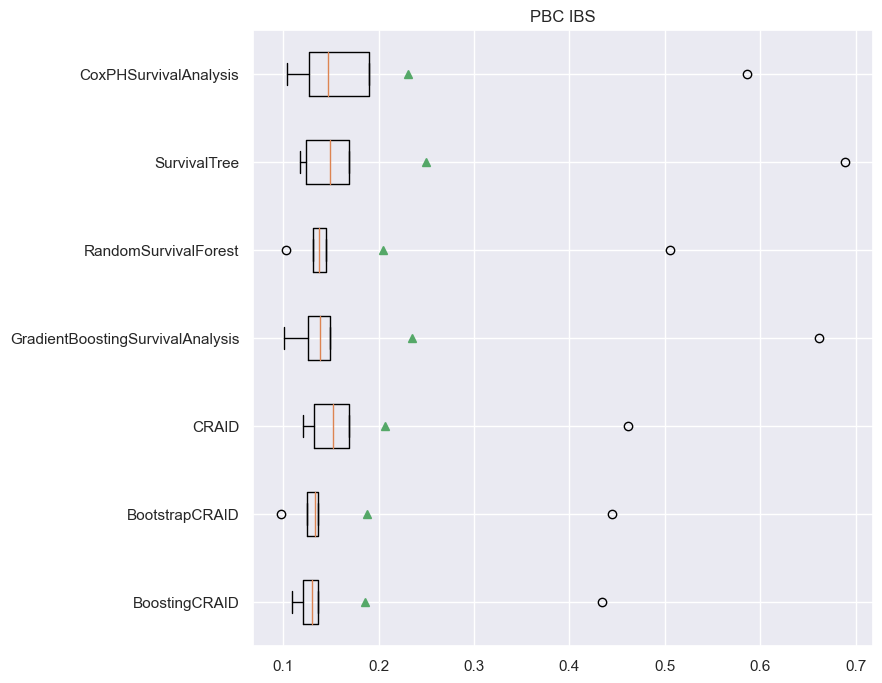

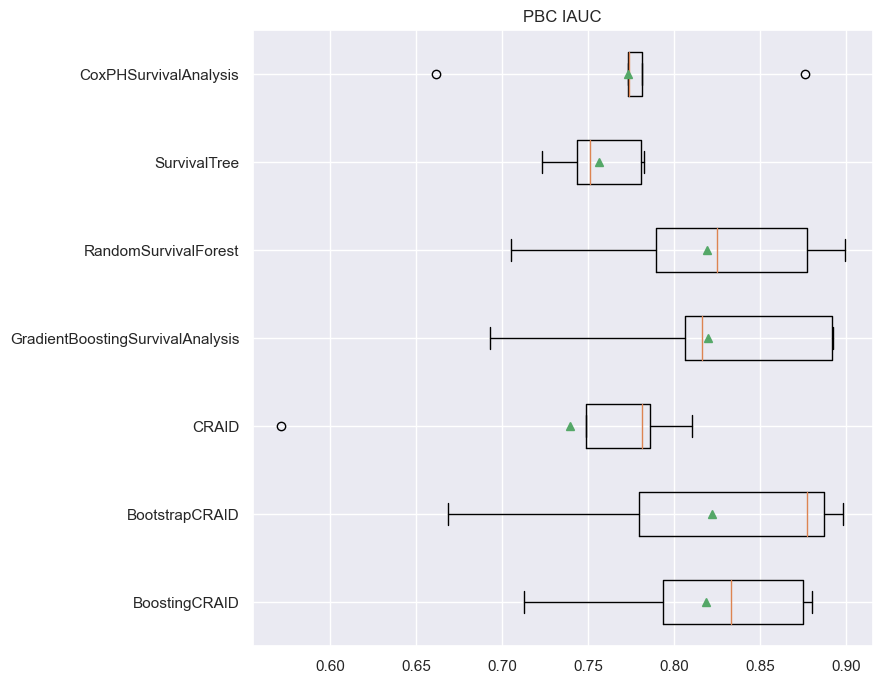

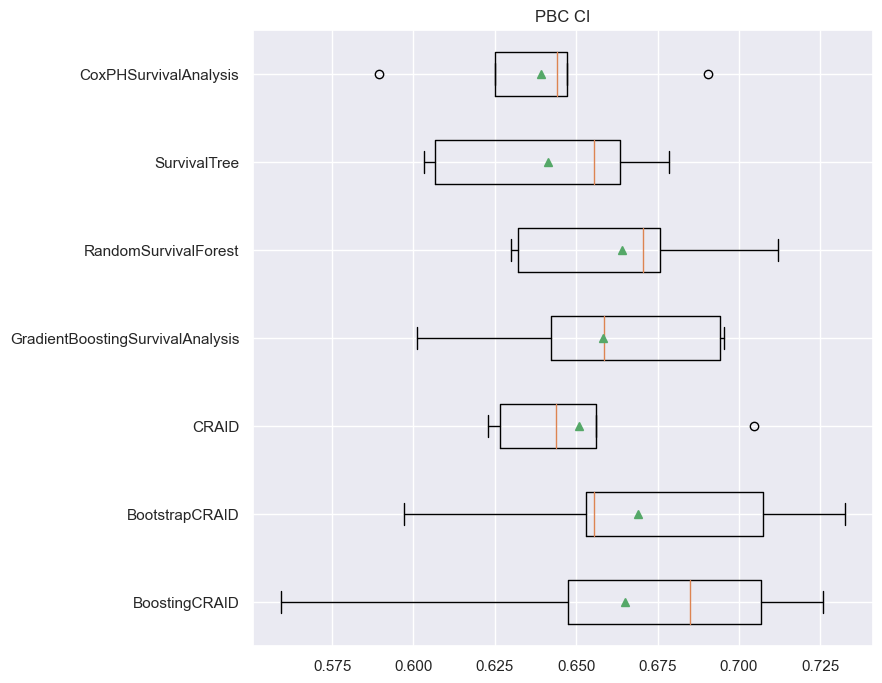

In [142]:
plot_results(df, dir_path = "./EXP_RES/", 
             metrics = ["IBS", "IAUC", "CI"], #"CI_CENS"], 
             dataset_name = "PBC")

In [185]:
df_pbc = df.copy()
df_pbc['METHOD'] = df_pbc.apply(lambda x: x["METHOD"].replace("CRAID", "Tree(%s)" %(x['CRIT'])), axis = 1)
df_best_pbc = get_best_results(df_pbc, "IBS", "min")
df_best_pbc.loc[:, ['METHOD', "CI_mean","IBS_mean","IAUC_mean"]]

METHOD   CI_mean  IBS_mean  IAUC_mean
0              CoxPHSurvivalAnalysis  0.639165  0.230611   0.773082
1                       SurvivalTree  0.640797  0.249392   0.746993
2               RandomSurvivalForest  0.645083  0.204261   0.804812
3   GradientBoostingSurvivalAnalysis  0.652443  0.235008   0.804364
4                         Tree(peto)  0.629764  0.232924   0.734733
5                  Tree(tarone-ware)  0.624939  0.224979   0.717584
6                     Tree(wilcoxon)  0.638029  0.206954   0.724173
7                      Tree(logrank)  0.640048  0.226744   0.729495
8                BootstrapTree(peto)  0.648916  0.192677   0.804292
9         BootstrapTree(tarone-ware)  0.658078  0.191593   0.812505
10           BootstrapTree(wilcoxon)  0.655646  0.189693   0.797702
11            BootstrapTree(logrank)  0.662280  0.187402   0.814863
12                BoostingTree(peto)  0.652555  0.186159   0.802144
13         BoostingTree(tarone-ware)  0.642768  0.194166   0.796801
14            BoostingTree(wilcoxon)  0.636782  0.206203   0.739872
15             BoostingTree(logrank)  0.645933  0.195537   0.811568

In [190]:
df_pbc = df.copy()
df_pbc['METHOD'] = df_pbc.apply(lambda x: x["METHOD"].replace("CRAID", "Tree(%s)" %(x['CRIT'])), axis = 1)
df_best_pbc = get_best_results(df_pbc, "CI", "max")
df_best_pbc.loc[:, ['METHOD', "CI_mean","IBS_mean","IAUC_mean"]]
# df_fin = df_best_pbc.loc[:, ['METHOD', "CI_mean","IBS_mean","IAUC_mean"]].round(5)
# df_fin.to_csv('./table_pbc_res.csv', index = False, sep = "&")

METHOD   CI_mean  IBS_mean  IAUC_mean
0              CoxPHSurvivalAnalysis  0.639280  0.230609   0.745803
1                       SurvivalTree  0.632307  0.300120   0.689021
2               RandomSurvivalForest  0.665621  0.232262   0.781778
3   GradientBoostingSurvivalAnalysis  0.660998  0.292300   0.785937
4                         Tree(peto)  0.631310  0.257174   0.710296
5                  Tree(tarone-ware)  0.650793  0.277211   0.708010
6                     Tree(wilcoxon)  0.649755  0.212598   0.697081
7                      Tree(logrank)  0.640048  0.226724   0.705382
8                BootstrapTree(peto)  0.666645  0.197392   0.794760
9         BootstrapTree(tarone-ware)  0.667681  0.208220   0.769340
10           BootstrapTree(wilcoxon)  0.661869  0.210151   0.781259
11            BootstrapTree(logrank)  0.669074  0.193335   0.795208
12                BoostingTree(peto)  0.666294  0.217439   0.785410
13         BoostingTree(tarone-ware)  0.660331  0.210751   0.770007
14            BoostingTree(wilcoxon)  0.658954  0.201994   0.785023
15             BoostingTree(logrank)  0.660992  0.210998   0.782518

In [179]:
df[df['METHOD'] == "BoostingCRAID"].sort_values("IBS_mean")

METHOD                                             PARAMS  \
517  BoostingCRAID  {'aggreg_func': 'mean', 'categ': ['trt', 'sex'...   
325  BoostingCRAID  {'aggreg_func': 'wei', 'categ': ['trt', 'sex',...   
493  BoostingCRAID  {'aggreg_func': 'mean', 'categ': ['trt', 'sex'...   
516  BoostingCRAID  {'aggreg_func': 'mean', 'categ': ['trt', 'sex'...   
301  BoostingCRAID  {'aggreg_func': 'wei', 'categ': ['trt', 'sex',...   
..             ...                                                ...   
664  BoostingCRAID  {'aggreg_func': 'mean', 'categ': ['trt', 'sex'...   
540  BoostingCRAID  {'aggreg_func': 'mean', 'categ': ['trt', 'sex'...   
348  BoostingCRAID  {'aggreg_func': 'wei', 'categ': ['trt', 'sex',...   
550  BoostingCRAID  {'aggreg_func': 'mean', 'categ': ['trt', 'sex'...   
358  BoostingCRAID  {'aggreg_func': 'wei', 'categ': ['trt', 'sex',...   

           TIME                                                 CI  \
517  232.489900  [0.7254386, 0.65882353, 0.66245695, 0.58176471...   
325  234.751142  [0.72660819, 0.65939742, 0.65786452, 0.585, 0....   
493  181.533499  [0.71432749, 0.65480631, 0.6891504, 0.58176471...   
516  154.819038  [0.71432749, 0.65136298, 0.6891504, 0.54617647...   
301  175.663167  [0.71578947, 0.65222382, 0.68398393, 0.585, 0....   
..          ...                                                ...   
664   95.279697  [0.72807018, 0.6579627, 0.6727899, 0.56573529,...   
540  114.917866  [0.63084795, 0.67977044, 0.66216992, 0.5501470...   
348  117.193922  [0.63084795, 0.67604017, 0.66245695, 0.5519117...   
550  227.461967  [0.59736842, 0.61262554, 0.69977038, 0.5161764...   
358  237.307905  [0.59736842, 0.62065997, 0.70292767, 0.5179411...   

                                               CI_CENS  \
517  [0.86290323, 0.80157835, 0.77791798, 0.7801672...   
325  [0.86592742, 0.80157835, 0.77476341, 0.7837514...   
493  [0.83971774, 0.79988726, 0.79495268, 0.7801672...   
516  [0.83971774, 0.78128523, 0.79495268, 0.7371565...   
301  [0.83971774, 0.79706877, 0.78675079, 0.7837514...   
..                                                 ...   
664  [0.84727823, 0.77170237, 0.78044164, 0.7526881...   
540  [0.7515121, 0.85062007, 0.7785489, 0.74313023,...   
348  [0.7515121, 0.85005637, 0.78044164, 0.74671446...   
550  [0.71043347, 0.73337091, 0.83911672, 0.7060931...   
358  [0.71043347, 0.73900789, 0.8384858, 0.70908005...   

                                                   IBS  \
517  [0.43360758, 0.12996728, 0.10965985, 0.1368116...   
325  [0.44001436, 0.12973589, 0.11053459, 0.1356569...   
493  [0.43657259, 0.13004503, 0.11665028, 0.1368116...   
516  [0.43657259, 0.12896663, 0.11665028, 0.1540989...   
301  [0.44618519, 0.1298646, 0.11795221, 0.1356569,...   
..                                                 ...   
664  [0.92243558, 0.12683153, 0.10468031, 0.1373882...   
540  [1.02943629, 0.12161, 0.1144707, 0.15108601, 0...   
348  [1.02943629, 0.12094619, 0.11477761, 0.1516918...   
550  [1.09845144, 0.12706656, 0.10646199, 0.1348865...   
358  [1.09845144, 0.12755265, 0.10652126, 0.1345925...   

                                                  IAUC         CRIT   CI_mean  \
517  [0.90894385, 0.78776675, 0.63183091, 0.8058741...         peto  0.652555   
325  [0.90956514, 0.7886433, 0.63038116, 0.80842533...         peto  0.652280   
493  [0.9200853, 0.7842944, 0.68071115, 0.80587417,...         peto  0.651342   
516  [0.9200853, 0.8197452, 0.68071115, 0.77027877,...         peto  0.647062   
301  [0.91929304, 0.78126462, 0.68110135, 0.8084253...         peto  0.650203   
..                                                 ...          ...       ...   
664  [0.76854009, 0.73866603, 0.68073634, 0.7976638...      logrank  0.653475   
540  [0.71447101, 0.79627927, 0.60979781, 0.7610009...  tarone-ware  0.631769   
348  [0.71447101, 0.79707136, 0.60124, 0.75911076, ...  tarone-ware  0.631551   
550  [0.69960333, 0.79301368, 0.68728709, 0.7910268...  tarone-ware  0.599646   
358  [0.6

In [134]:
df[df["METHOD"] == "GradientBoostingSurvivalAnalysis"].sort_values("IBS_mean")

METHOD  \
102  GradientBoostingSurvivalAnalysis   
76   GradientBoostingSurvivalAnalysis   
94   GradientBoostingSurvivalAnalysis   
103  GradientBoostingSurvivalAnalysis   
110  GradientBoostingSurvivalAnalysis   
..                                ...   
113  GradientBoostingSurvivalAnalysis   
114  GradientBoostingSurvivalAnalysis   
105  GradientBoostingSurvivalAnalysis   
106  GradientBoostingSurvivalAnalysis   
115  GradientBoostingSurvivalAnalysis   

                                                PARAMS      TIME  \
102  {'learning_rate': 0.1, 'loss': 'coxph', 'max_d...  3.182353   
76   {'learning_rate': 0.05, 'loss': 'coxph', 'max_...  3.833330   
94   {'learning_rate': 0.1, 'loss': 'coxph', 'max_d...  3.755001   
103  {'learning_rate': 0.1, 'loss': 'coxph', 'max_d...  3.770643   
110  {'learning_rate': 0.5, 'loss': 'coxph', 'max_d...  2.898633   
..                                                 ...       ...   
113  {'learning_rate': 0.5, 'loss': 'coxph', 'max_d...  3.032351   
114  {'learning_rate': 0.5, 'loss': 'coxph', 'max_d...  3.362774   
105  {'learning_rate': 0.5, 'loss': 'coxph', 'max_d...  3.339974   
106  {'learning_rate': 0.5, 'loss': 'coxph', 'max_d...  4.084568   
115  {'learning_rate': 0.5, 'loss': 'coxph', 'max_d...  4.142951   

                                                    CI  \
102  [0.68625731, 0.66312769, 0.69489093, 0.6082352...   
76   [0.70204678, 0.65164993, 0.69001148, 0.6138235...   
94   [0.70116959, 0.66197991, 0.68226177, 0.5955882...   
103  [0.69005848, 0.65595409, 0.68656716, 0.6038235...   
110  [0.6994152, 0.65050215, 0.67766935, 0.59264706...   
..                                                 ...   
113  [0.69327485, 0.6579627, 0.67795637, 0.55970588...   
114  [0.68011696, 0.63787661, 0.67106774, 0.5685294...   
105  [0.69035088, 0.65164993, 0.66044776, 0.5711764...   
106  [0.71754386, 0.64390244, 0.67766935, 0.5644117...   
115  [0.72222222, 0.64332855, 0.68168772, 0.5579411...   

                                               CI_CENS  \
102  [0.84879032, 0.80101466, 0.81324921, 0.8040621...   
76   [0.86491935, 0.80214205, 0.81135647, 0.8136200...   
94   [0.859375, 0.80552424, 0.81324921, 0.7921147, ...   
103  [0.84425403, 0.79143179, 0.81135647, 0.7962963...   
110  [0.86038306, 0.7897407, 0.82018927, 0.78972521...   
..                                                 ...   
113  [0.84072581, 0.78184893, 0.81577287, 0.7461170...   
114  [0.84022177, 0.77226607, 0.80694006, 0.7682198...   
105  [0.85080645, 0.76155581, 0.77917981, 0.7646356...   
106  [0.84828629, 0.75591883, 0.81135647, 0.7718040...   
115  [0.86592742, 0.75197294, 0.79684543, 0.7401433...   

                                                   IBS  \
102  [0.68996546, 0.12150756, 0.09658182, 0.1346718...   
76   [0.69053225, 0.12345332, 0.09727189, 0.1354759...   
94   [0.66132906, 0.12550877, 0.10106726, 0.1491235...   
103  [0.65862088, 0.13039579, 0.10160702, 0.1472650...   
110  [0.65849356, 0.13287671, 0.11401916, 0.1487848...   
..                                                 ...   
113  [1.53051195, 0.14669501, 0.10068619, 0.1982440...   
114  [1.55625195, 0.14863868, 0.09907722, 0.1920140...   
105  [1.56498122, 0.15884009, 0.10670006, 0.1962569...   
106  [1.63530398, 0.16533092, 0.10412371, 0.2086123...   
115  [1.6570912, 0.17433627, 0.10710945, 0.21829528...   

                                                  IAUC CRIT   CI_mean  \
102  [0.88177621, 0.806686, 0.64988061, 0.82677627,...  NaN  0.657567   
76   [0.90130617, 0.80177804, 0.64011116, 0.8338297...  NaN  0.657572   
94   [0.89595029, 0.81579358, 0.65103794, 0.7994907...  NaN  0.652443   
103  [0.88629547, 0.7841799, 0.64439967, 0.81170763...  NaN  0.652641   
110  [0.88143357, 0.77948093, 0.64128211, 0.8083647...  NaN  0.648408   
..                                                 ...  ...       ...   
113  [0.83854893, 0.81850271, 0.67023946, 0.7258445...  NaN  0.643316   
114  [0.80100332, 0.83545763, 0.68132002, 0.75

In [121]:
df.loc[df["IBS"].apply(np.mean).idxmin(), :]

METHOD                                             BootstrapCRAID
PARAMS          {'categ': ['trt', 'sex', 'ascites', 'hepato', ...
TIME                                                   233.420394
CI                            [0.6553802, 0.70522388, 0.59823529]
CI_CENS                      [0.78523112, 0.83091483, 0.81899642]
IBS                          [0.12609679, 0.10593446, 0.11658639]
IAUC                         [0.77838959, 0.66391881, 0.87771395]
CRIT                                                      logrank
CI_mean                                                   0.66885
CI_CENS_mean                                             0.819634
IBS_mean                                                 0.192093
IAUC_mean                                                0.819931
Name: 291, dtype: object

In [125]:
df.iloc[291]

METHOD                                             BootstrapCRAID
PARAMS          {'categ': ['trt', 'sex', 'ascites', 'hepato', ...
TIME                                                   233.420394
CI                            [0.6553802, 0.70522388, 0.59823529]
CI_CENS                      [0.78523112, 0.83091483, 0.81899642]
IBS                          [0.12609679, 0.10593446, 0.11658639]
IAUC                         [0.77838959, 0.66391881, 0.87771395]
CRIT                                                      logrank
CI_mean                                                   0.66885
CI_CENS_mean                                             0.819634
IBS_mean                                                 0.192093
IAUC_mean                                                0.819931
Name: 291, dtype: object

In [149]:
from survivors.tree import CRAID
import numpy as np
import pandas as pd
import survivors.datasets as ds
import survivors.criteria as scrit
from sksurv.linear_model import CoxPHSurvivalAnalysis
from survivors.ensemble import BootstrapCRAID, BoostingCRAID
X, y, features, categ, sch_nan = ds.load_gbsg_dataset()

cox = CoxPHSurvivalAnalysis().fit(X,y)
survs = cox.predict_survival_function(X)

In [147]:
X['htreat'] = X['htreat'].map({0: "NO", 1: "YES"})

In [150]:
cox = CoxPHSurvivalAnalysis().fit(X.loc[:, ['htreat']],y)

In [156]:
cox.predict_cumulative_hazard_function(np.array([[1]]))

array([StepFunction(x=array([   8.,   15.,   16.,   17.,   18.,   29.,   42.,   46.,   57.,
         63.,   65.,   67.,   71.,   72.,   98.,  113.,  114.,  120.,
        148.,  160.,  168.,  169.,  171.,  173.,  175.,  177.,  180.,
        181.,  184.,  186.,  191.,  195.,  205.,  213.,  223.,  227.,
        229.,  233.,  238.,  241.,  242.,  247.,  249.,  251.,  272.,
        273.,  275.,  276.,  281.,  285.,  286.,  288.,  293.,  296.,
        305.,  307.,  308.,  310.,  316.,  319.,  322.,  329.,  336.,
        338.,  343.,  344.,  348.,  350.,  353.,  357.,  358.,  359.,
        360.,  368.,  369.,  370.,  371.,  372.,  374.,  375.,  377.,
        379.,  385.,  392.,  394.,  403.,  410.,  415.,  417.,  420.,
        424.,  426.,  429.,  432.,  436.,  438.,  446.,  448.,  449.,
        455.,  456.,  460.,  461.,  463.,  465.,  471.,  473.,  475.,
        476.,  481.,  486.,  488.,  490.,  491.,  495.,  498.,  500.,
        502.,  503.,  504.,  515.,  518.,  525.,  526.,  529.,  530.

In [1]:
from survivors.tests.experiment import run
WUHAN_exp = run("WUHAN", with_self = ["BOOST"], #["TREE", "BSTR", "BOOST"], 
                with_external = False)

c:\programdata\anaconda3\envs\omsexpmt\lib\site-packages\pandas\core\series.py:4138: RuntimeWarning: Mean of empty slice
  mapped = lib.map_infer(values, f, convert=convert_dtype)
c:\programdata\anaconda3\envs\omsexpmt\lib\site-packages\pandas\core\series.py:4138: RuntimeWarning: All-NaN axis encountered
  mapped = lib.map_infer(values, f, convert=convert_dtype)


[0.7235 0.6857 0.7201 0.7295 0.7265 0.7384 0.7411 0.7546 0.7599 0.751
 0.7541 0.7529 0.7517 0.7546 0.7579 0.754  0.7556 0.7557 0.7571 0.7576]
fitted: 9 models.
[0.6938 0.6784 0.6957 0.712  0.7311 0.7161 0.714  0.7204 0.7221 0.7314
 0.7384 0.7411 0.7419 0.749  0.7507 0.7484 0.7501 0.7518 0.7539 0.7543]
fitted: 20 models.
[0.7355 0.6936 0.7082 0.7137 0.7239 0.7296 0.739  0.7448 0.7535 0.7471
 0.7486 0.7516 0.7553 0.7534 0.7533 0.7521 0.7524 0.7576 0.7569 0.757 ]
fitted: 18 models.
[0.7095 0.6778 0.6896 0.6985 0.7055 0.7269 0.7326 0.744  0.7418 0.742
 0.7472 0.7422 0.7436 0.7538 0.7592 0.7607 0.76   0.7609 0.7654 0.7614]
fitted: 19 models.
[0.6937 0.6721 0.7135 0.7081 0.7154 0.7198 0.7302 0.7306 0.7309 0.736
 0.7411 0.7428 0.749  0.7537 0.7501 0.7505 0.7499 0.7514 0.7517 0.7535]
fitted: 14 models.
EXECUTION TIME OF BoostingCRAID: 1378.6377193927765 {'CI': 0.7657171439802439, 'CI_CENS': 0.8862247262185734, 'IBS': 0.1260728434855542, 'IAUC': 0.7410606940957319}
[0.7235 0.7037 0.6916 0.714  

[0.7193 0.6975 0.7153 0.7288 0.7368 0.7309 0.7312 0.7517 0.7451 0.7409
 0.7436 0.7401 0.7413 0.7504 0.7531 0.7497 0.7509 0.7524 0.7505 0.7535]
fitted: 20 models.
[0.7136 0.7042 0.6839 0.6813 0.7006 0.7001 0.7016 0.7076 0.7061 0.7085
 0.7181 0.7149 0.7223 0.7277 0.7286 0.7304 0.7314 0.735  0.7385 0.7382]
fitted: 19 models.
EXECUTION TIME OF BoostingCRAID: 1419.2373156547546 {'CI': 0.7546914539984584, 'CI_CENS': 0.8882650392636963, 'IBS': 0.1316869231950372, 'IAUC': 0.719876207009525}
[0.7371 0.71   0.7045 0.7172 0.7276 0.7328 0.7375 0.7333 0.735  0.7363
 0.7282 0.7297 0.7351 0.7343 0.7299 0.7322 0.735  0.7339 0.7352 0.7386]
fitted: 20 models.
[0.6687 0.6648 0.6981 0.6998 0.7213 0.7219 0.725  0.7245 0.7294 0.7267
 0.7323 0.7361 0.7366 0.7438 0.7451 0.7461 0.7448 0.7418 0.742  0.7435]
fitted: 16 models.
[0.7355 0.6875 0.6912 0.7033 0.7153 0.7105 0.7186 0.7272 0.7267 0.7375
 0.7409 0.7447 0.7535 0.756  0.7549 0.7533 0.7597 0.7587 0.7628 0.7627]
fitted: 19 models.
[0.7193 0.6861 0.6759 0.69

[0.7235 0.7136 0.6768 0.6964 0.7111 0.7228 0.7314 0.7337 0.7296 0.7342
 0.7359 0.7391 0.7384 0.7317 0.7338 0.7364 0.7387 0.742  0.7479 0.7473]
fitted: 19 models.
[0.7024 0.692  0.6745 0.6981 0.7053 0.7292 0.7323 0.7305 0.7285 0.7315
 0.7348 0.7378 0.741  0.7417 0.7416 0.7411 0.7486 0.7527 0.7529 0.7539]
fitted: 20 models.
[0.7355 0.6894 0.6993 0.701  0.7016 0.7211 0.7204 0.7245 0.7215 0.7429
 0.7476 0.7493 0.7488 0.7504 0.753  0.7593 0.7592 0.7607 0.7585 0.7613]
fitted: 20 models.
[0.7405 0.7141 0.7254 0.7424 0.7437 0.7344 0.7383 0.7422 0.7457 0.7496
 0.7488 0.7524 0.7525 0.7563 0.7561 0.7551 0.7568 0.7541 0.7587 0.7632]
fitted: 20 models.
[0.6815 0.666  0.6888 0.6811 0.6879 0.6839 0.6887 0.6961 0.7055 0.7069
 0.712  0.7206 0.7275 0.7349 0.7377 0.7451 0.7475 0.7506 0.7531 0.7488]
fitted: 19 models.
EXECUTION TIME OF BoostingCRAID: 1426.231926202774 {'CI': 0.760773041658774, 'CI_CENS': 0.8908156229470707, 'IBS': 0.12484336032840382, 'IAUC': 0.7516376720053024}
[0.6925 0.6853 0.6914 0.70

[0.7176 0.7132 0.7011 0.7221 0.7259 0.7269 0.7352 0.7436 0.7354 0.7436
 0.7468 0.7565 0.7529 0.7504 0.7537 0.7575 0.7569 0.756  0.756  0.7579]
fitted: 20 models.
[0.7019 0.6959 0.6948 0.6985 0.7256 0.7264 0.7345 0.7382 0.751  0.7507
 0.7512 0.7523 0.7547 0.7597 0.7665 0.764  0.7657 0.7657 0.7655 0.7634]
fitted: 15 models.
EXECUTION TIME OF BoostingCRAID: 1423.5066366195679 {'CI': 0.7609063250573549, 'CI_CENS': 0.8819486451646703, 'IBS': 0.1298398881413251, 'IAUC': 0.740519220186668}
[0.6934 0.6986 0.7241 0.7184 0.718  0.7267 0.7306 0.7288 0.7257 0.7274
 0.7319 0.7365 0.7397 0.7417 0.7432 0.743  0.7477 0.7475 0.749  0.7488]
fitted: 19 models.
[0.725  0.6613 0.7006 0.7228 0.7342 0.7386 0.7439 0.748  0.7446 0.7317
 0.7286 0.7286 0.7288 0.7315 0.7253 0.7236 0.7248 0.7281 0.7312 0.7309]
fitted: 8 models.
[0.7437 0.6519 0.713  0.7293 0.7328 0.7499 0.7513 0.7575 0.7501 0.7494
 0.7521 0.7535 0.7538 0.7574 0.7613 0.7637 0.7647 0.7663 0.7657 0.7675]
fitted: 20 models.
[0.6838 0.6733 0.7127 0.719

[0.6925 0.6853 0.7023 0.7173 0.7244 0.7331 0.7261 0.7263 0.7268 0.729
 0.727  0.7314 0.7352 0.7329 0.7352 0.7363 0.7378 0.7326 0.7309 0.7315]
fitted: 17 models.
[0.725  0.6714 0.7171 0.7151 0.7301 0.7254 0.7312 0.7305 0.7345 0.7419
 0.7427 0.7428 0.7427 0.7419 0.7394 0.7425 0.744  0.7493 0.7511 0.7539]
fitted: 20 models.
[0.7437 0.7002 0.7104 0.7093 0.7179 0.7232 0.7301 0.7365 0.7341 0.7341
 0.7328 0.7348 0.7347 0.7403 0.7398 0.7385 0.7377 0.7371 0.7405 0.7399]
fitted: 1 models.
[0.6285 0.649  0.6814 0.6762 0.6885 0.6923 0.6965 0.7044 0.7044 0.7136
 0.7227 0.7318 0.7324 0.7371 0.7394 0.7402 0.7477 0.7479 0.7466 0.7465]
fitted: 18 models.
[0.7036 0.6804 0.7066 0.7289 0.7313 0.7466 0.7544 0.7553 0.7583 0.7562
 0.7597 0.758  0.7554 0.7596 0.761  0.7604 0.762  0.7607 0.7609 0.7617]
fitted: 17 models.
EXECUTION TIME OF BoostingCRAID: 579.2748203277588 {'CI': 0.7315231327386859, 'CI_CENS': 0.8848359791546084, 'IBS': 0.1286014961996614, 'IAUC': 0.7373991569724501}
[0.6925 0.6812 0.6866 0.6931

[0.6466 0.667  0.703  0.7153 0.7259 0.7293 0.7334 0.7339 0.7324 0.7342
 0.7353 0.7351 0.7372 0.7395 0.7499 0.7521 0.7546 0.7539 0.7599 0.7597]
fitted: 19 models.
[0.7036 0.6972 0.6834 0.6982 0.7083 0.7155 0.7209 0.7269 0.7301 0.7356
 0.7351 0.7329 0.7289 0.7295 0.7281 0.7331 0.7363 0.7332 0.7339 0.7353]
fitted: 17 models.
EXECUTION TIME OF BoostingCRAID: 598.1865861415863 {'CI': 0.7512323708530089, 'CI_CENS': 0.8951941274105986, 'IBS': 0.12114157533830934, 'IAUC': 0.751603415779884}
[0.6925 0.6812 0.6866 0.6931 0.6974 0.7053 0.704  0.7134 0.7134 0.7148
 0.7192 0.7185 0.7202 0.7258 0.7277 0.7301 0.7378 0.7364 0.7366 0.7389]
fitted: 20 models.
[0.725  0.6707 0.7153 0.6927 0.6918 0.702  0.703  0.703  0.7027 0.7034
 0.708  0.7075 0.707  0.7128 0.7178 0.7217 0.7205 0.7272 0.7312 0.73  ]
fitted: 19 models.
[0.7357 0.671  0.6471 0.6748 0.6815 0.6894 0.6978 0.7068 0.7127 0.7159
 0.7164 0.7236 0.7229 0.7283 0.7296 0.7322 0.733  0.735  0.7359 0.7348]
fitted: 19 models.
[0.6466 0.6517 0.6822 0.69

[0.6925 0.6812 0.701  0.706  0.7099 0.7201 0.7214 0.722  0.728  0.7221
 0.7242 0.7256 0.7263 0.7278 0.7323 0.7319 0.7376 0.7336 0.7362 0.7366]
fitted: 17 models.
[0.725  0.6707 0.7131 0.725  0.7398 0.7503 0.7548 0.7519 0.7594 0.7586
 0.7532 0.7561 0.7554 0.7596 0.7598 0.7607 0.7661 0.7609 0.7618 0.7642]
fitted: 17 models.
[0.7432 0.7099 0.6991 0.7135 0.709  0.7108 0.7168 0.7266 0.7249 0.7278
 0.7261 0.7314 0.7331 0.73   0.7305 0.7306 0.7244 0.7274 0.7299 0.7298]
fitted: 1 models.
[0.6927 0.6896 0.6915 0.681  0.6916 0.6921 0.6983 0.7049 0.7116 0.7107
 0.7168 0.721  0.7254 0.7347 0.7309 0.7317 0.7342 0.7355 0.7368 0.7354]
fitted: 19 models.
[0.712  0.7111 0.7135 0.7117 0.7089 0.7157 0.7187 0.7244 0.7209 0.7184
 0.7212 0.7259 0.7338 0.7428 0.743  0.7474 0.7445 0.736  0.7345 0.7349]
fitted: 16 models.
EXECUTION TIME OF BoostingCRAID: 799.9601752758026 {'CI': 0.7331041246323804, 'CI_CENS': 0.8723749116650265, 'IBS': 0.1316412741468348, 'IAUC': 0.730585514533417}
[0.1039 0.1541 0.153  0.1406

[0.6838 0.6691 0.7037 0.6896 0.7033 0.7121 0.7128 0.7096 0.7142 0.7166
 0.7174 0.7216 0.7335 0.7328 0.7359 0.7411 0.7352 0.7422 0.7421 0.737 ]
fitted: 18 models.
[0.6875 0.6824 0.6796 0.6909 0.7016 0.7095 0.7225 0.7193 0.7249 0.7206
 0.727  0.7301 0.7279 0.7327 0.7328 0.7304 0.7318 0.7314 0.7331 0.7333]
fitted: 20 models.
EXECUTION TIME OF BoostingCRAID: 726.6851196289062 {'CI': 0.7270952459959388, 'CI_CENS': 0.8636926082470271, 'IBS': 0.13066031273694453, 'IAUC': 0.7337464208999552}
[0.087  0.1334 0.122  0.1209 0.128  0.1289 0.1252 0.1214 0.1215 0.1221
 0.1263 0.1239 0.1257 0.1244 0.1228 0.1214 0.1219 0.1209 0.1209 0.1199]
fitted: 1 models.
[0.1454 0.1975 0.1749 0.1602 0.1486 0.1505 0.1489 0.1446 0.1454 0.1453
 0.1432 0.1419 0.1412 0.1415 0.1404 0.1378 0.1374 0.1349 0.1342 0.1321]
fitted: 20 models.
[0.1284 0.1568 0.152  0.1493 0.1436 0.1371 0.1293 0.1253 0.1246 0.1251
 0.1195 0.1216 0.1188 0.1165 0.1161 0.1177 0.1182 0.1186 0.1179 0.1176]
fitted: 15 models.
[0.1669 0.1734 0.1685 0.15

In [2]:
from survivors.tests.experiment import run, import_tables, plot_results, get_best_by_full_name
df = WUHAN_exp.get_result()
df_best = get_best_by_full_name(df, by_metric = "IBS", choose = "min")
df_fin = df_best.loc[:, ["METHOD", "CI_mean", "IBS_mean", "IAUC_mean"]].round(5)
df_fin#.to_csv('./table_gbsg_res.csv', index = False, sep = "&")

METHOD  CI_mean  IBS_mean  IAUC_mean
0         BoostingTree(peto)  0.76593   0.12575    0.74751
1  BoostingTree(tarone-ware)  0.75123   0.12114    0.75160
2     BoostingTree(wilcoxon)  0.76340   0.12344    0.75114
3      BoostingTree(logrank)  0.75735   0.11981    0.75044

In [2]:
from survivors.tests.experiment import run
ONK_exp = run("ONK", with_self = ["TREE", "BSTR", "BOOST"], 
                with_external = False)

c:\programdata\anaconda3\envs\omsexpmt\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


DIAG {'C20': 0, 'C50.4': 1, 'C61': 2}
EXECUTION TIME OF CRAID: 108.1923623085022 {'CI': 0.7180394835407545, 'CI_CENS': 0.7116006406560651, 'IBS': 0.18917284189132905, 'IAUC': 0.6880014608647731}
EXECUTION TIME OF CRAID: 108.72945046424866 {'CI': 0.7202671345052332, 'CI_CENS': 0.7165887858206131, 'IBS': 0.18621498325239064, 'IAUC': 0.7082096013696713}
EXECUTION TIME OF CRAID: 11.792778730392456 {'CI': 0.7060858527191263, 'CI_CENS': 0.6522000551241087, 'IBS': 0.17100836287183072, 'IAUC': 0.6752564870838644}
EXECUTION TIME OF CRAID: 12.000430583953857 {'CI': 0.7060858527191263, 'CI_CENS': 0.6522000551241087, 'IBS': 0.17100836287183072, 'IAUC': 0.6752564870838644}
EXECUTION TIME OF CRAID: 87.69760298728943 {'CI': 0.7180394835407545, 'CI_CENS': 0.7116006406560651, 'IBS': 0.18917284189132905, 'IAUC': 0.6880014608647731}
EXECUTION TIME OF CRAID: 108.89600133895874 {'CI': 0.7202671345052332, 'CI_CENS': 0.7165887858206131, 'IBS': 0.18621498325239064, 'IAUC': 0.7082096013696713}
EXECUTION TIME O

EXECUTION TIME OF CRAID: 85.82112073898315 {'CI': 0.7222643319626141, 'CI_CENS': 0.7174807074451509, 'IBS': 0.18473500668945478, 'IAUC': 0.7068282083252708}
EXECUTION TIME OF CRAID: 104.51055145263672 {'CI': 0.7275465172440189, 'CI_CENS': 0.7194838967870166, 'IBS': 0.18275011481845485, 'IAUC': 0.7179354314572581}
EXECUTION TIME OF CRAID: 11.823616981506348 {'CI': 0.7085931036227004, 'CI_CENS': 0.6568185634746007, 'IBS': 0.1741508004763021, 'IAUC': 0.6721804344433145}
EXECUTION TIME OF CRAID: 11.979292631149292 {'CI': 0.7085931036227004, 'CI_CENS': 0.6568185634746007, 'IBS': 0.1741508004763021, 'IAUC': 0.6721804344433145}
EXECUTION TIME OF CRAID: 52.742048501968384 {'CI': 0.752371679935391, 'CI_CENS': 0.7443040214040948, 'IBS': 0.18035888038530298, 'IAUC': 0.7360080401096303}
EXECUTION TIME OF CRAID: 55.89566659927368 {'CI': 0.7515672672189389, 'CI_CENS': 0.7441446859402105, 'IBS': 0.18083857747263213, 'IAUC': 0.7368398790586704}
EXECUTION TIME OF CRAID: 14.372657060623169 {'CI': 0.7110

[0.538  0.6934 0.7174 0.7086 0.71   0.7128 0.7088 0.709  0.7025 0.7035
 0.7105 0.7034 0.7016 0.7228 0.7214 0.7275 0.7266 0.7252 0.7239 0.724
 0.7244 0.7243 0.7237 0.7234 0.7227 0.7219 0.72   0.7201 0.7205 0.7204]
fitted: 16 models.
[0.5    0.6869 0.704  0.7012 0.7004 0.699  0.6983 0.6984 0.7011 0.701
 0.7211 0.7135 0.7108 0.7161 0.7185 0.716  0.7168 0.7163 0.7157 0.7156
 0.7164 0.7156 0.7155 0.7151 0.7145 0.7177 0.716  0.7161 0.7168 0.7166]
fitted: 11 models.
[0.5409 0.6902 0.7182 0.7122 0.71   0.7087 0.7057 0.7073 0.7045 0.705
 0.7166 0.7101 0.7091 0.719  0.7223 0.7187 0.7179 0.7173 0.7163 0.7166
 0.7162 0.7164 0.7163 0.7199 0.7184 0.7189 0.7174 0.7181 0.7184 0.7187]
fitted: 15 models.
[0.5188 0.6683 0.708  0.7016 0.7283 0.7324 0.7324 0.7335 0.7277 0.7275
 0.7309 0.7244 0.7221 0.7266 0.7288 0.7241 0.7239 0.7236 0.7222 0.7225
 0.7218 0.7215 0.7217 0.7224 0.7216 0.7221 0.7213 0.7247 0.7254 0.7249]
fitted: 8 models.
[0.5231 0.662  0.7045 0.6982 0.6963 0.6964 0.6973 0.6966 0.7024 0.7038
 

[0.189  0.1738 0.1778 0.1794 0.1812 0.1826 0.1827 0.1825 0.1791 0.1784
 0.1763 0.1764 0.1752 0.1741 0.1717 0.1725 0.1729 0.1735 0.1741 0.1745
 0.1745 0.174  0.1748 0.1732 0.1733 0.1728 0.173  0.1733 0.1724 0.1718]
fitted: 15 models.
[0.1911 0.1769 0.1761 0.1833 0.1779 0.1788 0.1802 0.1805 0.1785 0.1794
 0.1781 0.1787 0.1782 0.1774 0.1757 0.1766 0.1771 0.1777 0.1784 0.1788
 0.1789 0.1785 0.179  0.1784 0.1786 0.1784 0.1786 0.1788 0.1783 0.1784]
fitted: 15 models.
[0.1997 0.1847 0.1773 0.1809 0.1809 0.1813 0.1827 0.1823 0.1805 0.1817
 0.1802 0.1803 0.179  0.1781 0.1764 0.1772 0.1777 0.1784 0.1789 0.1792
 0.1792 0.1785 0.179  0.1785 0.1787 0.1781 0.1781 0.1783 0.1781 0.1775]
fitted: 15 models.
EXECUTION TIME OF BootstrapCRAID: 194.4692051410675 {'CI': 0.7454076872685766, 'CI_CENS': 0.6831530819901691, 'IBS': 0.17952099832978857, 'IAUC': 0.7334777984823695}
[0.7006 0.6932 0.6705 0.6629 0.6679 0.6719 0.6815 0.6962 0.7008 0.7104]
fitted: 10 models.
[0.7207 0.6758 0.6605 0.6583 0.66   0.6628 0

[0.5537 0.5785 0.571  0.6203 0.6358 0.6419 0.6431 0.645  0.6475 0.6466
 0.6481 0.6513 0.6608 0.6635 0.6606 0.6612 0.6593 0.6663 0.6652 0.6674
 0.6715 0.6732 0.6721 0.6717 0.6703 0.6691 0.6696 0.6709 0.6694 0.6722]
fitted: 22 models.
EXECUTION TIME OF BootstrapCRAID: 102.25565767288208 {'CI': 0.7446820920246837, 'CI_CENS': 0.6574529528852324, 'IBS': 0.1820177299811369, 'IAUC': 0.7548898809160044}
[0.6955 0.7698 0.7982 0.809  0.81   0.8173 0.8237 0.8245 0.8265 0.8194]
fitted: 9 models.
[0.6658 0.7285 0.7641 0.7793 0.788  0.8007 0.8038 0.8128 0.8187 0.8147]
fitted: 9 models.
[0.7156 0.7681 0.7789 0.7924 0.7979 0.8086 0.8142 0.8074 0.8101 0.8055]
fitted: 7 models.
[0.6806 0.7479 0.7683 0.7841 0.7951 0.8002 0.8012 0.7957 0.8    0.8055]
fitted: 10 models.
[0.6728 0.7079 0.741  0.7539 0.7705 0.7759 0.7842 0.7867 0.7875 0.785 ]
fitted: 9 models.
EXECUTION TIME OF BootstrapCRAID: 220.55096173286438 {'CI': 0.8135399917522357, 'CI_CENS': 0.7459492687078121, 'IBS': 0.16525026346815225, 'IAUC': 0.8

[0.1907 0.179  0.1791 0.1737 0.1763 0.1705 0.1685 0.1665 0.1649 0.1655]
fitted: 9 models.
[0.1789 0.1632 0.1625 0.1606 0.1601 0.1574 0.1552 0.1555 0.1526 0.1529]
fitted: 9 models.
[0.1802 0.1737 0.1669 0.1675 0.1653 0.1626 0.1614 0.1619 0.1598 0.1596]
fitted: 10 models.
[0.187  0.173  0.162  0.1628 0.1604 0.1593 0.1582 0.1561 0.1554 0.1575]
fitted: 9 models.
EXECUTION TIME OF BootstrapCRAID: 262.0472981929779 {'CI': 0.8119368790672435, 'CI_CENS': 0.7423073190750101, 'IBS': 0.16545876571482324, 'IAUC': 0.806699595951686}
[0.1759 0.1658 0.163  0.1568 0.1587 0.1548 0.1533 0.1531 0.1532 0.1535
 0.1515 0.1516 0.1485 0.148  0.147  0.1469 0.1473 0.1466 0.146  0.1459
 0.1457 0.1452 0.1455 0.1454 0.1458 0.1459 0.1461 0.1463 0.1464 0.1467]
fitted: 22 models.
[0.1907 0.179  0.1791 0.1737 0.1763 0.1705 0.1685 0.1665 0.1649 0.1655
 0.1659 0.1665 0.1665 0.1668 0.1658 0.1658 0.1657 0.1645 0.1635 0.1636
 0.1636 0.1631 0.1636 0.1628 0.1627 0.162  0.1623 0.162  0.1618 0.1618]
fitted: 29 models.
[0.1789 

[0.7006 0.6932 0.6705 0.6629 0.6679 0.6719 0.6815 0.6962 0.7008 0.7104
 0.7087 0.7111 0.7169 0.7202 0.7233 0.7237 0.7234 0.7249 0.7249 0.7267
 0.7258 0.7252 0.7252 0.7287 0.7295 0.7315 0.7312 0.7311 0.7313 0.7306]
fitted: 26 models.
[0.7207 0.6758 0.6605 0.6583 0.66   0.6628 0.6704 0.6686 0.6687 0.6751
 0.6768 0.6784 0.6868 0.6879 0.6919 0.6935 0.6973 0.6974 0.6967 0.6968
 0.6956 0.6954 0.6982 0.6991 0.6984 0.698  0.6991 0.6997 0.6998 0.7014]
fitted: 1 models.
[0.6952 0.6776 0.6862 0.682  0.6832 0.6886 0.6948 0.7035 0.7037 0.7068
 0.7083 0.7095 0.7143 0.7213 0.7218 0.7231 0.7259 0.7275 0.7265 0.7267
 0.7255 0.7267 0.7304 0.7331 0.7358 0.7371 0.7374 0.7366 0.7368 0.7376]
fitted: 30 models.
[0.6814 0.6553 0.6626 0.6533 0.6599 0.662  0.6831 0.6847 0.6863 0.686
 0.6838 0.6844 0.6882 0.6901 0.692  0.6943 0.6993 0.7012 0.7024 0.7041
 0.7044 0.7051 0.7086 0.7097 0.7112 0.712  0.7114 0.7113 0.7106 0.7114]
fitted: 26 models.
[0.6999 0.6728 0.6734 0.6813 0.6975 0.7021 0.7091 0.7098 0.7083 0.7068

[0.6902 0.7546 0.7717 0.7861 0.7882 0.7982 0.8049 0.7981 0.8024 0.7986
 0.805  0.8103 0.8091 0.812  0.8144 0.8155 0.8123 0.8128 0.8142 0.8164
 0.8195 0.822  0.8189 0.8206 0.821  0.8221 0.8218 0.8213 0.8213 0.8213]
fitted: 26 models.
[0.6806 0.7438 0.7673 0.7838 0.7882 0.7939 0.7955 0.7942 0.798  0.8036
 0.807  0.8106 0.8115 0.8128 0.8135 0.8143 0.8125 0.8129 0.8152 0.8154
 0.8163 0.8187 0.8182 0.8187 0.8193 0.8199 0.8197 0.8176 0.8169 0.8158]
fitted: 26 models.
[0.6696 0.719  0.7496 0.7608 0.773  0.7768 0.7846 0.7921 0.7937 0.7938
 0.7986 0.7983 0.8042 0.8055 0.8068 0.8051 0.8039 0.8044 0.8074 0.8073
 0.809  0.8108 0.8077 0.8087 0.8092 0.8099 0.8053 0.8002 0.7991 0.8021]
fitted: 22 models.
EXECUTION TIME OF BootstrapCRAID: 577.407853603363 {'CI': 0.8252001474363398, 'CI_CENS': 0.7537535369239918, 'IBS': 0.163474821267943, 'IAUC': 0.8180414178509402}
[0.538  0.6934 0.7407 0.7473 0.7407 0.742  0.7522 0.7494 0.7418 0.741 ]
fitted: 7 models.
[0.5    0.6864 0.7056 0.7203 0.7354 0.7428 0.744

[0.1894 0.1741 0.165  0.1648 0.1626 0.1609 0.1592 0.1601 0.1594 0.1595
 0.1585 0.1595 0.1579 0.1574 0.1568 0.156  0.1572 0.1559 0.1557 0.1566
 0.1569 0.1571 0.1571 0.1569 0.157  0.1566 0.1566 0.1562 0.1563 0.1558]
fitted: 19 models.
EXECUTION TIME OF BootstrapCRAID: 685.0827314853668 {'CI': 0.825149564177033, 'CI_CENS': 0.7532900116164668, 'IBS': 0.1635822888131881, 'IAUC': 0.8208549285762713}
[0.1897 0.1798 0.1728 0.1669 0.1697 0.1674 0.1675 0.1693 0.1694 0.1689]
fitted: 4 models.
[0.1889 0.1767 0.1803 0.1773 0.1755 0.1756 0.1767 0.1779 0.1764 0.1769]
fitted: 5 models.
[0.189  0.1738 0.1763 0.1729 0.1755 0.1718 0.1728 0.1727 0.1707 0.1709]
fitted: 9 models.
[0.1911 0.1769 0.1761 0.1783 0.1797 0.1766 0.177  0.1768 0.1753 0.1769]
fitted: 9 models.
[0.1997 0.1847 0.1773 0.178  0.178  0.1759 0.175  0.1747 0.1737 0.1755]
fitted: 9 models.
EXECUTION TIME OF BootstrapCRAID: 70.20061326026917 {'CI': 0.7355070944437923, 'CI_CENS': 0.6692896031259729, 'IBS': 0.17715350141606662, 'IAUC': 0.73785

[0.5    0.5653 0.5714 0.5739 0.5773 0.5828 0.5858 0.5864 0.5944 0.6081]
fitted: 10 models.
[0.5974 0.6023 0.6037 0.602  0.6179 0.6148 0.6157 0.6258 0.6301 0.6431]
fitted: 10 models.
[0.5532 0.5591 0.561  0.5727 0.5965 0.5993 0.6053 0.6118 0.6214 0.6376]
fitted: 10 models.
[0.5537 0.5785 0.571  0.5764 0.6116 0.6195 0.6183 0.6293 0.634  0.6483]
fitted: 10 models.
EXECUTION TIME OF BootstrapCRAID: 44.490535497665405 {'CI': 0.7364942630324174, 'CI_CENS': 0.6555802740132355, 'IBS': 0.17775334585723374, 'IAUC': 0.7489008157382843}
[0.6199 0.5994 0.587  0.582  0.6232 0.6144 0.6121 0.6346 0.6361 0.6552
 0.6539 0.6551 0.6572 0.6573 0.6558 0.6497 0.6496 0.6486 0.6485 0.6518
 0.6526 0.6543 0.6573 0.6558 0.6542 0.6515 0.6549 0.6605 0.6581 0.6591]
fitted: 28 models.
[0.5    0.5653 0.5714 0.5739 0.5773 0.5828 0.5858 0.5864 0.5944 0.6081
 0.6081 0.6085 0.6078 0.6091 0.6129 0.6127 0.612  0.6168 0.6159 0.618
 0.6161 0.6185 0.618  0.6168 0.6158 0.6149 0.6176 0.6185 0.6173 0.6194]
fitted: 30 models.
[0.5

[0.538  0.6934 0.7407 0.7473 0.7407 0.742  0.7522 0.7494 0.7418 0.741
 0.7412 0.7347 0.7312 0.7382 0.7374 0.7402 0.7401 0.7404 0.7376 0.7387
 0.7391 0.738  0.7376 0.7403 0.7404 0.7402 0.7385 0.7382 0.7383 0.7374]
fitted: 7 models.
[0.5    0.6864 0.7056 0.7203 0.7354 0.7428 0.7445 0.7445 0.7375 0.7368
 0.7397 0.7293 0.7236 0.725  0.7255 0.7293 0.729  0.7299 0.7261 0.7273
 0.7278 0.7258 0.7252 0.7254 0.7261 0.7264 0.7244 0.7251 0.7251 0.7257]
fitted: 7 models.
[0.5409 0.6902 0.7194 0.7285 0.7244 0.7299 0.7301 0.7324 0.7243 0.7249
 0.7253 0.717  0.7206 0.7278 0.728  0.7224 0.7207 0.721  0.7192 0.7204
 0.7212 0.7202 0.7197 0.7236 0.7233 0.7231 0.721  0.722  0.7219 0.7243]
fitted: 8 models.
[0.5188 0.6683 0.708  0.724  0.7241 0.7295 0.73   0.7388 0.7328 0.7329
 0.7348 0.7293 0.7338 0.7343 0.7347 0.7385 0.7377 0.7393 0.7377 0.738
 0.7389 0.7377 0.7377 0.7379 0.7378 0.7376 0.7363 0.7398 0.7402 0.7404]
fitted: 30 models.
[0.5231 0.662  0.7045 0.7172 0.7184 0.7228 0.7246 0.7238 0.721  0.7225
 0

[0.189  0.1738 0.1763 0.1729 0.1755 0.1718 0.1728 0.1727 0.1707 0.1709
 0.1697 0.1704 0.1676 0.1671 0.1656 0.1667 0.1673 0.1662 0.1671 0.1677
 0.1684 0.1681 0.1688 0.1688 0.1685 0.1682 0.1685 0.1692 0.1685 0.1674]
fitted: 15 models.
[0.1911 0.1769 0.1761 0.1783 0.1797 0.1766 0.177  0.1768 0.1753 0.1769
 0.176  0.1768 0.1754 0.175  0.1736 0.1728 0.1735 0.1726 0.1736 0.1741
 0.1748 0.1745 0.1751 0.1753 0.1753 0.1753 0.1757 0.1759 0.1755 0.1757]
fitted: 18 models.
[0.1997 0.1847 0.1773 0.178  0.178  0.1759 0.175  0.1747 0.1737 0.1755
 0.1747 0.1754 0.1722 0.172  0.1709 0.1719 0.1726 0.1717 0.1725 0.173
 0.1736 0.1742 0.1749 0.1751 0.1753 0.1748 0.1748 0.1751 0.175  0.1739]
fitted: 15 models.
EXECUTION TIME OF BootstrapCRAID: 224.73625421524048 {'CI': 0.7426592964115877, 'CI_CENS': 0.6665812039535572, 'IBS': 0.1735104554158063, 'IAUC': 0.7652247123162763}
[0.1794 0.1757 0.1686 0.1695 0.1687 0.1648 0.1636 0.1658 0.1657 0.1655]
fitted: 7 models.
[0.1863 0.1789 0.1737 0.1744 0.1742 0.175  0.1

[0.5537 0.5785 0.571  0.5764 0.6116 0.6195 0.6183 0.6293 0.634  0.6483
 0.6494 0.651  0.6553 0.6551 0.6522 0.6529 0.6511 0.6487 0.6533 0.6596
 0.6582 0.6619 0.6618 0.6594 0.6579 0.6558 0.6593 0.6617 0.6596 0.6616]
fitted: 22 models.
EXECUTION TIME OF BootstrapCRAID: 130.99995303153992 {'CI': 0.7456159916951598, 'CI_CENS': 0.6631857315015972, 'IBS': 0.1764270068865208, 'IAUC': 0.758666859241056}
[0.7259 0.6784 0.6722 0.6626 0.6686 0.6748 0.6789 0.6755 0.6783 0.6867]
fitted: 1 models.
[0.6645 0.6452 0.6567 0.6622 0.6674 0.6696 0.6742 0.6697 0.668  0.6716]
fitted: 7 models.
[0.7159 0.6726 0.6648 0.6721 0.6803 0.6867 0.6891 0.6863 0.6946 0.7057]
fitted: 1 models.
[0.6519 0.6512 0.6625 0.6734 0.6752 0.6763 0.6863 0.6862 0.688  0.6928]
fitted: 10 models.
[0.6974 0.6438 0.6435 0.6639 0.6728 0.6757 0.6842 0.6851 0.6877 0.692 ]
fitted: 1 models.
EXECUTION TIME OF BootstrapCRAID: 113.36307334899902 {'CI': 0.6954348424979391, 'CI_CENS': 0.6279246887337873, 'IBS': 0.18285639180163119, 'IAUC': 0.71

[0.674  0.7347 0.7479 0.7549 0.7595 0.7567 0.7585 0.7586 0.7598 0.7652]
fitted: 10 models.
[0.6836 0.7499 0.7752 0.7767 0.7863 0.7934 0.7851 0.7839 0.7803 0.783 ]
fitted: 6 models.
[0.6918 0.7239 0.757  0.7397 0.7547 0.7607 0.7612 0.7586 0.7579 0.7663]
fitted: 10 models.
[0.5806 0.6953 0.732  0.7228 0.745  0.7358 0.736  0.7345 0.7364 0.7462]
fitted: 10 models.
EXECUTION TIME OF BootstrapCRAID: 144.47800517082214 {'CI': 0.7815908587367757, 'CI_CENS': 0.7056875289445208, 'IBS': 0.17316965364216952, 'IAUC': 0.7883540891817998}
[0.6394 0.7319 0.7635 0.7478 0.76   0.7781 0.7822 0.7809 0.7847 0.7863
 0.7954 0.7989 0.8091 0.816  0.8142 0.8153 0.8124 0.8156 0.8172 0.8185
 0.8163 0.8173 0.815  0.8166 0.8177 0.8193 0.817  0.814  0.8142 0.8112]
fitted: 26 models.
[0.674  0.7347 0.7479 0.7549 0.7595 0.7567 0.7585 0.7586 0.7598 0.7652
 0.7743 0.7714 0.7812 0.7857 0.7916 0.7934 0.7906 0.7939 0.7957 0.7977
 0.7946 0.8003 0.7989 0.8021 0.8023 0.8048 0.8005 0.8016 0.8014 0.801 ]
fitted: 26 models.
[0.6

[0.1794 0.1757 0.1686 0.1714 0.1695 0.1659 0.1665 0.1685 0.1678 0.1671
 0.1645 0.1645 0.1607 0.159  0.1587 0.158  0.1587 0.1577 0.1568 0.1569
 0.1574 0.1564 0.1563 0.1556 0.1563 0.1563 0.156  0.1559 0.1561 0.1566]
fitted: 24 models.
[0.1856 0.172  0.1691 0.1722 0.1715 0.1723 0.1733 0.1744 0.1726 0.1722
 0.1695 0.1708 0.1708 0.1697 0.1693 0.1687 0.1696 0.1694 0.1686 0.1683
 0.1691 0.169  0.1702 0.1693 0.1695 0.1688 0.1693 0.1687 0.1688 0.1693]
fitted: 20 models.
[0.169  0.1692 0.1701 0.1683 0.1673 0.1656 0.1638 0.1655 0.1623 0.1609
 0.1593 0.1615 0.162  0.1617 0.1608 0.1604 0.1604 0.1597 0.1587 0.1585
 0.1591 0.159  0.1596 0.158  0.1585 0.1576 0.1571 0.1564 0.1567 0.1572]
fitted: 28 models.
[0.188  0.1775 0.1696 0.1752 0.1711 0.168  0.1704 0.1706 0.1685 0.1672
 0.1655 0.1667 0.1659 0.1657 0.1652 0.1648 0.1661 0.1664 0.1658 0.1652
 0.1659 0.1657 0.1664 0.1656 0.1661 0.1655 0.1656 0.1657 0.166  0.1665]
fitted: 16 models.
[0.1946 0.1843 0.1732 0.1791 0.1746 0.1753 0.1766 0.1763 0.1737 0.17

[0.7159 0.6726 0.676  0.6801 0.6851 0.69   0.6916 0.6883 0.6963 0.7057
 0.7076 0.7072 0.7077 0.7097 0.7118 0.7098 0.7139 0.716  0.7175 0.7171
 0.7172 0.7154 0.7193 0.7223 0.7221 0.7244 0.728  0.7272 0.7265 0.727 ]
fitted: 27 models.
[0.6519 0.6476 0.6597 0.6707 0.6725 0.6738 0.6849 0.6848 0.6869 0.6923
 0.6956 0.6974 0.6968 0.6961 0.6991 0.6993 0.7053 0.7061 0.7061 0.7049
 0.7057 0.7065 0.7061 0.7072 0.7082 0.7106 0.7106 0.7098 0.7078 0.7109]
fitted: 30 models.
[0.6974 0.6438 0.6471 0.6603 0.6672 0.6699 0.683  0.6834 0.6886 0.6909
 0.6938 0.6937 0.6947 0.6984 0.6989 0.7007 0.707  0.7105 0.7126 0.7118
 0.7137 0.7145 0.7164 0.717  0.7159 0.7207 0.7221 0.7244 0.7237 0.7241]
fitted: 28 models.
EXECUTION TIME OF BootstrapCRAID: 356.6657030582428 {'CI': 0.7781615716357229, 'CI_CENS': 0.7078715307089471, 'IBS': 0.17173540856134406, 'IAUC': 0.7831515360720004}
[0.6199 0.5994 0.593  0.6201 0.6378 0.646  0.6435 0.6445 0.646  0.6557]
fitted: 10 models.
[0.5    0.5612 0.574  0.5672 0.5721 0.5847 0

[0.5806 0.6953 0.732  0.7228 0.745  0.7358 0.736  0.7345 0.7364 0.7462
 0.7544 0.7595 0.7667 0.7713 0.7721 0.7707 0.7685 0.7685 0.7703 0.7716
 0.7721 0.777  0.7795 0.7811 0.7839 0.7843 0.7809 0.784  0.7829 0.7827]
fitted: 26 models.
EXECUTION TIME OF BootstrapCRAID: 394.2560942173004 {'CI': 0.8036724617115178, 'CI_CENS': 0.7310891837160752, 'IBS': 0.16786762436055785, 'IAUC': 0.8153410103868172}
[0.538  0.6934 0.7174 0.7086 0.71   0.7128 0.7105 0.7105 0.7033 0.7041]
fitted: 3 models.
[0.5    0.6869 0.704  0.7021 0.7291 0.7282 0.7277 0.7286 0.7241 0.7236]
fitted: 5 models.
[0.5409 0.6902 0.7101 0.7055 0.7032 0.7031 0.7    0.7014 0.6966 0.6975]
fitted: 3 models.
[0.5188 0.6683 0.708  0.7016 0.7006 0.7068 0.7063 0.7061 0.7088 0.7084]
fitted: 9 models.
[0.5231 0.662  0.7045 0.6992 0.6972 0.6971 0.6978 0.6972 0.7031 0.7044]
fitted: 3 models.
EXECUTION TIME OF BootstrapCRAID: 29.94964027404785 {'CI': 0.7185702084790926, 'CI_CENS': 0.6613556570718747, 'IBS': 0.1828072814916498, 'IAUC': 0.7016

[0.1889 0.1732 0.178  0.1831 0.1799 0.1816 0.1828 0.183  0.181  0.1813]
fitted: 2 models.
[0.189  0.1738 0.1756 0.1779 0.18   0.1817 0.182  0.1818 0.1786 0.178 ]
fitted: 2 models.
[0.1911 0.1769 0.1761 0.1833 0.1835 0.1837 0.1847 0.1845 0.182  0.1826]
fitted: 3 models.
[0.1997 0.1847 0.1773 0.1824 0.1818 0.1819 0.1832 0.183  0.181  0.1823]
fitted: 3 models.
EXECUTION TIME OF BootstrapCRAID: 53.492706298828125 {'CI': 0.715638397377084, 'CI_CENS': 0.6494624662355772, 'IBS': 0.18165258061470474, 'IAUC': 0.685988697416232}
[0.1897 0.1798 0.1755 0.1772 0.1781 0.1802 0.1813 0.1821 0.181  0.1801
 0.1773 0.1764 0.1754 0.174  0.1718 0.1715 0.1721 0.1725 0.1732 0.1735
 0.1738 0.1733 0.1738 0.1728 0.1732 0.1722 0.1725 0.1729 0.1719 0.1724]
fitted: 16 models.
[0.1889 0.1732 0.178  0.1831 0.1799 0.1816 0.1828 0.183  0.181  0.1813
 0.1795 0.1798 0.1804 0.1796 0.1792 0.1798 0.18   0.1804 0.1806 0.1808
 0.1809 0.1815 0.1818 0.1817 0.1817 0.181  0.1813 0.1815 0.1813 0.1816]
fitted: 2 models.
[0.189  0.

[0.6199 0.5994 0.593  0.6201 0.6378 0.646  0.6435 0.6445 0.646  0.6557
 0.6545 0.6551 0.6575 0.6572 0.6568 0.6533 0.6524 0.6525 0.6523 0.654
 0.6598 0.6635 0.6659 0.6635 0.6626 0.6608 0.6608 0.6652 0.6637 0.6627]
fitted: 23 models.
[0.5    0.5612 0.574  0.5672 0.5721 0.5847 0.5843 0.5835 0.5937 0.5981
 0.5986 0.6009 0.6027 0.6067 0.6115 0.6107 0.6097 0.6185 0.6175 0.6197
 0.6186 0.6196 0.62   0.6168 0.6149 0.6141 0.6179 0.6156 0.6145 0.6177]
fitted: 23 models.
[0.5974 0.6023 0.5913 0.6215 0.6311 0.6337 0.6322 0.6342 0.6348 0.646
 0.6451 0.6483 0.6489 0.6496 0.6475 0.6456 0.6448 0.6439 0.6432 0.6496
 0.6491 0.6466 0.6471 0.6457 0.6421 0.6407 0.647  0.6478 0.6427 0.6474]
fitted: 14 models.
[0.5532 0.5591 0.561  0.5987 0.6157 0.6172 0.6241 0.6222 0.6341 0.6366
 0.6387 0.6411 0.6485 0.6502 0.6518 0.652  0.6509 0.6591 0.6582 0.6628
 0.669  0.6708 0.6689 0.6678 0.6665 0.6659 0.6675 0.6701 0.6683 0.669 ]
fitted: 22 models.
[0.5537 0.5785 0.571  0.6034 0.6317 0.6364 0.636  0.637  0.6437 0.642


[0.5409 0.6902 0.7182 0.7122 0.71   0.7087 0.7057 0.7073 0.7045 0.705
 0.7166 0.7101 0.7091 0.719  0.7223 0.7187 0.7179 0.7173 0.7163 0.7166
 0.7162 0.7164 0.7163 0.7199 0.7184 0.7189 0.7174 0.7181 0.7184 0.7187]
fitted: 15 models.
[0.5188 0.6683 0.708  0.7016 0.7283 0.7324 0.7324 0.7335 0.7277 0.7275
 0.7309 0.7244 0.7221 0.7266 0.7288 0.7241 0.7239 0.7236 0.7222 0.7225
 0.7218 0.7215 0.7217 0.7224 0.7216 0.7221 0.7213 0.7247 0.7254 0.725 ]
fitted: 8 models.
[0.5231 0.6692 0.7051 0.6993 0.6972 0.6975 0.6985 0.6978 0.7024 0.7014
 0.7122 0.7115 0.7118 0.7178 0.7208 0.7191 0.7191 0.7183 0.718  0.7181
 0.7172 0.7168 0.7175 0.7188 0.7185 0.7198 0.719  0.719  0.7195 0.7199]
fitted: 15 models.
EXECUTION TIME OF BootstrapCRAID: 95.86350321769714 {'CI': 0.7480176847865507, 'CI_CENS': 0.671375498203956, 'IBS': 0.18048332500212685, 'IAUC': 0.751236778943731}
[0.1759 0.1644 0.1629 0.1568 0.1581 0.1545 0.153  0.1528 0.1526 0.1526]
fitted: 9 models.
[0.1907 0.1783 0.1785 0.1734 0.1758 0.1699 0.1684

[0.1997 0.1844 0.1772 0.1809 0.1809 0.1813 0.1826 0.1822 0.1804 0.1813
 0.1799 0.18   0.1788 0.1779 0.1762 0.177  0.1775 0.1781 0.1786 0.1789
 0.1789 0.1783 0.1788 0.1783 0.1785 0.1779 0.1779 0.1782 0.1779 0.1774]
fitted: 15 models.
EXECUTION TIME OF BootstrapCRAID: 196.09844064712524 {'CI': 0.7449994056211713, 'CI_CENS': 0.6826583439439554, 'IBS': 0.17950807072574496, 'IAUC': 0.7328732827509112}
[0.7006 0.6912 0.6807 0.6702 0.6755 0.6785 0.6847 0.697  0.6986 0.707 ]
fitted: 10 models.
[0.7207 0.6834 0.6661 0.6623 0.659  0.6626 0.6679 0.6665 0.6672 0.675 ]
fitted: 1 models.
[0.6952 0.6761 0.6845 0.6816 0.6851 0.6906 0.6961 0.7024 0.7028 0.7115]
fitted: 10 models.
[0.6643 0.6498 0.6534 0.6515 0.6627 0.6724 0.6847 0.6867 0.6885 0.6885]
fitted: 9 models.
[0.7082 0.6821 0.6762 0.6866 0.6889 0.6967 0.7027 0.7025 0.7018 0.7018]
fitted: 1 models.
EXECUTION TIME OF BootstrapCRAID: 200.52777814865112 {'CI': 0.749278614064129, 'CI_CENS': 0.6820694722005063, 'IBS': 0.18103937074904602, 'IAUC': 0.

[0.6658 0.7315 0.7654 0.7801 0.7912 0.8031 0.808  0.8168 0.822  0.8201]
fitted: 9 models.
[0.7156 0.7678 0.7788 0.7924 0.7978 0.8085 0.8138 0.8066 0.8091 0.8013]
fitted: 7 models.
[0.7294 0.7739 0.7881 0.7975 0.8054 0.8078 0.808  0.8012 0.805  0.8099]
fitted: 10 models.
[0.6888 0.7385 0.7635 0.7702 0.7842 0.7865 0.792  0.8003 0.8007 0.7973]
fitted: 9 models.
EXECUTION TIME OF BootstrapCRAID: 216.77645659446716 {'CI': 0.8187749757895496, 'CI_CENS': 0.7543812009043702, 'IBS': 0.16275915421522902, 'IAUC': 0.8121716766042055}
[0.6955 0.7716 0.7935 0.8058 0.8085 0.8183 0.8246 0.8243 0.8189 0.8134
 0.8178 0.8207 0.8275 0.8286 0.8286 0.8292 0.8275 0.8289 0.8303 0.8309
 0.8338 0.8345 0.8312 0.832  0.8324 0.8326 0.8298 0.8254 0.826  0.8252]
fitted: 22 models.
[0.6658 0.7315 0.7654 0.7801 0.7912 0.8031 0.808  0.8168 0.822  0.8201
 0.8202 0.8223 0.8194 0.8211 0.8222 0.8219 0.8213 0.8229 0.8237 0.8228
 0.8252 0.8264 0.8249 0.8263 0.8272 0.8285 0.8298 0.8296 0.8292 0.8287]
fitted: 27 models.
[0.715

[0.1759 0.1644 0.1629 0.1568 0.1581 0.1545 0.153  0.1528 0.1526 0.1526
 0.1504 0.1503 0.1476 0.1473 0.1465 0.1465 0.147  0.1471 0.1464 0.1464
 0.146  0.1454 0.1458 0.1453 0.1458 0.1459 0.1459 0.1461 0.1462 0.1465]
fitted: 24 models.
[0.1907 0.1783 0.1785 0.1734 0.1758 0.1699 0.1684 0.1665 0.1648 0.1651
 0.1658 0.1663 0.1664 0.1666 0.1664 0.1662 0.1661 0.1649 0.1639 0.1639
 0.1639 0.1634 0.1638 0.1636 0.1634 0.1627 0.1625 0.1623 0.1622 0.1621]
fitted: 30 models.
[0.1789 0.1597 0.1599 0.1586 0.1578 0.1556 0.1538 0.1541 0.1516 0.1517
 0.1506 0.1524 0.1507 0.1492 0.1485 0.1475 0.1478 0.1471 0.1472 0.1474
 0.148  0.1481 0.1487 0.1482 0.1482 0.1475 0.1476 0.1473 0.1473 0.1473]
fitted: 18 models.
[0.1909 0.1782 0.17   0.169  0.1676 0.165  0.1638 0.1636 0.161  0.1599
 0.159  0.1603 0.1584 0.1583 0.157  0.1555 0.1569 0.1554 0.1552 0.1547
 0.1553 0.1558 0.1559 0.1557 0.156  0.1559 0.1558 0.1561 0.1564 0.1561]
fitted: 20 models.
[0.1857 0.1771 0.1666 0.1652 0.1647 0.1629 0.1611 0.1585 0.1575 0.15

[0.6952 0.6761 0.6845 0.6816 0.6851 0.6906 0.6961 0.7024 0.7028 0.7115
 0.7101 0.7105 0.7152 0.7224 0.7231 0.7239 0.7263 0.7282 0.7267 0.7271
 0.726  0.7273 0.7309 0.7331 0.7359 0.7372 0.7376 0.7368 0.7373 0.7375]
fitted: 27 models.
[0.6643 0.6498 0.6534 0.6515 0.6627 0.6724 0.6847 0.6867 0.6885 0.6885
 0.6866 0.6898 0.6931 0.694  0.695  0.6971 0.7019 0.7056 0.7069 0.7078
 0.7079 0.7087 0.7126 0.7137 0.7148 0.7155 0.7147 0.7169 0.7164 0.7175]
fitted: 30 models.
[0.7082 0.6821 0.6762 0.6866 0.6889 0.6967 0.7027 0.7025 0.7018 0.7018
 0.7054 0.701  0.7046 0.7086 0.7115 0.7124 0.7141 0.715  0.7166 0.7164
 0.7149 0.7175 0.7228 0.7231 0.7243 0.7272 0.7273 0.7296 0.7305 0.731 ]
fitted: 30 models.
EXECUTION TIME OF BootstrapCRAID: 551.6318793296814 {'CI': 0.8025453370364903, 'CI_CENS': 0.7397496874060536, 'IBS': 0.1740188716608456, 'IAUC': 0.7575987966546884}
[0.6199 0.5994 0.587  0.582  0.6232 0.6144 0.6121 0.6346 0.6361 0.6552]
fitted: 10 models.
[0.5    0.5653 0.5714 0.5739 0.5856 0.5819 0.

[0.7779 0.8108 0.8315 0.8317 0.8314 0.8319 0.8332 0.8357 0.8369 0.8407
 0.8404 0.8399 0.8395 0.8395 0.8389 0.839  0.837  0.8372 0.8363 0.8359
 0.8357 0.8371 0.8365 0.8367 0.8372 0.8372 0.837  0.8369 0.837  0.8368]
fitted: 10 models.
[0.757  0.7863 0.8071 0.8196 0.8259 0.8269 0.8301 0.8304 0.8321 0.8337
 0.8338 0.8346 0.8347 0.8355 0.8356 0.835  0.8302 0.8278 0.8318 0.8323
 0.8329 0.834  0.8313 0.8322 0.8324 0.8323 0.8292 0.8287 0.8282 0.8282]
fitted: 15 models.
[0.7952 0.794  0.8102 0.8103 0.8136 0.8124 0.8051 0.8084 0.813  0.8177
 0.8183 0.8213 0.82   0.8224 0.8227 0.8249 0.8262 0.8251 0.8267 0.827
 0.8278 0.8275 0.8251 0.8257 0.8259 0.8261 0.826  0.8262 0.8262 0.8263]
fitted: 21 models.
[0.7335 0.7673 0.7939 0.8011 0.8049 0.8054 0.7904 0.792  0.7935 0.7934
 0.7962 0.7996 0.7976 0.797  0.7988 0.8006 0.7999 0.8038 0.8049 0.8081
 0.8078 0.8064 0.8061 0.8072 0.8086 0.81   0.8096 0.8096 0.8096 0.8089]
fitted: 26 models.
EXECUTION TIME OF BoostingCRAID: 637.3488957881927 {'CI': 0.833058266

[0.5    0.6861 0.7307 0.7272 0.7279 0.7285 0.7303 0.7306 0.7314 0.732
 0.742  0.7386 0.7387 0.7442 0.7461 0.746  0.7467 0.7452 0.7451 0.7448
 0.7443 0.7448 0.7452 0.7461 0.7431 0.7428 0.7428 0.7424 0.7405 0.7408]
fitted: 17 models.
[0.5131 0.6948 0.7188 0.7189 0.7205 0.7205 0.7187 0.7188 0.7182 0.7183
 0.7271 0.7272 0.7273 0.7323 0.7324 0.7322 0.7334 0.7323 0.7321 0.7328
 0.7331 0.7332 0.7357 0.7339 0.7311 0.7378 0.7375 0.7374 0.7394 0.7397]
fitted: 30 models.
[0.5204 0.6824 0.7282 0.7222 0.723  0.7228 0.7186 0.718  0.7186 0.7201
 0.7251 0.7238 0.7244 0.7279 0.7296 0.7296 0.729  0.7274 0.7276 0.7285
 0.7284 0.7224 0.7235 0.7241 0.7242 0.726  0.7256 0.7255 0.7279 0.7279]
fitted: 15 models.
EXECUTION TIME OF BoostingCRAID: 94.81100010871887 {'CI': 0.7486532172935025, 'CI_CENS': 0.6755891329552629, 'IBS': 0.18090633649165677, 'IAUC': 0.7634064983878069}
[0.1788 0.1648 0.1598 0.1624 0.1563 0.1547 0.1502 0.148  0.1466 0.1477
 0.1474 0.1461 0.1462 0.1463 0.1462 0.1459 0.1467 0.1464 0.1454 0.

[0.1846 0.1711 0.1684 0.1713 0.1699 0.1679 0.1672 0.1693 0.1687 0.1672
 0.1649 0.1649 0.1656 0.1657 0.1644 0.1643 0.1653 0.1632 0.1624 0.1627
 0.1631 0.1633 0.1641 0.1636 0.1644 0.1631 0.1635 0.1629 0.163  0.1629]
fitted: 19 models.
[0.2067 0.1884 0.1838 0.1817 0.1714 0.1731 0.1756 0.1722 0.1709 0.1701
 0.1685 0.1688 0.1674 0.1672 0.1668 0.1659 0.1654 0.1657 0.1645 0.1649
 0.1653 0.1653 0.1662 0.1649 0.1651 0.1639 0.1638 0.1634 0.1637 0.1638]
fitted: 28 models.
EXECUTION TIME OF BoostingCRAID: 476.76464104652405 {'CI': 0.8046909428019428, 'CI_CENS': 0.7355534529899602, 'IBS': 0.16766835348014036, 'IAUC': 0.8116937330247355}
[0.1846 0.1717 0.1657 0.1703 0.1722 0.1756 0.177  0.1778 0.179  0.1791
 0.175  0.1762 0.1768 0.1741 0.1726 0.1733 0.1742 0.175  0.1757 0.176
 0.1766 0.177  0.1773 0.1753 0.1763 0.175  0.1753 0.1756 0.1755 0.1758]
fitted: 3 models.
[0.1866 0.1789 0.1772 0.1801 0.1813 0.1828 0.1837 0.184  0.1829 0.1842
 0.1807 0.1819 0.1822 0.1811 0.1817 0.1819 0.1824 0.1827 0.1834 0.

[0.4872 0.6909 0.71   0.7207 0.7246 0.7281 0.73   0.736  0.7372 0.7252
 0.7245 0.7242 0.7267 0.728  0.7276 0.728  0.7323 0.7343 0.7362 0.7342
 0.7337 0.7349 0.7365 0.7388 0.7385 0.7381 0.7395 0.7385 0.7382 0.7381]
fitted: 27 models.
EXECUTION TIME OF BoostingCRAID: 155.49007320404053 {'CI': 0.7517333797717883, 'CI_CENS': 0.7042312272991298, 'IBS': 0.17025160212101723, 'IAUC': 0.7597007901115325}
[0.618  0.7207 0.7725 0.7568 0.7595 0.77   0.7633 0.7629 0.7587 0.7564
 0.7656 0.7632 0.7654 0.7661 0.7693 0.7721 0.7707 0.7725 0.7764 0.7787
 0.7785 0.779  0.7785 0.7802 0.7809 0.7816 0.78   0.7783 0.7781 0.7773]
fitted: 26 models.
[0.6344 0.7213 0.76   0.7593 0.7714 0.7811 0.7709 0.7836 0.7734 0.7786
 0.7875 0.7907 0.7864 0.7922 0.7919 0.7973 0.7975 0.7968 0.7937 0.7942
 0.791  0.7832 0.7883 0.7894 0.7903 0.7907 0.7895 0.7923 0.7917 0.7901]
fitted: 17 models.
[0.6019 0.7149 0.7708 0.7702 0.7751 0.7689 0.7607 0.7598 0.7541 0.7533
 0.7612 0.7656 0.7783 0.779  0.7813 0.7833 0.7767 0.7769 0.7797 

EXECUTION TIME OF BoostingCRAID: 848.8526203632355 {'CI': 0.828025497286174, 'CI_CENS': 0.7774342494137051, 'IBS': 0.1530454282575855, 'IAUC': 0.8382005331041373}
[0.1812 0.1671 0.1637 0.1595 0.1633 0.1618 0.1626 0.1606 0.1607 0.161
 0.1601 0.1603 0.162  0.1623 0.1618 0.1622 0.1632 0.1631 0.1641 0.1649
 0.1645 0.1644 0.1651 0.1641 0.1643 0.1648 0.1654 0.166  0.1664 0.1667]
fitted: 4 models.
[0.1866 0.1789 0.1772 0.1751 0.1823 0.1814 0.1807 0.1794 0.1802 0.1814
 0.1788 0.178  0.1784 0.1789 0.1781 0.1781 0.1785 0.1781 0.1785 0.1788
 0.1781 0.1783 0.1787 0.1784 0.1789 0.1788 0.1791 0.1795 0.1791 0.1793]
fitted: 4 models.
[0.1809 0.1832 0.1787 0.1706 0.1709 0.1653 0.1649 0.1633 0.1627 0.1633
 0.1614 0.1591 0.1603 0.1607 0.1602 0.1587 0.1599 0.1599 0.161  0.162
 0.1623 0.1629 0.1635 0.163  0.1639 0.1638 0.1642 0.1648 0.1649 0.1655]
fitted: 16 models.
[0.1827 0.1795 0.1774 0.1701 0.1747 0.175  0.1761 0.1753 0.1743 0.1757
 0.174  0.1752 0.1764 0.1763 0.1764 0.1763 0.1767 0.175  0.1755 0.1764


[0.7483 0.7989 0.8115 0.8044 0.8122 0.8217 0.8283 0.8192 0.8206 0.8233
 0.8257 0.8273 0.8275 0.8295 0.8302 0.8293 0.8301 0.8306 0.8308 0.8313
 0.8308 0.8311 0.8336 0.8344 0.8352 0.8356 0.8334 0.833  0.8328 0.8324]
fitted: 26 models.
[0.7479 0.7893 0.8021 0.8156 0.8253 0.8281 0.8304 0.8312 0.8338 0.8303
 0.8303 0.8308 0.8324 0.8327 0.8328 0.8344 0.8316 0.8312 0.8321 0.8346
 0.8348 0.8327 0.8293 0.8305 0.8318 0.8321 0.826  0.8272 0.8279 0.8295]
fitted: 21 models.
[0.7543 0.7833 0.7956 0.8144 0.8112 0.8116 0.8117 0.8099 0.8117 0.8149
 0.8205 0.8206 0.8198 0.819  0.8203 0.8238 0.8224 0.821  0.8188 0.8184
 0.8187 0.8185 0.818  0.8188 0.817  0.818  0.823  0.8205 0.8201 0.8193]
fitted: 16 models.
[0.731  0.7652 0.791  0.7948 0.8013 0.8054 0.8067 0.8009 0.8002 0.7977
 0.8051 0.8058 0.8093 0.8083 0.8081 0.8108 0.8043 0.8028 0.8059 0.8062
 0.8065 0.808  0.8036 0.8043 0.8052 0.8062 0.8042 0.8012 0.8021 0.8032]
fitted: 16 models.
EXECUTION TIME OF BoostingCRAID: 781.3590030670166 {'CI': 0.82862883

[0.5    0.6879 0.7344 0.7345 0.7248 0.7267 0.7159 0.7162 0.7201 0.7201
 0.7358 0.7323 0.7316 0.7395 0.7426 0.7432 0.7391 0.7365 0.7359 0.7356
 0.7353 0.7347 0.735  0.7373 0.7343 0.7388 0.7383 0.7381 0.7382 0.7376]
fitted: 16 models.
[0.5131 0.6926 0.717  0.7162 0.7111 0.7117 0.713  0.711  0.706  0.7089
 0.7323 0.732  0.7324 0.7355 0.7364 0.7336 0.7322 0.7322 0.7321 0.7309
 0.7305 0.7237 0.7254 0.7276 0.727  0.7285 0.7288 0.7286 0.7312 0.7311]
fitted: 15 models.
[0.5204 0.6946 0.7151 0.7127 0.7052 0.7027 0.7023 0.7001 0.7069 0.7069
 0.7214 0.7213 0.7252 0.7322 0.7402 0.7401 0.7396 0.7378 0.7377 0.7381
 0.7369 0.7385 0.7377 0.7394 0.7383 0.7405 0.7393 0.738  0.7378 0.7377]
fitted: 26 models.
EXECUTION TIME OF BoostingCRAID: 126.7316780090332 {'CI': 0.7563885708100738, 'CI_CENS': 0.6820438969497364, 'IBS': 0.17619631508476533, 'IAUC': 0.7792144606766807}
[0.4919 0.693  0.7133 0.7164 0.7134 0.7121 0.7127 0.7128 0.713  0.7165
 0.722  0.7218 0.7229 0.7478 0.7562 0.7554 0.754  0.7507 0.7456 0

[0.1909 0.1898 0.176  0.1709 0.1675 0.169  0.1715 0.1663 0.1632 0.1639
 0.1643 0.1648 0.165  0.1657 0.1654 0.164  0.1647 0.1656 0.1644 0.1648
 0.1656 0.165  0.1657 0.1651 0.1658 0.1656 0.1658 0.1659 0.1666 0.1663]
fitted: 9 models.
[0.1938 0.1864 0.1823 0.1813 0.1767 0.174  0.172  0.1735 0.1706 0.171
 0.1686 0.1682 0.1674 0.167  0.1655 0.1657 0.1671 0.1653 0.1645 0.1648
 0.1653 0.1654 0.1651 0.164  0.1635 0.1619 0.1627 0.163  0.1634 0.1641]
fitted: 26 models.
EXECUTION TIME OF BoostingCRAID: 557.0343382358551 {'CI': 0.7894207901446143, 'CI_CENS': 0.7303118361558354, 'IBS': 0.16573779942103095, 'IAUC': 0.8136877560017501}
[0.1806 0.1702 0.165  0.1636 0.1613 0.159  0.1602 0.1627 0.1618 0.1623
 0.16   0.1603 0.1586 0.158  0.1571 0.1567 0.1582 0.1579 0.1571 0.1565
 0.1571 0.1557 0.1564 0.155  0.1553 0.1551 0.1552 0.1553 0.1551 0.156 ]
fitted: 24 models.
[0.1935 0.1848 0.1811 0.18   0.175  0.1761 0.1768 0.1781 0.1769 0.1752
 0.1716 0.1716 0.1721 0.1734 0.1728 0.1721 0.1735 0.1723 0.172  0.1

[0.4872 0.6862 0.717  0.7217 0.7213 0.7333 0.7381 0.7402 0.7414 0.7298
 0.7296 0.729  0.7287 0.7311 0.7349 0.7349 0.7363 0.7363 0.7353 0.7364
 0.7365 0.7366 0.7356 0.7351 0.7351 0.7347 0.7342 0.7337 0.7344 0.7337]
fitted: 9 models.
EXECUTION TIME OF BoostingCRAID: 150.43842244148254 {'CI': 0.7565729176710235, 'CI_CENS': 0.7040470566673795, 'IBS': 0.17077463595875658, 'IAUC': 0.7775828726073141}
[0.5353 0.694  0.7384 0.7496 0.7452 0.7479 0.7496 0.7484 0.7495 0.7502
 0.7502 0.7595 0.7583 0.761  0.7606 0.7601 0.7606 0.7609 0.7604 0.7617
 0.7632 0.7637 0.7636 0.763  0.7627 0.7625 0.7625 0.7616 0.7611 0.7606]
fitted: 22 models.
[0.5    0.6824 0.7054 0.7376 0.7389 0.7391 0.7403 0.7455 0.7453 0.7475
 0.7473 0.7492 0.7495 0.7503 0.7484 0.7481 0.7464 0.7461 0.7473 0.7463
 0.7462 0.746  0.746  0.7469 0.7468 0.7464 0.7461 0.7457 0.7481 0.7484]
fitted: 14 models.
[0.5139 0.6878 0.7352 0.7486 0.7463 0.7497 0.7497 0.7505 0.7514 0.7544
 0.7549 0.7536 0.7529 0.7531 0.7547 0.7548 0.7533 0.7532 0.7523 0

EXECUTION TIME OF BoostingCRAID: 951.4114263057709 {'CI': 0.8254772022021509, 'CI_CENS': 0.7756363943297981, 'IBS': 0.15778412581273288, 'IAUC': 0.8289657679413306}
[0.1788 0.1689 0.1605 0.1519 0.1482 0.146  0.1446 0.1429 0.1438 0.1461
 0.1435 0.1432 0.145  0.1463 0.1457 0.1461 0.1462 0.1446 0.1442 0.144
 0.1435 0.1432 0.1431 0.143  0.1431 0.1432 0.143  0.1432 0.1428 0.1425]
fitted: 30 models.
[0.1857 0.1704 0.1621 0.1596 0.1582 0.1588 0.1599 0.1589 0.1606 0.1604
 0.1602 0.1597 0.1591 0.159  0.1593 0.1595 0.1598 0.1588 0.1595 0.1599
 0.1594 0.1583 0.1584 0.1586 0.1577 0.1572 0.1566 0.1576 0.1575 0.1578]
fitted: 27 models.
[0.1799 0.1704 0.1592 0.1584 0.1534 0.1512 0.153  0.1523 0.1517 0.1526
 0.1508 0.1503 0.1507 0.1506 0.1495 0.149  0.1474 0.1462 0.1456 0.1447
 0.1445 0.1438 0.1433 0.1431 0.1429 0.1428 0.1431 0.1437 0.1434 0.1438]
fitted: 26 models.
[0.1652 0.1671 0.1603 0.1538 0.1503 0.1488 0.1513 0.15   0.1503 0.1507
 0.1508 0.1505 0.1489 0.1506 0.1502 0.1506 0.1508 0.1495 0.1493 0.

[0.1866 0.1784 0.1806 0.1824 0.184  0.1848 0.1853 0.1859 0.1864 0.1867
 0.1842 0.1847 0.1849 0.1836 0.182  0.1824 0.1828 0.1832 0.1834 0.1837
 0.184  0.184  0.1841 0.1827 0.183  0.1816 0.1818 0.1821 0.1811 0.1814]
fitted: 2 models.
[0.1862 0.1779 0.1789 0.1786 0.1782 0.1794 0.1803 0.1809 0.1814 0.1812
 0.1771 0.1776 0.1778 0.1759 0.1726 0.1734 0.1741 0.1747 0.1753 0.176
 0.1761 0.1767 0.1773 0.1752 0.1756 0.1744 0.1746 0.175  0.1733 0.1734]
fitted: 15 models.
[0.1837 0.1783 0.1733 0.1769 0.1796 0.1809 0.1824 0.183  0.1838 0.1839
 0.1798 0.1804 0.1811 0.1787 0.177  0.1778 0.1785 0.179  0.1796 0.1799
 0.1801 0.1806 0.1811 0.1795 0.179  0.1782 0.1784 0.1788 0.1784 0.1786]
fitted: 3 models.
[0.1917 0.1861 0.182  0.1824 0.182  0.1833 0.1846 0.1853 0.186  0.1856
 0.1828 0.1818 0.1824 0.181  0.1783 0.1794 0.1801 0.1805 0.181  0.1814
 0.1814 0.1819 0.1821 0.1802 0.1794 0.1788 0.1792 0.1798 0.1786 0.1789]
fitted: 15 models.
EXECUTION TIME OF BoostingCRAID: 212.71639847755432 {'CI': 0.7316656921

[0.6019 0.7139 0.772  0.7677 0.7752 0.7837 0.7805 0.7811 0.7796 0.7929
 0.7975 0.793  0.8008 0.8012 0.7994 0.8032 0.8029 0.805  0.8059 0.8079
 0.8086 0.809  0.8081 0.8089 0.8119 0.8121 0.811  0.8107 0.8087 0.8043]
fitted: 26 models.
[0.5869 0.7046 0.7384 0.7333 0.7451 0.7528 0.7542 0.7545 0.7504 0.7555
 0.7628 0.7661 0.7655 0.7708 0.772  0.7753 0.7809 0.7826 0.7828 0.7828
 0.7803 0.779  0.7779 0.7794 0.7814 0.7812 0.776  0.7782 0.7764 0.7769]
fitted: 19 models.
[0.697  0.7405 0.7699 0.7543 0.7703 0.7883 0.786  0.7831 0.7789 0.7857
 0.7907 0.7903 0.7979 0.8    0.8005 0.7978 0.7941 0.7931 0.7929 0.794
 0.7946 0.7972 0.7959 0.7983 0.7997 0.8    0.795  0.7925 0.7917 0.7892]
fitted: 15 models.
EXECUTION TIME OF BoostingCRAID: 374.65480160713196 {'CI': 0.8065348519841853, 'CI_CENS': 0.7362074427046768, 'IBS': 0.168444521032508, 'IAUC': 0.8101873022881751}
[0.4919 0.6889 0.7423 0.7434 0.7395 0.7377 0.7272 0.7274 0.7266 0.7249
 0.7377 0.7361 0.7377 0.7505 0.752  0.753  0.7488 0.7466 0.7449 0.7

[0.1827 0.181  0.1815 0.1718 0.1716 0.1716 0.1717 0.1709 0.1708 0.172
 0.17   0.1675 0.1698 0.1694 0.1689 0.1687 0.1691 0.168  0.1688 0.1695
 0.1698 0.1703 0.171  0.1707 0.1702 0.1706 0.171  0.1716 0.1708 0.1711]
fitted: 12 models.
[0.1957 0.1895 0.1856 0.1792 0.1795 0.1798 0.1774 0.1721 0.1716 0.1727
 0.1717 0.1692 0.171  0.172  0.1713 0.1712 0.1715 0.1702 0.171  0.1721
 0.1717 0.1718 0.1723 0.1718 0.1716 0.1706 0.1713 0.1718 0.1718 0.1721]
fitted: 12 models.
EXECUTION TIME OF BoostingCRAID: 271.04043436050415 {'CI': 0.7459800393883377, 'CI_CENS': 0.6944447068104116, 'IBS': 0.17008430295332055, 'IAUC': 0.732701876349249}
[0.1759 0.1719 0.1633 0.1625 0.1622 0.1631 0.1651 0.1668 0.1639 0.1652
 0.1616 0.1612 0.162  0.1603 0.1601 0.1606 0.1614 0.1598 0.1589 0.1587
 0.1595 0.1583 0.1586 0.1563 0.156  0.156  0.1563 0.1563 0.1572 0.1579]
fitted: 25 models.
[0.1923 0.184  0.1765 0.1791 0.1763 0.1809 0.181  0.1792 0.1788 0.1781
 0.1744 0.1733 0.1744 0.1735 0.1729 0.1728 0.1736 0.1729 0.1716 0.

[0.731  0.766  0.7977 0.8063 0.8117 0.8138 0.8157 0.8192 0.8199 0.82
 0.8207 0.8211 0.8221 0.8225 0.8215 0.8226 0.8206 0.8211 0.8205 0.8193
 0.819  0.816  0.817  0.8171 0.8177 0.8173 0.8166 0.8182 0.8178 0.8189]
fitted: 16 models.
EXECUTION TIME OF BoostingCRAID: 759.5018413066864 {'CI': 0.8304443869734017, 'CI_CENS': 0.7784310040014792, 'IBS': 0.15455242858086243, 'IAUC': 0.8411834533071942}
[0.534  0.6972 0.7419 0.748  0.7466 0.7476 0.7548 0.7595 0.7601 0.763
 0.7626 0.763  0.7618 0.7619 0.7623 0.7607 0.7617 0.7613 0.7615 0.7617
 0.7607 0.7598 0.7571 0.757  0.7571 0.7582 0.757  0.7579 0.7572 0.7533]
fitted: 10 models.
[0.5    0.6855 0.7075 0.7387 0.7361 0.7376 0.7432 0.7433 0.7432 0.7482
 0.7486 0.7482 0.745  0.7452 0.7458 0.7492 0.7485 0.7478 0.7468 0.7462
 0.7504 0.752  0.7518 0.7539 0.7542 0.7537 0.7553 0.7545 0.7554 0.7532]
fitted: 29 models.
[0.5139 0.6897 0.7135 0.7448 0.7487 0.7458 0.7536 0.752  0.7544 0.7545
 0.755  0.7575 0.7575 0.7583 0.7575 0.7569 0.7559 0.7557 0.7547 0.75

EXECUTION TIME OF BoostingCRAID: 107.22020316123962 {'CI': 0.7420906155192987, 'CI_CENS': 0.6707323956093976, 'IBS': 0.18102328026732564, 'IAUC': 0.7686666713273029}
[0.1738 0.1618 0.1565 0.1493 0.1466 0.1481 0.1474 0.1468 0.1465 0.147
 0.1455 0.146  0.1468 0.1456 0.1453 0.1449 0.1451 0.1445 0.1446 0.1442
 0.1443 0.1445 0.1446 0.1447 0.1443 0.1442 0.1443 0.1448 0.1441 0.144 ]
fitted: 30 models.
[0.1857 0.1792 0.1598 0.1635 0.1597 0.1609 0.1632 0.1623 0.1604 0.1609
 0.1619 0.1611 0.1616 0.1608 0.1601 0.1601 0.1605 0.1606 0.1601 0.1592
 0.1586 0.1592 0.16   0.1606 0.1601 0.1601 0.1601 0.1608 0.1604 0.1606]
fitted: 21 models.
[0.1825 0.1667 0.1556 0.1529 0.1496 0.1476 0.1522 0.1513 0.1519 0.1503
 0.1506 0.1501 0.1499 0.15   0.1517 0.1498 0.1498 0.1482 0.1486 0.1494
 0.1483 0.1485 0.1484 0.1483 0.1479 0.148  0.1487 0.1496 0.1489 0.1486]
fitted: 6 models.
[0.1697 0.1684 0.1599 0.1627 0.163  0.1599 0.1588 0.1587 0.1593 0.1582
 0.1592 0.1581 0.1568 0.1564 0.1566 0.1563 0.1563 0.1542 0.1532 0.

[0.1866 0.1789 0.1772 0.1801 0.1813 0.1828 0.1837 0.184  0.1829 0.1844
 0.1794 0.1804 0.1808 0.18   0.1795 0.1804 0.1812 0.1814 0.1817 0.1819
 0.1825 0.1829 0.1833 0.182  0.1821 0.1822 0.1824 0.1827 0.1828 0.1833]
fitted: 3 models.
[0.1862 0.1776 0.1683 0.1735 0.1749 0.1758 0.1774 0.1782 0.1775 0.1778
 0.1742 0.175  0.1755 0.1752 0.1732 0.174  0.1748 0.1751 0.176  0.1764
 0.1767 0.1772 0.1777 0.1758 0.1766 0.1754 0.1754 0.1758 0.175  0.1755]
fitted: 3 models.
[0.1837 0.1839 0.1774 0.18   0.1813 0.1829 0.1832 0.1846 0.1856 0.1837
 0.1811 0.1827 0.1836 0.1812 0.178  0.181  0.1806 0.1812 0.1817 0.182
 0.1822 0.1813 0.1818 0.1811 0.1815 0.181  0.1812 0.1815 0.1802 0.1809]
fitted: 3 models.
[0.1917 0.1857 0.1812 0.1816 0.1835 0.184  0.1846 0.1849 0.1839 0.1839
 0.1803 0.1811 0.1817 0.178  0.1776 0.1785 0.1792 0.1797 0.18   0.1808
 0.1804 0.1808 0.1811 0.1801 0.181  0.18   0.1815 0.1816 0.1807 0.1806]
fitted: 15 models.
EXECUTION TIME OF BoostingCRAID: 209.7559814453125 {'CI': 0.733961190424

[0.6142 0.7212 0.7525 0.7448 0.7617 0.7699 0.7642 0.7754 0.7695 0.7782
 0.7836 0.7912 0.792  0.7924 0.7904 0.7899 0.7895 0.7871 0.7902 0.7898
 0.7902 0.7913 0.7905 0.7914 0.793  0.794  0.7899 0.786  0.7864 0.782 ]
fitted: 26 models.
[0.571  0.7018 0.7479 0.7483 0.7615 0.7725 0.7679 0.7668 0.7641 0.763
 0.7733 0.772  0.7729 0.7757 0.7772 0.7772 0.7725 0.7735 0.7739 0.7739
 0.7724 0.7713 0.7721 0.7727 0.7742 0.7741 0.7735 0.772  0.7707 0.7716]
fitted: 15 models.
EXECUTION TIME OF BoostingCRAID: 408.9099521636963 {'CI': 0.794817048454877, 'CI_CENS': 0.7301284473048854, 'IBS': 0.167707305653976, 'IAUC': 0.8203774874187362}
[0.6315 0.7249 0.7819 0.7805 0.7866 0.7939 0.7911 0.791  0.7913 0.7912
 0.798  0.8026 0.8013 0.8062 0.8059 0.8074 0.8041 0.8081 0.8097 0.8115
 0.8101 0.8088 0.8072 0.8077 0.8085 0.8095 0.8084 0.8039 0.805  0.8029]
fitted: 20 models.
[0.626  0.7234 0.7742 0.7678 0.7715 0.7737 0.773  0.7724 0.7654 0.769
 0.7802 0.7804 0.7827 0.7869 0.7867 0.7866 0.7876 0.7869 0.787  0.7914

[0.1957 0.1839 0.1794 0.1783 0.1808 0.178  0.1752 0.1745 0.1727 0.1737
 0.1726 0.1733 0.1744 0.174  0.1736 0.1733 0.1734 0.1731 0.174  0.1748
 0.1751 0.1747 0.1755 0.1751 0.1759 0.1765 0.1768 0.1771 0.1764 0.1766]
fitted: 11 models.
EXECUTION TIME OF BoostingCRAID: 269.1414511203766 {'CI': 0.7429437520949349, 'CI_CENS': 0.6856375939919414, 'IBS': 0.17088655367646544, 'IAUC': 0.7462378683670937}
[0.1812 0.1736 0.1657 0.1655 0.1688 0.165  0.1644 0.1614 0.1624 0.1629
 0.1638 0.1622 0.1636 0.1626 0.1619 0.1619 0.1627 0.1629 0.1638 0.1645
 0.163  0.1631 0.1639 0.1638 0.1639 0.163  0.1632 0.1639 0.164  0.1646]
fitted: 8 models.
[0.1868 0.1773 0.1778 0.1729 0.1755 0.1743 0.1753 0.172  0.1697 0.1717
 0.1708 0.1711 0.1721 0.1729 0.1723 0.1718 0.1724 0.1723 0.1731 0.1737
 0.1739 0.1743 0.1747 0.1744 0.1738 0.1734 0.174  0.1745 0.174  0.1745]
fitted: 9 models.
[0.1809 0.1804 0.1772 0.1694 0.1699 0.1644 0.1638 0.162  0.1611 0.1624
 0.1607 0.1613 0.1628 0.1637 0.1647 0.1635 0.164  0.1628 0.1637 0.1

EXECUTION TIME OF BoostingCRAID: 805.8887836933136 {'CI': 0.8311593389617155, 'CI_CENS': 0.7755954937700534, 'IBS': 0.15882722497514287, 'IAUC': 0.833439119509545}
[0.6961 0.7555 0.7904 0.8123 0.8207 0.8276 0.8338 0.8349 0.837  0.8358
 0.8358 0.8371 0.8368 0.8358 0.8359 0.8367 0.8308 0.832  0.8355 0.8376
 0.8379 0.8369 0.8349 0.8367 0.8391 0.8392 0.8397 0.8404 0.8421 0.8423]
fitted: 30 models.
[0.7779 0.8096 0.8314 0.8328 0.833  0.8344 0.8356 0.8367 0.8372 0.8373
 0.8375 0.8379 0.8371 0.8384 0.8377 0.8381 0.8356 0.8357 0.8348 0.8355
 0.8351 0.8352 0.8357 0.8367 0.8374 0.8373 0.8356 0.8369 0.8379 0.8378]
fitted: 14 models.
[0.757  0.771  0.7901 0.8058 0.8036 0.8084 0.8074 0.8082 0.8132 0.8096
 0.8107 0.813  0.8099 0.8103 0.814  0.8176 0.8151 0.8129 0.8189 0.8251
 0.8256 0.8257 0.8239 0.8269 0.8276 0.8285 0.8298 0.8306 0.8316 0.83  ]
fitted: 29 models.
[0.7952 0.7972 0.8091 0.8154 0.8203 0.8242 0.8259 0.8257 0.8292 0.8301
 0.8298 0.8311 0.832  0.8321 0.8329 0.8322 0.8307 0.8302 0.8301 0.

[0.5    0.6824 0.7054 0.708  0.7082 0.7089 0.7085 0.7084 0.7085 0.7115
 0.7385 0.7349 0.7328 0.7441 0.7436 0.7436 0.744  0.744  0.7436 0.7434
 0.7433 0.7424 0.7425 0.7451 0.7452 0.7443 0.7439 0.7437 0.7435 0.7427]
fitted: 25 models.
[0.5    0.6861 0.7307 0.7272 0.7279 0.7285 0.7303 0.7306 0.7314 0.7314
 0.7416 0.7378 0.7379 0.7441 0.7498 0.7498 0.7503 0.7509 0.7512 0.7506
 0.7506 0.7501 0.7498 0.7506 0.7506 0.7533 0.7531 0.7526 0.7517 0.7513]
fitted: 26 models.
[0.5131 0.6948 0.7188 0.7189 0.7205 0.7205 0.7187 0.7188 0.7182 0.7183
 0.7271 0.7272 0.7273 0.7323 0.7324 0.7322 0.7334 0.7323 0.7321 0.7328
 0.7331 0.7332 0.7357 0.7339 0.7311 0.7378 0.7375 0.7374 0.7394 0.7397]
fitted: 30 models.
[0.5204 0.6824 0.7282 0.7222 0.723  0.7228 0.7186 0.718  0.7186 0.7202
 0.7272 0.7212 0.7218 0.7287 0.7302 0.7297 0.7292 0.7281 0.7281 0.7287
 0.7289 0.7293 0.7322 0.7334 0.7305 0.7322 0.7319 0.731  0.7325 0.7326]
fitted: 24 models.
EXECUTION TIME OF BoostingCRAID: 100.2108404636383 {'CI': 0.75033949

[0.1847 0.1842 0.179  0.1797 0.1705 0.1698 0.1726 0.1716 0.1687 0.1696
 0.1681 0.1664 0.1655 0.1665 0.1659 0.165  0.1652 0.1641 0.1633 0.1636
 0.1647 0.1635 0.1634 0.1631 0.1632 0.1621 0.1619 0.1628 0.163  0.1637]
fitted: 27 models.
[0.2067 0.1792 0.1768 0.1702 0.1659 0.168  0.1668 0.1692 0.1675 0.1684
 0.1642 0.1646 0.1633 0.1627 0.1628 0.1623 0.1627 0.1611 0.1599 0.1607
 0.1617 0.1605 0.161  0.1603 0.1604 0.1604 0.1599 0.1595 0.1597 0.1595]
fitted: 28 models.
EXECUTION TIME OF BoostingCRAID: 528.8939814567566 {'CI': 0.7983361982481465, 'CI_CENS': 0.7300244041982251, 'IBS': 0.16622806649498745, 'IAUC': 0.8171772333136496}
[0.1846 0.1717 0.1657 0.1703 0.1722 0.1756 0.177  0.1778 0.179  0.1791
 0.175  0.1762 0.1768 0.1741 0.1726 0.1733 0.1742 0.175  0.1757 0.176
 0.1766 0.177  0.1773 0.1753 0.1763 0.175  0.1753 0.1756 0.1755 0.1758]
fitted: 3 models.
[0.1866 0.1789 0.1772 0.1801 0.1813 0.1828 0.1837 0.184  0.1829 0.1842
 0.1807 0.1819 0.1822 0.1811 0.1817 0.1819 0.1824 0.1827 0.1834 0.1

In [8]:
from survivors.tests.experiment import run, import_tables, plot_results, get_best_by_full_name
df = ONK_exp.get_result()
df_best = get_best_by_full_name(df, by_metric = "IBS", choose = "min")
df_fin = df_best.loc[:, ["METHOD", "CI_mean", "IBS_mean", "IAUC_mean"]].round(5)
df_fin#.to_csv('./table_gbsg_res.csv', index = False, sep = "&")

METHOD  CI_mean  IBS_mean  IAUC_mean
0                   Tree(peto)  0.70609   0.17101    0.67526
1            Tree(tarone-ware)  0.80199   0.15993    0.79466
2               Tree(wilcoxon)  0.77515   0.16044    0.77726
3                Tree(logrank)  0.71109   0.17124    0.71733
4          BootstrapTree(peto)  0.82684   0.16252    0.81808
5   BootstrapTree(tarone-ware)  0.82520   0.16347    0.81804
6      BootstrapTree(wilcoxon)  0.82190   0.16397    0.81801
7       BootstrapTree(logrank)  0.82697   0.16196    0.81496
8           BoostingTree(peto)  0.82837   0.15279    0.83228
9    BoostingTree(tarone-ware)  0.82803   0.15305    0.83820
10      BoostingTree(wilcoxon)  0.82535   0.15865    0.82125
11       BoostingTree(logrank)  0.82936   0.15717    0.83006

In [4]:
df = ONK_exp.get_result()
df_best = get_best_by_full_name(df, by_metric = "IBS", choose = "min")
df_fin = df_best.loc[:, ["METHOD", "CI_mean", "IBS_mean", "IAUC_mean"]].round(5)
df_fin#.to_csv('./table_gbsg_res.csv', index = False, sep = "&")

METHOD  CI_mean  IBS_mean  IAUC_mean
0             CoxPHSurvivalAnalysis  0.73021   0.14799    0.81320
1                      SurvivalTree  0.60052   0.18829    0.63537
2              RandomSurvivalForest  0.75242   0.15835    0.79219
3  GradientBoostingSurvivalAnalysis  0.79603   0.13531    0.83063